In [5]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast 
import pandas as pd
from bs4 import BeautifulSoup
import re
import numpy as np
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException, WebDriverException
import sys
import os
import requests
import pickle
from mod_predict import predict_sic_code


# Emplacements où le modèle et le tokenizer ont été sauvegardés
base_path = 'C:/Users/a_doumbia/Desktop/SCRAPPE_SE/model2'
#C:\Users\a_doumbia\Desktop\SCRAPPE_SE
model_load_path = os.path.join(base_path  , 'fine_tuned_model_runpod_distillbert')
tokenizer_load_path = os.path.join(base_path , 'fine_tuned_tokenizer_runpod_distillbert')
label_encoder_load_path =  os.path.join(base_path , 'label_encoder_runpod_distill_bert.pkl')


In [7]:

with open(label_encoder_load_path, "rb") as f:
     label_encoder = pickle.load(f)

# Charger le modèle DistilBERT
model = DistilBertForSequenceClassification.from_pretrained(model_load_path)
# Charger le tokenizer associé
tokenizer = DistilBertTokenizerFast.from_pretrained(tokenizer_load_path)

C:\Users\a_doumbia\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.3.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:

import pandas as pd

# Charger le fichier Excel dans un DataFrame
Data_Scrapping_offre_07082024 = pd.read_excel("Data_Scrapping_offre_07082024.xlsx")

# Afficher les premières lignes du DataFrame pour vér


# Lire le contenu CSV dans un DataFrame
f_input = Data_Scrapping_offre_07082024
f_input

,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,POSTE,URL_DU_POSTE,Job Image,NOMBRE_DE_POSTE_DE_TRAVAIL,Titre du Poste,annee_min,annee_max,Reference,NIVEAU_D_ETUDES,Gender
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81691,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN
81692,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN
81693,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN
81694,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN


In [7]:
f_input.columns

Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'Niveau_Experience ', 'Annee_Experience',
       'URL', 'SITE_WEB_DE_L_ENTREPRISE', 'LIEU_DU_POSTE_DE_TRAVAIL',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'SPECIALITE', 'BRANCHE_D_ACTIVITE',
       'DIPLOME', 'NOMBRE_DE_POSTES_A_POURVOIR', 'TYPE_DE_CONTRAT_DU_POSTE',
       'DESCRIPTION_DU_POSTE', 'RAISON_SOCIALE_DE_L_ENTREPRISE',
       'VILLE_DU_POSTE_DE_TRAVAIL', 'Image_URL', 'Code', 'Profil_Poste',
       'Dossiers de candidature', 'Unite_Annee_Experience', 'SOUS_POSTE',
       'Offre_Link', 'Author', 'Job Title1', 'Author1', 'Date Posted1',
       'Description1', 'Nous Recherchons', 'Département',
       'Supérieur hiérarchique', 'Supervise', 'Travail %', 'Poste Basé à',
       'Mobilité', 'Contrat', 'Début de contrat', 'CATEGORIE', 'DETAILS_URL',
       'Description_Profil ', 'Rémunération', 'FILIALE', 'SECTEUR',
       'REFERENCE_STATUT', 'FONCTION', 'POSTE', 'URL_DU_POSTE', 'Job

In [ ]:
# Lire le contenu CSV dans un DataFrame
#f_input = pd.read_excel('Data_Scrapping_offre_07062024.xlsx', sheet_name='Sheet1')

j=-1
caracteres_errones = []
for index, row in f_input.iterrows():
   j+=1
   text = str(row['BRANCHE_D_ACTIVITE'])
   #text = str(row['INTITULE_DU_POSTE']) + " " + str(row["Secteur d'Activité :"])+ " " + str(row['DESCRIPTION_DU_POSTE'])+ " " +str(row['Job Description_y'])
   '''
   j+=1
   text = str(row['libelle'])
   #Condition de verification des caractères du libellé
   if verificateur.verifie_longueur(text) or verificateur.verifie_caractere_unique(text) or \
   verificateur.verifie_trois_successifs(text) or verificateur.verifie_chiffres_uniquement(text):
      
      caracteres_errones.append(text)
      f_input = f_input.drop(index)
   '''

      # Prédiction avec le modèle et le tokenizer chargés
   predictions = predict_sic_code(text, model, tokenizer, label_encoder)
   clef =[]
   valeur =[]
   dict_pred = {}
   for i, (sic_code, certainty) in enumerate(predictions, 1):
      clef.append(sic_code)
      valeur.append(certainty)
   for cle, valeur in zip(clef, valeur):
      dict_pred[cle] = valeur
   cle_max = max(dict_pred, key=dict_pred.get)
   f_input.loc[j, 'Code'] = cle_max
   f_input.loc[j, 'Vraisemblance'] = dict_pred[cle_max]

#Exportation du fichier contenant des données érronées sur le serveur
#df_errone = pd.DataFrame({"libelle_errone": caracteres_errones})
#errone_file_path = os.path.join(settings.MEDIA_ROOT, 'transformed_files', 'errone_data.csv')
#df_errone.to_csv(errone_file_path, sep =';', index=False)
#errone_file_path = os.path.join(temp_dir, 'errone_data.xlsx')
#df_errone.to_csv(errone_file_path, sep=';', index=False)

#Exportation du fichier contenant des données transformées sur le serveur
#transformed_file_path = os.path.join(settings.MEDIA_ROOT, 'transformed_files', 'transformed_data.csv')
#f_input.to_csv(transformed_file_path, sep =';', index=False)

transformed_file_path = os.path.join(base_path, 'transformed_data.xlsx')
f_input.to_excel(transformed_file_path, sheet_name='Sheet1', index=False)


In [ ]:
import pandas as pd
# Chemin vers le fichier Excel
excel_file = "C:\\Users\\a_doumbia\\Desktop\\SCRAPPE_SE\\profession_converted.xlsx"
# C:/Users/a_doumbia/Desktop/SCRAPPE_SE/

# "C:\\Users\\Dell\\Documents\\UB\\IPC\\CODE_IPC\\SCRAPPE_SE\\model2\\transformed_data1.xlsx"

# Lire les données de la feuille, spécifiez la feuille si nécessaire
df = pd.read_excel(excel_file, sheet_name='Sheet1')
df

In [ ]:
df_transformed_data=pd.read_excel("C:\\Users\\a_doumbia\\Desktop\\SCRAPPE_SE\\model2\\transformed_data.xlsx")
df_transformed_data

In [ ]:
import pandas as pd

# Exemple de données (à adapter à vos DataFrames réels)
df1 = df_transformed_data
df2 =df

# Boucle pour associer les métiers
for i in range(len(df1)):
    for j in range(len(df2)):
        if df1['Code'][i] == df2['Code'][j]:
            df1.at[i, 'BRANCHE_D_ACTIVITE_1'] = df2.at[j, 'Métier, profession, poste, fonction']

# Affichage du DataFrame df1 après mise à jour
df1

In [21]:
df1.columns

Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'Niveau_Experience ', 'Annee_Experience',
       'URL', 'SITE_WEB_DE_L_ENTREPRISE', 'LIEU_DU_POSTE_DE_TRAVAIL',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'SPECIALITE', 'BRANCHE_D_ACTIVITE',
       'DIPLOME', 'NOMBRE_DE_POSTES_A_POURVOIR', 'TYPE_DE_CONTRAT_DU_POSTE',
       'DESCRIPTION_DU_POSTE', 'RAISON_SOCIALE_DE_L_ENTREPRISE',
       'VILLE_DU_POSTE_DE_TRAVAIL', 'Image_URL', 'Code', 'Profil_Poste',
       'Dossiers de candidature', 'Unite_Annee_Experience', 'SOUS_POSTE',
       'Offre_Link', 'Author', 'Job Title1', 'Author1', 'Date Posted1',
       'Description1', 'Nous Recherchons', 'Département',
       'Supérieur hiérarchique', 'Supervise', 'Travail %', 'Poste Basé à',
       'Mobilité', 'Contrat', 'Début de contrat', 'CATEGORIE', 'DETAILS_URL',
       'Description_Profil ', 'Rémunération', 'FILIALE', 'SECTEUR',
       'REFERENCE_STATUT', 'FONCTION', 'POSTE', 'URL_DU_POSTE', 'Job

In [19]:
df_1=df1

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
import numpy as np
import nltk

# Assurez-vous que le corpus stopwords est téléchargé
nltk.download('stopwords')

# Prétraitement des textes
def preprocess_text(text):
    if isinstance(text, str):  # Vérifiez que le texte est bien une chaîne
        stop_words = set(stopwords.words('french'))
        text = text.lower()
        text = ' '.join(word for word in text.split() if word not in stop_words)
    else:
        text = ''
    return text

# Liste des types de contrats depuis votre DataFrame
types_contrat = df1['TYPE_DE_CONTRAT_DU_POSTE'].dropna().unique()  # Supprimer les NaN avant d'obtenir les uniques

# Application du prétraitement
preprocessed_types_contrat = [preprocess_text(contrat) for contrat in types_contrat]

# Vectorisation des textes
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_types_contrat)

# Normalisation des données (optionnelle)
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Application du K-Means
num_clusters = 5  # Définir le nombre de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Création d'un DataFrame pour visualiser les résultats
df_clusters = pd.DataFrame({
    'TYPE_DE_CONTRAT_DU_POSTE_1': types_contrat,
    'Cluster': clusters
})

# Joindre les clusters avec le DataFrame original
df1 = df1.copy()  # Faire une copie du DataFrame pour éviter les modifications non souhaitées
df1['TYPE_DE_CONTRAT_DU_POSTE_1'] = df1['TYPE_DE_CONTRAT_DU_POSTE'].fillna('')  # Remplacer NaN par une chaîne vide
df1 = df1.merge(df_clusters, how='left', left_on='TYPE_DE_CONTRAT_DU_POSTE_1', right_on='TYPE_DE_CONTRAT_DU_POSTE_1')

df1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a_doumbia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,Titre du Poste,annee_min,annee_max,Reference,NIVEAU_D_ETUDES,Gender,Vraisemblance,INTITULE_DU_POSTE_1,TYPE_DE_CONTRAT_DU_POSTE_1,Cluster
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,CDI,2.0
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,CDI,2.0
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,CDI,2.0
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,CDI,2.0
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,CDI,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81691,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,THIMO,2.0
81692,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,THIMO,2.0
81693,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,THIMO,2.0
81694,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,THIMO,2.0


In [37]:
df1=df_1

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import nltk
from nltk.corpus import stopwords

# Assurez-vous que le corpus stopwords est téléchargé
nltk.download('stopwords')

# Prétraitement des textes
def preprocess_text(text):
    if isinstance(text, str):  # Vérifiez que le texte est bien une chaîne
        stop_words = set(stopwords.words('french'))
        text = text.lower()
        text = ' '.join(word for word in text.split() if word not in stop_words)
    else:
        text = ''
    return text

# Liste des types de contrats depuis votre DataFrame
types_contrat = df1['TYPE_DE_CONTRAT_DU_POSTE'].dropna().unique()  # Supprimer les NaN avant d'obtenir les uniques

# Application du prétraitement
preprocessed_types_contrat = [preprocess_text(contrat) for contrat in types_contrat]

# Charger les stopwords en français
stop_words_french = stopwords.words('french')

# Vectorisation des textes
vectorizer = TfidfVectorizer(stop_words=stop_words_french)
X = vectorizer.fit_transform(preprocessed_types_contrat)

# Application du K-Means
num_clusters = 5  # Définir le nombre de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(X)

# Création d'un DataFrame pour visualiser les résultats
df_clusters = pd.DataFrame({
    'TYPE_DE_CONTRAT_DU_POSTE': types_contrat,
    'Cluster': clusters
})

# Joindre les clusters avec le DataFrame original
df1 = df1.copy()  # Faire une copie du DataFrame pour éviter les modifications non souhaitées
df1['TYPE_DE_CONTRAT_DU_POSTE'] = df1['TYPE_DE_CONTRAT_DU_POSTE'].fillna('')  # Remplacer NaN par une chaîne vide
df1 = df1.merge(df_clusters, how='left', left_on='TYPE_DE_CONTRAT_DU_POSTE', right_on='TYPE_DE_CONTRAT_DU_POSTE')

df1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a_doumbia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,NOMBRE_DE_POSTE_DE_TRAVAIL,Titre du Poste,annee_min,annee_max,Reference,NIVEAU_D_ETUDES,Gender,Vraisemblance,INTITULE_DU_POSTE_1,Cluster
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81691,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0
81692,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0
81693,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0
81694,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0


In [49]:
df1[["TYPE_DE_CONTRAT_DU_POSTE","Cluster"]].head(20)

,TYPE_DE_CONTRAT_DU_POSTE,Cluster
0,CDI,1.0
1,CDI,1.0
2,CDI,1.0
3,CDI,1.0
4,CDI,1.0
5,CDI,1.0
6,CDI,1.0
7,CDI,1.0
8,CDI,1.0
9,CDI,1.0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a_doumbia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


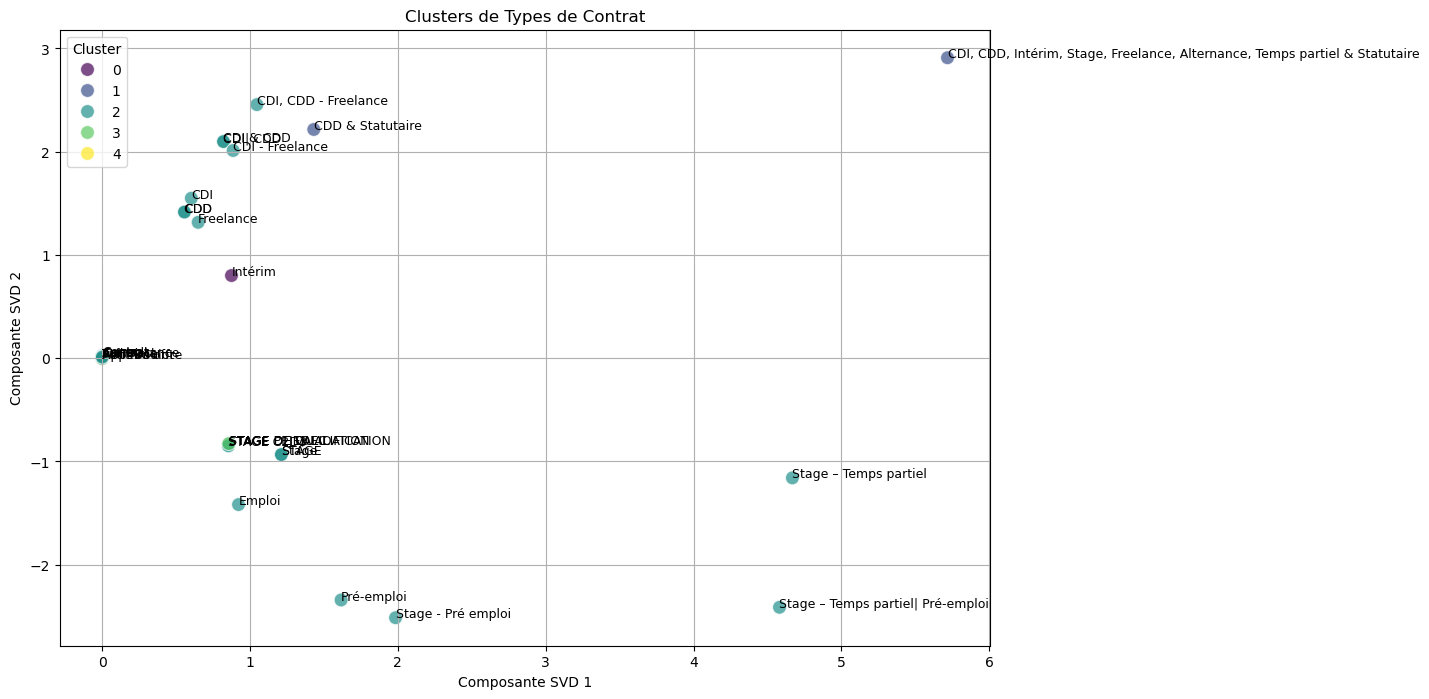

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import numpy as np
import nltk

# Assurez-vous que le corpus stopwords est téléchargé
nltk.download('stopwords')

# Prétraitement des textes
def preprocess_text(text):
    if isinstance(text, str):  # Vérifiez que le texte est bien une chaîne
        stop_words = set(stopwords.words('french'))
        text = text.lower()
        text = ' '.join(word for word in text.split() if word not in stop_words)
    else:
        text = ''
    return text

# Liste des types de contrats depuis votre DataFrame
types_contrat = df1['TYPE_DE_CONTRAT_DU_POSTE'].dropna().unique()  # Supprimer les NaN avant d'obtenir les uniques

# Application du prétraitement
preprocessed_types_contrat = [preprocess_text(contrat) for contrat in types_contrat]

# Vectorisation des textes
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_types_contrat)

# Normalisation des données
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Application du K-Means
num_clusters = 5  # Définir le nombre de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Réduction de dimensionnalité pour la visualisation avec TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# Création d'un DataFrame avec les coordonnées SVD et les clusters
df_svd = pd.DataFrame({
    'SVD1': X_svd[:, 0],
    'SVD2': X_svd[:, 1],
    'Cluster': clusters,
    'Type de Contrat': types_contrat
})

# Visualisation des clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_svd, x='SVD1', y='SVD2', hue='Cluster', palette='viridis', s=100, alpha=0.7)

# Ajouter des annotations pour les échantillons
for i in range(len(df_svd)):
    plt.text(df_svd['SVD1'][i], df_svd['SVD2'][i], df_svd['Type de Contrat'][i], fontsize=9)

plt.title('Clusters de Types de Contrat')
plt.xlabel('Composante SVD 1')
plt.ylabel('Composante SVD 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
import numpy as np
import nltk

# Assurez-vous que le corpus stopwords est téléchargé
nltk.download('stopwords')

# Prétraitement des textes
def preprocess_text(text):
    if isinstance(text, str):  # Vérifiez que le texte est bien une chaîne
        stop_words = set(stopwords.words('french'))
        text = text.lower()
        text = ' '.join(word for word in text.split() if word not in stop_words)
    else:
        text = ''
    return text

# Liste des types de contrats depuis votre DataFrame
types_contrat = df1['INTITULE_DU_POSTE'].dropna().unique()  # Supprimer les NaN avant d'obtenir les uniques

# Application du prétraitement
preprocessed_types_contrat = [preprocess_text(contrat) for contrat in types_contrat]

# Vectorisation des textes
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_types_contrat)

# Normalisation des données
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Application du K-Means
num_clusters = 5  # Définir le nombre de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Création d'un DataFrame pour visualiser les résultats
df_clusters = pd.DataFrame({
    'INTITULE_DU_POSTE_1': types_contrat,
    'Cluster': clusters
})

# Joindre les clusters avec le DataFrame original
df1 = df1.copy()  # Faire une copie du DataFrame pour éviter les modifications non souhaitées
df1['INTITULE_DU_POSTE_1'] = df1['INTITULE_DU_POSTE'].fillna('')  # Remplacer NaN par une chaîne vide
df1 = df1.merge(df_clusters, how='left', left_on='INTITULE_DU_POSTE_1', right_on='INTITULE_DU_POSTE_1')

df1

In [1]:
import pandas as pd

# Charger le fichier Excel dans un DataFrame
Data_Scrapping_df_educarriere_09042024 = pd.read_excel("Data_Scrapping_df_educarriere_09042024.xlsx")

# Afficher les premières lignes du DataFrame pour vér
Data_Scrapping_df_educarriere_09042024


,BRANCHE_D_ACTIVITE,TYPE_DE_CONTRAT_DU_POSTE,SPECIALITE,DIPLOME,EXPERIENCE_PROFESSIONNELLE,LIEU_DU_POSTE_DE_TRAVAIL,SITE_WEB_DE_L_ENTREPRISE,DATE_DE_DEBUT_DE_L_OFFRE,DATE_D_EXPIRATION_DE_L_OFFRE,Description,INTITULE_DU_POSTE,Sous_titre,Code,Date_DEdition,Date_limite,PAYS_DU_POSTE_DE_TRAVAIL,URL,Unite_EXPERIENCE_PROFESSIONNELLE
0,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,EXPERT DEVELOPPEMENT LOCAL - PLANIFICATION DU ...,exXicaa-tbrecruteEXPERT DEVELOPPEMENT LOCAL - ...,111900,08/04/2024,15/04/2024,d'I...,https://emploi.educarriere.ci/nos-offres?page1...,ans
1,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,SUPERVISEUR RÉGIONNAL,AMIFACIrecruteSUPERVISEUR RÉGIONNALDescription...,111864,05/04/2024,15/04/2024,d'I...,https://emploi.educarriere.ci/nos-offres?page1...,ans
2,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,10 COMMERCIAUX (STAGE),BORN COTE D'IVOIRErecrute10 COMMERCIAUX (STAGE...,111844,05/04/2024,15/04/2024,ABIDJAN,https://emploi.educarriere.ci/nos-offres?page1...,ans
3,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,CONSULTANTS EN AGR,ONG EICFrecruteDES CONSULTANTS EN AGRDescripti...,111829,04/04/2024,15/04/2024,et...,https://emploi.educarriere.ci/nos-offres?page1...,ans
4,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,NAVIGATIONAL WATCH RATING,SERVIZI ENERGIA ITALIA (SEI)recruitNAVIGATIONA...,111814,04/04/2024,27/04/2024,O...,https://emploi.educarriere.ci/nos-offres?page1...,ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,ASSISTANT RH (H/F),Emploi,"Ressources Humaines , Sciences sociales",BAC+2,1.0,FERKESSEDOUGOU (REGION DU TCHOLOGO),https://emploi.educarriere.ci/offre-116055-ass...,08/04/2024,15/04/2024,Description du posteLA MISSION D'ACTION CONTRE...,CHARGE COMMUNICATION H/F,IVOIRE FACILITY MANAGEMENTrecruteCHARGE COMMUN...,110615,01/03/2024,31/12/2024,d'Ivoire,https://emploi.educarriere.ci/nos-offres?page1...,ans
466,ASSISTANT RH (H/F),Emploi,"Ressources Humaines , Sciences sociales",BAC+2,1.0,FERKESSEDOUGOU (REGION DU TCHOLOGO),https://emploi.educarriere.ci/offre-116055-ass...,08/04/2024,15/04/2024,Description du posteLA MISSION D'ACTION CONTRE...,RESPONSABLE RESSOURCES HUMANIES,ACTUMEDIArecruteRESPONSABLE RESSOURCES HUMANIE...,110074,16/02/2024,13/08/2024,D'IVOIRE,https://emploi.educarriere.ci/nos-offres?page1...,ans
467,ASSISTANT RH (H/F),Emploi,"Ressources Humaines , Sciences sociales",BAC+2,1.0,FERKESSEDOUGOU (REGION DU TCHOLOGO),https://emploi.educarriere.ci/offre-116055-ass...,08/04/2024,15/04/2024,Description du posteLA MISSION D'ACTION CONTRE...,FORMATEUR ELECTRICITE BATIMENT,INSTITUT PANAFRICAIN DES HAUTES ETUDES ET FORM...,108816,17/01/2024,29/08/2024,d'I...,https://emploi.educarriere.ci/nos-offres?page1...,ans
468,ASSISTANT RH (H/F),Emploi,"Ressources Humaines , Sciences sociales",BAC+2,1.0,FERKESSEDOUGOU (REGION DU TCHOLOGO),https://emploi.educarriere.ci/offre-116055-ass...,08/04/2024,15/04/2024,Description du posteLA MISSION D'ACTION CONTRE...,FORMATEUR EN COLLECTE ET TRAITEMENT DES DECHETS,INSTITUT PANAFRICAIN DES HAUTES ETUDES ET FORM...,107756,18/12/2023,01/08/2024,Abidjan,https://emploi.educarriere.ci/nos-offres?page1...,ans


In [2]:
import pandas as pd

In [3]:
Data_Scrapping_df_novojob_09042024 = pd.read_excel("Data_Scrapping_df_novojob_09042024.xlsx")

# Afficher les premières lignes du DataFrame pour vér
Data_Scrapping_df_novojob_09042024


,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau,Experience_lettre,url,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,Niveau de poste,BRANCHE_D_ACTIVITE,Texte_fourni,Niveau d'étude (diplome),NOMBRE_DE_POSTES_A_POURVOIR,TYPE_DE_CONTRAT_DU_POSTE,RAISON_SOCIALE_DE_L_ENTREPRISE,VILLE_DU_POSTE_DE_TRAVAIL
0,Gestionnaire des Ressources Humaines,NaN,Côte d'ivoire,24 Mars,Manager / Responsable département,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",22 Juin,Manager / Responsable département,Services,Entreprise spécialisée dans l’ingénierie mécan...,NaN,NaN,NaN,NaN,Abidjan
1,Gestionnaire des Ressources Humaines,NaN,Côte d'ivoire,24 Mars,Manager / Responsable département,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",22 Juin,Manager / Responsable département,Services,Entreprise spécialisée dans l’ingénierie mécan...,NaN,NaN,NaN,NaN,Abidjan
2,Gestionnaire des Ressources Humaines,NaN,Côte d'ivoire,24 Mars,Manager / Responsable département,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",22 Juin,Manager / Responsable département,Services,Entreprise spécialisée dans l’ingénierie mécan...,NaN,NaN,NaN,NaN,Abidjan
3,Gestionnaire des Ressources Humaines,NaN,Côte d'ivoire,24 Mars,Manager / Responsable département,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",22 Juin,Manager / Responsable département,Services,Entreprise spécialisée dans l’ingénierie mécan...,NaN,NaN,NaN,NaN,Abidjan
4,Gestionnaire des Ressources Humaines,NaN,Côte d'ivoire,24 Mars,Manager / Responsable département,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",22 Juin,Manager / Responsable département,Services,Entreprise spécialisée dans l’ingénierie mécan...,NaN,NaN,NaN,NaN,Abidjan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Maintenance Officer,OLAM FOOD Ingrédients (OFI),Côte d'ivoire,31 Janvier,Confirmé / Expérimenté,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Bouake, Côte d'ivoire",30 Avril,Confirmé / Expérimenté,"Distribution, Commerce",Position within the structure :Position based ...,Formation Professionnelle,1.0,CDI,NaN,Bouake
770,Maintenance Officer,OLAM FOOD Ingrédients (OFI),Côte d'ivoire,31 Janvier,Confirmé / Expérimenté,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Bouake, Côte d'ivoire",30 Avril,Confirmé / Expérimenté,"Distribution, Commerce",Position within the structure :Position based ...,Formation Professionnelle,1.0,CDI,NaN,Bouake
771,Maintenance Officer,OLAM FOOD Ingrédients (OFI),Côte d'ivoire,31 Janvier,Confirmé / Expérimenté,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Bouake, Côte d'ivoire",30 Avril,Confirmé / Expérimenté,"Distribution, Commerce",Position within the structure :Position based ...,Formation Professionnelle,1.0,CDI,NaN,Bouake
772,Production in Charge,OLAM FOOD Ingrédients (OFI),Côte d'ivoire,06 Février,Confirmé / Expérimenté,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Bouake, Côte d'ivoire",06 Mai,Confirmé / Expérimenté,"Distribution, Commerce",Présentation de l’entreprise \nOLAM FOOD ingre...,"Master 1, Licence Bac + 4",1.0,CDI,NaN,Bouake


In [4]:
Data_Scrapping_df_projobivoire_09042024 = pd.read_excel("Data_Scrapping_df_projobivoire_09042024.xlsx")

# Afficher les premières lignes du DataFrame pour vér
Data_Scrapping_df_projobivoire_09042024


,INTITULE_DU_POSTE,TYPE_DE_CONTRAT_DU_POSTE,DATE_DE_PUBLICATION,DATE_D_EXPIRATION_DE_L_OFFRE,CATEGORIE,EmailURL,SITE_WEB_DE_L_ENTREPRISE
0,Solidaridad West Africa recrute Conseiller(e) ...,Emploi,8 avril 2024,23 avril 2024,NaN,https://projobivoire.com/jobs/solidaridad-west...,https://projobivoire.com/page/0/
1,Société Générale Côte D’ivoire recrute Attaché...,Emploi,8 avril 2024,23 avril 2024,Banque,https://projobivoire.com/jobs/societe-generale...,https://projobivoire.com/page/0/
2,Agent WAVE dans plusieurs Villes,Contrat,8 avril 2024,23 avril 2024,Commerce/Ventes,https://projobivoire.com/jobs/agent-wave-dans-...,https://projobivoire.com/page/0/
3,IVAN’S GROUP recrute Responsable de Trésorerie,Emploi,8 avril 2024,23 avril 2024,Finances/Comptabilité,https://projobivoire.com/jobs/ivans-group-recr...,https://projobivoire.com/page/0/
4,Stagiaire Assistant Communication et Marketing...,Stage,8 avril 2024,23 avril 2024,Communication,https://projobivoire.com/jobs/stagiaire-assist...,https://projobivoire.com/page/0/
...,...,...,...,...,...,...,...
9277,PSI CI recrute 02 CONSEILLERS TECHNIQUES RÉGIO...,Emploi,20 septembre 2021,24 septembre 2021,Médecine/Santé,https://projobivoire.com/jobs/psi-ci-recrute-0...,https://projobivoire.com/page/545/
9278,La Banque Atlantique recrute de nouveaux profils,Emploi,20 septembre 2021,24 septembre 2021,Banque,https://projobivoire.com/jobs/la-banque-atlant...,https://projobivoire.com/page/545/
9279,Les Orchidées Rouges recrutent Chargé de projet,Emploi,20 septembre 2021,24 septembre 2021,NaN,https://projobivoire.com/jobs/les-orchidees-ro...,https://projobivoire.com/page/545/
9280,DIRECTEUR DES ETUDES,Emploi,20 septembre 2021,24 septembre 2021,Education/Enseignement,https://projobivoire.com/jobs/directeur-des-et...,https://projobivoire.com/page/545/


In [5]:
Data_Scrapping_df_talent_ci_09042024 = pd.read_excel("Data_Scrapping_df_talent_ci_09042024.xlsx")

# Afficher les premières lignes du DataFrame pour vér
Data_Scrapping_df_talent_ci_09042024


,INTITULE_DU_POSTE,LIEU_DU_POSTE_DE_TRAVAIL,RAISON_SOCIALE_DE_L_ENTREPRISE,DESCRIPTION_DU_POSTE,SITE_WEB_DE_L_ENTREPRISE
0,Country Technical Sales Manager – West Africa ...,"Abidjan, Abidjan",Claire Joster,PresentaciónClaire Joster is a headhunting fir...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
1,Chauffeur Moto,"Abidjan, Abidjan",Deals Jumia,Description. NE PAYEZ AUCUN FRAIS DE DOSSIERS ...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
2,Chef comptable assurance vie,"Abidjan, Abidjan",Senjob,Au sein de la Direction Administrative et Fina...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
3,Assistante RH / Assistant RH (H/F),"Abidjan, Abidjan",RMO,"Le PosteRecruteurImplanté en Afrique, RMO vous...",https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
4,Agent de sécurite gardiennage,"Abidjan, Abidjan",ESMA (ABIDJAN),Description de l'emploiEn quoi consiste l'empl...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
...,...,...,...,...,...
151,Mécanicien / Mécanicienne agricole,"Abidjan, Lagunes",Temporis,"TEMPORIS Vendée Littoral, plus que des agences...",https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
152,Credit Risk Officer,"Abidjan, Lagunes",09220 Citibank Cote d'Ivoire S.A.,The Country Risk Senior Analyst is a seasoned ...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
153,"Senior Consultant, Client Success","Abidjan, Lagunes Region",VISA,Job Description And ResponsibilitiesThis is an...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
154,Technicien chauffagiste H/F,"Abidjan, Abidjan Autonomous District",Acorus,"LE POSTE..️ Qui dit croissance, dit création d...",https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...


In [6]:
Data_Scrapping_emploi_df_09042024 = pd.read_excel("Data_Scrapping_emploi_df_09042024.xlsx")

# Afficher les premières lignes du DataFrame pour vér
Data_Scrapping_emploi_df_09042024


,Poste,Entreprise,Date,Description,Région,URL,Offre_Link
0,Technicien Support OPS H/F,INSTAHR,07.04.2024,"Instahr, une entreprise canadienne, recrute po...",NaN,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
1,Technicien Support OPS H/F,INSTAHR,07.04.2024,"Instahr, une entreprise canadienne, recrute po...",NaN,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
2,Technicien Support OPS H/F,INSTAHR,07.04.2024,"Instahr, une entreprise canadienne, recrute po...",NaN,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
3,Technicien Support OPS H/F,INSTAHR,07.04.2024,"Instahr, une entreprise canadienne, recrute po...",NaN,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
4,Technicien Support OPS H/F,INSTAHR,07.04.2024,"Instahr, une entreprise canadienne, recrute po...",NaN,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
...,...,...,...,...,...,...,...
2461,Directeur Technique,AFRICAWORK,23.02.2024,MISSION PRINCIPALEAssurer le suivi des interve...,NaN,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
2462,Directeur Technique,AFRICAWORK,23.02.2024,MISSION PRINCIPALEAssurer le suivi des interve...,NaN,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
2463,Directeur Technique,AFRICAWORK,23.02.2024,MISSION PRINCIPALEAssurer le suivi des interve...,NaN,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
2464,Directeur Technique,AFRICAWORK,23.02.2024,MISSION PRINCIPALEAssurer le suivi des interve...,NaN,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...


In [7]:
Data_Scrapping_mondiale_df_09042024 = pd.read_excel("Data_Scrapping_mondiale_df_09042024.xlsx")

# Afficher les premières lignes du DataFrame pour vér 
Data_Scrapping_mondiale_df_09042024


,INTITULE_DU_POSTE,LIEU_DU_POSTE_DE_TRAVAIL,SECTEUR,DATE_D_EXPIRATION_DE_L_OFFRE
0,(Senior) Industry Specialist – Tourism (Hospit...,"Washington, DC,United States",Investment,4/25/2024
1,Associate Environmental and Social Development...,"Hanoi,Viet Nam",Environment,4/18/2024
2,Associate Environmental and Social Development...,"Mumbai,India",Environment,4/20/2024
3,Associate Investment Officer,"Belgrade,Serbia",Investment,4/10/2024
4,Associate Investment Officer,"Mexico City,Mexico More",Investment,4/15/2024
5,Associate Investment Officer,"Istanbul,Turkiye",Investment,4/17/2024
6,Associate Investment Officer/Investment Officer,"Cairo,Egypt More",Investment,4/16/2024
7,Associate Operations Officer/Operations Officer,"Nairobi,Kenya",Gender,4/20/2024
8,Business Analyst,"Chennai,India",Information Technology,4/28/2024
9,Climate Change Analyst,"Washington, DC,United States",Climate Change,4/10/2024


In [8]:
Data_Scrapping_yop_l_frii_total_09042024 = pd.read_excel("Data_Scrapping_yop_l_frii_total_09042024.xlsx")

# Afficher les premières lignes du DataFrame pour vér 
Data_Scrapping_yop_l_frii_total_09042024

,INTITULE_DU_POSTE,URL_DU_POSTE,Job Image,Source URL,DATE_DE_DEBUT_DE_L_OFFRE,NOMBRE_DE_POSTE_DE_TRAVAIL,Titre du Poste,Niveau Requis,Année d'Expérience Requise,Lieu du Travail,Date de Soumission,annee_min,annee_max,LIEU_DU_POSTE_DE_TRAVAIL,PAYS_DU_POSTE_DE_TRAVAIL
0,Le PAM recrute pour ces 2 postes,https://yop.l-frii.com/emploi/le-pam-recrute-p...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/0/,08 Avril 2024,2.0,2023 © L-FRII MEDIA,Diplôme universitaire supérieur,"2 ans, 6 ans",Guinée / Bénin,21/04/2024,2,6,Guinée / Bénin,Guinée / Bénin
1,Le PAM recrute pour ces 2 postes,https://yop.l-frii.com/emploi/le-pam-recrute-p...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/1/,08 Avril 2024,2.0,2023 © L-FRII MEDIA,Diplôme universitaire supérieur,"2 ans, 6 ans",Guinée / Bénin,21/04/2024,2,6,Guinée / Bénin,Guinée / Bénin
2,L’Organisation internationale URC recrute pour...,https://yop.l-frii.com/emploi/lorganisation-in...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/0/,08 Avril 2024,2.0,2023 © L-FRII MEDIA,NaN,NaN,"Abuja , Nigéria",NaN,NaN,NaN,Abuja,Nigéria
3,L’UNION AFRICAINE UA recrute pour ce poste,https://yop.l-frii.com/emploi/lunion-africaine...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/0/,08 Avril 2024,NaN,2023 © L-FRII MEDIA,Master,NaN,Algérie,08/05/2024,NaN,NaN,Algérie,Algérie
4,Le Centre du riz pour l’Afrique AfricaRice rec...,https://yop.l-frii.com/emploi/le-centre-du-riz...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/0/,08 Avril 2024,10.0,2023 © L-FRII MEDIA,NaN,NaN,Côte d'Ivoire / Sénégal / Togo,NaN,NaN,NaN,Côte d'Ivoire / Sénégal / Togo,Côte d'Ivoire / Sénégal / Togo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39309,ACTED recrute pour ce poste,https://yop.l-frii.com/emploi/acted-recrute-po...,https://yop.l-frii.com/wp-content/uploads/2022...,https://yop.l-frii.com/offres-demplois/3275/,16 Janvier 2022,NaN,2023 © L-FRII MEDIA,"Licence, Master",5 ans,NaN,NaN,5,5,NaN,NaN
39310,Médecins Sans Frontières MSF recrute pour ce p...,https://yop.l-frii.com/emploi/medecins-sans-fr...,https://yop.l-frii.com/wp-content/uploads/2022...,https://yop.l-frii.com/offres-demplois/3275/,17 Janvier 2022,NaN,2023 © L-FRII MEDIA,Doctorat,2 ans,"Burkina-Faso, Mali, Niger",07/02/2022,2,2,Burkina-Faso,"Mali, Niger"
39311,FHI360 recrute pour ce poste,https://yop.l-frii.com/emploi/fhi360-recrute-p...,https://yop.l-frii.com/wp-content/uploads/2022...,https://yop.l-frii.com/offres-demplois/3275/,17 Janvier 2022,NaN,2023 © L-FRII MEDIA,BAC + 3,5 ans,Cotonou - Bénin,07/02/2022,5,5,Cotonou - Bénin,Cotonou - Bénin
39312,L’ONG Le GRET recrute pour ces 3 postes,https://yop.l-frii.com/emploi/long-le-gret-rec...,https://yop.l-frii.com/wp-content/uploads/2021...,https://yop.l-frii.com/offres-demplois/3275/,17 Janvier 2022,3.0,2023 © L-FRII MEDIA,Diplôme universitaire supérieur,3 ans,Guinée,30/01/2022,3,3,Guinée,Guinée


In [9]:
Data_Scrapping_yop_l_frii_total_09042024["URL_DU_POSTE"][0]

'https://yop.l-frii.com/emploi/le-pam-recrute-pour-ces-2-postes-08-avril-2024/'

In [10]:
# Concaténer les DataFrames
frames = [Data_Scrapping_df_educarriere_09042024, 
          Data_Scrapping_df_novojob_09042024, 
          Data_Scrapping_df_projobivoire_09042024, 
          Data_Scrapping_df_talent_ci_09042024, 
          Data_Scrapping_emploi_df_09042024, 
          Data_Scrapping_mondiale_df_09042024, 
          Data_Scrapping_yop_l_frii_total_09042024]
frames

[                                    BRANCHE_D_ACTIVITE  \
 0    EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF   
 1    EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF   
 2    EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF   
 3    EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF   
 4    EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF   
 ..                                                 ...   
 465                                 ASSISTANT RH (H/F)   
 466                                 ASSISTANT RH (H/F)   
 467                                 ASSISTANT RH (H/F)   
 468                                 ASSISTANT RH (H/F)   
 469                                 ASSISTANT RH (H/F)   
 
     TYPE_DE_CONTRAT_DU_POSTE                               SPECIALITE DIPLOME  \
 0                     Emploi                             Informatique   BAC+5   
 1                     Emploi                             Informatique   BAC+5   
 2                     Emploi               

In [11]:

# Concaténer les DataFrames en un seul
result = pd.concat(frames, ignore_index=True)
result

,BRANCHE_D_ACTIVITE,TYPE_DE_CONTRAT_DU_POSTE,SPECIALITE,DIPLOME,EXPERIENCE_PROFESSIONNELLE,LIEU_DU_POSTE_DE_TRAVAIL,SITE_WEB_DE_L_ENTREPRISE,DATE_DE_DEBUT_DE_L_OFFRE,DATE_D_EXPIRATION_DE_L_OFFRE,Description,...,Job Image,Source URL,NOMBRE_DE_POSTE_DE_TRAVAIL,Titre du Poste,Niveau Requis,Année d'Expérience Requise,Lieu du Travail,Date de Soumission,annee_min,annee_max
0,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16 Janvier 2022,NaN,NaN,...,https://yop.l-frii.com/wp-content/uploads/2022...,https://yop.l-frii.com/offres-demplois/3275/,NaN,2023 © L-FRII MEDIA,"Licence, Master",5 ans,NaN,NaN,5,5
52518,NaN,NaN,NaN,NaN,NaN,Burkina-Faso,NaN,17 Janvier 2022,NaN,NaN,...,https://yop.l-frii.com/wp-content/uploads/2022...,https://yop.l-frii.com/offres-demplois/3275/,NaN,2023 © L-FRII MEDIA,Doctorat,2 ans,"Burkina-Faso, Mali, Niger",07/02/2022,2,2
52519,NaN,NaN,NaN,NaN,NaN,Cotonou - Bénin,NaN,17 Janvier 2022,NaN,NaN,...,https://yop.l-frii.com/wp-content/uploads/2022...,https://yop.l-frii.com/offres-demplois/3275/,NaN,2023 © L-FRII MEDIA,BAC + 3,5 ans,Cotonou - Bénin,07/02/2022,5,5
52520,NaN,NaN,NaN,NaN,NaN,Guinée,NaN,17 Janvier 2022,NaN,NaN,...,https://yop.l-frii.com/wp-content/uploads/2021...,https://yop.l-frii.com/offres-demplois/3275/,3.0,2023 © L-FRII MEDIA,Diplôme universitaire supérieur,3 ans,Guinée,30/01/2022,3,3


In [12]:
result.columns

Index(['BRANCHE_D_ACTIVITE', 'TYPE_DE_CONTRAT_DU_POSTE', 'SPECIALITE',
       'DIPLOME', 'EXPERIENCE_PROFESSIONNELLE', 'LIEU_DU_POSTE_DE_TRAVAIL',
       'SITE_WEB_DE_L_ENTREPRISE', 'DATE_DE_DEBUT_DE_L_OFFRE',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'Description', 'INTITULE_DU_POSTE',
       'Sous_titre', 'Code', 'Date_DEdition', 'Date_limite',
       'PAYS_DU_POSTE_DE_TRAVAIL', 'URL', 'Unite_EXPERIENCE_PROFESSIONNELLE',
       'Entreprise', 'Niveau', 'Experience_lettre', 'url', 'Niveau de poste',
       'Texte_fourni', 'Niveau d'étude (diplome)',
       'NOMBRE_DE_POSTES_A_POURVOIR', 'RAISON_SOCIALE_DE_L_ENTREPRISE',
       'VILLE_DU_POSTE_DE_TRAVAIL', 'DATE_DE_PUBLICATION', 'CATEGORIE',
       'EmailURL', 'DESCRIPTION_DU_POSTE', 'Poste', 'Date', 'Région',
       'Offre_Link', 'SECTEUR', 'URL_DU_POSTE', 'Job Image', 'Source URL',
       'NOMBRE_DE_POSTE_DE_TRAVAIL', 'Titre du Poste', 'Niveau Requis',
       'Année d'Expérience Requise', 'Lieu du Travail', 'Date de Soumission',
       '

In [13]:
df=result
df = df[['BRANCHE_D_ACTIVITE', 'TYPE_DE_CONTRAT_DU_POSTE', 'SPECIALITE', 'DIPLOME', 'EXPERIENCE_PROFESSIONNELLE',
         'LIEU_DU_POSTE_DE_TRAVAIL', 'DATE_DE_DEBUT_DE_L_OFFRE', 'DATE_D_EXPIRATION_DE_L_OFFRE', 'Description',
         'INTITULE_DU_POSTE', 'Sous_titre', 'Code', 'Date_DEdition', 'Date_limite', 'PAYS_DU_POSTE_DE_TRAVAIL',
         'URL', 'Unite_EXPERIENCE_PROFESSIONNELLE', 'Entreprise', 'Niveau', 'Experience_lettre', 'url',
         'Niveau de poste', 'Texte_fourni', 'Niveau d\'étude (diplome)', 'NOMBRE_DE_POSTES_A_POURVOIR',
         'RAISON_SOCIALE_DE_L_ENTREPRISE', 'VILLE_DU_POSTE_DE_TRAVAIL', 'DATE_DE_PUBLICATION', 'CATEGORIE', 'EmailURL',
         'DESCRIPTION_DU_POSTE', 'Poste', 'Date', 'Région', 'Offre_Link', 'SECTEUR', 'URL_DU_POSTE', 'Job Image',
         'Source URL', 'NOMBRE_DE_POSTE_DE_TRAVAIL', 'Titre du Poste', 'Niveau Requis', 'Année d\'Expérience Requise',
         'Lieu du Travail', 'Date de Soumission', 'annee_min', 'annee_max']]
df

,BRANCHE_D_ACTIVITE,TYPE_DE_CONTRAT_DU_POSTE,SPECIALITE,DIPLOME,EXPERIENCE_PROFESSIONNELLE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,DATE_D_EXPIRATION_DE_L_OFFRE,Description,INTITULE_DU_POSTE,...,Job Image,Source URL,NOMBRE_DE_POSTE_DE_TRAVAIL,Titre du Poste,Niveau Requis,Année d'Expérience Requise,Lieu du Travail,Date de Soumission,annee_min,annee_max
0,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,EXPERT DEVELOPPEMENT LOCAL - PLANIFICATION DU ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,SUPERVISEUR RÉGIONNAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,10 COMMERCIAUX (STAGE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,CONSULTANTS EN AGR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,NAVIGATIONAL WATCH RATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52517,NaN,NaN,NaN,NaN,NaN,NaN,16 Janvier 2022,NaN,NaN,ACTED recrute pour ce poste,...,https://yop.l-frii.com/wp-content/uploads/2022...,https://yop.l-frii.com/offres-demplois/3275/,NaN,2023 © L-FRII MEDIA,"Licence, Master",5 ans,NaN,NaN,5,5
52518,NaN,NaN,NaN,NaN,NaN,Burkina-Faso,17 Janvier 2022,NaN,NaN,Médecins Sans Frontières MSF recrute pour ce p...,...,https://yop.l-frii.com/wp-content/uploads/2022...,https://yop.l-frii.com/offres-demplois/3275/,NaN,2023 © L-FRII MEDIA,Doctorat,2 ans,"Burkina-Faso, Mali, Niger",07/02/2022,2,2
52519,NaN,NaN,NaN,NaN,NaN,Cotonou - Bénin,17 Janvier 2022,NaN,NaN,FHI360 recrute pour ce poste,...,https://yop.l-frii.com/wp-content/uploads/2022...,https://yop.l-frii.com/offres-demplois/3275/,NaN,2023 © L-FRII MEDIA,BAC + 3,5 ans,Cotonou - Bénin,07/02/2022,5,5
52520,NaN,NaN,NaN,NaN,NaN,Guinée,17 Janvier 2022,NaN,NaN,L’ONG Le GRET recrute pour ces 3 postes,...,https://yop.l-frii.com/wp-content/uploads/2021...,https://yop.l-frii.com/offres-demplois/3275/,3.0,2023 © L-FRII MEDIA,Diplôme universitaire supérieur,3 ans,Guinée,30/01/2022,3,3


In [14]:
df['Niveau'].unique() 

array([nan, 'Manager / Responsable département', 'Débutant / Junior',
       "Responsable d'équipe", 'Confirmé / Expérimenté',
       'Stagiaire / Etudiant', 'Cadre dirigeant', 'Jeune diplômé'],
      dtype=object)

In [15]:
df['Niveau'] = df['Niveau'].fillna('').astype(str)


C:\Users\Dell\AppData\Local\Temp\ipykernel_18720\3566196651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Niveau'] = df['Niveau'].fillna('').astype(str)


In [16]:
from plotly.io import write_html
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Charger les données (assurez-vous d'avoir préalablement importé les bibliothèques nécessaires et défini df_offers)
# df_offers = pd.read_csv("votre_fichier.csv")  # Remplacez "votre_fichier.csv" par votre fichier de données

# Réorganiser les colonnes selon vos besoins
scrap_novojob=Data_Scrapping_df_novojob_09042024
scrap_novojob = scrap_novojob[[
    'INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL', 'DATE_DE_DEBUT_DE_L_OFFRE', 'Niveau', 'Experience_lettre',
    'url', "SITE_WEB_DE_L_ENTREPRISE", "RAISON_SOCIALE_DE_L_ENTREPRISE", "BRANCHE_D_ACTIVITE", "LIEU_DU_POSTE_DE_TRAVAIL",
    "DATE_D_EXPIRATION_DE_L_OFFRE", "NOMBRE_DE_POSTES_A_POURVOIR", "Niveau de poste", "Niveau d'étude (diplome)", "TYPE_DE_CONTRAT_DU_POSTE",
    "Texte_fourni", "VILLE_DU_POSTE_DE_TRAVAIL"
]]

# Définir une fonction pour attribuer des valeurs numériques à l'expérience
def experience_level(row):
    exp_mapping = {
        'Moins d’un an': 1, 'Sans expérience': 1, '1 à 2 ans': 1, '2 à 3 ans': 2, '3 à 4 ans': 3, '4 à 5 ans': 4,
        '3 à 5 ans': 4, '5 à 6 ans': 5, '6 à 7 ans': 6, '6 à 10 ans': 6, '7 à 8 ans': 7, '8 à 9 ans': 8,
        '9 à 10 ans': 9, 'Plus de 10 ans': 11
    }
    return exp_mapping.get(row['Experience_lettre'], 12)

# Appliquer la fonction pour créer une nouvelle colonne "Niveau_experience"
scrap_novojob['Niveau_experience'] = scrap_novojob.apply(experience_level, axis=1)

# Options pour les filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in scrap_novojob["BRANCHE_D_ACTIVITE"].unique()]
types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in scrap_novojob["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': level, 'value': level} for level in sorted(set(scrap_novojob['Niveau']))]

# Palettes de couleurs
secteur_activite_palette = px.colors.qualitative.Pastel1
entreprise_palette = px.colors.qualitative.Set2
type_contrat_palette = px.colors.qualitative.Pastel2

# Initialiser l'application Dash avec les styles CSS
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Définir la mise en page du tableau de bord
app.layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),

    # Filtres interactifs
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value='Tous les secteurs d\'activité',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value='Tous les types de contrat',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value='Tous les niveaux d\'expérience',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Button('Réinitialiser les filtres', id='bouton-reset', n_clicks=0, style={'background-color': 'green'})
    ], style={'display': 'flex', 'background-color': 'green'}),

    # Graphiques
    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
        
    ],className='row', style={'background-color': 'white'})
])

# Callback pour mettre à jour les graphiques en fonction des filtres
@app.callback(
    [Output('graph-secteur-activite', 'figure'),
     Output('graph-entreprise', 'figure'),
     Output('graph-type-contrat', 'figure'),
     Output('graph-part-entreprises-par-type', 'figure'),
     Output('graph-part-entreprises-par-categorie', 'figure'),
     Output('graph-taille-moyenne-entreprises', 'figure')],
    [Input('filtre-secteur-activite', 'value'),
     Input('filtre-type-contrat', 'value'),
     Input('filtre-niveau-experience', 'value'),
     Input('bouton-reset', 'n_clicks')]
)
def update_graphs(secteurs_activite, types_contrat, niveaux_experience, n_clicks_reset):
    # Filtrage du DataFrame en fonction des sélections
    df_filtered = scrap_novojob
    # Définir les filtres à appliquer
    filters = {
        'BRANCHE_D_ACTIVITE': secteurs_activite,
        'TYPE_DE_CONTRAT_DU_POSTE': types_contrat,
        'Niveau': niveaux_experience
    }

    # Appliquer les filtres
    for column, values in filters.items():
        if values and 'Tous' not in values:
            if isinstance(values, str):
                values = [values]  # Transformer en liste si c'est une chaîne de caractères unique
            df_filtered = df_filtered[df_filtered[column].isin(values)]

    # Graphique du nombre d'offres par secteur d'activité
    fig_secteur_activite = px.bar(df_filtered, x="BRANCHE_D_ACTIVITE", title="Nombre d'offres par secteur d'activité",
                                    color_discrete_sequence=['orange'])

    # Graphique du nombre d'offres par entreprise
    fig_entreprise = px.bar(df_filtered, x="Entreprise", title="Nombre d'offres par entreprise",
                            color_discrete_sequence=['orange'])

    # Graphique du type de contrat proposé
    fig_type_contrat = px.bar(df_filtered, x="TYPE_DE_CONTRAT_DU_POSTE", title="Type de contrat proposé",
                               color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par type de contrat
    fig_part_entreprises_par_type = px.pie(df_filtered, names="TYPE_DE_CONTRAT_DU_POSTE",
                                           title="Part des entreprises par type de contrat", color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par catégorie
    fig_part_entreprises_par_categorie = px.pie(df_filtered, names="Niveau de poste",
                                                title="Part des entreprises par catégorie", color_discrete_sequence=['orange'])

    # Graphique pour la taille moyenne des entreprises par catégorie
    fig_taille_moyenne_entreprises = px.bar(df_filtered, x="Niveau de poste", y="NOMBRE_DE_POSTES_A_POURVOIR",
                                             title="Taille moyenne des entreprises par catégorie", color_discrete_sequence=['orange'])

    return fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises

if __name__ == '__main__':
    app.run_server(debug=True, port=8058)

    # Récupérer les figures après l'exécution de l'application
    fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises = update_graphs(
        None, None, None, None)

    # Sauvegarder les graphiques au format HTML
    write_html(fig_secteur_activite, 'graph_secteur_activite.html')
    write_html(fig_entreprise, 'graph_entreprise.html')
    write_html(fig_type_contrat, 'graph_type_contrat.html')
    write_html(fig_part_entreprises_par_type, 'graph_part_entreprises_par_type.html')
    write_html(fig_part_entreprises_par_categorie, 'graph_part_entreprises_par_categorie.html')
    write_html(fig_taille_moyenne_entreprises, 'graph_taille_moyenne_entreprises.html')


C:\Users\Dell\AppData\Local\Temp\ipykernel_18720\2862504128.py:3: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

C:\Users\Dell\AppData\Local\Temp\ipykernel_18720\2862504128.py:4: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

C:\Users\Dell\AppData\Local\Temp\ipykernel_18720\2862504128.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



OSError: Address 'http://127.0.0.1:8058' already in use.
    Try passing a different port to run_server.

In [17]:
from plotly.io import write_html
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Charger les données (assurez-vous d'avoir préalablement importé les bibliothèques nécessaires et défini df_offers)
# df_offers = pd.read_csv("votre_fichier.csv")  # Remplacez "votre_fichier.csv" par votre fichier de données

# Réorganiser les colonnes selon vos besoins


# Définir une fonction pour attribuer des valeurs numériques à l'expérience
def experience_level(row):
    exp_mapping = {
        'Moins d’un an': 1, 'Sans expérience': 1, '1 à 2 ans': 1, '2 à 3 ans': 2, '3 à 4 ans': 3, '4 à 5 ans': 4,
        '3 à 5 ans': 4, '5 à 6 ans': 5, '6 à 7 ans': 6, '6 à 10 ans': 6, '7 à 8 ans': 7, '8 à 9 ans': 8,
        '9 à 10 ans': 9, 'Plus de 10 ans': 11
    }
    return exp_mapping.get(row['Experience_lettre'], 12)

# Appliquer la fonction pour créer une nouvelle colonne "Niveau_experience"
df['Niveau_experience'] = df.apply(experience_level, axis=1)

# Options pour les filtres
# Filtrer les options pour exclure celles avec une étiquette nulle
# Options pour les filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]

types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': level, 'value': level} for level in sorted(set(df['Niveau']))]

# Palettes de couleurs
secteur_activite_palette = px.colors.qualitative.Pastel1
entreprise_palette = px.colors.qualitative.Set2
type_contrat_palette = px.colors.qualitative.Pastel2

# Initialiser l'application Dash avec les styles CSS
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Définir la mise en page du tableau de bord
app.layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),

    # Filtres interactifs
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value='Tous les secteurs d\'activité',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value='Tous les types de contrat',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value='Tous les niveaux d\'expérience',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Button('Réinitialiser les filtres', id='bouton-reset', n_clicks=0, style={'background-color': 'green'})
    ], style={'display': 'flex', 'background-color': 'green'}),

    # Graphiques
    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
        
    ],className='row', style={'background-color': 'white'})
])

# Callback pour mettre à jour les graphiques en fonction des filtres
@app.callback(
    [Output('graph-secteur-activite', 'figure'),
     Output('graph-entreprise', 'figure'),
     Output('graph-type-contrat', 'figure'),
     Output('graph-part-entreprises-par-type', 'figure'),
     Output('graph-part-entreprises-par-categorie', 'figure'),
     Output('graph-taille-moyenne-entreprises', 'figure')],
    [Input('filtre-secteur-activite', 'value'),
     Input('filtre-type-contrat', 'value'),
     Input('filtre-niveau-experience', 'value'),
     Input('bouton-reset', 'n_clicks')]
)
def update_graphs(secteurs_activite, types_contrat, niveaux_experience, n_clicks_reset):
    # Filtrage du DataFrame en fonction des sélections
    df_filtered = df
    # Définir les filtres à appliquer
    filters = {
        'BRANCHE_D_ACTIVITE': secteurs_activite,
        'TYPE_DE_CONTRAT_DU_POSTE': types_contrat,
        'Niveau': niveaux_experience
    }

    # Appliquer les filtres
    for column, values in filters.items():
        if values and 'Tous' not in values:
            if isinstance(values, str):
                values = [values]  # Transformer en liste si c'est une chaîne de caractères unique
            df_filtered = df_filtered[df_filtered[column].isin(values)]

    # Graphique du nombre d'offres par secteur d'activité
    fig_secteur_activite = px.bar(df_filtered, x="BRANCHE_D_ACTIVITE", title="Nombre d'offres par secteur d'activité",
                                    color_discrete_sequence=['orange'])

    # Graphique du nombre d'offres par entreprise
    fig_entreprise = px.bar(df_filtered, x="Entreprise", title="Nombre d'offres par entreprise",
                            color_discrete_sequence=['orange'])

    # Graphique du type de contrat proposé
    fig_type_contrat = px.bar(df_filtered, x="TYPE_DE_CONTRAT_DU_POSTE", title="Type de contrat proposé",
                               color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par type de contrat
    fig_part_entreprises_par_type = px.pie(df_filtered, names="TYPE_DE_CONTRAT_DU_POSTE",
                                           title="Part des entreprises par type de contrat", color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par catégorie
    fig_part_entreprises_par_categorie = px.pie(df_filtered, names="Niveau de poste",
                                                title="Part des entreprises par catégorie", color_discrete_sequence=['orange'])

    # Graphique pour la taille moyenne des entreprises par catégorie
    fig_taille_moyenne_entreprises = px.bar(df_filtered, x="Niveau de poste", y="NOMBRE_DE_POSTES_A_POURVOIR",
                                             title="Taille moyenne des entreprises par catégorie", color_discrete_sequence=['orange'])

    return fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises

if __name__ == '__main__':
    app.run_server(debug=True, port=8058)

    # Récupérer les figures après l'exécution de l'application
    fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises = update_graphs(
        None, None, None, None)

    # Sauvegarder les graphiques au format HTML
    write_html(fig_secteur_activite, 'graph_secteur_activite.html')
    write_html(fig_entreprise, 'graph_entreprise.html')
    write_html(fig_type_contrat, 'graph_type_contrat.html')
    write_html(fig_part_entreprises_par_type, 'graph_part_entreprises_par_type.html')
    write_html(fig_part_entreprises_par_categorie, 'graph_part_entreprises_par_categorie.html')
    write_html(fig_taille_moyenne_entreprises, 'graph_taille_moyenne_entreprises.html')


OSError: Address 'http://127.0.0.1:8058' already in use.
    Try passing a different port to run_server.

In [20]:
from plotly.io import write_html
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
#import dash
import dash_html_components as html

In [54]:
#Data_Scrapping_df_educarriere_08042024 = pd.read_excel("Data_Scrapping_df_educarriere_08042024.xlsx")

In [48]:
Data_Scrapping_df_novojob_08042024 = pd.read_excel("Data_Scrapping_df_novojob_08042024.xlsx")

In [40]:
Data_Scrapping_df_projobivoire_18072024 = pd.read_excel("Data_Scrapping_df_projobivoire_08042024.xlsx")

In [51]:

Data_Scrapping_df_talent_ci_08042024 = pd.read_excel("Data_Scrapping_df_talent_ci_08042024.xlsx")

In [52]:
#Data_Scrapping_emploi_df_08042024 = pd.read_excel("Data_Scrapping_emploi_df_08042024.xlsx")

In [53]:
Data_Scrapping_mondiale_df_08042024 = pd.read_excel("Data_Scrapping_mondiale_df_08042024.xlsx")

In [3]:
Data_Scrapping_yop_l_frii_total_18072024 = pd.read_excel("Data_Scrapping_yop_l_frii_total_07072024.xlsx")
Data_Scrapping_yop_l_frii_total_18072024

#Data_Scrapping_agenceemploi_jeunes_df_03072024

,INTITULE_DU_POSTE,URL_DU_POSTE,Job Image,Source URL,DATE_DE_DEBUT_DE_L_OFFRE,NOMBRE_DE_POSTE_DE_TRAVAIL,Titre du Poste,TYPE_DE_CONTRAT_DU_POSTE,Experience_lettre,VILLE_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,annee_min,annee_max,LIEU_DU_POSTE_DE_TRAVAIL,PAYS_DU_POSTE_DE_TRAVAIL
0,L’Institut Européen de Coopération et Développ...,https://yop.l-frii.com/emploi/linstitut-europe...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/0/,06 Juillet 2024,NaN,2023 © L-FRII MEDIA,BAC + 5,2 à 5 ans,"Bangui, RCA",NaN,2,2,Bangui,RCA
1,L’Institut Européen de Coopération et Développ...,https://yop.l-frii.com/emploi/linstitut-europe...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/1/,06 Juillet 2024,NaN,2023 © L-FRII MEDIA,BAC + 5,2 à 5 ans,"Bangui, RCA",NaN,2,2,Bangui,RCA
2,Le CRS recrute pour ce poste,https://yop.l-frii.com/emploi/le-crs-recrute-p...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/0/,06 Juillet 2024,NaN,2023 © L-FRII MEDIA,Licence,2 ans,RDC,20/07/2024,2,2,RDC,RDC
3,Le CRS recrute pour ce poste,https://yop.l-frii.com/emploi/le-crs-recrute-p...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/1/,06 Juillet 2024,NaN,2023 © L-FRII MEDIA,Licence,2 ans,RDC,20/07/2024,2,2,RDC,RDC
4,L’ONG DAI Global recrute pour ce poste,https://yop.l-frii.com/emploi/long-dai-global-...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/0/,06 Juillet 2024,NaN,2023 © L-FRII MEDIA,NaN,2 à 3 ans,"Abuja, Nigéria",17/07/2024,2,2,Abuja,Nigéria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47635,Togo : Kari Kari Africa recrute,https://yop.l-frii.com/emploi/togo-kari-kari-a...,https://yop.l-frii.com/wp-content/uploads/2021...,https://yop.l-frii.com/offres-demplois/3969/,17 Août 2021,NaN,2023 © L-FRII MEDIA,NaN,NaN,Kpalimé,NaN,NaN,NaN,Kpalimé,Kpalimé
47636,Togo : une agence immobilière recrute,https://yop.l-frii.com/emploi/togo-une-agence-...,https://yop.l-frii.com/wp-content/uploads/2021...,https://yop.l-frii.com/offres-demplois/3969/,11 Août 2021,NaN,2023 © L-FRII MEDIA,NaN,NaN,Lomé,20/08/2021,NaN,NaN,Lomé,Lomé
47637,Expertise France recrute pour ces 2 postes,https://yop.l-frii.com/emploi/expertise-france...,https://yop.l-frii.com/wp-content/uploads/2021...,https://yop.l-frii.com/offres-demplois/3969/,11 Août 2021,2.0,2023 © L-FRII MEDIA,NaN,NaN,Niger,NaN,NaN,NaN,Niger,Niger
47638,CARE International recrute,https://yop.l-frii.com/emploi/care-internation...,https://yop.l-frii.com/wp-content/uploads/2021...,https://yop.l-frii.com/offres-demplois/3969/,17 Août 2021,NaN,2023 © L-FRII MEDIA,NaN,3 ans,Mali,31/08/2021,3,3,Mali,Mali


In [4]:
equivalences = {
   
    "TYPE_DE_CONTRAT_DU_POSTE": "DIPLOME",
   
    }

Data_Scrapping_yop_l_frii_total_18072024.rename(columns=equivalences, inplace=True)
Data_Scrapping_yop_l_frii_total_18072024

,INTITULE_DU_POSTE,URL_DU_POSTE,Job Image,Source URL,DATE_DE_DEBUT_DE_L_OFFRE,NOMBRE_DE_POSTE_DE_TRAVAIL,Titre du Poste,DIPLOME,Experience_lettre,VILLE_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,annee_min,annee_max,LIEU_DU_POSTE_DE_TRAVAIL,PAYS_DU_POSTE_DE_TRAVAIL
0,L’Institut Européen de Coopération et Développ...,https://yop.l-frii.com/emploi/linstitut-europe...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/0/,06 Juillet 2024,NaN,2023 © L-FRII MEDIA,BAC + 5,2 à 5 ans,"Bangui, RCA",NaN,2,2,Bangui,RCA
1,L’Institut Européen de Coopération et Développ...,https://yop.l-frii.com/emploi/linstitut-europe...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/1/,06 Juillet 2024,NaN,2023 © L-FRII MEDIA,BAC + 5,2 à 5 ans,"Bangui, RCA",NaN,2,2,Bangui,RCA
2,Le CRS recrute pour ce poste,https://yop.l-frii.com/emploi/le-crs-recrute-p...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/0/,06 Juillet 2024,NaN,2023 © L-FRII MEDIA,Licence,2 ans,RDC,20/07/2024,2,2,RDC,RDC
3,Le CRS recrute pour ce poste,https://yop.l-frii.com/emploi/le-crs-recrute-p...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/1/,06 Juillet 2024,NaN,2023 © L-FRII MEDIA,Licence,2 ans,RDC,20/07/2024,2,2,RDC,RDC
4,L’ONG DAI Global recrute pour ce poste,https://yop.l-frii.com/emploi/long-dai-global-...,https://yop.l-frii.com/wp-content/uploads/2024...,https://yop.l-frii.com/offres-demplois/0/,06 Juillet 2024,NaN,2023 © L-FRII MEDIA,NaN,2 à 3 ans,"Abuja, Nigéria",17/07/2024,2,2,Abuja,Nigéria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47635,Togo : Kari Kari Africa recrute,https://yop.l-frii.com/emploi/togo-kari-kari-a...,https://yop.l-frii.com/wp-content/uploads/2021...,https://yop.l-frii.com/offres-demplois/3969/,17 Août 2021,NaN,2023 © L-FRII MEDIA,NaN,NaN,Kpalimé,NaN,NaN,NaN,Kpalimé,Kpalimé
47636,Togo : une agence immobilière recrute,https://yop.l-frii.com/emploi/togo-une-agence-...,https://yop.l-frii.com/wp-content/uploads/2021...,https://yop.l-frii.com/offres-demplois/3969/,11 Août 2021,NaN,2023 © L-FRII MEDIA,NaN,NaN,Lomé,20/08/2021,NaN,NaN,Lomé,Lomé
47637,Expertise France recrute pour ces 2 postes,https://yop.l-frii.com/emploi/expertise-france...,https://yop.l-frii.com/wp-content/uploads/2021...,https://yop.l-frii.com/offres-demplois/3969/,11 Août 2021,2.0,2023 © L-FRII MEDIA,NaN,NaN,Niger,NaN,NaN,NaN,Niger,Niger
47638,CARE International recrute,https://yop.l-frii.com/emploi/care-internation...,https://yop.l-frii.com/wp-content/uploads/2021...,https://yop.l-frii.com/offres-demplois/3969/,17 Août 2021,NaN,2023 © L-FRII MEDIA,NaN,3 ans,Mali,31/08/2021,3,3,Mali,Mali


In [5]:


Data_Scrapping_rmo_jobcenter_df_18072024 = pd.read_excel("Data_Scrapping_rmo_jobcenter_df_02082024.xlsx")
Data_Scrapping_rmo_jobcenter_df_18072024


,DETAILS_URL,Description_Profil,Entreprise,Code,BRANCHE_D_ACTIVITE,LIEU_DU_POSTE_DE_TRAVAIL,Rémunération,NOMBRE_DE_POSTES_A_POURVOIR,DIPLOME,Annee_Experience,...,INTITULE_DU_POSTE,SECTEUR,REFERENCE_STATUT,URL,FONCTION,DESCRIPTION_DU_POSTE,POSTE,TYPE_DE_CONTRAT_DU_POSTE,SOUS_POSTE,DATE_D_EXPIRATION_DE_L_OFFRE
0,https://rmo-jobcenter.com/fr/togo/offres-emplo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Comptable (H/F),Informatique / Télécom,Réf: #375562Réception candidatureexpire le 31/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Comptable (H/F) - CDD - Réception candidature...,Le Poste\nNous\r\nrecherchons pour le compte d...,Comptable (H/F),CDD,Réception candidature - expire le 31/08/2024,31/08/2024
1,https://rmo-jobcenter.com/fr/togo/offres-emplo...,"Le Dépôt de Candidature, la Phase de Sélection...",RMO Togo,#256150,Industrie / Production/ Mines,Lomé-Togo,Salaire fixe + possibilités variables,4.0,NaN,NaN,...,Vendeur Terrain (H/F),Industrie / Production/ Mines,Réf: #256150Réception candidatureexpire le 09/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Vendeur Terrain (H/F) - Autre - Réception cand...,Le Poste-\r\nIdentifier et cibler de nouveaux ...,Vendeur Terrain (H/F),Autre,Réception candidature - expire le 09/08/2024,09/08/2024
2,https://rmo-jobcenter.com/fr/senegal/offres-em...,"Le Dépôt de Candidature, la Phase de Sélection...",RMO Sénégal,#307262,Commercial / Vente/ Distribution,-Sénégal,Salaire fixe + possibilités variables,1.0,NaN,NaN,...,Program Development Manager (H/F),Commercial / Vente/ Distribution,Réf: #307262Réception candidatureexpire le 23/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Program Development Manager (H/F) - CDI - Réce...,Le PosteAméliorer laccès au marché en créant ...,Program Development Manager (H/F),CDI,Réception candidature - expire le 23/08/2024,23/08/2024
3,https://rmo-jobcenter.com/fr/cote-d-ivoire/off...,PROFILVous êtes Ingénieur diplômé(e)\r\navec a...,RMO Côte d'Ivoire,#174759,Industrie / Production/ Mines,Abidjan-Côte d'Ivoire,Salaire fixe,1.0,NaN,NaN,...,Responsable Contrat (H/F),Industrie / Production/ Mines,Réf: #174759Réception candidatureexpire le 18/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Responsable Contrat (H/F) - CDI - Réception ca...,Le Poste\nPOSTE : Responsable\r\nde Contrat (P...,Responsable Contrat (H/F),CDI,Réception candidature - expire le 18/08/2024,18/08/2024
4,https://rmo-jobcenter.com/fr/cote-d-ivoire/off...,"Le Dépôt de Candidature, la Phase de Sélection...",RMO Côte d'Ivoire,#823558,BTP / Architecture,Abidjan-Côte d'Ivoire,Salaire fixe,1.0,Bac+2,NaN,...,Comptable (H/F),BTP / Architecture,Réf: #823558Réception candidatureexpire le 15/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Comptable (H/F) - CDD - Réception candidature...,Le PosteClient : secteur BTP\n \nMission \nSou...,Comptable (H/F),CDD,Réception candidature - expire le 15/08/2024,15/08/2024
5,https://rmo-jobcenter.com/fr/cote-d-ivoire/off...,Titulaire dun Bac + 2 /3 en Gestion des Resso...,RMO Côte d'Ivoire,#882134,Industrie / Production/ Mines,Abidjan-Côte d'Ivoire,Salaire fixe,1.0,NaN,NaN,...,Assistante RH / Assistant RH (H/F),Industrie / Production/ Mines,Réf: #882134Réception candidatureexpire le 15/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Assistante RH / Assistant RH (H/F) - CDI - Réc...,"Le PosteRecruteur:Implanté en Afrique, RMO vou...",Assistante RH / Assistant RH (H/F),CDI,Réception candidature - expire le 15/08/2024,15/08/2024
6,https://rmo-jobcenter.com/fr/togo/offres-emplo..., Minimum de 5 ans d'expérience en tant que pâ...,RMO Togo,#608377,Ressources Humaines,Lomé-Togo,Salaire fixe + possibilités variables,1.0,NaN,NaN,...,Chef Pâtissier (H/F),Ressources Humaines,Réf: #608377Réception candidatureexpire le 31/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Chef Pâtissier (H/F) - CDI - Réception candida...,Le PosteNous recrutons un(e) Chef Pâtissier(e)...,Chef Pâtissier (H/F),CDI,Réception candidature - expire le 31/08/2024,31/0

In [88]:
Data_Scrapping_rmo_jobcenter_df_18072024['INTITULE_DU_POSTE'][0] 

'Comptable (H/F)'

In [59]:
def extract_libelle_poste(intitule_poste):
    return intitule_poste.split('-')[0].strip()

# Appliquer la fonction à la colonne INTITULE_DU_POSTE
Data_Scrapping_rmo_jobcenter_df_18072024['INTITULE_DU_POSTE'] = Data_Scrapping_rmo_jobcenter_df_18072024['INTITULE_DU_POSTE'].apply(extract_libelle_poste)
Data_Scrapping_rmo_jobcenter_df_18072024

,DETAILS_URL,Description_Profil,Entreprise,Code,BRANCHE_D_ACTIVITE,LIEU_DU_POSTE_DE_TRAVAIL,Rémunération,NOMBRE_DE_POSTES_A_POURVOIR,DIPLOME,Annee_Experience,...,INTITULE_DU_POSTE,SECTEUR,REFERENCE_STATUT,URL,FONCTION,DESCRIPTION_DU_POSTE,POSTE,TYPE_DE_CONTRAT_DU_POSTE,SOUS_POSTE,DATE_D_EXPIRATION_DE_L_OFFRE
0,https://rmo-jobcenter.com/fr/senegal/offres-em...,"Le Dépôt de Candidature, la Phase de Sélection...",RMO Sénégal,#307262,Commercial / Vente/ Distribution,-Sénégal,Salaire fixe + possibilités variables,1.0,NaN,NaN,...,Program Development Manager (H/F),Commercial / Vente/ Distribution,Réf: #307262Réception candidatureexpire le 23/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Program Development Manager (H/F) - CDI - Réce...,Le PosteAméliorer laccès au marché en créant ...,Program Development Manager (H/F),CDI,Réception candidature - expire le 23/08/2024,23/08/2024
1,https://rmo-jobcenter.com/fr/mali/offres-emplo...,"Le Dépôt de Candidature, la Phase de Sélection...",RMO Mali,#625113,Informatique / Télécom,Bamako- kati-Mali,Salaire fixe + possibilités variables,1.0,NaN,NaN,...,Agent d'accueil (H/F),Informatique / Télécom,Réf: #625113Réception candidatureexpire le 28/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Agent d'accueil (H/F) - Autre - Réception cand...,Le PosteRMO Mali recrute un(e) Agent d'accueil...,Agent d'accueil (H/F),Autre,Réception candidature - expire le 28/07/2024,28/07/2024
2,https://rmo-jobcenter.com/fr/cote-d-ivoire/off...,PROFILVous êtes Ingénieur diplômé(e)\r\navec a...,RMO Côte d'Ivoire,#174759,Industrie / Production/ Mines,Abidjan-Côte d'Ivoire,Salaire fixe,1.0,NaN,NaN,...,Responsable Contrat (H/F),Industrie / Production/ Mines,Réf: #174759Réception candidatureexpire le 18/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Responsable Contrat (H/F) - CDI - Réception ca...,Le Poste\nPOSTE : Responsable\r\nde Contrat (P...,Responsable Contrat (H/F),CDI,Réception candidature - expire le 18/08/2024,18/08/2024
3,https://rmo-jobcenter.com/fr/cote-d-ivoire/off...,"Le Dépôt de Candidature, la Phase de Sélection...",RMO Côte d'Ivoire,#823558,BTP / Architecture,Abidjan-Côte d'Ivoire,Salaire fixe,1.0,Bac+2,NaN,...,Comptable (H/F),BTP / Architecture,Réf: #823558Réception candidatureexpire le 15/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Comptable (H/F) - CDD - Réception candidature...,Le PosteClient : secteur BTP\n \nMission \nSou...,Comptable (H/F),CDD,Réception candidature - expire le 15/08/2024,15/08/2024
4,https://rmo-jobcenter.com/fr/cote-d-ivoire/off...,Titulaire dun Bac + 2 /3 en Gestion des Resso...,RMO Côte d'Ivoire,#882134,Industrie / Production/ Mines,Abidjan-Côte d'Ivoire,Salaire fixe,1.0,NaN,NaN,...,Assistante RH / Assistant RH (H/F),Industrie / Production/ Mines,Réf: #882134Réception candidatureexpire le 15/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Assistante RH / Assistant RH (H/F) - CDI - Réc...,"Le PosteRecruteur:Implanté en Afrique, RMO vou...",Assistante RH / Assistant RH (H/F),CDI,Réception candidature - expire le 15/08/2024,15/08/2024
5,https://rmo-jobcenter.com/fr/senegal/offres-em...,"Le Dépôt de Candidature, la Phase de Sélection...",RMO Sénégal,#960634,Commercial / Vente/ Distribution,Autre-Sénégal,Salaire fixe,1.0,NaN,NaN,...,Assistant logistique (H/F),Commercial / Vente/ Distribution,Réf: #960634Réception candidatureexpire le 31/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Assistant logistique (H/F) - CDI - Réception c...,Le PosteAssister le Responsable achat et logis...,Assistant logistique (H/F),CDI,Réception candidature - expire le 31/07/2024,31/07/2024
6,https://rmo-jobcenter.com/fr/senegal/offres-em...,Minimum 3 ans d'expérience en tant que commerc...,RMO Sénégal,#162255,Commercial / Vente/ Distribution,Autre-Sénégal,Salaire fixe,1.0,NaN,NaN,...,Commercial B to B (H/F),Commercial / Vente/ Distribution,Réf: #162255Réception candidatureexpire le 31/...,https://rmo-jobcenter.com/fr/nos-offres-emploi...,Commercial B to B (H/F) - CD

In [6]:

Data_Scrapping_mondiale_df_18072024 = pd.read_excel("Data_Scrapping_mondiale_df_02082024.xlsx")
Data_Scrapping_mondiale_df_18072024


,INTITULE_DU_POSTE,LIEU_DU_POSTE_DE_TRAVAIL,CATEGORIE,DATE_D_EXPIRATION_DE_L_OFFRE,PAYS_DU_POSTE_DE_TRAVAIL,VILLE_DU_POSTE_DE_TRAVAIL
0,(Chief) Principal Portfolio Officer,"Washington, DC,United States",Financial Sector,8/22/2024,United States,Washington
1,(Senior) Environmental & Social Development Sp...,"Washington, DC,United States",Environment,8/5/2024,United States,Washington
2,Anti-Discrimination Counsel,"Washington, DC,United States",Ethics & Internal Justice Systems,8/12/2024,United States,Washington
3,Associate Financial Officer,"Washington, DC,United States",Treasury,8/5/2024,United States,Washington
4,Associate Financial Officer,"Washington, DC,United States",Treasury,8/7/2024,United States,Washington
5,Associate Investment Officer,"Belgrade,Serbia",Investment,8/5/2024,Serbia,Belgrade
6,Associate Investment Officer,"Manila,Philippines",Investment,8/12/2024,Philippines,Manila
7,Associate Investment Officer,"New Delhi,India",Investment,8/5/2024,India,New Delhi
8,Associate Investment Officer,"Douala,Cameroon",Investment,8/3/2024,Cameroon,Douala
9,Associate Operations Officer,"Niamey,Niger",Operations,8/9/2024,Niger,Niamey


In [7]:
Data_Scrapping_emploi_df_18072024 = pd.read_excel("Data_Scrapping_emploi_df_02082024.xlsx")
Data_Scrapping_emploi_df_18072024


,INTITULE_DU_POSTE,Entreprise,DATE_DE_DEBUT_DE_L_OFFRE,DESCRIPTION_DU_POSTE,LIEU_DU_POSTE_DE_TRAVAIL,DIPLOME,Annee_Experience,TYPE_DE_CONTRAT_DU_POSTE,SOUS_POSTE,URL,Offre_Link
0,Stagiaire Designer Télécom H/F,REIME CÔTE D'IVOIRE,2024-08-02,Si vous êtes passionné(e) par les technologies...,Abidjan,Bac+4,Débutant < 2 ans,Stage,AUTOCAD - Design - Formation en Informatique -...,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
1,Stagiaire Designer Télécom H/F,REIME CÔTE D'IVOIRE,2024-08-02,Si vous êtes passionné(e) par les technologies...,Abidjan,Bac+4,Débutant < 2 ans,Stage,AUTOCAD - Design - Formation en Informatique -...,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
2,Stagiaire Designer Télécom H/F,REIME CÔTE D'IVOIRE,2024-08-02,Si vous êtes passionné(e) par les technologies...,Abidjan,Bac+4,Débutant < 2 ans,Stage,AUTOCAD - Design - Formation en Informatique -...,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
3,Stagiaire Designer Télécom H/F,REIME CÔTE D'IVOIRE,2024-08-02,Si vous êtes passionné(e) par les technologies...,Abidjan,Bac+4,Débutant < 2 ans,Stage,AUTOCAD - Design - Formation en Informatique -...,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
4,Stagiaire Designer Télécom H/F,REIME CÔTE D'IVOIRE,2024-08-02,Si vous êtes passionné(e) par les technologies...,Abidjan,Bac+4,Débutant < 2 ans,Stage,AUTOCAD - Design - Formation en Informatique -...,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
...,...,...,...,...,...,...,...,...,...,...,...
1349,Assistant Logistique,SOTIV SARL,2024-06-11,Nous sommes à la recherche d'un Assistant Logi...,Abidjan,Bac+2,Expérience entre 2 ans et 5 ans,CDD,Transport,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
1350,Assistant Logistique,SOTIV SARL,2024-06-11,Nous sommes à la recherche d'un Assistant Logi...,Abidjan,Bac+2,Expérience entre 2 ans et 5 ans,CDD,Transport,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
1351,Assistant Logistique,SOTIV SARL,2024-06-11,Nous sommes à la recherche d'un Assistant Logi...,Abidjan,Bac+2,Expérience entre 2 ans et 5 ans,CDD,Transport,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
1352,Assistant Logistique,SOTIV SARL,2024-06-11,Nous sommes à la recherche d'un Assistant Logi...,Abidjan,Bac+2,Expérience entre 2 ans et 5 ans,CDD,Transport,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...


In [64]:
equivalences = {
    "Date": "DATE_DE_DEBUT_DE_L_OFFRE",
    "SECTEUR": "SPECIALITE",
    "Niveau d´études":"DIPLOME",
    "Compétences clés": "BRANCHE_D_ACTIVITE",
    "Niveau d'expérience":"Annee_Experience",
    "Type de contrat": "TYPE_DE_CONTRAT_DU_POSTE",
    "Filiale": "FILIALE",
    "Fonction": "SPECIALITE",
    "Secteur": "SECTEUR",
    "Référence / Statut": "REFERENCE_STATUT",
    "Détails URL": "DETAILS_URL",
    "Job Title": "INTITULE_DU_POSTE",
    "Job Description": "DESCRIPTION_DU_POSTE",
    "Job URL": "SITE_WEB_DE_L_ENTREPRISE",
    "Poste": "POSTE",
    "N° de l'Offre :": "Code",
  
    "Sous Poste": "SOUS_POSTE",
    "Postes Disponibles :": "NOMBRE_DE_POSTES_A_POURVOIR",
    "Niveau d'Etudes :": "DIPLOME",
    "Années d'Expérience :": "Annee_Experience",
    "Data_cloture": "DATE_D_EXPIRATION_DE_L_OFFRE",
   
    "Rémunération :": "Rémunération",
    
    "Filiale RMO :":"Entreprise",
    "Le Poste": "DESCRIPTION_DU_POSTE_1",
    "Secteur d'Activité :": "BRANCHE_D_ACTIVITE",
    "Profil du Candidat":"Description_Profil ",
    "Localisation :": "LIEU_DU_POSTE_DE_TRAVAIL", 
    }

Data_Scrapping_emploi_df_18072024.rename(columns=equivalences, inplace=True)
Data_Scrapping_emploi_df_18072024

,INTITULE_DU_POSTE,Entreprise,DATE_DE_DEBUT_DE_L_OFFRE,DESCRIPTION_DU_POSTE,LIEU_DU_POSTE_DE_TRAVAIL,DIPLOME,Annee_Experience,TYPE_DE_CONTRAT_DU_POSTE,BRANCHE_D_ACTIVITE,URL,Offre_Link
0,Developpeur d´Application H/F - Abidjan,AFRICAWORK,2024-07-17,"MISSIONS : Votre mission sera de concevoir, ...",Abidjan,Bac+5 et plus,Expérience entre 2 ans et 5 ans et plus,CDI & CDD,WINDEV,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
1,Developpeur d´Application H/F - Abidjan,AFRICAWORK,2024-07-17,"MISSIONS : Votre mission sera de concevoir, ...",Abidjan,Bac+5 et plus,Expérience entre 2 ans et 5 ans et plus,CDI & CDD,WINDEV,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
2,Developpeur d´Application H/F - Abidjan,AFRICAWORK,2024-07-17,"MISSIONS : Votre mission sera de concevoir, ...",Abidjan,Bac+5 et plus,Expérience entre 2 ans et 5 ans et plus,CDI & CDD,WINDEV,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
3,Developpeur d´Application H/F - Abidjan,AFRICAWORK,2024-07-17,"MISSIONS : Votre mission sera de concevoir, ...",Abidjan,Bac+5 et plus,Expérience entre 2 ans et 5 ans et plus,CDI & CDD,WINDEV,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
4,Developpeur d´Application H/F - Abidjan,AFRICAWORK,2024-07-17,"MISSIONS : Votre mission sera de concevoir, ...",Abidjan,Bac+5 et plus,Expérience entre 2 ans et 5 ans et plus,CDI & CDD,WINDEV,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
...,...,...,...,...,...,...,...,...,...,...,...
1417,Procurement Superintendent,ENDEAVOUR MINING,2024-05-31,"Reporting to the Supply Chain Manager, this po...",Man,Bac+5 et plus,Expérience entre 5 ans et 10 ans,CDI & CDD,Transport - Warehouse,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
1418,Procurement Superintendent,ENDEAVOUR MINING,2024-05-31,"Reporting to the Supply Chain Manager, this po...",Man,Bac+5 et plus,Expérience entre 5 ans et 10 ans,CDI & CDD,Transport - Warehouse,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
1419,Procurement Superintendent,ENDEAVOUR MINING,2024-05-31,"Reporting to the Supply Chain Manager, this po...",Man,Bac+5 et plus,Expérience entre 5 ans et 10 ans,CDI & CDD,Transport - Warehouse,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...
1420,Procurement Superintendent,ENDEAVOUR MINING,2024-05-31,"Reporting to the Supply Chain Manager, this po...",Man,Bac+5 et plus,Expérience entre 5 ans et 10 ans,CDI & CDD,Transport - Warehouse,https://www.emploi.ci/recherche-jobs-cote-ivoi...,https://www.emploi.ci/offre-emploi-cote-ivoire...


In [22]:
Data_Scrapping_emploi_df_18072024.columns

Index(['INTITULE_DU_POSTE', 'Entreprise', 'DATE_DE_DEBUT_DE_L_OFFRE',
       'DESCRIPTION_DU_POSTE', 'LIEU_DU_POSTE_DE_TRAVAIL', 'DIPLOME',
       'Annee_Experience', 'TYPE_DE_CONTRAT_DU_POSTE', 'BRANCHE_D_ACTIVITE',
       'URL', 'Offre_Link'],
      dtype='object')

In [8]:
Data_Scrapping_df_talent_ci_18072024 = pd.read_excel("Data_Scrapping_df_talent_ci_02082024.xlsx")
Data_Scrapping_df_talent_ci_18072024


,INTITULE_DU_POSTE,LIEU_DU_POSTE_DE_TRAVAIL,RAISON_SOCIALE_DE_L_ENTREPRISE,DESCRIPTION_DU_POSTE,SITE_WEB_DE_L_ENTREPRISE
0,Country Technical Sales Manager – West Africa ...,Abidjan,Claire Joster,PresentaciónClaire Joster is a headhunting fir...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
1,Debt Collection Analyst,Abidjan,Coface,Entreprise. Making Trade Happen Coface is a te...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
2,Teachers.,Abidjan,Enko Education,Enko Education is recruiting teachers to drive...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
3,Développeur JAVA (H/F),Abidjan,Société Générale African Business Services - S...,Entreprise. Le groupe Société Générale a renfo...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
4,Commercial terrain,Abidjan,U’FAMI,"U'FAMI, entreprise innovante d' e commerce, es...",https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
...,...,...,...,...,...
149,Virtual and Administrative Assistant (Remote Job),Abidjan,Beyond VAs,Would you like to build a career working from ...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
150,CONSEILLER TECHNIQUE,Abidjan,Intelcia,Poste Le chargé de clientèle en assistance tec...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
151,Country Technical Advisor - Côte d’Ivoire,Abidjan,Tetra Tech,Tetra Tech is Leading with Science. to impleme...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...
152,Stagiaire Comptable H/F,Abidjan,CFAO,Description du poste. Sous la supervision du C...,https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...


In [9]:
Data_Scrapping_df_projobivoire_18072024 = pd.read_excel("Data_Scrapping_df_projobivoire_02082024.xlsx")
Data_Scrapping_df_projobivoire_18072024


,SPECIALITE,TYPE_DE_CONTRAT_DU_POSTE,DATE_DE_DEBUT_DE_L_OFFRE,DATE_D_EXPIRATION_DE_L_OFFRE,INTITULE_DU_POSTE,URL,SITE_WEB_DE_L_ENTREPRISE
0,"INFOGRAPHE, MONTEUR VIDEO",Contrat,1 août 2024,31 août 2024,Communication,https://projobivoire.com/jobs/infographe-monte...,https://projobivoire.com/page/0/
1,COMMERCIALE,Contrat,1 août 2024,31 août 2024,Commerce/Ventes,https://projobivoire.com/jobs/commerciale-14/,https://projobivoire.com/page/0/
2,FOURNITURE D’INSECTICIDES,Appel d'offre,1 août 2024,31 août 2024,Agriculture,https://projobivoire.com/jobs/fourniture-dinse...,https://projobivoire.com/page/0/
3,Expert/e National/e Spécialiste de l’ Environ...,Emploi,1 août 2024,31 août 2024,Administration,https://projobivoire.com/jobs/expert-e-nationa...,https://projobivoire.com/page/0/
4,Expert/e National/e Spécialiste de l’Exploita...,Emploi,1 août 2024,31 août 2024,Economie,https://projobivoire.com/jobs/expert-e-nationa...,https://projobivoire.com/page/0/
...,...,...,...,...,...,...,...
8461,RESPONSABLE COMPTABLE ET FISCAL – SECTEUR BTP,Emploi,2 septembre 2022,8 septembre 2022,Finances/Comptabilité,https://projobivoire.com/jobs/responsable-comp...,https://projobivoire.com/page/497/
8462,HEAD OF HUMAN RESOURCES – BANQUE,Emploi,2 septembre 2022,8 septembre 2022,Ressources Humaines,https://projobivoire.com/jobs/head-of-human-re...,https://projobivoire.com/page/497/
8463,SIFCA recrute Assistant(e) Dirigeant d’Entrepr...,Emploi,2 septembre 2022,8 septembre 2022,Assistanat de Direction,https://projobivoire.com/jobs/sifca-recrute-as...,https://projobivoire.com/page/497/
8464,Les commerciaux terrains,Petit Boulot,2 septembre 2022,8 septembre 2022,Commerce/Ventes,https://projobivoire.com/jobs/les-commerciaux-...,https://projobivoire.com/page/497/


In [68]:
equivalences = {
    "INTITULE_DU_POSTE":  "SPECIALITE",

     "SPECIALITE": "INTITULE_DU_POSTE",


}

# Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
def renommer_colonnes(df, equivalences):
    colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
    df_renomme = df.rename(columns=colonnes_renommees)
    return df_renomme

# Renommer les colonnes du DataFrame
Data_Scrapping_df_projobivoire_18072024 = renommer_colonnes(Data_Scrapping_df_projobivoire_18072024, equivalences)
Data_Scrapping_df_projobivoire_18072024

,SPECIALITE,TYPE_DE_CONTRAT_DU_POSTE,DATE_DE_DEBUT_DE_L_OFFRE,DATE_D_EXPIRATION_DE_L_OFFRE,INTITULE_DU_POSTE,URL,SITE_WEB_DE_L_ENTREPRISE
0,Stagiaire assistant qualité,Stage,26 juillet 2024,9 août 2024,Qualité,https://projobivoire.com/jobs/stagiaire-assist...,https://projobivoire.com/page/0/
1,CHAUFFEUR COURSIER,Emploi,26 juillet 2024,9 août 2024,Transport/ Chauffeur,https://projobivoire.com/jobs/chauffeur-coursi...,https://projobivoire.com/page/0/
2,Maintenancier informatique / électronique,Contrat,26 juillet 2024,9 août 2024,Electronique,https://projobivoire.com/jobs/maintenancier-in...,https://projobivoire.com/page/0/
3,Experts,Consultance,26 juillet 2024,9 août 2024,Communication,https://projobivoire.com/jobs/experts-2/,https://projobivoire.com/page/0/
4,Deux (02) Vendeurs ambulants Yaourt Grotto,Petit Boulot,26 juillet 2024,9 août 2024,Commerce/Ventes,https://projobivoire.com/jobs/deux-02-vendeurs...,https://projobivoire.com/page/0/
...,...,...,...,...,...,...,...
8341,RESPONSABLE COMPTABLE ET FISCAL – SECTEUR BTP,Emploi,2 septembre 2022,8 septembre 2022,Finances/Comptabilité,https://projobivoire.com/jobs/responsable-comp...,https://projobivoire.com/page/490/
8342,HEAD OF HUMAN RESOURCES – BANQUE,Emploi,2 septembre 2022,8 septembre 2022,Ressources Humaines,https://projobivoire.com/jobs/head-of-human-re...,https://projobivoire.com/page/490/
8343,SIFCA recrute Assistant(e) Dirigeant d’Entrepr...,Emploi,2 septembre 2022,8 septembre 2022,Assistanat de Direction,https://projobivoire.com/jobs/sifca-recrute-as...,https://projobivoire.com/page/490/
8344,Les commerciaux terrains,Petit Boulot,2 septembre 2022,8 septembre 2022,Commerce/Ventes,https://projobivoire.com/jobs/les-commerciaux-...,https://projobivoire.com/page/490/


In [69]:
Data_Scrapping_df_projobivoire_18072024["INTITULE_DU_POSTE"]

0                       Qualité
1          Transport/ Chauffeur
2                  Electronique
3                 Communication
4               Commerce/Ventes
                 ...           
8341      Finances/Comptabilité
8342        Ressources Humaines
8343    Assistanat de Direction
8344            Commerce/Ventes
8345                     Banque
Name: INTITULE_DU_POSTE, Length: 8346, dtype: object

In [10]:
Data_Scrapping_df_novojob_18072024 = pd.read_excel("Data_Scrapping_df_novojob_02082024.xlsx")
Data_Scrapping_df_novojob_18072024


,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,SPECIALITE,BRANCHE_D_ACTIVITE,DIPLOME,NOMBRE_DE_POSTES_A_POURVOIR,TYPE_DE_CONTRAT_DU_POSTE,DESCRIPTION_DU_POSTE,RAISON_SOCIALE_DE_L_ENTREPRISE,VILLE_DU_POSTE_DE_TRAVAIL
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,Confirmé / Expérimenté,"Banque, Assurance, Finance","Master 2, Ingéniorat, Bac + 5",01,CDI,La banque en toute confiance. Acteur majeur d...,NaN,Abidjan
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,Confirmé / Expérimenté,"Banque, Assurance, Finance","Master 2, Ingéniorat, Bac + 5",01,CDI,La banque en toute confiance. Acteur majeur d...,NaN,Abidjan
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,Confirmé / Expérimenté,"Banque, Assurance, Finance","Master 2, Ingéniorat, Bac + 5",01,CDI,La banque en toute confiance. Acteur majeur d...,NaN,Abidjan
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,Confirmé / Expérimenté,"Banque, Assurance, Finance","Master 2, Ingéniorat, Bac + 5",01,CDI,La banque en toute confiance. Acteur majeur d...,NaN,Abidjan
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,Confirmé / Expérimenté,"Banque, Assurance, Finance","Master 2, Ingéniorat, Bac + 5",01,CDI,La banque en toute confiance. Acteur majeur d...,NaN,Abidjan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Motorized Fleet Regional Technical Referent fo...,MSF Belgique,,12 Mai,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Côte d'ivoire,",04 Août,Confirmé / Expérimenté,Services,"Master 2, Ingéniorat, Bac + 5",01,CDD,Position du poste Médecins Sans Frontières (M...,NaN,Côte d'ivoire
376,Motorized Fleet Regional Technical Referent fo...,MSF Belgique,,12 Mai,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Côte d'ivoire,",04 Août,Confirmé / Expérimenté,Services,"Master 2, Ingéniorat, Bac + 5",01,CDD,Position du poste Médecins Sans Frontières (M...,NaN,Côte d'ivoire
377,Community Manager H/F,Dynamic Pub,Côte d'ivoire,15 Mai,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",13 Août,Débutant / Junior| Confirmé / Expérimenté,Services,NaN,01,NaN,Dynamic Pub recrute un ou un(e) Community Mana...,NaN,Abidjan
378,Community Manager H/F,Dynamic Pub,Côte d'ivoire,15 Mai,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",13 Août,Débutant / Junior| Confirmé / Expérimenté,Services,NaN,01,NaN,Dynamic Pub recrute un ou un(e) Community Mana...,NaN,Abidjan


In [32]:
Data_Scrapping_df_novojob_18072024.columns

Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'Niveau_Experience ', 'Annee_Experience',
       'URL', 'SITE_WEB_DE_L_ENTREPRISE', 'LIEU_DU_POSTE_DE_TRAVAIL',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'SPECIALITE', 'BRANCHE_D_ACTIVITE',
       'DIPLOME', 'NOMBRE_DE_POSTES_A_POURVOIR', 'TYPE_DE_CONTRAT_DU_POSTE',
       'DESCRIPTION_DU_POSTE', 'RAISON_SOCIALE_DE_L_ENTREPRISE',
       'VILLE_DU_POSTE_DE_TRAVAIL'],
      dtype='object')

In [33]:
Data_Scrapping_df_novojob_18072024['Niveau_Experience '].head()

0    Confirmé / Expérimenté
1    Confirmé / Expérimenté
2    Confirmé / Expérimenté
3    Confirmé / Expérimenté
4    Confirmé / Expérimenté
Name: Niveau_Experience , dtype: object

In [11]:
Data_Scrapping_df_educarriere_18072024 = pd.read_excel("Data_Scrapping_df_educarriere_02082024.xlsx")
Data_Scrapping_df_educarriere_18072024


,INTITULE_DU_POSTE,Image_URL,Code,URL,SPECIALITE,DIPLOME,Annee_Experience,LIEU_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,DATE_D_EXPIRATION_DE_L_OFFRE,DESCRIPTION_DU_POSTE,Profil_Poste,Dossiers de candidature,Unite_Annee_Experience
0,GESTIONNAIRE DES GRANDS COMPTES,https://emploi.educarriere.ci/logos-recruteurs...,116262,https://emploi.educarriere.ci/nos-offres?page1...,"Agronomie, Biologie","BAC+4, BAC+5",5.0,CÃ´te d'Ivoire,01/08/2024,08/08/2024,NaN,NaN,NaN,ans
1,GESTIONNAIRE DES GRANDS COMPTES,https://emploi.educarriere.ci/logos-recruteurs...,116262,https://emploi.educarriere.ci/nos-offres?page1...,"Agronomie, Biologie","BAC+4, BAC+5",5.0,CÃ´te d'Ivoire,01/08/2024,08/08/2024,NaN,NaN,NaN,ans
2,GESTIONNAIRE DES GRANDS COMPTES,https://emploi.educarriere.ci/logos-recruteurs...,116262,https://emploi.educarriere.ci/nos-offres?page1...,"Agronomie, Biologie","BAC+4, BAC+5",5.0,CÃ´te d'Ivoire,01/08/2024,08/08/2024,NaN,NaN,NaN,ans
3,GESTIONNAIRE DES GRANDS COMPTES,https://emploi.educarriere.ci/logos-recruteurs...,116262,https://emploi.educarriere.ci/nos-offres?page1...,"Agronomie, Biologie","BAC+4, BAC+5",5.0,CÃ´te d'Ivoire,01/08/2024,08/08/2024,NaN,NaN,NaN,ans
4,GESTIONNAIRE DES GRANDS COMPTES,https://emploi.educarriere.ci/logos-recruteurs...,116262,https://emploi.educarriere.ci/nos-offres?page1...,"Agronomie, Biologie","BAC+4, BAC+5",5.0,CÃ´te d'Ivoire,01/08/2024,08/08/2024,NaN,NaN,NaN,ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,CHARGE(E) BIOMONITORING,https://www.educarriere.ci/pics/icone_fcbk_edu...,116230,https://emploi.educarriere.ci/nos-offres?page1...,"Biologie, Environnement",BAC+5,1.0,Abidjan,01/08/2024,25/08/2024,A propos de nous : La Wild Chimpanzee Foundat...,Qualifications et compétences : • Formation :...,Dépôt de candidature : Les dossiers de candid...,ans
896,CHARGE(E) BIOMONITORING,https://www.educarriere.ci/pics/icone_fcbk_edu...,116230,https://emploi.educarriere.ci/nos-offres?page1...,"Biologie, Environnement",BAC+5,1.0,Abidjan,01/08/2024,25/08/2024,A propos de nous : La Wild Chimpanzee Foundat...,Qualifications et compétences : • Formation :...,Dépôt de candidature : Les dossiers de candid...,ans
897,CHARGE(E) BIOMONITORING,https://www.educarriere.ci/pics/icone_fcbk_edu...,116230,https://emploi.educarriere.ci/nos-offres?page1...,"Biologie, Environnement",BAC+5,1.0,Abidjan,01/08/2024,25/08/2024,A propos de nous : La Wild Chimpanzee Foundat...,Qualifications et compétences : • Formation :...,Dépôt de candidature : Les dossiers de candid...,ans
898,CHARGE(E) BIOMONITORING,https://www.educarriere.ci/pics/icone_fcbk_edu...,116230,https://emploi.educarriere.ci/nos-offres?page1...,"Biologie, Environnement",BAC+5,1.0,Abidjan,01/08/2024,25/08/2024,A propos de nous : La Wild Chimpanzee Foundat...,Qualifications et compétences : • Formation :...,Dépôt de candidature : Les dossiers de candid...,ans


In [35]:
Data_Scrapping_df_educarriere_18072024.columns

Index(['INTITULE_DU_POSTE', 'Image_URL', 'Job_Link', 'Code', 'Date_DEdition',
       'Date_limite', 'URL', 'SPECIALITE', 'DIPLOME', 'Annee_Experience',
       'LIEU_DU_POSTE_DE_TRAVAIL', 'DATE_DE_DEBUT_DE_L_OFFRE',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'DESCRIPTION_DU_POSTE', 'Profil_Poste',
       'Dossiers de candidature', 'Unite_Annee_Experience'],
      dtype='object')

In [12]:
Data_Scrapping_alerteemploi_df_18072024 = pd.read_excel("Data_Scrapping_alerteemploi_df_02082024.xlsx")
Data_Scrapping_alerteemploi_df_18072024


,INTITULE_DU_POSTE,Author,DATE_DE_DEBUT_DE_L_OFFRE,DESCRIPTION_DU_POSTE,URL,SITE_WEB_DE_L_ENTREPRISE,Job Title1,Author1,Date Posted1,Description1,Nous Recherchons,Département,Supérieur hiérarchique,Supervise,Travail %,Poste Basé à,Mobilité,Contrat,Début de contrat
0,RECRUTEMENT D’UN INFOGRAPHE SALAIRE : 100000 F...,Alerte Emploi,10 juillet 2024,"RECRUTEMENT D’UN INFOGRAPHE KAMDA CRÉATIVE, no...",https://alerteemploi.net/category/emploi-stage...,https://alerteemploi.net/recrutement-dun-infog...,NaN,Alerte Emploi,10 juillet 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RECRUTEMENT D’UN INFOGRAPHE SALAIRE : 100000 F...,Alerte Emploi,10 juillet 2024,"RECRUTEMENT D’UN INFOGRAPHE KAMDA CRÉATIVE, no...",https://alerteemploi.net/category/emploi-stage...,https://alerteemploi.net/recrutement-dun-infog...,NaN,Alerte Emploi,10 juillet 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RECRUTEMENT D’UN INFOGRAPHE SALAIRE : 100000 F...,Alerte Emploi,10 juillet 2024,"RECRUTEMENT D’UN INFOGRAPHE KAMDA CRÉATIVE, no...",https://alerteemploi.net/category/emploi-stage...,https://alerteemploi.net/recrutement-des-promo...,NaN,Alerte Emploi,3 juin 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RECRUTEMENT D’UN INFOGRAPHE SALAIRE : 100000 F...,Alerte Emploi,10 juillet 2024,"RECRUTEMENT D’UN INFOGRAPHE KAMDA CRÉATIVE, no...",https://alerteemploi.net/category/emploi-stage...,https://alerteemploi.net/recrutement-des-promo...,NaN,Alerte Emploi,3 juin 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RECRUTEMENT D’UN INFOGRAPHE SALAIRE : 100000 F...,Alerte Emploi,10 juillet 2024,"RECRUTEMENT D’UN INFOGRAPHE KAMDA CRÉATIVE, no...",https://alerteemploi.net/category/emploi-stage...,https://alerteemploi.net/recrutement-chez-msf-...,NaN,Alerte Emploi,5 février 2024,"Médecins Sans Frontières fondée en 1971, est u...",RESPONSABLE RESSOURCES HUMAINES OPERATIONNELLES,Ressources Humaines,Directeur RH,"Spécialiste RH, Référent RH Urgences, Assistan...",100%,Abidjan,Toutes les Zones d’intervention MSF – WaCA,CDD Renouvelable,Le plus tôt possible.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,SUD CONTRACTORS recrute ASSISTANTE ADMINISTR...,admin,20 avril 2018,Poste : ASSISTANTE ADMINISTRATIVE BILINGUE Typ...,https://alerteemploi.net/category/emploi-stage...,https://alerteemploi.net/colas-chauffeur-camio...,NaN,admin,17 avril 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,SUD CONTRACTORS recrute ASSISTANTE ADMINISTR...,admin,20 avril 2018,Poste : ASSISTANTE ADMINISTRATIVE BILINGUE Typ...,https://alerteemploi.net/category/emploi-stage...,https://alerteemploi.net/comatrique-technologi...,NaN,admin,17 avril 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,SUD CONTRACTORS recrute ASSISTANTE ADMINISTR...,admin,20 avril 2018,Poste : ASSISTANTE ADMINISTRATIVE BILINGUE Typ...,https://alerteemploi.net/category/emploi-stage...,https://alerteemploi.net/lola-wise-recrute-cha...,NaN,admin,17 avril 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,SUD CONTRACTORS recrute ASSISTANTE ADMINISTR...,admin,20 avril 2018,Poste : ASSISTANTE ADMINISTRATIVE BILINGUE Typ...,https://alerteemploi.net/category/emploi-stage...,https://alerteemploi.net/voodoo-groupe-recrute...,NaN,admin,17 avril 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
Data_Scrapping_alerteemploi_df_18072024["INTITULE_DU_POSTE"][0]

'RECRUTEMENT D’UN INFOGRAPHE SALAIRE : 100000 F à 150000F'

In [74]:
Data_Scrapping_alerteemploi_df_18072024["INTITULE_DU_POSTE"][520]

'SUD CONTRACTORS\xa0 recrute\xa0 ASSISTANTE ADMINISTRATIVE BILINGUE'

In [16]:
Data_Scrapping_agenceemploi_jeunes_df_18072024 = pd.read_excel("Data_Scrapping_agenceemploi_jeunes_df_02082024.xlsx")
Data_Scrapping_agenceemploi_jeunes_df_18072024

,INTITULE_DU_POSTE,DATE_DE_DEBUT_DE_L_OFFRE,LIEU_DU_POSTE_DE_TRAVAIL,DESCRIPTION_DU_POSTE,TYPE_DE_CONTRAT_DU_POSTE,URL,SITE_WEB_DE_L_ENTREPRISE,Reference,NOMBRE_DE_POSTES_A_POURVOIR,DATE_D_EXPIRATION_DE_L_OFFRE,DIPLOME,Annee_Experience,NIVEAU_D_ETUDES,Gender,Unite_Annee_Experience
0,COMMERCIAL,01 08 2024,"COCODY, AN.",NaN,CDD,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ADJA-39692-07-2024,12,09/08/2024,CEPE,NaN,CM2,NaN,NaN
1,COMMERCIAL,01 08 2024,"COCODY, AN.",NaN,CDD,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ADJA-39692-07-2024,12,09/08/2024,CEPE,NaN,CM2,NaN,NaN
2,COMMERCIAL,01 08 2024,"COCODY, AN.",NaN,CDD,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ADJA-39692-07-2024,12,09/08/2024,CEPE,NaN,CM2,NaN,NaN
3,COMMERCIAL,01 08 2024,"COCODY, AN.",NaN,CDD,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ADJA-39692-07-2024,12,09/08/2024,CEPE,NaN,CM2,NaN,NaN
4,COMMERCIAL,01 08 2024,"COCODY, AN.",NaN,CDD,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ADJA-39692-07-2024,12,09/08/2024,CEPE,NaN,CM2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,22 01 2024,ABOISSO CO.,Embellissement des espaces verts\r\n\tEntretie...,THIMO,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOI-33089-01-2024,10,15/08/2024,SANS DIPLOME,NaN,AUCUN,MASCULIN,NaN
18508,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,22 01 2024,ABOISSO CO.,Embellissement des espaces verts\r\n\tEntretie...,THIMO,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOI-33089-01-2024,10,15/08/2024,SANS DIPLOME,NaN,AUCUN,MASCULIN,NaN
18509,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,22 01 2024,ABOISSO CO.,Embellissement des espaces verts\r\n\tEntretie...,THIMO,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOI-33089-01-2024,10,15/08/2024,SANS DIPLOME,NaN,AUCUN,MASCULIN,NaN
18510,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,22 01 2024,ABOISSO CO.,Embellissement des espaces verts\r\n\tEntretie...,THIMO,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOI-33089-01-2024,10,15/08/2024,SANS DIPLOME,NaN,AUCUN,MASCULIN,NaN


In [14]:
 Data_Scrapping_df_novojob_18072024

,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,SPECIALITE,BRANCHE_D_ACTIVITE,DIPLOME,NOMBRE_DE_POSTES_A_POURVOIR,TYPE_DE_CONTRAT_DU_POSTE,DESCRIPTION_DU_POSTE,RAISON_SOCIALE_DE_L_ENTREPRISE,VILLE_DU_POSTE_DE_TRAVAIL
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,Confirmé / Expérimenté,"Banque, Assurance, Finance","Master 2, Ingéniorat, Bac + 5",01,CDI,La banque en toute confiance. Acteur majeur d...,NaN,Abidjan
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,Confirmé / Expérimenté,"Banque, Assurance, Finance","Master 2, Ingéniorat, Bac + 5",01,CDI,La banque en toute confiance. Acteur majeur d...,NaN,Abidjan
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,Confirmé / Expérimenté,"Banque, Assurance, Finance","Master 2, Ingéniorat, Bac + 5",01,CDI,La banque en toute confiance. Acteur majeur d...,NaN,Abidjan
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,Confirmé / Expérimenté,"Banque, Assurance, Finance","Master 2, Ingéniorat, Bac + 5",01,CDI,La banque en toute confiance. Acteur majeur d...,NaN,Abidjan
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,Confirmé / Expérimenté,"Banque, Assurance, Finance","Master 2, Ingéniorat, Bac + 5",01,CDI,La banque en toute confiance. Acteur majeur d...,NaN,Abidjan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Motorized Fleet Regional Technical Referent fo...,MSF Belgique,,12 Mai,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Côte d'ivoire,",04 Août,Confirmé / Expérimenté,Services,"Master 2, Ingéniorat, Bac + 5",01,CDD,Position du poste Médecins Sans Frontières (M...,NaN,Côte d'ivoire
376,Motorized Fleet Regional Technical Referent fo...,MSF Belgique,,12 Mai,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Côte d'ivoire,",04 Août,Confirmé / Expérimenté,Services,"Master 2, Ingéniorat, Bac + 5",01,CDD,Position du poste Médecins Sans Frontières (M...,NaN,Côte d'ivoire
377,Community Manager H/F,Dynamic Pub,Côte d'ivoire,15 Mai,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",13 Août,Débutant / Junior| Confirmé / Expérimenté,Services,NaN,01,NaN,Dynamic Pub recrute un ou un(e) Community Mana...,NaN,Abidjan
378,Community Manager H/F,Dynamic Pub,Côte d'ivoire,15 Mai,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",13 Août,Débutant / Junior| Confirmé / Expérimenté,Services,NaN,01,NaN,Dynamic Pub recrute un ou un(e) Community Mana...,NaN,Abidjan


In [13]:
import pandas as pd
import os
from datetime import datetime

# Définition des DataFrames (remplacez ces exemples par vos propres DataFrames)


try:
    # Concaténation des DataFrames existants
    dfs = [ Data_Scrapping_df_novojob_18072024,
            Data_Scrapping_df_educarriere_18072024,
            
            Data_Scrapping_rmo_jobcenter_df_18072024,
            Data_Scrapping_mondiale_df_18072024,
           
            Data_Scrapping_df_talent_ci_18072024,
            Data_Scrapping_df_projobivoire_18072024,
            
            Data_Scrapping_agenceemploi_jeunes_df_18072024]
    
    result1 = pd.concat([df for df in dfs if not df.empty], ignore_index=True)

    
except Exception as e:
    print("Il y a une erreur dans le code principal:", e)

    try:
        # Si une erreur se produit, concaténez les DataFrames qui existent
        dfs = [df for df in dfs if not df.empty]
        result1 = pd.concat(dfs, ignore_index=True)

        
    except Exception as concat_error:
        print("Erreur lors de la concaténation des DataFrames:", concat_error)
result1  

Il y a une erreur dans le code principal: name 'Data_Scrapping_agenceemploi_jeunes_df_18072024' is not defined
Erreur lors de la concaténation des DataFrames: name 'dfs' is not defined


NameError: name 'result1' is not defined

In [78]:
result1.columns

Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'Niveau_Experience', 'Annee_Experience',
       'URL', 'SITE_WEB_DE_L_ENTREPRISE', 'LIEU_DU_POSTE_DE_TRAVAIL',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'SPECIALITE', 'BRANCHE_D_ACTIVITE',
       'DIPLOME', 'NOMBRE_DE_POSTES_A_POURVOIR', 'TYPE_DE_CONTRAT_DU_POSTE',
       'DESCRIPTION_DU_POSTE', 'RAISON_SOCIALE_DE_L_ENTREPRISE',
       'VILLE_DU_POSTE_DE_TRAVAIL', 'Image_URL', 'Code', 'Profil_Poste',
       'Dossiers de candidature', 'Unite_Annee_Experience', 'DETAILS_URL',
       'Description_Profil', 'Rémunération', 'FILIALE', 'SECTEUR',
       'REFERENCE_STATUT', 'FONCTION', 'POSTE', 'SOUS_POSTE', 'CATEGORIE',
       'Author', 'Job Title1', 'Author1', 'Date Posted1', 'Description1',
       'Nous Recherchons', 'Département', 'Supérieur hiérarchique',
       'Supervise', 'Travail %', 'Poste Basé à', 'Mobilité', 'Contrat',
       'Début de contrat', 'Reference', 'NIVEAU_D_ETUDES', 'Gen

In [17]:
try:
    # Concaténation des DataFrames existants
    dfs = [
        Data_Scrapping_df_novojob_18072024,
        Data_Scrapping_df_educarriere_18072024,
        Data_Scrapping_yop_l_frii_total_18072024,
        Data_Scrapping_rmo_jobcenter_df_18072024,
        Data_Scrapping_mondiale_df_18072024,
        Data_Scrapping_emploi_df_18072024,
        Data_Scrapping_df_talent_ci_18072024,
        Data_Scrapping_df_projobivoire_18072024,
       
        Data_Scrapping_agenceemploi_jeunes_df_18072024
    ]

    # Concaténer uniquement les DataFrames non vides
    result1 = pd.concat([df for df in dfs if not df.empty], ignore_index=True)
    
except Exception as e:
    print("Il y a une erreur dans le code principal:", e)

    try:
        # Si une erreur se produit, concaténez les DataFrames qui existent
        result1 = pd.concat([df for df in dfs if not df.empty], ignore_index=True)
        
    except Exception as concat_error:
        print("Erreur lors de la concaténation des DataFrames:", concat_error)


    
result1      


,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,SECTEUR,REFERENCE_STATUT,FONCTION,POSTE,SOUS_POSTE,CATEGORIE,Offre_Link,Reference,NIVEAU_D_ETUDES,Gender
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77481,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN
77482,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN
77483,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN
77484,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN


In [21]:
import pandas as pd

try:
    # Liste des DataFrames, ajoutant une vérification de l'existence de chaque DataFrame
    dfs = [
        'Data_Scrapping_df_novojob_18072024',
        'Data_Scrapping_df_educarriere_18072024',
        'Data_Scrapping_yop_l_frii_total_18072024',
        'Data_Scrapping_rmo_jobcenter_df_18072024',
        'Data_Scrapping_mondiale_df_18072024',
        'Data_Scrapping_emploi_df_18072024',
        'Data_Scrapping_df_talent_ci_18072024',
        'Data_Scrapping_df_projobivoire_18072024',
        'Data_Scrapping_alerteemploi_df_172024',
        'Data_Scrapping_agenceemploi_jeunes_df_18072024'
    ]

    # Concaténer uniquement les DataFrames définis et non vides
    defined_dfs = [eval(df) for df in dfs if df in globals() and not eval(df).empty]
    result1 = pd.concat(defined_dfs, ignore_index=True)
    
except Exception as e:
    print("Il y a une erreur dans le code principal:", e)

    try:
        # Si une erreur se produit, concaténez les DataFrames qui existent
        defined_dfs = [eval(df) for df in dfs if df in globals() and not eval(df).empty]
        result1 = pd.concat(defined_dfs, ignore_index=True)
        
    except Exception as concat_error:
        print("Erreur lors de la concaténation des DataFrames:", concat_error)

# Afficher le résultat si la concaténation a réussi
result1


,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,SECTEUR,REFERENCE_STATUT,FONCTION,POSTE,SOUS_POSTE,CATEGORIE,Offre_Link,Reference,NIVEAU_D_ETUDES,Gender
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77481,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN
77482,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN
77483,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN
77484,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN


In [31]:
frames1 =[Data_Scrapping_df_novojob_12072024,
Data_Scrapping_df_educarriere_12072024,
Data_Scrapping_yop_l_frii_total_12072024,
Data_Scrapping_rmo_jobcenter_df_12072024,
Data_Scrapping_mondiale_df_12072024,
Data_Scrapping_emploi_df_12072024,
Data_Scrapping_df_talent_ci_12072024,
Data_Scrapping_df_projobivoire_12072024,
Data_Scrapping_alerteemploi_df_12072024,
Data_Scrapping_agenceemploi_jeunes_df_12072024]
result1 = pd.concat(frames1, ignore_index=True)
result1

,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,Application Deadline,Diploma Requirement,DIPLOME_REQUIS,Job Title_y,Location_y,Reference,Niveau,NIVEAU_D_ETUDES,Gender,Job Description_y
0,Stagiaire Réseau Fibre Optique et Informatique,WANDOO TECHNOLOGIES,,25 Avril,Stagiaire / Etudiant,Moins d’un an,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Côte d'ivoire,",24 Juillet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Stagiaire Réseau Fibre Optique et Informatique,WANDOO TECHNOLOGIES,,25 Avril,Stagiaire / Etudiant,Moins d’un an,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Côte d'ivoire,",24 Juillet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Stagiaire Réseau Fibre Optique et Informatique,WANDOO TECHNOLOGIES,,25 Avril,Stagiaire / Etudiant,Moins d’un an,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Côte d'ivoire,",24 Juillet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Stagiaire Réseau Fibre Optique et Informatique,WANDOO TECHNOLOGIES,,25 Avril,Stagiaire / Etudiant,Moins d’un an,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Côte d'ivoire,",24 Juillet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Stagiaire Réseau Fibre Optique et Informatique,WANDOO TECHNOLOGIES,,25 Avril,Stagiaire / Etudiant,Moins d’un an,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Côte d'ivoire,",24 Juillet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78139,CHARGE DE COMMUNICATION,NaN,NaN,07 11 2023,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,COCODY PLA.,16/07/2024,...,16 07 2024,Diplôme : ...,,CHARGE DE COMMUNICATION,COCODY PLATEAUX,TREI-31353-10-2023,STAGE PEJEDEC,BAC+2,MASCULIN,STAGE PEJEDEC\nDate de clôture:\n ...
78140,CHARGE DE COMMUNICATION,NaN,NaN,07 11 2023,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,COCODY PLA.,16/07/2024,...,16 07 2024,Diplôme : ...,,CHARGE DE COMMUNICATION,COCODY PLATEAUX,TREI-31353-10-2023,STAGE PEJEDEC,BAC+2,MASCULIN,STAGE PEJEDEC\nDate de clôture:\n ...
78141,CHARGE DE COMMUNICATION,NaN,NaN,07 11 2023,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,COCODY PLA.,16/07/2024,...,16 07 2024,Diplôme : ...,,CHARGE DE COMMUNICATION,COCODY PLATEAUX,TREI-31353-10-2023,STAGE PEJEDEC,BAC+2,MASCULIN,STAGE PEJEDEC\nDate de clôture:\n ...
78142,CHARGE DE COMMUNICATION,NaN,NaN,07 11 2023,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,COCODY PLA.,16/07/2024,...,16 07 2024,Diplôme : ...,,CHARGE DE COMMUNICATION,COCODY PLATEAUX,TREI-31353-10-2023,STAGE PEJEDEC,BAC+2,MASCULIN,STAGE PEJEDEC\nDate de clôture:\n ...


In [32]:
result1.columns

Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'Niveau_Experience ', 'Annee_Experience',
       'URL', 'SITE_WEB_DE_L_ENTREPRISE', 'LIEU_DU_POSTE_DE_TRAVAIL',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'SPECIALITE', 'BRANCHE_D_ACTIVITE',
       'NOMBRE_DE_POSTES_A_POURVOIR', 'TYPE_DE_CONTRAT_DU_POSTE',
       'DESCRIPTION_DU_POSTE', 'DIPLOME', 'RAISON_SOCIALE_DE_L_ENTREPRISE',
       'VILLE_DU_POSTE_DE_TRAVAIL', 'Image_URL', 'Job_Link', 'Code',
       'Date_DEdition', 'Date_limite', 'Profil_Poste',
       'Dossiers de candidature', 'Unite_Annee_Experience', 'URL_DU_POSTE',
       'Job Image', 'Source URL', 'NOMBRE_DE_POSTE_DE_TRAVAIL',
       'Titre du Poste', 'Experience_lettre', 'annee_min', 'annee_max',
       'DETAILS_URL', 'DESCRIPTION_DU_POSTE_1', 'Description_Profil ',
       'INTITULE_DU_POSTE_1', 'Rémunération', 'Avantages :', 'DIPLOME_x',
       'Langues :', 'FILIALE', 'FONCTION', 'SECTEUR', 'REFERENCE_STATUT',
       'POS

In [101]:
df1["DIPLOME"].unique()

array(['Master 2, Ingéniorat, Bac + 5', 'TS Bac +2',
       'Licence (LMD), Bac + 3',
       'Master 1, Licence  Bac + 4| Master 2, Ingéniorat, Bac + 5',
       'Doctorat', 'Master 1, Licence  Bac + 4', nan,
       'TS Bac +2| Licence (LMD), Bac + 3',
       'TS Bac +2| Licence (LMD), Bac + 3| Master 1, Licence  Bac + 4',
       'Baccalauréat',
       'TS Bac +2| Formation Professionnelle | Universitaire sans diplôme',
       'Baccalauréat| TS Bac +2| Licence (LMD), Bac + 3| Formation Professionnelle',
       'Formation Professionnelle', 'BAC+5, BAC+4', 'BAC+4, BAC+5',
       'BAC+5, BAC+4, BAC+3', 'BAC+3, BAC+4, BAC+5',
       'Terminale, BAC+2, BAC', 'Terminale, BAC, BAC+2',
       'Terminale, BEPC, Sixième', 'Sixième, BEPC, Terminale', 'BAC+3',
       'BAC+2, BAC+3', 'BAC+3, BAC+4', 'BAC+5', 'BAC+4',
       'BAC+4, BAC+5, BAC+6', 'BAC+2', 'BAC', 'BT', 'BEPC, BAC', 'CM2',
       'Bac+5 et plus', 'Bac+4', 'Bac+4 & Bac+5 et plus', 'Bac+3',
       'Bac+3, Bac+4 & Bac+5 et plus',
       

In [230]:
df=df1

In [232]:
import pandas as pd
import numpy as np

# Dictionnaire pour les catégories d'éducation
education_mapping = {
    "Aucun": ["Aucun", "nan", np.nan, "SANS DIPLOME", "Permis"],
    "Primaire": ["CM2", "Sixième"],
    "Secondaire": ["BEPC", "Première", "Diplôme d’enseignement secondaire", "Diplôme d’études secondaires", "Baccalauréat", "Secondaire", "BAC", "CAP", "BTS, CAP", "BAC Technique", "BAC Professionnel", "Diplôme de technicien", "Permis C", "Permis D", "Permis E", "Diplôme d'Etat sage-femme", "Diplôme de comptabilité et gestion"],
    "Supérieur": ["BAC + 1", "BAC + 2", "BAC + 3", "BAC + 4", "BAC + 5", "BAC + 4/5", "BAC + 5, BAC + 4", "BAC + 2/3", "BTS", "Licence", "Maîtrise", "Master", "Master 1", "Master 2", "Doctorat", "Diplôme universitaire supérieur", "BSc / HND", "HND", "Maitrise", "Diplôme universitaire en ingénierie", "Diplôme en communication", "Diplôme en gestion et administration des affaires", "Diplôme en économie", "Diplôme universitaire supérieur, Bac +4/5", "Diplôme universitaire supérieur en Administration publique", "Diplôme en Politique publique, droit, relations internationales"],
}

# Fonction pour catégoriser les niveaux d'éducation avec gestion des exceptions
def categorize_education(level):
    try:
        # Convertir level en chaîne de caractères et nettoyer les espaces
        level_str = str(level).strip() if pd.notna(level) else "Aucun"
        
        # Recherche dans les catégories
        for category, keywords in education_mapping.items():
            for keyword in keywords:
                if isinstance(keyword, str) and keyword in level_str:
                    return category
        return "Non classé"
    except Exception as e:
        print(f"Erreur lors du traitement de la valeur '{level}': {e}")
        return "Erreur"

# Exemple d'utilisation avec une DataFrame
df = df1.copy()  # Créer une copie de df1 pour éviter les modifications accidentelles

# Convertir toute la colonne en chaînes de caractères
df["DIPLOME"] = df["DIPLOME"].astype(str)

# Appliquer la fonction de catégorisation
df["Categorie"] = df["DIPLOME"].apply(categorize_education)

# Afficher les résultats
df[["DIPLOME", "Categorie"]]


,DIPLOME,Categorie
0,"Master 2, Ingéniorat, Bac + 5",Supérieur
1,"Master 2, Ingéniorat, Bac + 5",Supérieur
2,"Master 2, Ingéniorat, Bac + 5",Supérieur
3,"Master 2, Ingéniorat, Bac + 5",Supérieur
4,"Master 2, Ingéniorat, Bac + 5",Supérieur
...,...,...
81691,SANS DIPLOME,Aucun
81692,SANS DIPLOME,Aucun
81693,SANS DIPLOME,Aucun
81694,SANS DIPLOME,Aucun


In [103]:
df

,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,annee_min,annee_max,Reference,NIVEAU_D_ETUDES,Gender,Vraisemblance,INTITULE_DU_POSTE_1,Cluster,Niveau_experience,Categorie
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81691,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN,Aucun
81692,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN,Aucun
81693,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN,Aucun
81694,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN,Aucun


'Petit Boulot' : Ce terme est généralement informel et ne correspond pas directement aux catégories formelles comme CDI, CDD, Stage, Consultance, ou Interim. Vous pourriez le classer dans "Consultance" s'il s'agit d'un travail temporaire ou à court terme souvent associé à des missions spécifiques.

'Emploi' : C'est un terme générique qui pourrait se référer à divers types de contrats. Il n'entre pas directement dans une des cinq catégories spécifiques mais pourrait être classé sous "CDI" si vous voulez représenter les emplois permanents.

'Full Time' : Ce terme décrit un type d'emploi en termes de temps de travail plutôt que de contrat. Il est généralement associé à des emplois permanents. Vous pouvez le classer sous "CDI".

'Autre' : Ce terme est trop général pour être classé directement dans une des cinq catégories spécifiques. Il est préférable de le classer sous "Consultance" si vous le considérez comme un terme qui pourrait correspondre à des missions ou des projets temporaires.

'Contrat' : Ce terme est générique, mais si vous l'utilisez pour désigner des contrats non précisés, vous pouvez le classer sous "Consultance" s'il concerne des missions ou projets temporaires. Autrement, il peut aussi être classé sous "CDI" ou "CDD" selon le contexte spécifique.

'Contract' : Comme 'Contrat', ce terme est également générique. Il peut être classé sous "Consultance" ou "CDI" selon le type de contrat auquel il se réfère.

Petit Boulot : Consultance
Emploi : CDI
Full Time : CDI
Autre : Consultance
Contrat : Consultance
Contract : Consultance

In [234]:
import pandas as pd



# Dictionnaire de regroupement par catégorie
mapping = {
    'CDI': 'CDI',
    'CDI| CDD': 'CDI',
    'CDI & CDD': 'CDI',
    'CDI - Freelance': 'CDI',
    'CDI, CDD - Freelance': 'CDI',
    'CDI, CDD, Intérim, Stage, Freelance, Alternance, Temps partiel & Statutaire': 'CDI',
    'CDD': 'CDD',
    'CDD ': 'CDD',
    'CDD & Statutaire': 'CDD',
    'Pré-emploi': 'Stage',  # Pas directement dans les cinq classes spécifiées
    'Stage': 'Stage',
    'Stage – Temps partiel': 'Stage',
    'Stage – Temps partiel| Pré-emploi': 'Stage',
    'Stage - Pré emploi': 'Stage',
    'STAGE PEJEDEC': 'Stage',
    'STAGE DE QUALIFICATION': 'Stage',
    'STAGE DE VALIDATION': 'Stage',
    'STAGE C2D3': 'Stage',
    'THIMO': 'CDD',  # Classé sous CDD, mais il pourrait être discuté en fonction du contexte
    'Consultance': 'Consultance',
    'Freelance': 'Consultance',  # Classé sous Consultance pour simplifier
    "Appel d'offre": 'Consultance',
    'Petit Boulot': 'Consultance',  # Pas directement dans les cinq classes spécifiées
    'Intérim': 'Interim',
    'Emploi': 'CDI',  # Pas directement dans les cinq classes spécifiées
    'Full Time': 'CDD',  # Pas directement dans les cinq classes spécifiées
    'Autre': 'Consultance',  # Pas directement dans les cinq classes spécifiées
    'Contrat': 'Consultance',  # Pas directement dans les cinq classes spécifiées
    'Contract': 'Consultance',  # Pas directement dans les cinq classes spécifiées
    '': 'Non Specifie'  # Valeur manquante ou vide
}



# Application du mapping sur la colonne TYPE_DE_CONTRAT_DU_POSTE
df['CATEGORIE_CONTRAT'] = df['TYPE_DE_CONTRAT_DU_POSTE'].map(mapping)

# Affichage du DataFrame mis à jour
print(df[['TYPE_DE_CONTRAT_DU_POSTE', 'CATEGORIE_CONTRAT']].head())


  TYPE_DE_CONTRAT_DU_POSTE CATEGORIE_CONTRAT
0                      CDI               CDI
1                      CDI               CDI
2                      CDI               CDI
3                      CDI               CDI
4                      CDI               CDI


In [236]:
import pandas as pd

# Exemple de données




# Dictionnaire de regroupement par catégorie
mapping_niveau = {
    'Confirmé / Expérimenté': 'Confirmé',
    "Responsable d'équipe": 'Responsable', # sujet de réflexion
    'Débutant / Junior': 'Débutant',
    'Manager / Responsable département': 'Manager', # sujet de réflexion
    'Cadre dirigeant': 'Cadre dirigeant',
    'Stagiaire / Etudiant': 'Stagiaire',
    pd.NA: 'Non Specifie',  # Valeur manquante ou vide
    '': 'Non Specifie'     # Valeur manquante ou vide
}

# Application du mapping sur la colonne NIVEAU_DE_RESPONSABILITE
df['CATEGORIE_NIVEAU'] = df['Niveau_Experience'].map(mapping_niveau)

# Affichage du DataFrame mis à jour
print(df[['Niveau_Experience', 'CATEGORIE_NIVEAU']].head())


        Niveau_Experience CATEGORIE_NIVEAU
0  Confirmé / Expérimenté         Confirmé
1  Confirmé / Expérimenté         Confirmé
2  Confirmé / Expérimenté         Confirmé
3  Confirmé / Expérimenté         Confirmé
4  Confirmé / Expérimenté         Confirmé


In [113]:
df

,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,Reference,NIVEAU_D_ETUDES,Gender,Vraisemblance,INTITULE_DU_POSTE_1,Cluster,Niveau_experience,Categorie,CATEGORIE_CONTRAT,CATEGORIE_NIVEAU
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81691,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN,Aucun,CDD,NaN
81692,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN,Aucun,CDD,NaN
81693,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN,Aucun,CDD,NaN
81694,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN,Aucun,CDD,NaN


In [119]:
df1["Annee_Experience"].unique()

array(['3 à 5 ans', 'Moins d’un an', '6 à 10 ans', 'Plus de 10 ans',
       '1 à 2 ans', 'Sans expérience', '2', '3', '1', '5', '10', nan,
       'Expérience entre 5 ans et 10 ans & Expérience > 10 ans',
       'Débutant < 2 ans', 'Expérience entre 2 ans et 5 ans et plus',
       'Etudiant, jeune diplômé', 'Expérience entre 5 ans et 10 ans',
       'Expérience entre 2 ans et 5 ans', 'Expérience > 10 ans',
       'Débutant < 2 ans et plus',
       'Expérience entre 5 ans et 10 ans - Expérience > 10 ans',
       'Débutant < 2 ans & Expérience entre 2 ans et 5 ans',
       'Etudiant, jeune diplômé & Débutant < 2 ans', '6-8 an(s)',
       '1-2 an(s)', '3-5 an(s)', '+8 an(s)', '5 ans, 8 ans', '3 ans',
       '5 ans', '2 ans, 5 ans', '2 ans, 3 ans, 5 ans', '3 ans, 7 ans',
       '2 ans, 4 ans, 5 ans', '15 ans', '5 à 10 ans', '1 an',
       '3 ans, 5 ans', '7 ans', '2 ans', 'Expérience démontrée', '6 ans',
       '8 ans', '5 ans, 7 ans', '2 à 3 ans', '6 ans et plus', '4 ans',
       '2 ans, 6

In [238]:
import numpy as np

def group_experience(experience):
    if pd.isna(experience):
        return np.nan
    experience = str(experience).lower()
    
    if "moins d’un an" in experience or "0" in experience or "débutant" in experience or "une expérience préalable" in experience or "expérience niveau débutant" in experience:
        return "0 à 1 an"
    elif "1" in experience or "1-2 an(s)" in experience or "1 à 2 ans" in experience:
        return "1 à 2 ans"
    elif "2" in experience or "2-3 an(s)" in experience or "2 à 3 ans" in experience or "2 ans" in experience:
        return "2 à 3 ans"
    elif "3" in experience or "3-5 an(s)" in experience or "3 à 5 ans" in experience or "3 ans" in experience:
        return "3 à 5 ans"
    elif "4" in experience or "4-6 an(s)" in experience or "4 à 6 ans" in experience or "4 ans" in experience:
        return "4 à 6 ans"
    elif "5" in experience or "5-7 an(s)" in experience or "5 à 7 ans" in experience or "5 ans" in experience:
        return "5 à 7 ans"
    elif "6" in experience or "6-8 an(s)" in experience or "6 à 8 ans" in experience or "6 ans" in experience:
        return "6 à 8 ans"
    elif "7" in experience or "7-10 an(s)" in experience or "7 à 10 ans" in experience or "7 ans" in experience:
        return "7 à 10 ans"
    elif "8" in experience or "8-10 an(s)" in experience or "8 à 10 ans" in experience or "8 ans" in experience:
        return "8 à 10 ans"
    elif "9" in experience or "9-12 an(s)" in experience or "9 à 12 ans" in experience or "9 ans" in experience:
        return "9 à 12 ans"
    elif "10" in experience or "10-15 an(s)" in experience or "10 à 15 ans" in experience or "10 ans" in experience:
        return "10 à 15 ans"
    elif "15" in experience or "15-20 an(s)" in experience or "15 à 20 ans" in experience or "15 ans" in experience:
        return "15 à 20 ans"
    elif "20" in experience or "20-25 an(s)" in experience or "20 à 25 ans" in experience or "20 ans" in experience:
        return "20 à 25 ans"
    elif "25" in experience or "25 ans et plus" in experience or "25 ans" in experience:
        return "25 ans et plus"
    elif "expérience démontrée" in experience or "expérience pertinente" in experience or "expérience significative" in experience:
        return "Expérience pertinente"
    else:
        return "Autre"

df["Experience_grouped"] = df["Annee_Experience"].apply(group_experience)
print(df[['Annee_Experience', 'Experience_grouped']].head())


  Annee_Experience Experience_grouped
0        3 à 5 ans          3 à 5 ans
1        3 à 5 ans          3 à 5 ans
2        3 à 5 ans          3 à 5 ans
3        3 à 5 ans          3 à 5 ans
4        3 à 5 ans          3 à 5 ans


In [123]:
df

,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,NIVEAU_D_ETUDES,Gender,Vraisemblance,INTITULE_DU_POSTE_1,Cluster,Niveau_experience,Categorie,CATEGORIE_CONTRAT,CATEGORIE_NIVEAU,Experience_grouped
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé,3 à 5 ans
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé,3 à 5 ans
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé,3 à 5 ans
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé,3 à 5 ans
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé,3 à 5 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81691,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN,Aucun,CDD,NaN,NaN
81692,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN,Aucun,CDD,NaN,NaN
81693,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN,Aucun,CDD,NaN,NaN
81694,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN,Aucun,CDD,NaN,NaN


In [117]:
df["Entreprise"].unique()

array(['BICICI', 'SUNSTEEL', 'Entreprise anonyme',
       'M&H CONSULTING AFRICA', "Giz Côte d'Ivoire", 'Exceliam',
       "SOLIBRA (Société de Limonaderies et de Brasseries d'Afrique)",
       'MSF Belgique', 'Société Ivoirienne de Banque (SIB)', 'Ascens',
       'Fazolco digital', 'Bridge Bank', 'OPTIMUM GROUP',
       'LYDIA LUDIC CI', 'FutureTech', 'Digized', '3C-EFFICIENCE',
       'Dynamic Pub', nan, "REIME CÔTE D'IVOIRE", 'AFRICAWORK',
       'ENDEAVOUR MINING', 'AFRICASHORE', 'NEEMBA', 'YESHI GROUP',
       'AITHNIK', 'JCYARED CI', 'SALVEO', 'MAJOREL',
       'MAINTENANCE AKADEMY', 'SOTIV SARL',
       'AFRICAN TAX ADMINISTRATION FORUM (ATAF)',
       'OCEAN NETWORK EXPRESS IVORY COAST', 'RMO Mali',
       "RMO Côte d'Ivoire", 'RMO Togo', 'RMO Sénégal'], dtype=object)

In [100]:
df.head()

,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,Diploma Requirement,DIPLOME_REQUIS,Job Title_y,Location_y,Reference,Niveau,NIVEAU_D_ETUDES,Gender,Job Description_y,Niveau_experience
0,IT Specialist (h/f),BICICI,Côte d'ivoire,Hier,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,3 à 5 ans
1,IT Specialist (h/f),BICICI,Côte d'ivoire,Hier,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,3 à 5 ans
2,IT Specialist (h/f),BICICI,Côte d'ivoire,Hier,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,3 à 5 ans
3,IT Specialist (h/f),BICICI,Côte d'ivoire,Hier,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,3 à 5 ans
4,IT Specialist (h/f),BICICI,Côte d'ivoire,Hier,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,3 à 5 ans


In [164]:
df1

,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,Titre du Poste,annee_min,annee_max,Reference,NIVEAU_D_ETUDES,Gender,Vraisemblance,INTITULE_DU_POSTE_1,Cluster,Niveau_experience
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81691,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN
81692,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN
81693,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN
81694,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,2.0,NaN


In [127]:
df

,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,NIVEAU_D_ETUDES,Gender,Vraisemblance,INTITULE_DU_POSTE_1,Cluster,Niveau_experience,Categorie,CATEGORIE_CONTRAT,CATEGORIE_NIVEAU,Experience_grouped
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé,3 à 5 ans
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé,3 à 5 ans
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé,3 à 5 ans
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé,3 à 5 ans
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,1.0,Confirmé / Expérimenté,Supérieur,CDI,Confirmé,3 à 5 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,MERCHANDISERS,NaN,NaN,05/08/2024,NaN,1,https://emploi.educarriere.ci/nos-offres?page1...,NaN,San-Pedro,10/08/2024,...,NaN,NaN,0.992445,Vendeur de beignets et d'autres aliments prépa...,NaN,NaN,Secondaire,Non Specifie,NaN,1 à 2 ans
996,MERCHANDISERS,NaN,NaN,05/08/2024,NaN,1,https://emploi.educarriere.ci/nos-offres?page1...,NaN,San-Pedro,10/08/2024,...,NaN,NaN,0.992445,Vendeur de beignets et d'autres aliments prépa...,NaN,NaN,Secondaire,Non Specifie,NaN,1 à 2 ans
997,MERCHANDISERS,NaN,NaN,05/08/2024,NaN,1,https://emploi.educarriere.ci/nos-offres?page1...,NaN,San-Pedro,10/08/2024,...,NaN,NaN,0.992445,Vendeur de beignets et d'autres aliments prépa...,NaN,NaN,Secondaire,Non Specifie,NaN,1 à 2 ans
998,MERCHANDISERS,NaN,NaN,05/08/2024,NaN,1,https://emploi.educarriere.ci/nos-offres?page1...,NaN,San-Pedro,10/08/2024,...,NaN,NaN,0.992445,Vendeur de beignets et d'autres aliments prépa...,NaN,NaN,Secondaire,Non Specifie,NaN,1 à 2 ans


In [ ]:
# Création de la liste avec les éléments fournis
secteurs = [
    "TRANSPORTS ET ENTREPOSAGE",
    "HEBERGEMENT ET RESTAURATION",
    "INFORMATION ET COMMUNICATION",
    "ACTIVITES FINANCIERES ET D'ASSURANCE",
    "ACTIVITES IMMOBILIERES",
    "ACTIVITES SPECIALISEES, SCIENTIFIQUES ET TECHNIQUES",
    "ACTIVITES DE SERVICES DE SOUTIEN ET DE BUREAU",
    "SERVICES D'ADMINISTRATION PUBLIQUE",
    "ENSEIGNEMENT",
    "SANTE HUMAINE ET ACTION SOCIALE",
    "SERVICES COLLECTIFS, SOCIAUX ET PERSONNELS",
    "AUTRES ACTIVITES DE SERVICES N.C.A",
    "ACTIVITE DES MENAGES EN TANT QU'EMPLOYEURS DE SERVICES DOMESTIQUES",
    "CORRECTION TERRITORIALE"
]

# Affichage de la liste
for secteur in secteurs:
    print(secteur)


In [240]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import plotly.express as px

# Utilisation de result1 comme donnée fictive
df = df.head(8000)

# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()



df['Niveau_experience'] = df['Niveau_Experience'] #.map(exp_mapping).fillna(12)

df['DESCRIPTION_DU_POSTE'] = df['DESCRIPTION_DU_POSTE'].fillna('')


# Options des filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]
types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["CATEGORIE_CONTRAT"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': niveau, 'value': niveau} for niveau in df["CATEGORIE_NIVEAU"].unique() if pd.notna(niveau)]
annee_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': annee, 'value': annee} for annee in df["Experience_grouped"].unique() if pd.notna(annee)]
diplome_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': diplome, 'value': diplome} for diplome in df["Categorie"].unique() if pd.notna(diplome)]


# Initialiser l'application Dash
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

# Stocker l'état d'authentification
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    dcc.Store(id='auth-status', data=False),
    dcc.Store(id='filtered-data'),
    html.Div(id='page-content')
])

# Mise en page de la connexion
login_layout = html.Div(children=[
    html.H2("Connexion à Dash Collecte Offre", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='login-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='login-password', type='password', className='form-control'),
        html.Button('Se connecter', id='login-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='login-output', style={'color': 'red', 'text-align': 'center'}),
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
    html.Div([
        html.Hr(),
        html.A('Créer un compte', href='/create-account', className='btn btn-link')
    ], className='text-center')
])

# Mise en page de la création de compte
create_account_layout = html.Div(children=[
    html.H2("Créer un Compte", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Nom', style={'color': 'green'}),
        dcc.Input(id='create-nom', type='text', className='form-control'),
        html.Label('Prénom', style={'color': 'green'}),
        dcc.Input(id='create-prenom', type='text', className='form-control'),
        html.Label('Sexe', style={'color': 'green'}),
        dcc.Dropdown(id='create-sexe', options=[{'label': 'Homme', 'value': 'Homme'}, {'label': 'Femme', 'value': 'Femme'}], className='form-control'),
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='create-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='create-password', type='password', className='form-control'),
        html.Label('Fonction', style={'color': 'green'}),
        dcc.Input(id='create-fonction', type='text', className='form-control'),
        html.Label('Années d\'expérience', style={'color': 'green'}),
        dcc.Input(id='create-experience', type='text', className='form-control'),
        html.Label('Activité', style={'color': 'green'}),
        dcc.Input(id='create-activite', type='text', className='form-control'),
        html.Button('Créer un compte', id='create-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='create-output', style={'color': 'red', 'text-align': 'center'})
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
])

# Mise en page du tableau de bord
dashboard_layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),
    html.Div(id='login-message', className='text-center', style={'color': 'green', 'margin-bottom': '20px'}),
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par Année d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-annee-experience',
                options=annee_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par Niveau d\'étude', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-diplome-experience',
                options=diplome_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Saisir la description de l\'offre', style={'color': 'white'}),
            dcc.Textarea(
                id='description-offre',
                placeholder='Décrivez l\'offre d\'emploi...',
                style={'width': '100%', 'height': '100px', 'margin-top': '10px'}
            ),
            html.Button('Rechercher', id='submit-button', n_clicks=0, style={'margin-top': '10px'}),
        ], className='col-md-12', style={'margin-top': '20px'}),
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'background-color': 'green'}),

    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6'),
    ], className='row', style={'background-color': 'white'})
])

# Base de données des utilisateurs
users_db = {
    'admin@example.com': 'password'
}

# Callback pour afficher la page appropriée en fonction de l'URL et de l'état d'authentification
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname'), Input('auth-status', 'data')]
)



def display_page(pathname, is_authenticated):
    if pathname == '/create-account':
        return create_account_layout
    if pathname == '/logout':
        return dcc.Location(pathname='/', id='logout-redirect')
    if is_authenticated:
        return html.Div([
            dcc.Link('Se déconnecter', href='/logout', className='btn btn-secondary float-right', style={'margin': '20px'}),
            dashboard_layout
        ])
    return login_layout

# Callback pour mettre à jour le message de connexion
@app.callback(
    Output('login-message', 'children'),
    [Input('auth-status', 'data')]
)
def update_login_message(is_authenticated):
    if is_authenticated:
        return "Vous êtes connecté."
    return ""

# Callback pour gérer la connexion des utilisateurs
@app.callback(
    Output('auth-status', 'data'),
    [Input('login-button', 'n_clicks')],
    [State('login-email', 'value'), State('login-password', 'value')]
)
def authenticate_user(n_clicks, email, password):
    if n_clicks > 0:
        if email in users_db and users_db[email] == password:
            return True
        return False
    return False

# Callback pour la création de compte
@app.callback(
    Output('create-output', 'children'),
    [Input('create-button', 'n_clicks')],
    [State('create-nom', 'value'), State('create-prenom', 'value'), State('create-sexe', 'value'),
     State('create-email', 'value'), State('create-password', 'value'), State('create-fonction', 'value'),
     State('create-experience', 'value'), State('create-activite', 'value')]
)
def create_account(n_clicks, nom, prenom, sexe, email, password, fonction, experience, activite):
    if n_clicks > 0:
        if email in users_db:
            return "Un compte avec cet email existe déjà."
        users_db[email] = password
        
        # Rediriger vers la page de connexion après la création du compte
        return dcc.Location(pathname='/login', id='login-redirect')
    return ""

# Exemple de code pour corriger les noms de colonnes
@app.callback(
    [Output('graph-secteur-activite', 'figure'),
     Output('graph-entreprise', 'figure'),
     Output('graph-type-contrat', 'figure'),
     Output('graph-part-entreprises-par-type', 'figure'),
     Output('graph-part-entreprises-par-categorie', 'figure'),
     Output('graph-taille-moyenne-entreprises', 'figure')],
    [Input('filtre-secteur-activite', 'value'),
     Input('filtre-type-contrat', 'value'),
     Input('filtre-niveau-experience', 'value'),
     Input('filtre-annee-experience', 'value'),
     Input('filtre-diplome-experience', 'value'), 
     Input('submit-button', 'n_clicks')],
    [State('description-offre', 'value')]
)
def update_graphs(secteurs_activite='all', types_contrat='all', niveaux_experience='all', annee_experience='all', niveaux_etude='all', n_clicks=0, description_offre=''):
    df_filtered = df.copy()

    # Filtrer en fonction de la description de l'offre si le bouton Rechercher est cliqué
    if n_clicks > 0 and description_offre and description_offre.strip() != '':
        vect = TfidfVectorizer()
        tfidf_matrix = vect.fit_transform(df['DESCRIPTION_DU_POSTE'])  # Assurez-vous que 'DESCRIPTION_DU_POSTE' est le bon nom de colonne
        query_vec = vect.transform([description_offre])
        cosine_similarities = cosine_similarity(tfidf_matrix, query_vec).flatten()
        indices = cosine_similarities.argsort()[-10:][::-1]  # Garder les 10 offres les plus similaires
        df_filtered = df.iloc[indices]

    # Filtrer par secteurs d'activité
    if secteurs_activite and secteurs_activite != 'all':
        df_filtered = df_filtered[df_filtered['BRANCHE_D_ACTIVITE'].notna()]
        df_filtered = df_filtered[df_filtered['BRANCHE_D_ACTIVITE'] == secteurs_activite]

    # Filtrer par type de contrat
    if types_contrat and types_contrat != 'all':
        df_filtered = df_filtered[df_filtered['CATEGORIE_CONTRAT'].notna()]
        df_filtered = df_filtered[df_filtered['CATEGORIE_CONTRAT'] == types_contrat]

    # Filtrer par niveau d'expérience
    if niveaux_experience and niveaux_experience != 'all':
        df_filtered = df_filtered[df_filtered['CATEGORIE_NIVEAU'].notna()]
        df_filtered = df_filtered[df_filtered['CATEGORIE_NIVEAU'] == niveaux_experience]
    
    # Filtrer par Année d'expérience
    if annee_experience and annee_experience != 'all':
        df_filtered = df_filtered[df_filtered['Experience_grouped'].notna()]
        df_filtered = df_filtered[df_filtered['Experience_grouped'] == annee_experience] 
        
    # Filtrer par niveau d'etude
    if niveaux_etude and niveaux_etude != 'all':
        df_filtered = df_filtered[df_filtered['Categorie'].notna()]
        df_filtered = df_filtered[df_filtered['Categorie'] == niveaux_etude]    

    # Graphique pour le nombre d'offres par secteur d'activité
    fig_secteur_activite = px.bar(df_filtered, x="BRANCHE_D_ACTIVITE", title="Nombre d'offres par secteur d'activité",
                                  color_discrete_sequence=['orange'])

    # Graphique du nombre d'offres par entreprise
    fig_entreprise = px.bar(df_filtered, x="RAISON_SOCIALE_DE_L_ENTREPRISE", title="Nombre d'offres par entreprise",
                            color_discrete_sequence=['orange'])

    # Graphique du type de contrat proposé
    fig_type_contrat = px.bar(df_filtered, x="CATEGORIE_CONTRAT", title="Type de contrat proposé",
                              color_discrete_sequence=['orange'])


    # Graphique pour la part des entreprises par type
    fig_part_entreprises_par_type = px.pie(df_filtered, names="CATEGORIE_CONTRAT",
                                           title="Part des entreprises par type de contrat",
                                           color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par catégorie
    fig_part_entreprises_par_categorie = px.pie(df_filtered, names="BRANCHE_D_ACTIVITE",
                                                title="Part des entreprises par catégorie",
                                                color_discrete_sequence=['orange'])

    # Graphique pour la taille moyenne des entreprises
    fig_taille_moyenne_entreprises = px.histogram(df_filtered, x="NOMBRE_DE_POSTES_A_POURVOIR",
                                                  title="Taille moyenne des entreprises",
                                                  color_discrete_sequence=['orange'])

    return fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises

if __name__ == '__main__':
    app.run_server(debug=True, host='192.168.56.1', port=8060)


In [ ]:
import os
import shutil
from datetime import datetime
import pandas as pd

def organize_and_concatenate_excel_files(directory):
    # Changer de répertoire pour celui où se trouvent les fichiers
    os.chdir(directory)
    
    # Obtenir la liste de tous les fichiers Excel dans le répertoire
    files = [f for f in os.listdir(directory) if f.endswith('.xlsx')]
    
    for file in files:
        # Passer si le fichier est un répertoire
        if os.path.isdir(file):
            continue
        
        # Extraire la date du nom de fichier
        try:
            # En supposant que les noms de fichiers contiennent une date au format DDMMYYYY
            date_str = file.split('_')[-1].replace('.xlsx', '')  # Extraire la partie date
            date_obj = datetime.strptime(date_str, '%d%m%Y')  # Parser la date
            month_str = date_obj.strftime('%Y-%m')  # Formater le mois en YYYY-MM
        except ValueError:
            print(f"Fichier ignoré en raison d'un format inattendu : {file}")
            continue
        
        # Créer le dossier avec le préfixe 'Data_scrapping_' suivi du mois s'il n'existe pas
        folder_name = f"Data_scrapping_{month_str}"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        
        # Copier le fichier dans le dossier du mois
        shutil.copy(file, os.path.join(folder_name, file))
        print(f"Copié {file} dans {folder_name}/")
        
        # Concaténer avec les autres fichiers dans le même dossier de mois
        monthly_files = [f for f in os.listdir(folder_name) if f.endswith('.xlsx')]
        dfs = []
        for mf in monthly_files:
            df = pd.read_excel(os.path.join(folder_name, mf), engine='openpyxl')
            dfs.append(df)
        
        # Concatenation des fichiers
        concatenated_df = pd.concat(dfs, ignore_index=True)
        
        # Sauvegarder le fichier concaténé
        concatenated_file = os.path.join(folder_name, f'concatenated_{month_str}.xlsx')
        concatenated_df.to_excel(concatenated_file, index=False, engine='openpyxl')
        print(f"Fichiers concaténés sauvegardés dans {concatenated_file}")

# Utilisation
directory = os.getcwd()  # Répertoire de travail courant
organize_and_concatenate_excel_files(directory)


In [257]:
import os
import shutil
from datetime import datetime
import pandas as pd

def organize_and_concatenate_excel_files(directory):
    # Changer de répertoire pour celui où se trouvent les fichiers
    os.chdir(directory)
    
    # Obtenir la liste de tous les fichiers Excel dans le répertoire
    files = [f for f in os.listdir(directory) if f.endswith('.xlsx')]
    
    for file in files:
        # Passer si le fichier est un répertoire
        if os.path.isdir(file):
            continue
        
        # Extraire la date du nom de fichier
        try:
            # En supposant que les noms de fichiers contiennent une date au format DDMMYYYY
            date_str = file.split('_')[-1].replace('.xlsx', '')  # Extraire la partie date
            date_obj = datetime.strptime(date_str, '%d%m%Y')  # Parser la date
            month_str = date_obj.strftime('%Y-%m')  # Formater le mois en YYYY-MM
        except ValueError:
            print(f"Fichier ignoré en raison d'un format inattendu : {file}")
            continue


         # Créer le dossier avec le préfixe 'Data_scrapping_' suivi du mois s'il n'existe pas
        folder_name = f"Data_scrapping_{month_str}"
        # Créer le dossier du mois s'il n'existe pas
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        
        # Copier le fichier dans le dossier du mois
        shutil.copy(file, os.path.join(folder_name, file))
        print(f"Copié {file} dans {folder_name}/")
        
        # Concaténer avec les autres fichiers dans le même dossier de mois
        monthly_files = [f for f in os.listdir(folder_name) if f.endswith('.xlsx')]
        dfs = []
        for mf in monthly_files:
            df = pd.read_excel(os.path.join(folder_name, mf), engine='openpyxl')
            dfs.append(df)
        
        # Concatenation des fichiers
        concatenated_df = pd.concat(dfs, ignore_index=True)
        
        # Sauvegarder le fichier concaténé
        concatenated_file = os.path.join(folder_name, f'concatenated_{folder_name}.xlsx')
        concatenated_df.to_excel(concatenated_file, index=False, engine='openpyxl')
        print(f"Fichiers concaténés sauvegardés dans {concatenated_file}")

# Utilisation
directory = os.getcwd()  # Répertoire de travail courant
organize_and_concatenate_excel_files(directory)


Copié Data_Scrapping_agenceemploi_jeunes_df_02072024.xlsx dans Data_scrapping_2024-07/
Fichiers concaténés sauvegardés dans Data_scrapping_2024-07\concatenated_Data_scrapping_2024-07.xlsx
Copié Data_Scrapping_agenceemploi_jeunes_df_02082024.xlsx dans Data_scrapping_2024-08/
Fichiers concaténés sauvegardés dans Data_scrapping_2024-08\concatenated_Data_scrapping_2024-08.xlsx
Copié Data_Scrapping_agenceemploi_jeunes_df_03072024.xlsx dans Data_scrapping_2024-07/
Fichiers concaténés sauvegardés dans Data_scrapping_2024-07\concatenated_Data_scrapping_2024-07.xlsx
Copié Data_Scrapping_agenceemploi_jeunes_df_06072024.xlsx dans Data_scrapping_2024-07/
Fichiers concaténés sauvegardés dans Data_scrapping_2024-07\concatenated_Data_scrapping_2024-07.xlsx
Copié Data_Scrapping_agenceemploi_jeunes_df_06082024.xlsx dans Data_scrapping_2024-08/
Fichiers concaténés sauvegardés dans Data_scrapping_2024-08\concatenated_Data_scrapping_2024-08.xlsx
Copié Data_Scrapping_agenceemploi_jeunes_df_07062024.xlsx da

ValueError: This sheet is too large! Your sheet size is: 1179677, 38 Max sheet size is: 1048576, 16384

In [ ]:
import os
import shutil
from datetime import datetime
import pandas as pd

def organize_and_concatenate_excel_files(directory):
    # Changer de répertoire pour celui où se trouvent les fichiers
    os.chdir(directory)
    
    # Obtenir la liste de tous les fichiers Excel dans le répertoire
    files = [f for f in os.listdir(directory) if f.endswith('.xlsx')]
    
    for file in files:
        # Passer si le fichier est un répertoire
        if os.path.isdir(file):
            continue
        
        # Extraire la date du nom de fichier
        try:
            # En supposant que les noms de fichiers contiennent une date au format DDMMYYYY
            date_str = file.split('_')[-1].replace('.xlsx', '')  # Extraire la partie date
            date_obj = datetime.strptime(date_str, '%d%m%Y')  # Parser la date
            month_str = date_obj.strftime('%Y-%m')  # Formater le mois en YYYY-MM
        except ValueError:
            print(f"Fichier ignoré en raison d'un format inattendu : {file}")
            continue

        # Créer le nom du dossier avec le préfixe 'Data_scrapping_' suivi du mois
        folder_name = f"Data_scrapping_{month_str}"
        concatenated_file = os.path.join(folder_name, f'concatenated_{folder_name}.xlsx')
        
        # Vérifier si le dossier existe déjà et contient le fichier concaténé
        if os.path.exists(folder_name) and os.path.exists(concatenated_file):
            print(f"Le dossier {folder_name} existe déjà et contient le fichier concaténé. Aucune action n'est nécessaire.")
            continue
        
        # Créer le dossier s'il n'existe pas
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        
        # Copier le fichier dans le dossier du mois
        shutil.copy(file, os.path.join(folder_name, file))
        print(f"Copié {file} dans {folder_name}/")
        
        # Concaténer avec les autres fichiers dans le même dossier de mois
        monthly_files = [f for f in os.listdir(folder_name) if f.endswith('.xlsx')]
        dfs = []
        for mf in monthly_files:
            df = pd.read_excel(os.path.join(folder_name, mf), engine='openpyxl')
            dfs.append(df)
        
        # Concatenation des fichiers
        concatenated_df = pd.concat(dfs, ignore_index=True)
        
        # Sauvegarder le fichier concaténé
        concatenated_df.to_excel(concatenated_file, index=False, engine='openpyxl')
        print(f"Fichiers concaténés sauvegardés dans {concatenated_file}")

# Utilisation
directory = os.getcwd()  # Répertoire de travail courant
organize_and_concatenate_excel_files(directory)


In [ ]:
import pandas as pd

# Supposons que df soit votre DataFrame contenant les données des offres d'emploi
# Assurez-vous que la colonne 'Date' est au format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filtrer les colonnes pertinentes pour les indicateurs
df_filtered = df[['Date', 'BRANCHE_D_ACTIVITE', 'CATEGORIE_CONTRAT', 'CATEGORIE_NIVEAU', 'Experience_grouped', 'Categorie']]

# Extraire le mois et l'année de la colonne 'Date'
df_filtered['YearMonth'] = df_filtered['Date'].dt.to_period('M')

# Calculer les indicateurs par mois
indicateurs_par_mois = df_filtered.groupby('YearMonth').agg({
    'BRANCHE_D_ACTIVITE': 'count',
    'CATEGORIE_CONTRAT': 'count',
    'CATEGORIE_NIVEAU': 'count',
    'Experience_grouped': 'count',
    'Categorie': 'count'
}).rename(columns={
    'BRANCHE_D_ACTIVITE': 'Nombre d\'offres par secteur d\'activité',
    'CATEGORIE_CONTRAT': 'Nombre d\'offres par type de contrat',
    'CATEGORIE_NIVEAU': 'Nombre d\'offres par niveau d\'expérience',
    'Experience_grouped': 'Nombre d\'offres par années d\'expérience',
    'Categorie': 'Nombre d\'offres par niveau d\'étude'
}).reset_index()

# Sauvegarder les indicateurs dans un fichier Excel
file_path = 'indicateurs_par_mois.xlsx'
with pd.ExcelWriter(file_path) as writer:
    indicateurs_par_mois.to_excel(writer, sheet_name='Indicateurs', index=False)

print(f"Le fichier Excel a été généré avec succès et sauvegardé sous '{file_path}'")


In [129]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import plotly.express as px

# Utilisation de result1 comme donnée fictive
df = df.head(1000)

# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()



df['Niveau_experience'] = df['Niveau_Experience'] #.map(exp_mapping).fillna(12)

df['DESCRIPTION_DU_POSTE'] = df['DESCRIPTION_DU_POSTE'].fillna('')


# Options des filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]
types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': niveau, 'value': niveau} for niveau in df["Niveau_experience"].unique() if pd.notna(niveau)]
annee_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': annee, 'value': annee} for annee in df["Annee_Experience"].unique() if pd.notna(annee)]
diplome_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': diplome, 'value': diplome} for diplome in df["DIPLOME"].unique() if pd.notna(diplome)]


# Initialiser l'application Dash
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

# Stocker l'état d'authentification
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    dcc.Store(id='auth-status', data=False),
    dcc.Store(id='filtered-data'),
    html.Div(id='page-content')
])

# Mise en page de la connexion
login_layout = html.Div(children=[
    html.H2("Connexion à Dash Collecte Offre", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='login-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='login-password', type='password', className='form-control'),
        html.Button('Se connecter', id='login-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='login-output', style={'color': 'red', 'text-align': 'center'}),
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
    html.Div([
        html.Hr(),
        html.A('Créer un compte', href='/create-account', className='btn btn-link')
    ], className='text-center')
])

# Mise en page de la création de compte
create_account_layout = html.Div(children=[
    html.H2("Créer un Compte", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Nom', style={'color': 'green'}),
        dcc.Input(id='create-nom', type='text', className='form-control'),
        html.Label('Prénom', style={'color': 'green'}),
        dcc.Input(id='create-prenom', type='text', className='form-control'),
        html.Label('Sexe', style={'color': 'green'}),
        dcc.Dropdown(id='create-sexe', options=[{'label': 'Homme', 'value': 'Homme'}, {'label': 'Femme', 'value': 'Femme'}], className='form-control'),
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='create-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='create-password', type='password', className='form-control'),
        html.Label('Fonction', style={'color': 'green'}),
        dcc.Input(id='create-fonction', type='text', className='form-control'),
        html.Label('Années d\'expérience', style={'color': 'green'}),
        dcc.Input(id='create-experience', type='text', className='form-control'),
        html.Label('Activité', style={'color': 'green'}),
        dcc.Input(id='create-activite', type='text', className='form-control'),
        html.Button('Créer un compte', id='create-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='create-output', style={'color': 'red', 'text-align': 'center'})
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
])

# Mise en page du tableau de bord
dashboard_layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),
    html.Div(id='login-message', className='text-center', style={'color': 'green', 'margin-bottom': '20px'}),
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par Année d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-annee-experience',
                options=annee_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par Niveau d\'étude', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-diplome-experience',
                options=diplome_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Saisir la description de l\'offre', style={'color': 'white'}),
            dcc.Textarea(
                id='description-offre',
                placeholder='Décrivez l\'offre d\'emploi...',
                style={'width': '100%', 'height': '100px', 'margin-top': '10px'}
            ),
            html.Button('Rechercher', id='submit-button', n_clicks=0, style={'margin-top': '10px'}),
        ], className='col-md-12', style={'margin-top': '20px'}),
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'background-color': 'green'}),

    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6'),
    ], className='row', style={'background-color': 'white'})
])

# Base de données des utilisateurs
users_db = {
    'admin@example.com': 'password'
}

# Callback pour afficher la page appropriée en fonction de l'URL et de l'état d'authentification
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname'), Input('auth-status', 'data')]
)



def display_page(pathname, is_authenticated):
    if pathname == '/create-account':
        return create_account_layout
    if pathname == '/logout':
        return dcc.Location(pathname='/', id='logout-redirect')
    if is_authenticated:
        return html.Div([
            dcc.Link('Se déconnecter', href='/logout', className='btn btn-secondary float-right', style={'margin': '20px'}),
            dashboard_layout
        ])
    return login_layout

# Callback pour mettre à jour le message de connexion
@app.callback(
    Output('login-message', 'children'),
    [Input('auth-status', 'data')]
)
def update_login_message(is_authenticated):
    if is_authenticated:
        return "Vous êtes connecté."
    return ""

# Callback pour gérer la connexion des utilisateurs
@app.callback(
    Output('auth-status', 'data'),
    [Input('login-button', 'n_clicks')],
    [State('login-email', 'value'), State('login-password', 'value')]
)
def authenticate_user(n_clicks, email, password):
    if n_clicks > 0:
        if email in users_db and users_db[email] == password:
            return True
        return False
    return False

# Callback pour la création de compte
@app.callback(
    Output('create-output', 'children'),
    [Input('create-button', 'n_clicks')],
    [State('create-nom', 'value'), State('create-prenom', 'value'), State('create-sexe', 'value'),
     State('create-email', 'value'), State('create-password', 'value'), State('create-fonction', 'value'),
     State('create-experience', 'value'), State('create-activite', 'value')]
)
def create_account(n_clicks, nom, prenom, sexe, email, password, fonction, experience, activite):
    if n_clicks > 0:
        if email in users_db:
            return "Un compte avec cet email existe déjà."
        users_db[email] = password
        
        # Rediriger vers la page de connexion après la création du compte
        return dcc.Location(pathname='/login', id='login-redirect')
    return ""

# Exemple de code pour corriger les noms de colonnes
@app.callback(
    [Output('graph-secteur-activite', 'figure'),
     Output('graph-entreprise', 'figure'),
     Output('graph-type-contrat', 'figure'),
     Output('graph-part-entreprises-par-type', 'figure'),
     Output('graph-part-entreprises-par-categorie', 'figure'),
     Output('graph-taille-moyenne-entreprises', 'figure')],
    [Input('filtre-secteur-activite', 'value'),
     Input('filtre-type-contrat', 'value'),
     Input('filtre-niveau-experience', 'value'),
     Input('filtre-annee-experience', 'value'),
     Input('filtre-diplome-experience', 'value'), 
     Input('submit-button', 'n_clicks')],
    [State('description-offre', 'value')]
)
def update_graphs(secteurs_activite='all', types_contrat='all', niveaux_experience='all', annee_experience='all', niveaux_etude='all', n_clicks=0, description_offre=''):
    df_filtered = df.copy()

    # Filtrer en fonction de la description de l'offre si le bouton Rechercher est cliqué
    if n_clicks > 0 and description_offre and description_offre.strip() != '':
        vect = TfidfVectorizer()
        tfidf_matrix = vect.fit_transform(df['DESCRIPTION_DU_POSTE'])  # Assurez-vous que 'DESCRIPTION_DU_POSTE' est le bon nom de colonne
        query_vec = vect.transform([description_offre])
        cosine_similarities = cosine_similarity(tfidf_matrix, query_vec).flatten()
        indices = cosine_similarities.argsort()[-10:][::-1]  # Garder les 10 offres les plus similaires
        df_filtered = df.iloc[indices]

    # Filtrer par secteurs d'activité
    if secteurs_activite and secteurs_activite != 'all':
        df_filtered = df_filtered[df_filtered['BRANCHE_D_ACTIVITE'] == secteurs_activite]

    # Filtrer par type de contrat
    if types_contrat and types_contrat != 'all':
        df_filtered = df_filtered[df_filtered['TYPE_DE_CONTRAT_DU_POSTE'] == types_contrat]

    # Filtrer par niveau d'expérience
    if niveaux_experience and niveaux_experience != 'all':
        df_filtered = df_filtered[df_filtered['Niveau_experience'] == niveaux_experience]
    # Filtrer par Année d'expérience
    if annee_experience and annee_experience != 'all':
        df_filtered = df_filtered[df_filtered['Annee_Experience'] == annee_experience] 
        
    # Filtrer par niveau d'etude
    if niveaux_etude and niveaux_etude != 'all':
        df_filtered = df_filtered[df_filtered['DIPLOME'] == niveaux_etude]    

    # Graphique pour le nombre d'offres par secteur d'activité
    fig_secteur_activite = px.bar(df_filtered, x="BRANCHE_D_ACTIVITE", title="Nombre d'offres par secteur d'activité",
                                  color_discrete_sequence=['orange'])

    # Graphique du nombre d'offres par entreprise
    fig_entreprise = px.bar(df_filtered, x="RAISON_SOCIALE_DE_L_ENTREPRISE", title="Nombre d'offres par entreprise",
                            color_discrete_sequence=['orange'])

    # Graphique du type de contrat proposé
    fig_type_contrat = px.bar(df_filtered, x="TYPE_DE_CONTRAT_DU_POSTE", title="Type de contrat proposé",
                              color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par type
    fig_part_entreprises_par_type = px.pie(df_filtered, names="TYPE_DE_CONTRAT_DU_POSTE",
                                           title="Part des entreprises par type de contrat",
                                           color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par catégorie
    fig_part_entreprises_par_categorie = px.pie(df_filtered, names="BRANCHE_D_ACTIVITE",
                                                title="Part des entreprises par catégorie",
                                                color_discrete_sequence=['orange'])

    # Graphique pour la taille moyenne des entreprises
    fig_taille_moyenne_entreprises = px.histogram(df_filtered, x="NOMBRE_DE_POSTES_A_POURVOIR",
                                                  title="Taille moyenne des entreprises",
                                                  color_discrete_sequence=['orange'])

    return fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises

if __name__ == '__main__':
    app.run_server(debug=True, host='192.168.56.1', port=8060)


In [37]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import plotly.express as px

# Utilisation de result1 comme donnée fictive
df = df1

# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()


#df['Niveau'] = df['Niveau'].fillna('').astype(str)
exp_mapping = {
    'Moins d’un an': 1, 'Sans expérience': 1, '1 à 2 ans': 1,
    '2 à 3 ans': 2, '3 à 4 ans': 3, '4 à 5 ans': 4,
    '5 à 6 ans': 5, '6 à 7 ans': 6, '7 à 8 ans': 7,
    '8 à 9 ans': 8, '9 à 10 ans': 9, 'Plus de 10 ans': 11
}
df['Niveau_experience'] = df['Niveau_Experience'] #.map(exp_mapping).fillna(12)

df['DESCRIPTION_DU_POSTE'] = df['DESCRIPTION_DU_POSTE'].fillna('')


# Options des filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]
types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': niveau, 'value': niveau} for niveau in df["Niveau_experience"].unique() if pd.notna(niveau)]
annee_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': annee, 'value': annee} for annee in df["Annee_Experience"].unique() if pd.notna(annee)]
diplome_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': diplome, 'value': diplome} for diplome in df["DIPLOME"].unique() if pd.notna(diplome)]
intitule_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': intitule, 'value': intitule} for intitule in df["INTITULE_DU_POSTE"].unique() if pd.notna(intitule)]
#INTITULE_DU_POSTE

# Initialiser l'application Dash
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

# Stocker l'état d'authentification
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    dcc.Store(id='auth-status', data=False),
    dcc.Store(id='filtered-data'),
    html.Div(id='page-content')
])

# Mise en page de la connexion
login_layout = html.Div(children=[
    html.H2("Connexion à Dash Collecte Offre", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='login-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='login-password', type='password', className='form-control'),
        html.Button('Se connecter', id='login-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='login-output', style={'color': 'red', 'text-align': 'center'}),
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
    html.Div([
        html.Hr(),
        html.A('Créer un compte', href='/create-account', className='btn btn-link')
    ], className='text-center')
])

# Mise en page de la création de compte
create_account_layout = html.Div(children=[
    html.H2("Créer un Compte", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Nom', style={'color': 'green'}),
        dcc.Input(id='create-nom', type='text', className='form-control'),
        html.Label('Prénom', style={'color': 'green'}),
        dcc.Input(id='create-prenom', type='text', className='form-control'),
        html.Label('Sexe', style={'color': 'green'}),
        dcc.Dropdown(id='create-sexe', options=[{'label': 'Homme', 'value': 'Homme'}, {'label': 'Femme', 'value': 'Femme'}], className='form-control'),
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='create-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='create-password', type='password', className='form-control'),
        html.Label('Fonction', style={'color': 'green'}),
        dcc.Input(id='create-fonction', type='text', className='form-control'),
        html.Label('Années d\'expérience', style={'color': 'green'}),
        dcc.Input(id='create-experience', type='text', className='form-control'),
        html.Label('Activité', style={'color': 'green'}),
        dcc.Input(id='create-activite', type='text', className='form-control'),
        html.Button('Créer un compte', id='create-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='create-output', style={'color': 'red', 'text-align': 'center'})
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
])

# Mise en page du tableau de bord
dashboard_layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),
    html.Div(id='login-message', className='text-center', style={'color': 'green', 'margin-bottom': '20px'}),
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par Année d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-annee-experience',
                options=annee_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par Niveau d\'étude', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-diplome-experience',
                options=diplome_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par INTITULE', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-intitule-poste',
                options=intitule_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Saisir la description de l\'offre', style={'color': 'white'}),
            dcc.Textarea(
                id='description-offre',
                placeholder='Décrivez l\'offre d\'emploi...',
                style={'width': '100%', 'height': '100px', 'margin-top': '10px'}
            ),
            html.Button('Rechercher', id='submit-button', n_clicks=0, style={'margin-top': '10px'}),
        ], className='col-md-12', style={'margin-top': '20px'}),
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'background-color': 'green'}),

    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6'),
    ], className='row', style={'background-color': 'white'})
])

# Base de données des utilisateurs
users_db = {
    'admin@example.com': 'password'
}

# Callback pour afficher la page appropriée en fonction de l'URL et de l'état d'authentification
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname'), Input('auth-status', 'data')]
)



def display_page(pathname, is_authenticated):
    if pathname == '/create-account':
        return create_account_layout
    if pathname == '/logout':
        return dcc.Location(pathname='/', id='logout-redirect')
    if is_authenticated:
        return html.Div([
            dcc.Link('Se déconnecter', href='/logout', className='btn btn-secondary float-right', style={'margin': '20px'}),
            dashboard_layout
        ])
    return login_layout

# Callback pour mettre à jour le message de connexion
@app.callback(
    Output('login-message', 'children'),
    [Input('auth-status', 'data')]
)
def update_login_message(is_authenticated):
    if is_authenticated:
        return "Vous êtes connecté."
    return ""

# Callback pour gérer la connexion des utilisateurs
@app.callback(
    Output('auth-status', 'data'),
    [Input('login-button', 'n_clicks')],
    [State('login-email', 'value'), State('login-password', 'value')]
)
def authenticate_user(n_clicks, email, password):
    if n_clicks > 0:
        if email in users_db and users_db[email] == password:
            return True
        return False
    return False

# Callback pour la création de compte
@app.callback(
    Output('create-output', 'children'),
    [Input('create-button', 'n_clicks')],
    [State('create-nom', 'value'), State('create-prenom', 'value'), State('create-sexe', 'value'),
     State('create-email', 'value'), State('create-password', 'value'), State('create-fonction', 'value'),
     State('create-experience', 'value'), State('create-activite', 'value')]
)
def create_account(n_clicks, nom, prenom, sexe, email, password, fonction, experience, activite):
    if n_clicks > 0:
        if email in users_db:
            return "Un compte avec cet email existe déjà."
        users_db[email] = password
        
        # Rediriger vers la page de connexion après la création du compte
        return dcc.Location(pathname='/login', id='login-redirect')
    return ""

# Exemple de code pour corriger les noms de colonnes
@app.callback(
    [Output('graph-secteur-activite', 'figure'),
     Output('graph-entreprise', 'figure'),
     Output('graph-type-contrat', 'figure'),
     Output('graph-part-entreprises-par-type', 'figure'),
     Output('graph-part-entreprises-par-categorie', 'figure'),
     Output('graph-taille-moyenne-entreprises', 'figure')],
    [Input('filtre-secteur-activite', 'value'),
     Input('filtre-type-contrat', 'value'),
     Input('filtre-niveau-experience', 'value'),
     Input('filtre-annee-experience', 'value'),
     Input('filtre-diplome-experience', 'value'), 
     Input('filtre-intitule-poste', 'value'), 
     Input('submit-button', 'n_clicks')],
    [State('description-offre', 'value')]
)
def update_graphs(secteurs_activite='all', types_contrat='all', niveaux_experience='all', annee_experience='all', niveaux_etude='all', intitule_poste='all', n_clicks=0, description_offre=''):
    df_filtered = df.copy()

    # Filtrer en fonction de la description de l'offre si le bouton Rechercher est cliqué
    if n_clicks > 0 and description_offre and description_offre.strip() != '':
        vect = TfidfVectorizer()
        tfidf_matrix = vect.fit_transform(df['DESCRIPTION_DU_POSTE'])  # Assurez-vous que 'DESCRIPTION_DU_POSTE' est le bon nom de colonne
        query_vec = vect.transform([description_offre])
        cosine_similarities = cosine_similarity(tfidf_matrix, query_vec).flatten()
        indices = cosine_similarities.argsort()[-10:][::-1]  # Garder les 10 offres les plus similaires
        df_filtered = df.iloc[indices]

    # Filtrer par secteurs d'activité
    if secteurs_activite and secteurs_activite != 'all':
        df_filtered = df_filtered[df_filtered['BRANCHE_D_ACTIVITE'] == secteurs_activite]
        
    # Filtrer par secteurs d'activité
    if intitule_poste and intitule_poste != 'all':
        df_filtered = df_filtered[df_filtered['INTITULE_DU_POSTE'] == intitule_poste]    

    # Filtrer par type de contrat
    if types_contrat and types_contrat != 'all':
        df_filtered = df_filtered[df_filtered['TYPE_DE_CONTRAT_DU_POSTE'] == types_contrat]

    # Filtrer par niveau d'expérience
    if niveaux_experience and niveaux_experience != 'all':
        df_filtered = df_filtered[df_filtered['Niveau_experience'] == niveaux_experience]
    # Filtrer par Année d'expérience
    if annee_experience and annee_experience != 'all':
        df_filtered = df_filtered[df_filtered['Annee_Experience'] == annee_experience] 
        
    # Filtrer par niveau d'etude
    if niveaux_etude and niveaux_etude != 'all':
        df_filtered = df_filtered[df_filtered['DIPLOME'] == niveaux_etude]    

    # Graphique pour le nombre d'offres par secteur d'activité
    fig_secteur_activite = px.bar(df_filtered, x="BRANCHE_D_ACTIVITE", title="Nombre d'offres par secteur d'activité",
                                  color_discrete_sequence=['orange'])

    # Graphique du nombre d'offres par entreprise
    fig_entreprise = px.bar(df_filtered, x="RAISON_SOCIALE_DE_L_ENTREPRISE", title="Nombre d'offres par entreprise",
                            color_discrete_sequence=['orange'])

    # Graphique du type de contrat proposé
    fig_type_contrat = px.bar(df_filtered, x="TYPE_DE_CONTRAT_DU_POSTE", title="Type de contrat proposé",
                              color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par type
    fig_part_entreprises_par_type = px.pie(df_filtered, names="TYPE_DE_CONTRAT_DU_POSTE",
                                           title="Part des entreprises par type de contrat",
                                           color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par catégorie
    fig_part_entreprises_par_categorie = px.pie(df_filtered, names="BRANCHE_D_ACTIVITE",
                                                title="Part des entreprises par catégorie",
                                                color_discrete_sequence=['orange'])

    # Graphique pour la taille moyenne des entreprises
    fig_taille_moyenne_entreprises = px.histogram(df_filtered, x="NOMBRE_DE_POSTES_A_POURVOIR",
                                                  title="Taille moyenne des entreprises",
                                                  color_discrete_sequence=['orange'])

    return fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises

if __name__ == '__main__':
    app.run_server(debug=True, host='192.168.0.59', port=8060)


In [24]:
df1.columns

Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'Niveau_Experience', 'Annee_Experience',
       'URL', 'SITE_WEB_DE_L_ENTREPRISE', 'LIEU_DU_POSTE_DE_TRAVAIL',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'SPECIALITE', 'BRANCHE_D_ACTIVITE',
       'DIPLOME', 'NOMBRE_DE_POSTES_A_POURVOIR', 'TYPE_DE_CONTRAT_DU_POSTE',
       'DESCRIPTION_DU_POSTE', 'RAISON_SOCIALE_DE_L_ENTREPRISE',
       'VILLE_DU_POSTE_DE_TRAVAIL', 'Image_URL', 'Code', 'Profil_Poste',
       'Dossiers de candidature', 'Unite_Annee_Experience', 'SOUS_POSTE',
       'Offre_Link', 'Author', 'Job Title1', 'Author1', 'Date Posted1',
       'Description1', 'Nous Recherchons', 'Département',
       'Supérieur hiérarchique', 'Supervise', 'Travail %', 'Poste Basé à',
       'Mobilité', 'Contrat', 'Début de contrat', 'CATEGORIE', 'DETAILS_URL',
       'Description_Profil', 'Rémunération', 'FILIALE', 'SECTEUR',
       'REFERENCE_STATUT', 'FONCTION', 'POSTE', 'URL_DU_POSTE', 'Job I

In [63]:
df1["TYPE_DE_CONTRAT_DU_POSTE"].unique()


array(['CDI', 'CDD', 'Pré-emploi', 'CDI| CDD', 'Stage – Temps partiel',
       '', 'Stage – Temps partiel| Pré-emploi', 'Contrat', 'Emploi',
       'Contract', 'Full Time', 'Stage', 'Consultance', 'Freelance',
       "Appel d'offre", 'Stage - Pré emploi', 'Petit Boulot', 'Intérim',
       'CDI, CDD, Intérim, Stage, Freelance, Alternance, Temps partiel & Statutaire',
       'CDI & CDD', 'CDI - Freelance', 'CDI, CDD - Freelance',
       'CDD & Statutaire', 'Autre', 'CDD ', 'STAGE PEJEDEC',
       'STAGE DE VALIDATION', 'STAGE C2D3', 'STAGE DE QUALIFICATION',
       'STAGE', 'THIMO'], dtype=object)

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
import numpy as np
import nltk

# Assurez-vous que le corpus stopwords est téléchargé
nltk.download('stopwords')



# Liste des types de contrats depuis votre DataFrame
types_contrat = df1['TYPE_DE_CONTRAT_DU_POSTE'].unique()

# Prétraitement des textes
def preprocess_text(text):
    stop_words = set(stopwords.words('french'))
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Application du prétraitement
preprocessed_types_contrat = [preprocess_text(contrat) for contrat in types_contrat]

# Vectorisation des textes
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_types_contrat)

# Normalisation des données
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Application du K-Means
num_clusters = 5  # Définir le nombre de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Création d'un DataFrame pour visualiser les résultats
df_clusters = pd.DataFrame({
    'Type de Contrat': types_contrat,
    'Cluster': clusters
})

# Joindre les clusters avec le DataFrame original
df1 = df1.merge(df_clusters, how='left', left_on='TYPE_DE_CONTRAT_DU_POSTE', right_on='Type de Contrat')

df1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'float' object has no attribute 'lower'

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
import numpy as np
import nltk

# Assurez-vous que le corpus stopwords est téléchargé
nltk.download('stopwords')

# Prétraitement des textes
def preprocess_text(text):
    if isinstance(text, str):  # Vérifiez que le texte est bien une chaîne
        stop_words = set(stopwords.words('french'))
        text = text.lower()
        text = ' '.join(word for word in text.split() if word not in stop_words)
    else:
        text = ''
    return text

# Liste des types de contrats depuis votre DataFrame
types_contrat = df1['TYPE_DE_CONTRAT_DU_POSTE'].dropna().unique()  # Supprimer les NaN avant d'obtenir les uniques

# Application du prétraitement
preprocessed_types_contrat = [preprocess_text(contrat) for contrat in types_contrat]

# Vectorisation des textes
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_types_contrat)

# Normalisation des données
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Application du K-Means
num_clusters = 5  # Définir le nombre de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Création d'un DataFrame pour visualiser les résultats
df_clusters = pd.DataFrame({
    'Type de Contrat': types_contrat,
    'Cluster': clusters
})

# Joindre les clusters avec le DataFrame original
df1 = df1.copy()  # Faire une copie du DataFrame pour éviter les modifications non souhaitées
df1['TYPE_DE_CONTRAT_DU_POSTE'] = df1['TYPE_DE_CONTRAT_DU_POSTE'].fillna('')  # Remplacer NaN par une chaîne vide
df1 = df1.merge(df_clusters, how='left', left_on='TYPE_DE_CONTRAT_DU_POSTE', right_on='Type de Contrat')

df1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,annee_min,annee_max,Reference,NIVEAU_D_ETUDES,Gender,Vraisemblance,INTITULE_DU_POSTE_1,Niveau_experience,Type de Contrat,Cluster
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,Confirmé / Expérimenté,CDI,2.0
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,Confirmé / Expérimenté,CDI,2.0
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,Confirmé / Expérimenté,CDI,2.0
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,Confirmé / Expérimenté,CDI,2.0
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,NaN,0.579767,Vendeur de beignets et d'autres aliments prépa...,Confirmé / Expérimenté,CDI,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81691,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,NaN,THIMO,2.0
81692,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,NaN,THIMO,2.0
81693,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,NaN,THIMO,2.0
81694,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,Agriculteur de cultures vivrières à but commer...,NaN,THIMO,2.0


In [40]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import plotly.express as px

# Utilisation de result1 comme donnée fictive
df = df1

# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()


#df['Niveau'] = df['Niveau'].fillna('').astype(str)
exp_mapping = {
    'Moins d’un an': 1, 'Sans expérience': 1, '1 à 2 ans': 1,
    '2 à 3 ans': 2, '3 à 4 ans': 3, '4 à 5 ans': 4,
    '5 à 6 ans': 5, '6 à 7 ans': 6, '7 à 8 ans': 7,
    '8 à 9 ans': 8, '9 à 10 ans': 9, 'Plus de 10 ans': 11
}
df['Niveau_experience'] = df['Niveau_Experience'] #.map(exp_mapping).fillna(12)

df['DESCRIPTION_DU_POSTE'] = df['DESCRIPTION_DU_POSTE'].fillna('')


# Options des filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]
types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': niveau, 'value': niveau} for niveau in df["Niveau_experience"].unique() if pd.notna(niveau)]
annee_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': annee, 'value': annee} for annee in df["Annee_Experience"].unique() if pd.notna(annee)]
diplome_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': diplome, 'value': diplome} for diplome in df["DIPLOME"].unique() if pd.notna(diplome)]
intitule_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': intitule, 'value': intitule} for intitule in df["INTITULE_DU_POSTE"].unique() if pd.notna(intitule)]
#INTITULE_DU_POSTE
types_contrat = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["Cluster"].unique() if pd.notna(contrat)]

# Initialiser l'application Dash
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

# Stocker l'état d'authentification
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    dcc.Store(id='auth-status', data=False),
    dcc.Store(id='filtered-data'),
    html.Div(id='page-content')
])

# Mise en page de la connexion
login_layout = html.Div(children=[
    html.H2("Connexion à Dash Collecte Offre", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='login-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='login-password', type='password', className='form-control'),
        html.Button('Se connecter', id='login-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='login-output', style={'color': 'red', 'text-align': 'center'}),
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
    html.Div([
        html.Hr(),
        html.A('Créer un compte', href='/create-account', className='btn btn-link')
    ], className='text-center')
])

# Mise en page de la création de compte
create_account_layout = html.Div(children=[
    html.H2("Créer un Compte", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Nom', style={'color': 'green'}),
        dcc.Input(id='create-nom', type='text', className='form-control'),
        html.Label('Prénom', style={'color': 'green'}),
        dcc.Input(id='create-prenom', type='text', className='form-control'),
        html.Label('Sexe', style={'color': 'green'}),
        dcc.Dropdown(id='create-sexe', options=[{'label': 'Homme', 'value': 'Homme'}, {'label': 'Femme', 'value': 'Femme'}], className='form-control'),
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='create-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='create-password', type='password', className='form-control'),
        html.Label('Fonction', style={'color': 'green'}),
        dcc.Input(id='create-fonction', type='text', className='form-control'),
        html.Label('Années d\'expérience', style={'color': 'green'}),
        dcc.Input(id='create-experience', type='text', className='form-control'),
        html.Label('Activité', style={'color': 'green'}),
        dcc.Input(id='create-activite', type='text', className='form-control'),
        html.Button('Créer un compte', id='create-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='create-output', style={'color': 'red', 'text-align': 'center'})
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
])

# Mise en page du tableau de bord
dashboard_layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),
    html.Div(id='login-message', className='text-center', style={'color': 'green', 'margin-bottom': '20px'}),
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        html.Div([
            html.Label('Filtrer par cluster de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-cluster-contrat',
                options=types_contrat,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par Année d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-annee-experience',
                options=annee_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par Niveau d\'étude', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-diplome-experience',
                options=diplome_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par INTITULE', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-intitule-poste',
                options=intitule_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Saisir la description de l\'offre', style={'color': 'white'}),
            dcc.Textarea(
                id='description-offre',
                placeholder='Décrivez l\'offre d\'emploi...',
                style={'width': '100%', 'height': '100px', 'margin-top': '10px'}
            ),
            html.Button('Rechercher', id='submit-button', n_clicks=0, style={'margin-top': '10px'}),
        ], className='col-md-12', style={'margin-top': '20px'}),
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'background-color': 'green'}),

    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-cluster-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6'),
    ], className='row', style={'background-color': 'white'})
])

# Base de données des utilisateurs
users_db = {
    'admin@example.com': 'password'
}

# Callback pour afficher la page appropriée en fonction de l'URL et de l'état d'authentification
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname'), Input('auth-status', 'data')]
)



def display_page(pathname, is_authenticated):
    if pathname == '/create-account':
        return create_account_layout
    if pathname == '/logout':
        return dcc.Location(pathname='/', id='logout-redirect')
    if is_authenticated:
        return html.Div([
            dcc.Link('Se déconnecter', href='/logout', className='btn btn-secondary float-right', style={'margin': '20px'}),
            dashboard_layout
        ])
    return login_layout

# Callback pour mettre à jour le message de connexion
@app.callback(
    Output('login-message', 'children'),
    [Input('auth-status', 'data')]
)
def update_login_message(is_authenticated):
    if is_authenticated:
        return "Vous êtes connecté."
    return ""

# Callback pour gérer la connexion des utilisateurs
@app.callback(
    Output('auth-status', 'data'),
    [Input('login-button', 'n_clicks')],
    [State('login-email', 'value'), State('login-password', 'value')]
)
def authenticate_user(n_clicks, email, password):
    if n_clicks > 0:
        if email in users_db and users_db[email] == password:
            return True
        return False
    return False

# Callback pour la création de compte
@app.callback(
    Output('create-output', 'children'),
    [Input('create-button', 'n_clicks')],
    [State('create-nom', 'value'), State('create-prenom', 'value'), State('create-sexe', 'value'),
     State('create-email', 'value'), State('create-password', 'value'), State('create-fonction', 'value'),
     State('create-experience', 'value'), State('create-activite', 'value')]
)
def create_account(n_clicks, nom, prenom, sexe, email, password, fonction, experience, activite):
    if n_clicks > 0:
        if email in users_db:
            return "Un compte avec cet email existe déjà."
        users_db[email] = password
        
        # Rediriger vers la page de connexion après la création du compte
        return dcc.Location(pathname='/login', id='login-redirect')
    return ""

import plotly.express as px

# Callback pour afficher et mettre à jour les graphiques
@app.callback(
    [Output('graph-secteur-activite', 'figure'),
     Output('graph-entreprise', 'figure'),
     Output('graph-type-contrat', 'figure'),
     Output('graph-part-entreprises-par-type', 'figure'),
     Output('graph-part-entreprises-par-categorie', 'figure'),
     Output('graph-taille-moyenne-entreprises', 'figure')],
    [Input('filtre-secteur-activite', 'value'),
     Input('filtre-type-contrat', 'value'),
     Input('filtre-cluster-contrat', 'value'),
     Input('filtre-niveau-experience', 'value'),
     Input('filtre-annee-experience', 'value'),
     Input('filtre-diplome-experience', 'value'),
     Input('filtre-intitule-poste', 'value'),
     Input('submit-button', 'n_clicks')],
    [State('description-offre', 'value')]
)
def update_graphs(secteurs_activite, types_contrat,cluster_contrat, niveaux_experience, annee_experience, niveaux_etude, intitule_poste, n_clicks, description_offre):
    df_filtered = df.copy()

    # Filtrage par description de l'offre
    if n_clicks > 0 and description_offre:
        vect = TfidfVectorizer()
        tfidf_matrix = vect.fit_transform(df['DESCRIPTION_DU_POSTE'])
        query_vec = vect.transform([description_offre])
        cosine_similarities = cosine_similarity(tfidf_matrix, query_vec).flatten()
        indices = cosine_similarities.argsort()[-10:][::-1]
        df_filtered = df.iloc[indices]

    # Filtrer les données en fonction des critères sélectionnés
    if secteurs_activite and secteurs_activite != 'all':
        df_filtered = df_filtered[df_filtered['BRANCHE_D_ACTIVITE'] == secteurs_activite]

    if intitule_poste and intitule_poste != 'all':
        df_filtered = df_filtered[df_filtered['INTITULE_DU_POSTE'] == intitule_poste]    

    if types_contrat and types_contrat != 'all':
        df_filtered = df_filtered[df_filtered['TYPE_DE_CONTRAT_DU_POSTE'] == types_contrat]
    
    if cluster_contrat and cluster_contrat != 'all':
        df_filtered = df_filtered[df_filtered['Cluster'] == cluster_contrat]

    if niveaux_experience and niveaux_experience != 'all':
        df_filtered = df_filtered[df_filtered['Niveau_experience'] == niveaux_experience]

    if annee_experience and annee_experience != 'all':
        df_filtered = df_filtered[df_filtered['Annee_Experience'] == annee_experience] 

    if niveaux_etude and niveaux_etude != 'all':
        df_filtered = df_filtered[df_filtered['DIPLOME'] == niveaux_etude]    

    # Graphique pour le nombre d'offres par secteur d'activité
    secteur_grouped = df_filtered.groupby('BRANCHE_D_ACTIVITE').size().reset_index(name='Nombre d\'offres')
    fig_secteur_activite = px.bar(secteur_grouped, x="BRANCHE_D_ACTIVITE", y="Nombre d'offres",
                                  title="Nombre d'offres par secteur d'activité",
                                  color_discrete_sequence=['orange'])

    # Graphique du nombre d'offres par entreprise
    entreprise_grouped = df_filtered.groupby('RAISON_SOCIALE_DE_L_ENTREPRISE').size().reset_index(name='Nombre d\'offres')
    fig_entreprise = px.bar(entreprise_grouped, x="RAISON_SOCIALE_DE_L_ENTREPRISE", y="Nombre d'offres",
                            title="Nombre d'offres par entreprise",
                            color_discrete_sequence=['orange'])

    # Graphique du type de contrat proposé
    contrat_grouped = df_filtered.groupby('TYPE_DE_CONTRAT_DU_POSTE').size().reset_index(name='Nombre d\'offres')
    fig_type_contrat = px.bar(contrat_grouped, x="TYPE_DE_CONTRAT_DU_POSTE", y="Nombre d'offres",
                              title="Type de contrat proposé",
                              color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par type de contrat
    fig_part_entreprises_par_type = px.pie(contrat_grouped, names="TYPE_DE_CONTRAT_DU_POSTE", values="Nombre d'offres",
                                           title="Part des entreprises par type de contrat",
                                           color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par catégorie (branche d'activité)
    fig_part_entreprises_par_categorie = px.pie(secteur_grouped, names="BRANCHE_D_ACTIVITE", values="Nombre d'offres",
                                                title="Part des entreprises par catégorie",
                                                color_discrete_sequence=['orange'])

    # Graphique pour la taille moyenne des entreprises
    df_filtered['NOMBRE_DE_POSTES_A_POURVOIR'] = pd.to_numeric(df_filtered['NOMBRE_DE_POSTES_A_POURVOIR'], errors='coerce')
    fig_taille_moyenne_entreprises = px.histogram(df_filtered, x="NOMBRE_DE_POSTES_A_POURVOIR",
                                                  title="Taille moyenne des entreprises",
                                                  color_discrete_sequence=['orange'])

    return (fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type,
            fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises)
    
  
if __name__ == '__main__':
    app.run_server(debug=True, host='192.168.0.59', port=8060)
    


In [ ]:
INTITULE_DU_POSTE

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
import numpy as np
import nltk

# Assurez-vous que le corpus stopwords est téléchargé
nltk.download('stopwords')

# Prétraitement des textes
def preprocess_text(text):
    if isinstance(text, str):  # Vérifiez que le texte est bien une chaîne
        stop_words = set(stopwords.words('french'))
        text = text.lower()
        text = ' '.join(word for word in text.split() if word not in stop_words)
    else:
        text = ''
    return text

# Liste des types de contrats depuis votre DataFrame
types_contrat = df1['INTITULE_DU_POSTE'].dropna().unique()  # Supprimer les NaN avant d'obtenir les uniques

# Application du prétraitement
preprocessed_types_contrat = [preprocess_text(contrat) for contrat in types_contrat]

# Vectorisation des textes
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_types_contrat)

# Normalisation des données
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Application du K-Means
num_clusters = 5  # Définir le nombre de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Création d'un DataFrame pour visualiser les résultats
df_clusters = pd.DataFrame({
    'INTITULE_DU_POSTE_1': types_contrat,
    'Cluster': clusters
})

# Joindre les clusters avec le DataFrame original
df1 = df1.copy()  # Faire une copie du DataFrame pour éviter les modifications non souhaitées
df1['INTITULE_DU_POSTE_1'] = df1['INTITULE_DU_POSTE'].fillna('')  # Remplacer NaN par une chaîne vide
df1 = df1.merge(df_clusters, how='left', left_on='INTITULE_DU_POSTE_1', right_on='INTITULE_DU_POSTE_1')

df1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau_Experience,Annee_Experience,URL,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,annee_max,Reference,NIVEAU_D_ETUDES,Gender,Vraisemblance,INTITULE_DU_POSTE_1,Niveau_experience,Type de Contrat,Cluster_x,Cluster_y
0,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,0.579767,IT Specialist (h/f),Confirmé / Expérimenté,CDI,2.0,0.0
1,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,0.579767,IT Specialist (h/f),Confirmé / Expérimenté,CDI,2.0,0.0
2,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,0.579767,IT Specialist (h/f),Confirmé / Expérimenté,CDI,2.0,0.0
3,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,0.579767,IT Specialist (h/f),Confirmé / Expérimenté,CDI,2.0,0.0
4,IT Specialist (h/f),BICICI,Côte d'ivoire,17 Juillet,Confirmé / Expérimenté,3 à 5 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",15 Octobre,...,NaN,NaN,NaN,NaN,0.579767,IT Specialist (h/f),Confirmé / Expérimenté,CDI,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81691,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,THIMO,2.0,0.0
81692,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,THIMO,2.0,0.0
81693,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,THIMO,2.0,0.0
81694,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,NaN,22 01 2024,NaN,NaN,https://agenceemploijeunes.ci/site/offres-empl...,https://agenceemploijeunes.ci/site/offres-empl...,ABOISSO CO.,15/08/2024,...,NaN,ABOI-33089-01-2024,AUCUN,MASCULIN,0.469259,SELECTION DE 2012 JEUNES DANS LE CADRE DES TRA...,NaN,THIMO,2.0,0.0


In [53]:
df1.columns

Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'Niveau_Experience', 'Annee_Experience',
       'URL', 'SITE_WEB_DE_L_ENTREPRISE', 'LIEU_DU_POSTE_DE_TRAVAIL',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'SPECIALITE', 'BRANCHE_D_ACTIVITE',
       'DIPLOME', 'NOMBRE_DE_POSTES_A_POURVOIR', 'TYPE_DE_CONTRAT_DU_POSTE',
       'DESCRIPTION_DU_POSTE', 'RAISON_SOCIALE_DE_L_ENTREPRISE',
       'VILLE_DU_POSTE_DE_TRAVAIL', 'Image_URL', 'Code', 'Profil_Poste',
       'Dossiers de candidature', 'Unite_Annee_Experience', 'SOUS_POSTE',
       'Offre_Link', 'Author', 'Job Title1', 'Author1', 'Date Posted1',
       'Description1', 'Nous Recherchons', 'Département',
       'Supérieur hiérarchique', 'Supervise', 'Travail %', 'Poste Basé à',
       'Mobilité', 'Contrat', 'Début de contrat', 'CATEGORIE', 'DETAILS_URL',
       'Description_Profil', 'Rémunération', 'FILIALE', 'SECTEUR',
       'REFERENCE_STATUT', 'FONCTION', 'POSTE', 'URL_DU_POSTE', 'Job I

In [ ]:
['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'Niveau_Experience', 'Annee_Experience',
       'URL', 'SITE_WEB_DE_L_ENTREPRISE', 'LIEU_DU_POSTE_DE_TRAVAIL',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'SPECIALITE', 'BRANCHE_D_ACTIVITE',
       'DIPLOME', 'NOMBRE_DE_POSTES_A_POURVOIR', 'TYPE_DE_CONTRAT_DU_POSTE',
       'DESCRIPTION_DU_POSTE', 'RAISON_SOCIALE_DE_L_ENTREPRISE',
       'VILLE_DU_POSTE_DE_TRAVAIL', 'Image_URL',
        'Unite_Annee_Experience', 'SOUS_POSTE',
       'Offre_Link',
        'CATEGORIE', 'DETAILS_URL',
       'Description_Profil', 'FILIALE', 'SECTEUR','FONCTION', 'POSTE', 'URL_DU_POSTE', 
       'NOMBRE_DE_POSTE_DE_TRAVAIL', 
       'NIVEAU_D_ETUDES','Niveau_experience']

In [ ]:
 'Vraisemblance',
       'INTITULE_DU_POSTE_1', 'Cluster', 

In [22]:
import nltk
nltk.download('stopwords')  # Ajoutez cette ligne pour télécharger le corpus stopwords

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
import numpy as np

# Liste des types de contrats
types_contrat = [
    "Appel d'offre", 'Autre', 'CDD', 'CDD ', 'CDD & Statutaire', 'CDI',
    'CDI & CDD', 'CDI - Freelance', 'CDI, CDD - Freelance',
    'CDI, CDD, Intérim, Stage, Freelance, Alternance, Temps partiel & Statutaire',
    'CDI| CDD', 'Consultance', 'Contract', 'Contrat', 'Emploi', 'Freelance',
    'Full Time', 'Intérim', 'Petit Boulot', 'Pré-emploi', 'STAGE',
    'STAGE C2D3', 'STAGE DE QUALIFICATION', 'STAGE DE VALIDATION',
    'STAGE PEJEDEC', 'Stage', 'Stage - Pré emploi', 'Stage – Temps partiel',
    'Stage – Temps partiel| Pré-emploi', 'THIMO'
]

# Prétraitement des textes
def preprocess_text(text):
    stop_words = set(stopwords.words('french'))
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Application du prétraitement
preprocessed_types_contrat = [preprocess_text(contrat) for contrat in types_contrat]

# Vectorisation des textes
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_types_contrat)

# Normalisation des données
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Application du K-Means
num_clusters = 5  # Définir le nombre de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Création d'un DataFrame pour visualiser les résultats
df_clusters = pd.DataFrame({
    'Type de Contrat': types_contrat,
    'Cluster': clusters
})

print(df_clusters.sort_values(by='Cluster').reset_index(drop=True))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


                                      Type de Contrat  Cluster
0                                           Full Time        0
1                                             Intérim        1
2                               Stage – Temps partiel        2
3                                  Stage - Pré emploi        2
4                                               Stage        2
5                                       STAGE PEJEDEC        2
6                                 STAGE DE VALIDATION        2
7                              STAGE DE QUALIFICATION        2
8                                          STAGE C2D3        2
9                                               STAGE        2
10                  Stage – Temps partiel| Pré-emploi        2
11                                      Appel d'offre        3
12                                         Pré-emploi        3
13                                          Freelance        3
14                                             Emploi  

In [ ]:
["Appel d'offre", 'Autre', 'CDD', 'CDD ', 'CDD & Statutaire', 'CDI',
                               'CDI & CDD', 'CDI - Freelance', 'CDI, CDD - Freelance',
                               'CDI, CDD, Intérim, Stage, Freelance, Alternance, Temps partiel & Statutaire',
                               'CDI| CDD', 'Consultance', 'Contract', 'Contrat', 'Emploi', 'Freelance',
                               'Full Time', 'Intérim', 'Petit Boulot', 'Pré-emploi', 'STAGE',
                               'STAGE C2D3', 'STAGE DE QUALIFICATION', 'STAGE DE VALIDATION',
                               'STAGE PEJEDEC', 'Stage', 'Stage - Pré emploi', 'Stage – Temps partiel',
                               'Stage – Temps partiel| Pré-emploi', 'THIMO']

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Utilisation de result1 comme donnée fictive
df = result1

# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()


df['Niveau'] = df['Niveau'].fillna('').astype(str)
exp_mapping = {
    'Moins d’un an': 1, 'Sans expérience': 1, '1 à 2 ans': 1,
    '2 à 3 ans': 2, '3 à 4 ans': 3, '4 à 5 ans': 4,
    '5 à 6 ans': 5, '6 à 7 ans': 6, '7 à 8 ans': 7,
    '8 à 9 ans': 8, '9 à 10 ans': 9, 'Plus de 10 ans': 11
}
df['Niveau_experience'] = df['Niveau_Experience'] #.map(exp_mapping).fillna(12)

df['DESCRIPTION_DU_POSTE'] = df['DESCRIPTION_DU_POSTE'].fillna('')

# Options des filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]
types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': niveau, 'value': niveau} for niveau in df["Niveau_experience"].unique() if pd.notna(niveau)]
annee_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': annee, 'value': annee} for annee in df["Annee_Experience"].unique() if pd.notna(annee)]
diplome_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': diplome, 'value': diplome} for diplome in df["DIPLOME"].unique() if pd.notna(diplome)]


# Initialiser l'application Dash
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

# Stocker l'état d'authentification
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    dcc.Store(id='auth-status', data=False),
    dcc.Store(id='filtered-data'),
    html.Div(id='page-content')
])

# Mise en page de la connexion
login_layout = html.Div(children=[
    html.H2("Connexion à Dash Collecte Offre", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='login-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='login-password', type='password', className='form-control'),
        html.Button('Se connecter', id='login-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='login-output', style={'color': 'red', 'text-align': 'center'}),
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
    html.Div([
        html.Hr(),
        html.A('Créer un compte', href='/create-account', className='btn btn-link')
    ], className='text-center')
])

# Mise en page de la création de compte
create_account_layout = html.Div(children=[
    html.H2("Créer un Compte", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Nom', style={'color': 'green'}),
        dcc.Input(id='create-nom', type='text', className='form-control'),
        html.Label('Prénom', style={'color': 'green'}),
        dcc.Input(id='create-prenom', type='text', className='form-control'),
        html.Label('Sexe', style={'color': 'green'}),
        dcc.Dropdown(id='create-sexe', options=[{'label': 'Homme', 'value': 'Homme'}, {'label': 'Femme', 'value': 'Femme'}], className='form-control'),
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='create-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='create-password', type='password', className='form-control'),
        html.Label('Fonction', style={'color': 'green'}),
        dcc.Input(id='create-fonction', type='text', className='form-control'),
        html.Label('Années d\'expérience', style={'color': 'green'}),
        dcc.Input(id='create-experience', type='text', className='form-control'),
        html.Label('Activité', style={'color': 'green'}),
        dcc.Input(id='create-activite', type='text', className='form-control'),
        html.Button('Créer un compte', id='create-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='create-output', style={'color': 'red', 'text-align': 'center'})
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
])

# Mise en page du tableau de bord
dashboard_layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),
    html.Div(id='login-message', className='text-center', style={'color': 'green', 'margin-bottom': '20px'}),
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Checklist(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value=['all'],
                inline=True,
                className='form-control'
            ),
        ], className='col-md-4'),
        
        

        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par Année d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-annee-experience',
                options=annee_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par Niveau d\'étude', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-diplome-experience',
                options=diplome_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Saisir la description de l\'offre', style={'color': 'white'}),
            dcc.Textarea(
                id='description-offre',
                placeholder='Décrivez l\'offre d\'emploi...',
                style={'width': '100%', 'height': '100px', 'margin-top': '10px'}
            ),
            html.Button('Rechercher', id='submit-button', n_clicks=0, style={'margin-top': '10px'}),
        ], className='col-md-12', style={'margin-top': '20px'}),
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'background-color': 'green'}),

    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6'),
    ], className='row', style={'background-color': 'white'})
])

# Base de données des utilisateurs
users_db = {
    'admin@example.com': 'password'
}

# Callback pour afficher la page appropriée en fonction de l'URL et de l'état d'authentification
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname'), Input('auth-status', 'data')]
)



def display_page(pathname, is_authenticated):
    if pathname == '/create-account':
        return create_account_layout
    if pathname == '/logout':
        return dcc.Location(pathname='/', id='logout-redirect')
    if is_authenticated:
        return html.Div([
            dcc.Link('Se déconnecter', href='/logout', className='btn btn-secondary float-right', style={'margin': '20px'}),
            dashboard_layout
        ])
    return login_layout

# Callback pour mettre à jour le message de connexion
@app.callback(
    Output('login-message', 'children'),
    [Input('auth-status', 'data')]
)
def update_login_message(is_authenticated):
    if is_authenticated:
        return "Vous êtes connecté."
    return ""

# Callback pour gérer la connexion des utilisateurs
@app.callback(
    Output('auth-status', 'data'),
    [Input('login-button', 'n_clicks')],
    [State('login-email', 'value'), State('login-password', 'value')]
)
def authenticate_user(n_clicks, email, password):
    if n_clicks > 0:
        if email in users_db and users_db[email] == password:
            return True
        return False
    return False

# Callback pour la création de compte
@app.callback(
    Output('create-output', 'children'),
    [Input('create-button', 'n_clicks')],
    [State('create-nom', 'value'), State('create-prenom', 'value'), State('create-sexe', 'value'),
     State('create-email', 'value'), State('create-password', 'value'), State('create-fonction', 'value'),
     State('create-experience', 'value'), State('create-activite', 'value')]
)
def create_account(n_clicks, nom, prenom, sexe, email, password, fonction, experience, activite):
    if n_clicks > 0:
        if email in users_db:
            return "Un compte avec cet email existe déjà."
        users_db[email] = password
        
        # Rediriger vers la page de connexion après la création du compte
        return dcc.Location(pathname='/login', id='login-redirect')
    return ""

# Exemple de code pour corriger les noms de colonnes
@app.callback(
    [Output('graph-secteur-activite', 'figure'),
     Output('graph-entreprise', 'figure'),
     Output('graph-type-contrat', 'figure'),
     Output('graph-part-entreprises-par-type', 'figure'),
     Output('graph-part-entreprises-par-categorie', 'figure'),
     Output('graph-taille-moyenne-entreprises', 'figure')],
    [Input('filtre-secteur-activite', 'value'),
     Input('filtre-type-contrat', 'value'),
     Input('filtre-niveau-experience', 'value'),
     Input('filtre-annee-experience', 'value'),
     Input('filtre-diplome-experience', 'value'), 
     Input('submit-button', 'n_clicks')],
    [State('description-offre', 'value')]
)
def update_graphs(secteurs_activite, types_contrat='all', niveaux_experience='all', annee_experience='all', niveaux_etude='all', n_clicks=0, description_offre=''):
    df_filtered = df.copy()

    # Filtrer en fonction de la description de l'offre si le bouton Rechercher est cliqué
    if n_clicks > 0 and description_offre and description_offre.strip() != '':
        vect = TfidfVectorizer()
        tfidf_matrix = vect.fit_transform(df['DESCRIPTION_DU_POSTE'])  # Assurez-vous que 'DESCRIPTION_DU_POSTE' est le bon nom de colonne
        query_vec = vect.transform([description_offre])
        cosine_similarities = cosine_similarity(tfidf_matrix, query_vec).flatten()
        indices = cosine_similarities.argsort()[-10:][::-1]  # Garder les 10 offres les plus similaires
        df_filtered = df.iloc[indices]

   
        
    if 'all' not in secteurs_activite:
        filtered_df = filtered_df[filtered_df["BRANCHE_D_ACTIVITE"].isin(secteurs_activite)]    
        

    # Filtrer par type de contrat
    if types_contrat and types_contrat != 'all':
        df_filtered = df_filtered[df_filtered['TYPE_DE_CONTRAT_DU_POSTE'] == types_contrat]

    # Filtrer par niveau d'expérience
    if niveaux_experience and niveaux_experience != 'all':
        df_filtered = df_filtered[df_filtered['Niveau_experience'] == niveaux_experience]
    # Filtrer par Année d'expérience
    if annee_experience and annee_experience != 'all':
        df_filtered = df_filtered[df_filtered['Annee_Experience'] == annee_experience] 
        
    # Filtrer par niveau d'etude
    if niveaux_etude and niveaux_etude != 'all':
        df_filtered = df_filtered[df_filtered['DIPLOME'] == niveaux_etude]    

    # Graphique pour le nombre d'offres par secteur d'activité
    fig_secteur_activite = px.bar(df_filtered, x="BRANCHE_D_ACTIVITE", title="Nombre d'offres par secteur d'activité",
                                  color_discrete_sequence=['orange'])

    # Graphique du nombre d'offres par entreprise
    fig_entreprise = px.bar(df_filtered, x="RAISON_SOCIALE_DE_L_ENTREPRISE", title="Nombre d'offres par entreprise",
                            color_discrete_sequence=['orange'])

    # Graphique du type de contrat proposé
    fig_type_contrat = px.bar(df_filtered, x="TYPE_DE_CONTRAT_DU_POSTE", title="Type de contrat proposé",
                              color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par type
    fig_part_entreprises_par_type = px.pie(df_filtered, names="TYPE_DE_CONTRAT_DU_POSTE",
                                           title="Part des entreprises par type de contrat",
                                           color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par catégorie
    fig_part_entreprises_par_categorie = px.pie(df_filtered, names="BRANCHE_D_ACTIVITE",
                                                title="Part des entreprises par catégorie",
                                                color_discrete_sequence=['orange'])

    # Graphique pour la taille moyenne des entreprises
    fig_taille_moyenne_entreprises = px.histogram(df_filtered, x="NOMBRE_DE_POSTES_A_POURVOIR",
                                                  title="Taille moyenne des entreprises",
                                                  color_discrete_sequence=['orange'])

    return fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises

if __name__ == '__main__':
    app.run_server(debug=True, host='192.168.0.59', port=8060)


In [19]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Utilisation de result1 comme donnée fictive
df = result1

# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()


df['Niveau'] = df['Niveau'].fillna('').astype(str)
exp_mapping = {
    'Moins d’un an': 1, 'Sans expérience': 1, '1 à 2 ans': 1,
    '2 à 3 ans': 2, '3 à 4 ans': 3, '4 à 5 ans': 4,
    '5 à 6 ans': 5, '6 à 7 ans': 6, '7 à 8 ans': 7,
    '8 à 9 ans': 8, '9 à 10 ans': 9, 'Plus de 10 ans': 11
}
df['Niveau_experience'] = df['Niveau_Experience'] #.map(exp_mapping).fillna(12)

df['DESCRIPTION_DU_POSTE'] = df['DESCRIPTION_DU_POSTE'].fillna('')

# Options des filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]
types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': niveau, 'value': niveau} for niveau in df["Niveau_experience"].unique() if pd.notna(niveau)]
annee_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': annee, 'value': annee} for annee in df["Annee_Experience"].unique() if pd.notna(annee)]
diplome_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': diplome, 'value': diplome} for diplome in df["DIPLOME"].unique() if pd.notna(diplome)]


# Initialiser l'application Dash
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

# Stocker l'état d'authentification
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    dcc.Store(id='auth-status', data=False),
    dcc.Store(id='filtered-data'),
    html.Div(id='page-content')
])

# Mise en page de la connexion
login_layout = html.Div(children=[
    html.H2("Connexion à Dash Collecte Offre", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='login-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='login-password', type='password', className='form-control'),
        html.Button('Se connecter', id='login-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='login-output', style={'color': 'red', 'text-align': 'center'}),
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
    html.Div([
        html.Hr(),
        html.A('Créer un compte', href='/create-account', className='btn btn-link')
    ], className='text-center')
])

# Mise en page de la création de compte
create_account_layout = html.Div(children=[
    html.H2("Créer un Compte", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Nom', style={'color': 'green'}),
        dcc.Input(id='create-nom', type='text', className='form-control'),
        html.Label('Prénom', style={'color': 'green'}),
        dcc.Input(id='create-prenom', type='text', className='form-control'),
        html.Label('Sexe', style={'color': 'green'}),
        dcc.Dropdown(id='create-sexe', options=[{'label': 'Homme', 'value': 'Homme'}, {'label': 'Femme', 'value': 'Femme'}], className='form-control'),
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='create-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='create-password', type='password', className='form-control'),
        html.Label('Fonction', style={'color': 'green'}),
        dcc.Input(id='create-fonction', type='text', className='form-control'),
        html.Label('Années d\'expérience', style={'color': 'green'}),
        dcc.Input(id='create-experience', type='text', className='form-control'),
        html.Label('Activité', style={'color': 'green'}),
        dcc.Input(id='create-activite', type='text', className='form-control'),
        html.Button('Créer un compte', id='create-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='create-output', style={'color': 'red', 'text-align': 'center'})
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
])

# Mise en page du tableau de bord
dashboard_layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),
    html.Div(id='login-message', className='text-center', style={'color': 'green', 'margin-bottom': '20px'}),
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Checklist(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value=['all'],
                
                className='form-control'
            ),
        ], className='col-md-4'),
        
        

        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par Année d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-annee-experience',
                options=annee_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),
        
        html.Div([
            html.Label('Filtrer par Niveau d\'étude', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-diplome-experience',
                options=diplome_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Saisir la description de l\'offre', style={'color': 'white'}),
            dcc.Textarea(
                id='description-offre',
                placeholder='Décrivez l\'offre d\'emploi...',
                style={'width': '100%', 'height': '100px', 'margin-top': '10px'}
            ),
            html.Button('Rechercher', id='submit-button', n_clicks=0, style={'margin-top': '10px'}),
        ], className='col-md-12', style={'margin-top': '20px'}),
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'background-color': 'green'}),

    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6'),
    ], className='row', style={'background-color': 'white'})
])

# Base de données des utilisateurs
users_db = {
    'admin@example.com': 'password'
}

# Callback pour afficher la page appropriée en fonction de l'URL et de l'état d'authentification
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname'), Input('auth-status', 'data')]
)



def display_page(pathname, is_authenticated):
    if pathname == '/create-account':
        return create_account_layout
    if pathname == '/logout':
        return dcc.Location(pathname='/', id='logout-redirect')
    if is_authenticated:
        return html.Div([
            dcc.Link('Se déconnecter', href='/logout', className='btn btn-secondary float-right', style={'margin': '20px'}),
            dashboard_layout
        ])
    return login_layout

# Callback pour mettre à jour le message de connexion
@app.callback(
    Output('login-message', 'children'),
    [Input('auth-status', 'data')]
)
def update_login_message(is_authenticated):
    if is_authenticated:
        return "Vous êtes connecté."
    return ""

# Callback pour gérer la connexion des utilisateurs
@app.callback(
    Output('auth-status', 'data'),
    [Input('login-button', 'n_clicks')],
    [State('login-email', 'value'), State('login-password', 'value')]
)
def authenticate_user(n_clicks, email, password):
    if n_clicks > 0:
        if email in users_db and users_db[email] == password:
            return True
        return False
    return False

# Callback pour la création de compte
@app.callback(
    Output('create-output', 'children'),
    [Input('create-button', 'n_clicks')],
    [State('create-nom', 'value'), State('create-prenom', 'value'), State('create-sexe', 'value'),
     State('create-email', 'value'), State('create-password', 'value'), State('create-fonction', 'value'),
     State('create-experience', 'value'), State('create-activite', 'value')]
)
def create_account(n_clicks, nom, prenom, sexe, email, password, fonction, experience, activite):
    if n_clicks > 0:
        if email in users_db:
            return "Un compte avec cet email existe déjà."
        users_db[email] = password
        
        # Rediriger vers la page de connexion après la création du compte
        return dcc.Location(pathname='/login', id='login-redirect')
    return ""

# Exemple de code pour corriger les noms de colonnes
@app.callback(
    [Output('graph-secteur-activite', 'figure'),
     Output('graph-entreprise', 'figure'),
     Output('graph-type-contrat', 'figure'),
     Output('graph-part-entreprises-par-type', 'figure'),
     Output('graph-part-entreprises-par-categorie', 'figure'),
     Output('graph-taille-moyenne-entreprises', 'figure')],
    [Input('filtre-secteur-activite', 'value'),
     Input('filtre-type-contrat', 'value'),
     Input('filtre-niveau-experience', 'value'),
     Input('filtre-annee-experience', 'value'),
     Input('filtre-diplome-experience', 'value'), 
     Input('submit-button', 'n_clicks')],
    [State('description-offre', 'value')]
)
def update_graphs(secteurs_activite='all', types_contrat='all', niveaux_experience='all', annee_experience='all', niveaux_etude='all', n_clicks=0, description_offre=''):
    df_filtered = df.copy()

    # Filtrer en fonction de la description de l'offre si le bouton Rechercher est cliqué
    if n_clicks > 0 and description_offre and description_offre.strip() != '':
        vect = TfidfVectorizer()
        tfidf_matrix = vect.fit_transform(df['DESCRIPTION_DU_POSTE'])  # Assurez-vous que 'DESCRIPTION_DU_POSTE' est le bon nom de colonne
        query_vec = vect.transform([description_offre])
        cosine_similarities = cosine_similarity(tfidf_matrix, query_vec).flatten()
        indices = cosine_similarities.argsort()[-10:][::-1]  # Garder les 10 offres les plus similaires
        df_filtered = df.iloc[indices]

   # Filtrer par type de contrat
    if secteurs_activite and secteurs_activite != 'all':
        df_filtered = df_filtered[df_filtered['BRANCHE_D_ACTIVITE'] == secteurs_activite]
        
    

    # Filtrer par type de contrat
    if types_contrat and types_contrat != 'all':
        df_filtered = df_filtered[df_filtered['TYPE_DE_CONTRAT_DU_POSTE'] == types_contrat]

    # Filtrer par niveau d'expérience
    if niveaux_experience and niveaux_experience != 'all':
        df_filtered = df_filtered[df_filtered['Niveau_experience'] == niveaux_experience]
    # Filtrer par Année d'expérience
    if annee_experience and annee_experience != 'all':
        df_filtered = df_filtered[df_filtered['Annee_Experience'] == annee_experience] 
        
    # Filtrer par niveau d'etude
    if niveaux_etude and niveaux_etude != 'all':
        df_filtered = df_filtered[df_filtered['DIPLOME'] == niveaux_etude]    

    # Graphique pour le nombre d'offres par secteur d'activité
    fig_secteur_activite = px.bar(df_filtered, x="BRANCHE_D_ACTIVITE", title="Nombre d'offres par secteur d'activité",
                                  color_discrete_sequence=['orange'])

    # Graphique du nombre d'offres par entreprise
    fig_entreprise = px.bar(df_filtered, x="RAISON_SOCIALE_DE_L_ENTREPRISE", title="Nombre d'offres par entreprise",
                            color_discrete_sequence=['orange'])

    # Graphique du type de contrat proposé
    fig_type_contrat = px.bar(df_filtered, x="TYPE_DE_CONTRAT_DU_POSTE", title="Type de contrat proposé",
                              color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par type
    fig_part_entreprises_par_type = px.pie(df_filtered, names="TYPE_DE_CONTRAT_DU_POSTE",
                                           title="Part des entreprises par type de contrat",
                                           color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par catégorie
    fig_part_entreprises_par_categorie = px.pie(df_filtered, names="BRANCHE_D_ACTIVITE",
                                                title="Part des entreprises par catégorie",
                                                color_discrete_sequence=['orange'])

    # Graphique pour la taille moyenne des entreprises
    fig_taille_moyenne_entreprises = px.histogram(df_filtered, x="NOMBRE_DE_POSTES_A_POURVOIR",
                                                  title="Taille moyenne des entreprises",
                                                  color_discrete_sequence=['orange'])

    return fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises

if __name__ == '__main__':
    app.run_server(debug=True, host='192.168.0.59', port=8060)


NameError: name 'result1' is not defined

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px

# Utilisation de result1 comme donnée fictive
df = result1

# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()

df['Niveau'] = df['Niveau'].fillna('').astype(str)
exp_mapping = {
    'Moins d’un an': 1, 'Sans expérience': 1, '1 à 2 ans': 1,
    '2 à 3 ans': 2, '3 à 4 ans': 3, '4 à 5 ans': 4,
    '5 à 6 ans': 5, '6 à 7 ans': 6, '7 à 8 ans': 7,
    '8 à 9 ans': 8, '9 à 10 ans': 9, 'Plus de 10 ans': 11
}
df['Niveau_experience'] = df['Niveau_Experience']

df['DESCRIPTION_DU_POSTE'] = df['DESCRIPTION_DU_POSTE'].fillna('')

# Options des filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]
types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': niveau, 'value': niveau} for niveau in df["Niveau_experience"].unique() if pd.notna(niveau)]
annee_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': annee, 'value': annee} for annee in df["Annee_Experience"].unique() if pd.notna(annee)]
diplome_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': diplome, 'value': diplome} for diplome in df["DIPLOME"].unique() if pd.notna(diplome)]

# Initialiser l'application Dash
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

# Stocker l'état d'authentification
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    dcc.Store(id='auth-status', data=False),
    dcc.Store(id='filtered-data'),
    html.Div(id='page-content')
])

# Mise en page de la connexion
login_layout = html.Div(children=[
    html.H2("Connexion à Dash Collecte Offre", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='login-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='login-password', type='password', className='form-control'),
        html.Button('Se connecter', id='login-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='login-output', style={'color': 'red', 'text-align': 'center'}),
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
    html.Div([
        html.Hr(),
        html.A('Créer un compte', href='/create-account', className='btn btn-link')
    ], className='text-center')
])

# Mise en page de la création de compte
create_account_layout = html.Div(children=[
    html.H2("Créer un Compte", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Nom', style={'color': 'green'}),
        dcc.Input(id='create-nom', type='text', className='form-control'),
        html.Label('Prénom', style={'color': 'green'}),
        dcc.Input(id='create-prenom', type='text', className='form-control'),
        html.Label('Sexe', style={'color': 'green'}),
        dcc.Dropdown(id='create-sexe', options=[{'label': 'Homme', 'value': 'Homme'}, {'label': 'Femme', 'value': 'Femme'}], className='form-control'),
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='create-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='create-password', type='password', className='form-control'),
        html.Label('Fonction', style={'color': 'green'}),
        dcc.Input(id='create-fonction', type='text', className='form-control'),
        html.Label('Années d\'expérience', style={'color': 'green'}),
        dcc.Input(id='create-experience', type='text', className='form-control'),
        html.Label('Activité', style={'color': 'green'}),
        dcc.Input(id='create-activite', type='text', className='form-control'),
        html.Button('Créer un compte', id='create-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='create-output', style={'color': 'red', 'text-align': 'center'})
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
])

# Mise en page du tableau de bord
dashboard_layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),
    html.Div(id='login-message', className='text-center', style={'color': 'green', 'margin-bottom': '20px'}),
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité (cliquez sur les filtres pour sélectionner)', style={'color': 'white'}),
            dcc.Checklist(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value=['all'],
                inline=True,
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Type de contrat (cliquez sur les filtres pour sélectionner)', style={'color': 'white'}),
            dcc.Checklist(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value=['all'],
                inline=True,
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience (cliquez sur les filtres pour sélectionner)', style={'color': 'white'}),
            dcc.Checklist(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value=['all'],
                inline=True,
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Année d\'expérience (cliquez sur les filtres pour sélectionner)', style={'color': 'white'}),
            dcc.Checklist(
                id='filtre-annee-experience',
                options=annee_experience_options,
                value=['all'],
                inline=True,
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'étude (cliquez sur les filtres pour sélectionner)', style={'color': 'white'}),
            dcc.Checklist(
                id='filtre-diplome-experience',
                options=diplome_options,
                value=['all'],
                inline=True,
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Saisir la description de l\'offre', style={'color': 'white'}),
            dcc.Textarea(
                id='description-offre',
                placeholder='Décrivez l\'offre d\'emploi...',
                style={'width': '100%', 'height': '100px', 'margin-top': '10px'}
            ),
            html.Button('Rechercher', id='submit-button', n_clicks=0, style={'margin-top': '10px'}),
        ], className='col-md-12', style={'margin-top': '20px'}),
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'background-color': '#20232a', 'padding': '20px'}),

    html.Div([
        html.Div(id='table-container'),
        html.Div(id='table-donnees')
    ]),
])

# Charger le contenu de la page
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname')]
)
def display_page(pathname):
    if pathname == '/create-account':
        return create_account_layout
    elif pathname == '/':
        return login_layout
    else:
        return dashboard_layout

# Authentification
@app.callback(
    [Output('auth-status', 'data'), Output('login-output', 'children')],
    [Input('login-button', 'n_clicks')],
    [State('login-email', 'value'), State('login-password', 'value')]
)
def authenticate_user(n_clicks, email, password):
    if n_clicks > 0:
        if email == 'user@example.com' and password == 'password':
            return True, ''
        else:
            return False, 'Email ou mot de passe incorrect'
    return False, ''

# Afficher le tableau de bord après connexion
@app.callback(
    Output('login-message', 'children'),
    [Input('auth-status', 'data')]
)
def update_login_message(auth_status):
    if auth_status:
        return "Connecté avec succès!"
    return ""

# Filtrage des données
@app.callback(
    Output('filtered-data', 'data'),
    [Input('filtre-secteur-activite', 'value'),
     Input('filtre-type-contrat', 'value'),
     Input('filtre-niveau-experience', 'value'),
     Input('filtre-annee-experience', 'value'),
     Input('filtre-diplome-experience', 'value'),
     Input('description-offre', 'value')]
)
def filter_data(sector_values, contract_values, experience_levels, years_experience, diplomas, description):
    filtered_df = df.copy()

    # Filtrer par secteur d'activité
    if 'all' not in sector_values:
        filtered_df = filtered_df[filtered_df["BRANCHE_D_ACTIVITE"].isin(sector_values)]

    # Filtrer par type de contrat
    if 'all' not in contract_values:
        filtered_df = filtered_df[filtered_df["TYPE_DE_CONTRAT_DU_POSTE"].isin(contract_values)]

    # Filtrer par niveau d'expérience
    if 'all' not in experience_levels:
        filtered_df = filtered_df[filtered_df["Niveau_experience"].isin(experience_levels)]

    # Filtrer par année d'expérience
    if 'all' not in years_experience:
        filtered_df = filtered_df[filtered_df["Annee_Experience"].isin(years_experience)]

    # Filtrer par diplôme
    if 'all' not in diplomas:
        filtered_df = filtered_df[filtered_df["DIPLOME"].isin(diplomas)]

    # Filtrer par description (recherche de texte)
    if description:
        filtered_df = filtered_df[filtered_df["DESCRIPTION_DU_POSTE"].str.contains(description, case=False, na=False)]

    return filtered_df.to_dict('records')

# Afficher les données filtrées
@app.callback(
    Output('table-donnees', 'children'),
    [Input('filtered-data', 'data')]
)
def update_table(data):
    if data:
        df_filtered = pd.DataFrame(data)
        return html.Div([
            dcc.Graph(
                id='bar-chart',
                figure=px.bar(df_filtered, x='DESCRIPTION_DU_POSTE', y='SALAIRES', title='Offres d\'emploi filtrées')
            )
        ])
    return html.Div("Aucune donnée à afficher")


if __name__ == '__main__':
    app.run_server(debug=True, host='192.168.0.59', port=8060)


In [91]:
df.columns affiche Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'Niveau_Experience', 'Annee_Experience',
       'URL', 'SITE_WEB_DE_L_ENTREPRISE', 'LIEU_DU_POSTE_DE_TRAVAIL',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'SPECIALITE', 'BRANCHE_D_ACTIVITE',
       'DIPLOME', 'NOMBRE_DE_POSTES_A_POURVOIR', 'TYPE_DE_CONTRAT_DU_POSTE',
       'DESCRIPTION_DU_POSTE', 'RAISON_SOCIALE_DE_L_ENTREPRISE',
       'VILLE_DU_POSTE_DE_TRAVAIL', 'Image_URL', 'Job_Link', 'Code',
       'Date_DEdition', 'Date_limite', 'Profil_Poste',
       'Dossiers de candidature', 'Unite_Annee_Experience', 'URL_DU_POSTE',
       'Job Image', 'Source URL', 'NOMBRE_DE_POSTE_DE_TRAVAIL',
       'Titre du Poste', 'Experience_lettre', 'annee_min', 'annee_max',
       'DETAILS_URL', 'DESCRIPTION_DU_POSTE_1', 'Description_Profil',
       'DIPLOME_x', 'Informatique :', 'Langues :', 'INTITULE_DU_POSTE_1',
       'Rémunération', 'Avantages :', 'FILIALE', 'FONCTION', 'SECTEUR',
       'REFERENCE_STATUT', 'POSTE', 'DIPLOME_y', 'SOUS_POSTE', 'Data_cloture',
       'CATEGORIE', 'Niveau d´études', 'Niveau d'expérience',
       'Type de contrat', 'Compétences clés', 'Offre_Link', 'Author',
       'Job Title1', 'Author1', 'Date Posted1', 'Description1',
       'Nous Recherchons', 'Département', 'Supérieur hiérarchique',
       'Supervise', 'Travail %', 'Poste Basé à', 'Mobilité', 'Contrat',
       'Début de contrat', 'Application Deadline', 'Diploma Requirement',
       'DIPLOME_REQUIS', 'Job Title_y', 'Location_y', 'Reference', 'Niveau',
       'NIVEAU_D_ETUDES', 'Gender', 'Job Description_y', 'Niveau_experience'],
      dtype='object')

Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'Niveau_Experience', 'Annee_Experience',
       'URL', 'SITE_WEB_DE_L_ENTREPRISE', 'LIEU_DU_POSTE_DE_TRAVAIL',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'SPECIALITE', 'BRANCHE_D_ACTIVITE',
       'DIPLOME', 'NOMBRE_DE_POSTES_A_POURVOIR', 'TYPE_DE_CONTRAT_DU_POSTE',
       'DESCRIPTION_DU_POSTE', 'RAISON_SOCIALE_DE_L_ENTREPRISE',
       'VILLE_DU_POSTE_DE_TRAVAIL', 'Image_URL', 'Job_Link', 'Code',
       'Date_DEdition', 'Date_limite', 'Profil_Poste',
       'Dossiers de candidature', 'Unite_Annee_Experience', 'URL_DU_POSTE',
       'Job Image', 'Source URL', 'NOMBRE_DE_POSTE_DE_TRAVAIL',
       'Titre du Poste', 'Experience_lettre', 'annee_min', 'annee_max',
       'DETAILS_URL', 'DESCRIPTION_DU_POSTE_1', 'Description_Profil',
       'DIPLOME_x', 'Informatique :', 'Langues :', 'INTITULE_DU_POSTE_1',
       'Rémunération', 'Avantages :', 'FILIALE', 'FONCTION', 'SECTEUR',
       'REFEREN

In [93]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Charger les données fictives
# Utilisation de result1 comme donnée fictive
df = result1

# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()

# Remplir les valeurs manquantes et transformer les niveaux d'expérience en valeurs numériques
df['Niveau'] = df['Niveau'].fillna('').astype(str)
exp_mapping = {
    'Moins d’un an': 1, 'Sans expérience': 1, '1 à 2 ans': 1,
    '2 à 3 ans': 2, '3 à 4 ans': 3, '4 à 5 ans': 4,
    '5 à 6 ans': 5, '6 à 7 ans': 6, '7 à 8 ans': 7,
    '8 à 9 ans': 8, '9 à 10 ans': 9, 'Plus de 10 ans': 11
}
df['Niveau_experience'] = df['Annee_Experience'].map(exp_mapping).fillna(12)
df['DESCRIPTION_DU_POSTE'] = df['DESCRIPTION_DU_POSTE'].fillna('')

# Options des filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]
types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': niveau, 'value': niveau} for niveau in df["Niveau_experience"].unique() if pd.notna(niveau)]

# Initialiser l'application Dash
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

# Stocker l'état d'authentification
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    dcc.Store(id='auth-status', data=False),
    dcc.Store(id='filtered-data'),
    html.Div(id='page-content')
])

# Mise en page de la connexion
login_layout = html.Div(children=[
    html.H2("Connexion à Dash Collecte Offre", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='login-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='login-password', type='password', className='form-control'),
        html.Button('Se connecter', id='login-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='login-output', style={'color': 'red', 'text-align': 'center'}),
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
    html.Div([
        html.Hr(),
        html.A('Créer un compte', href='/create-account', className='btn btn-link')
    ], className='text-center')
])

# Mise en page de la création de compte
create_account_layout = html.Div(children=[
    html.H2("Créer un Compte", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Nom', style={'color': 'green'}),
        dcc.Input(id='create-nom', type='text', className='form-control'),
        html.Label('Prénom', style={'color': 'green'}),
        dcc.Input(id='create-prenom', type='text', className='form-control'),
        html.Label('Sexe', style={'color': 'green'}),
        dcc.Dropdown(id='create-sexe', options=[{'label': 'Homme', 'value': 'Homme'}, {'label': 'Femme', 'value': 'Femme'}], className='form-control'),
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='create-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='create-password', type='password', className='form-control'),
        html.Label('Fonction', style={'color': 'green'}),
        dcc.Input(id='create-fonction', type='text', className='form-control'),
        html.Label('Années d\'expérience', style={'color': 'green'}),
        dcc.Input(id='create-experience', type='text', className='form-control'),
        html.Label('Activité', style={'color': 'green'}),
        dcc.Input(id='create-activite', type='text', className='form-control'),
        html.Button('Créer un compte', id='create-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='create-output', style={'color': 'red', 'text-align': 'center'})
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
])

# Mise en page du tableau de bord
dashboard_layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),
    html.Div(id='login-message', className='text-center', style={'color': 'green', 'margin-bottom': '20px'}),
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Saisir la description de l\'offre', style={'color': 'white'}),
            dcc.Textarea(
                id='description-offre',
                placeholder='Décrivez l\'offre d\'emploi...',
                style={'width': '100%', 'height': '100px', 'margin-top': '10px'}
            ),
            html.Button('Rechercher', id='submit-button', n_clicks=0, style={'margin-top': '10px'}),
        ], className='col-md-12', style={'margin-top': '20px'}),
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'background-color': 'green'}),

    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6'),
    ], className='row', style={'background-color': 'white'})
])

# Base de données des utilisateurs
users_db = {
    'admin@example.com': 'password'
}

# Callback pour afficher la page appropriée en fonction de l'URL et de l'état d'authentification
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname'), Input('auth-status', 'data')]
)
def display_page(pathname, is_authenticated):
    if pathname == '/create-account':
        return create_account_layout
    if pathname == '/logout':
        return dcc.Location(pathname='/', id='logout-redirect')
    if is_authenticated:
        return html.Div([
            dcc.Link('Se déconnecter', href='/logout', className='btn btn-secondary float-right', style={'margin': '20px'}),
            dashboard_layout
        ])
    return login_layout

# Callback pour gérer l'authentification
@app.callback(
    Output('auth-status', 'data'),
    Output('url', 'pathname'),
    Output('login-output', 'children'),
    Input('login-button', 'n_clicks'),
    State('login-email', 'value'),
    State('login-password', 'value')
)
def login(n_clicks, email, password):
    if n_clicks > 0:
        if email in users_db and users_db[email] == password:
            return True, '/dashboard', ''
        return False, '/', 'Email ou mot de passe incorrect'
    return False, '/', ''

# Callback pour gérer la création de compte
@app.callback(
    Output('create-output', 'children'),
    Input('create-button', 'n_clicks'),
    State('create-nom', 'value'),
    State('create-prenom', 'value'),
    State('create-sexe', 'value'),
    State('create-email', 'value'),
    State('create-password', 'value'),
    State('create-fonction', 'value'),
    State('create-experience', 'value'),
    State('create-activite', 'value')
)
def create_account(n_clicks, nom, prenom, sexe, email, password, fonction, experience, activite):
    if n_clicks > 0:
        if email in users_db:
            return 'Un compte avec cet email existe déjà'
        users_db[email] = password
        
        # Rediriger vers la page de connexion après la création du compte
        return dcc.Location(pathname='/login', id='login-redirect')
    return ''


# Callback pour le filtrage des données
@app.callback(
    Output('filtered-data', 'data'),
    Input('submit-button', 'n_clicks'),
    State('filtre-secteur-activite', 'value'),
    State('filtre-type-contrat', 'value'),
    State('filtre-niveau-experience', 'value'),
    State('description-offre', 'value')
)
def filter_data(n_clicks, selected_secteur, selected_contrat, selected_experience, description):
    filtered_df = df.copy()

    if selected_secteur != 'all':
        filtered_df = filtered_df[filtered_df['BRANCHE_D_ACTIVITE'] == selected_secteur]

    if selected_contrat != 'all':
        filtered_df = filtered_df[filtered_df['TYPE_DE_CONTRAT_DU_POSTE'] == selected_contrat]

    if selected_experience != 'all':
        filtered_df = filtered_df[filtered_df['Niveau_experience'] == selected_experience]

    if description:
        vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = vectorizer.fit_transform(filtered_df['DESCRIPTION_DU_POSTE'])
        description_tfidf = vectorizer.transform([description])
        cosine_similarities = cosine_similarity(description_tfidf, tfidf_matrix).flatten()
        filtered_df['similarity'] = cosine_similarities
        filtered_df = filtered_df[filtered_df['similarity'] > 0.1]

    return filtered_df.to_dict('records')

# Callbacks pour les graphiques
@app.callback(
    Output('graph-secteur-activite', 'figure'),
    Output('graph-entreprise', 'figure'),
    Output('graph-type-contrat', 'figure'),
    Output('graph-part-entreprises-par-type', 'figure'),
    Output('graph-part-entreprises-par-categorie', 'figure'),
    Output('graph-taille-moyenne-entreprises', 'figure'),
    Input('filtered-data', 'data')
)
def update_graphs(filtered_data):
    filtered_df = pd.DataFrame(filtered_data)

    graph_secteur_activite = {
        'data': [{
            'x': filtered_df['BRANCHE_D_ACTIVITE'].value_counts().index,
            'y': filtered_df['BRANCHE_D_ACTIVITE'].value_counts().values,
            'type': 'bar'
        }],
        'layout': {
            'title': 'Nombre d\'offres par Secteur d\'activité'
        }
    }

    graph_entreprise = {
        'data': [{
            'x': filtered_df['Entreprise'].value_counts().index,
            'y': filtered_df['Entreprise'].value_counts().values,
            'type': 'bar'
        }],
        'layout': {
            'title': 'Nombre d\'offres par Entreprise'
        }
    }

    graph_type_contrat = {
        'data': [{
            'x': filtered_df['TYPE_DE_CONTRAT_DU_POSTE'].value_counts().index,
            'y': filtered_df['TYPE_DE_CONTRAT_DU_POSTE'].value_counts().values,
            'type': 'bar'
        }],
        'layout': {
            'title': 'Nombre d\'offres par Type de Contrat'
        }
    }

    graph_part_entreprises_par_type = {
        'data': [{
            'values': filtered_df['TYPE_DE_CONTRAT_DU_POSTE'].value_counts().values,
            'labels': filtered_df['TYPE_DE_CONTRAT_DU_POSTE'].value_counts().index,
            'type': 'pie'
        }],
        'layout': {
            'title': 'Répartition des Entreprises par Type de Contrat'
        }
    }

    graph_part_entreprises_par_categorie = {
        'data': [{
            'values': filtered_df['Entreprise'].value_counts().values,
            'labels': filtered_df['Entreprise'].value_counts().index,
            'type': 'pie'
        }],
        'layout': {
            'title': 'Répartition des Entreprises par Catégorie'
        }
    }

    graph_taille_moyenne_entreprises = {
        'data': [{
            'x': filtered_df['NOM_DE_L_ENTREPRISE'],
            'y': filtered_df.groupby('Entreprise')['Entreprise'].transform('count'),
            'type': 'bar'
        }],
        'layout': {
            'title': 'Taille Moyenne des Entreprises'
        }
    }

    return graph_secteur_activite, graph_entreprise, graph_type_contrat, graph_part_entreprises_par_type, graph_part_entreprises_par_categorie, graph_taille_moyenne_entreprises




if __name__ == '__main__':
    app.run_server(debug=True, host='192.168.0.59', port=8060)


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3802, in Index.get_loc(
    self=Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_...n_y', 'Niveau_experience'],
      dtype='object'),
    key='NOM_DE_L_ENTREPRISE',
    method=None,
    tolerance=None
)
   3801 try:
-> 3802     return self._engine.get_loc(casted_key)
        casted_key = 'NOM_DE_L_ENTREPRISE'
        self = Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'Niveau_Experience', 'Annee_Experience',
       'URL', 'SITE_WEB_DE_L_ENTREPRISE', 'LIEU_DU_POSTE_DE_TRAVAIL',
       'DATE_D_EXPIRATION_DE_L_OFFRE', 'SPECIALITE', 'BRANCHE_D_ACTIVITE',
       'DIPLOME', 'NOMBRE_DE_POSTES_A_POURVOIR', 'TYPE_DE_CONTRAT_DU_POSTE',
       'DESCRIPTION_DU_POSTE', 'RAISON_SOCIALE_DE_L_ENTREPRISE',
       'VILLE_DU_POSTE_DE

In [84]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Charger les données fictives
# Utilisation de result1 comme donnée fictive
df = result1

# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()

# Remplir les valeurs manquantes et transformer les niveaux d'expérience en valeurs numériques
df['Niveau'] = df['Niveau'].fillna('').astype(str)
exp_mapping = {
    'Moins d’un an': 1, 'Sans expérience': 1, '1 à 2 ans': 1,
    '2 à 3 ans': 2, '3 à 4 ans': 3, '4 à 5 ans': 4,
    '5 à 6 ans': 5, '6 à 7 ans': 6, '7 à 8 ans': 7,
    '8 à 9 ans': 8, '9 à 10 ans': 9, 'Plus de 10 ans': 11
}
df['Niveau_experience'] = df['Annee_Experience'].map(exp_mapping).fillna(12)
df['DESCRIPTION_DU_POSTE'] = df['DESCRIPTION_DU_POSTE'].fillna('')

# Options des filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]
types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': niveau, 'value': niveau} for niveau in df["Niveau_experience"].unique() if pd.notna(niveau)]

# Initialiser l'application Dash
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

# Stocker l'état d'authentification
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    dcc.Store(id='auth-status', data=False),
    dcc.Store(id='filtered-data'),
    html.Div(id='page-content')
])

# Mise en page de la connexion
login_layout = html.Div(children=[
    html.H2("Connexion à Dash Collecte Offre", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='login-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='login-password', type='password', className='form-control'),
        html.Button('Se connecter', id='login-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='login-output', style={'color': 'red', 'text-align': 'center'}),
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
    html.Div([
        html.Hr(),
        html.A('Créer un compte', href='/create-account', className='btn btn-link')
    ], className='text-center')
])

# Mise en page de la création de compte
create_account_layout = html.Div(children=[
    html.H2("Créer un Compte", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Nom', style={'color': 'green'}),
        dcc.Input(id='create-nom', type='text', className='form-control'),
        html.Label('Prénom', style={'color': 'green'}),
        dcc.Input(id='create-prenom', type='text', className='form-control'),
        html.Label('Sexe', style={'color': 'green'}),
        dcc.Dropdown(id='create-sexe', options=[{'label': 'Homme', 'value': 'Homme'}, {'label': 'Femme', 'value': 'Femme'}], className='form-control'),
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='create-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='create-password', type='password', className='form-control'),
        html.Label('Fonction', style={'color': 'green'}),
        dcc.Input(id='create-fonction', type='text', className='form-control'),
        html.Label('Années d\'expérience', style={'color': 'green'}),
        dcc.Input(id='create-experience', type='text', className='form-control'),
        html.Label('Activité', style={'color': 'green'}),
        dcc.Input(id='create-activite', type='text', className='form-control'),
        html.Button('Créer un compte', id='create-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'}),
        html.Div(id='create-output', style={'color': 'red', 'text-align': 'center'})
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
])

# Mise en page du tableau de bord
dashboard_layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),
    html.Div(id='login-message', className='text-center', style={'color': 'green', 'margin-bottom': '20px'}),
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value='all',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Saisir la description de l\'offre', style={'color': 'white'}),
            dcc.Textarea(
                id='description-offre',
                placeholder='Décrivez l\'offre d\'emploi...',
                style={'width': '100%', 'height': '100px', 'margin-top': '10px'}
            ),
            html.Button('Rechercher', id='submit-button', n_clicks=0, style={'margin-top': '10px'}),
        ], className='col-md-12', style={'margin-top': '20px'}),
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'background-color': 'green'}),

    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6'),
    ], className='row', style={'background-color': 'white'})
])

# Base de données des utilisateurs
users_db = {
    'admin@example.com': 'password'
}

# Callback pour afficher la page appropriée en fonction de l'URL et de l'état d'authentification
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname'), Input('auth-status', 'data')]
)
def display_page(pathname, is_authenticated):
    if pathname == '/create-account':
        return create_account_layout
    if is_authenticated:
        return html.Div([
            dcc.Link('Se déconnecter', href='/logout', className='btn btn-link'),
            dashboard_layout
        ])
    return login_layout

# Callback pour mettre à jour le message de connexion
@app.callback(
    Output('login-message', 'children'),
    [Input('auth-status', 'data')]
)
def update_login_message(is_authenticated):
    if is_authenticated:
        return "Vous êtes connecté."
    return ""

# Callback pour gérer la connexion des utilisateurs
@app.callback(
    Output('auth-status', 'data'),
    [Input('login-button', 'n_clicks')],
    [State('login-email', 'value'), State('login-password', 'value')]
)
def authenticate_user(n_clicks, email, password):
    if n_clicks > 0:
        if email in users_db and users_db[email] == password:
            return True
        return False
    return False

# Callback pour la création de compte
@app.callback(
    Output('create-output', 'children'),
    [Input('create-button', 'n_clicks')],
    [State('create-nom', 'value'), State('create-prenom', 'value'), State('create-sexe', 'value'),
     State('create-email', 'value'), State('create-password', 'value'), State('create-fonction', 'value'),
     State('create-experience', 'value'), State('create-activite', 'value')]
)
def create_account(n_clicks, nom, prenom, sexe, email, password, fonction, experience, activite):
    if n_clicks > 0:
        if email in users_db:
            return "Un compte avec cet email existe déjà."
        users_db[email] = password
        
        # Rediriger vers la page de connexion après la création du compte
        return dcc.Location(pathname='/login', id='login-redirect')
    return ""

# Callback pour la déconnexion
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname')]
)
def logout(pathname):
    if pathname == '/logout':
        return login_layout

# Exemple de code pour corriger les noms de colonnes
@app.callback(
    [Output('graph-secteur-activite', 'figure'),
     Output('graph-entreprise', 'figure'),
     Output('graph-type-contrat', 'figure'),
     Output('graph-part-entreprises-par-type', 'figure'),
     Output('graph-part-entreprises-par-categorie', 'figure'),
     Output('graph-taille-moyenne-entreprises', 'figure')],
    [Input('filtre-secteur-activite', 'value'),
     Input('filtre-type-contrat', 'value'),
     Input('filtre-niveau-experience', 'value'),
     Input('submit-button', 'n_clicks')],
    [State('description-offre', 'value')]
)
def update_graphs(secteurs_activite='all', types_contrat='all', niveaux_experience='all', n_clicks=0, description_offre=''):
    df_filtered = df.copy()

    # Filtrer en fonction de la description de l'offre si le bouton Rechercher est cliqué
    if n_clicks > 0 and description_offre and description_offre.strip() != '':
        vect = TfidfVectorizer()
        tfidf_matrix = vect.fit_transform(df['DESCRIPTION_DU_POSTE'])  # Assurez-vous que 'DESCRIPTION_DU_POSTE' est le bon nom de colonne
        query_vec = vect.transform([description_offre])
        cosine_similarities = cosine_similarity(tfidf_matrix, query_vec).flatten()
        indices = cosine_similarities.argsort()[-10:][::-1]  # Garder les 10 offres les plus similaires
        df_filtered = df.iloc[indices]

    # Filtrer par secteurs d'activité
    if secteurs_activite and secteurs_activite != 'all':
        df_filtered = df_filtered[df_filtered['BRANCHE_D_ACTIVITE'] == secteurs_activite]

    # Filtrer par type de contrat
    if types_contrat and types_contrat != 'all':
        df_filtered = df_filtered[df_filtered['TYPE_DE_CONTRAT_DU_POSTE'] == types_contrat]

    # Filtrer par niveau d'expérience
    if niveaux_experience and niveaux_experience != 'all':
        df_filtered = df_filtered[df_filtered['Niveau_experience'] == niveaux_experience]

    # Graphique pour le nombre d'offres par secteur d'activité
    fig_secteur_activite = px.bar(df_filtered, x="BRANCHE_D_ACTIVITE", title="Nombre d'offres par secteur d'activité",
                                  color_discrete_sequence=['orange'])

    # Graphique du nombre d'offres par entreprise
    fig_entreprise = px.bar(df_filtered, x="RAISON_SOCIALE_DE_L_ENTREPRISE", title="Nombre d'offres par entreprise",
                            color_discrete_sequence=['orange'])

    # Graphique du type de contrat proposé
    fig_type_contrat = px.bar(df_filtered, x="TYPE_DE_CONTRAT_DU_POSTE", title="Type de contrat proposé",
                              color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par type
    fig_part_entreprises_par_type = px.pie(df_filtered, names="TYPE_DE_CONTRAT_DU_POSTE",
                                           title="Part des entreprises par type de contrat",
                                           color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par catégorie
    fig_part_entreprises_par_categorie = px.pie(df_filtered, names="BRANCHE_D_ACTIVITE",
                                                title="Part des entreprises par catégorie",
                                                color_discrete_sequence=['orange'])

    # Graphique pour la taille moyenne des entreprises
    fig_taille_moyenne_entreprises = px.histogram(df_filtered, x="NOMBRE_DE_POSTES_A_POURVOIR",
                                                  title="Taille moyenne des entreprises",
                                                  color_discrete_sequence=['orange'])

    return fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises

if __name__ == '__main__':
    app.run_server(debug=True, host='192.168.0.59', port=8060)


In [138]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import pandas as pd
import plotly.express as px
from dash.exceptions import PreventUpdate

# Charger les données
df = result1

# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()

# Remplir les valeurs manquantes et transformer les niveaux d'expérience en valeurs numériques
df['Niveau'] = df['Niveau'].fillna('').astype(str)
exp_mapping = {
    'Moins d’un an': 1, 'Sans expérience': 1, '1 à 2 ans': 1,
    '2 à 3 ans': 2, '3 à 4 ans': 3, '4 à 5 ans': 4,
    '5 à 6 ans': 5, '6 à 7 ans': 6, '7 à 8 ans': 7,
    '8 à 9 ans': 8, '9 à 10 ans': 9, 'Plus de 10 ans': 11
}
df['Niveau_experience'] = df['Niveau'].map(exp_mapping).fillna(12)
df['DESCRIPTION_DU_POSTE'] = df['DESCRIPTION_DU_POSTE'].fillna('')

# Options des filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]
types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': niveau, 'value': niveau} for niveau in df["Niveau_experience"].unique() if pd.notna(niveau)]

# Initialiser l'application Dash
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    dcc.Store(id='auth-status', data=False),
    dcc.Store(id='filtered-data'),
    html.Div(id='page-content')
])

# Mise en page de la connexion
login_layout = html.Div([
    html.H2("Connexion à Dash Collecte Offre", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='login-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='login-password', type='password', className='form-control'),
        html.Button('Se connecter', id='login-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'})
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
    html.Div(id='login-output', style={'color': 'red', 'text-align': 'center'}),
    html.Div([
        html.Hr(),
        html.A('Créer un compte', href='/create-account', className='btn btn-link')
    ], className='text-center')
])

# Mise en page de la création de compte
create_account_layout = html.Div([
    html.H2("Créer un Compte", className='text-center', style={'color': 'green'}),
    html.Div([
        html.Label('Nom', style={'color': 'green'}),
        dcc.Input(id='create-nom', type='text', className='form-control'),
        html.Label('Prénom', style={'color': 'green'}),
        dcc.Input(id='create-prenom', type='text', className='form-control'),
        html.Label('Sexe', style={'color': 'green'}),
        dcc.Dropdown(id='create-sexe', options=[{'label': 'Homme', 'value': 'Homme'}, {'label': 'Femme', 'value': 'Femme'}], className='form-control'),
        html.Label('Email', style={'color': 'green'}),
        dcc.Input(id='create-email', type='email', className='form-control'),
        html.Label('Mot de passe', style={'color': 'green'}),
        dcc.Input(id='create-password', type='password', className='form-control'),
        html.Label('Fonction', style={'color': 'green'}),
        dcc.Input(id='create-fonction', type='text', className='form-control'),
        html.Label('Années d\'expérience', style={'color': 'green'}),
        dcc.Input(id='create-experience', type='text', className='form-control'),
        html.Label('Activité', style={'color': 'green'}),
        dcc.Input(id='create-activite', type='text', className='form-control'),
        html.Button('Créer un compte', id='create-button', n_clicks=0, className='btn btn-primary', style={'margin-top': '20px'})
    ], className='col-md-6', style={'background-color': 'white', 'padding': '20px', 'margin': 'auto'}),
    html.Div(id='create-output', style={'color': 'red', 'text-align': 'center'})
])

# Mise en page du tableau de bord
dashboard_layout = html.Div([
    html.H1('Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),
    html.Div(id='login-message', className='text-center', style={'color': 'green', 'margin-bottom': '20px'}),
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Dropdown(id='filtre-secteur-activite', options=secteurs_activite_options, value='all', className='form-control'),
        ], className='col-md-4'),
        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(id='filtre-type-contrat', options=types_contrat_options, value='all', className='form-control'),
        ], className='col-md-4'),
        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(id='filtre-niveau-experience', options=niveaux_experience_options, value='all', className='form-control'),
        ], className='col-md-4'),
        html.Div([
            html.Label('Saisir la description de l\'offre', style={'color': 'white'}),
            dcc.Textarea(id='description-offre', placeholder='Décrivez l\'offre d\'emploi...', style={'width': '100%', 'height': '100px', 'margin-top': '10px'}),
            html.Button('Rechercher', id='submit-button', n_clicks=0, style={'margin-top': '10px'}),
        ], className='col-md-12', style={'margin-top': '20px'}),
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'background-color': 'green'}),
    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6')
    ], className='row')
])

@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname')]
)
def display_page(pathname):
    if pathname == '/create-account':
        return create_account_layout
    if pathname == '/':
        return login_layout
    return dashboard_layout

@app.callback(
    Output('login-output', 'children'),
    [Input('login-button', 'n_clicks')],
    [State('login-email', 'value'), State('login-password', 'value')]
)
def login(n_clicks, email, password):
    if n_clicks > 0:
        if email in users_db and users_db[email] == password:
            return "Connexion réussie. Redirection vers le tableau de bord..."
        return "Échec de la connexion. Vérifiez vos informations."
    raise PreventUpdate

@app.callback(
    Output('create-output', 'children'),
    [Input('create-button', 'n_clicks')],
    [State('create-nom', 'value'), State('create-prenom', 'value'), State('create-sexe', 'value'),
     State('create-email', 'value'), State('create-password', 'value'), State('create-fonction', 'value'),
     State('create-experience', 'value'), State('create-activite', 'value')]
)
def create_account(n_clicks, nom, prenom, sexe, email, password, fonction, experience, activite):
    if n_clicks > 0:
        if email in users_db:
            return "L'email est déjà utilisé."
        users_db[email] = password
        return "Compte créé avec succès."
    raise PreventUpdate

@app.callback(
    [Output('graph-secteur-activite', 'figure'),
     Output('graph-entreprise', 'figure'),
     Output('graph-type-contrat', 'figure'),
     Output('graph-part-entreprises-par-type', 'figure'),
     Output('graph-part-entreprises-par-categorie', 'figure'),
     Output('graph-taille-moyenne-entreprises', 'figure')],
    [Input('submit-button', 'n_clicks')],
    [State('filtre-secteur-activite', 'value'),
     State('filtre-type-contrat', 'value'),
     State('filtre-niveau-experience', 'value'),
     State('description-offre', 'value')]
)
def update_graphs(n_clicks, secteur, contrat, niveau_experience, description):
    if n_clicks > 0:
        df_filtered = df.copy()
        
        if secteur != 'all':
            df_filtered = df_filtered[df_filtered['BRANCHE_D_ACTIVITE'] == secteur]
        if contrat != 'all':
            df_filtered = df_filtered[df_filtered['TYPE_DE_CONTRAT_DU_POSTE'] == contrat]
        if niveau_experience != 'all':
            df_filtered = df_filtered[df_filtered['Niveau_experience'] == niveau_experience]

        # Graphique des secteurs d'activité
        fig_secteur = px.histogram(df_filtered, x='BRANCHE_D_ACTIVITE', title="Distribution des Secteurs d'Activité")

        # Graphique des entreprises
        fig_entreprise = px.histogram(df_filtered, x='NOM_DE_L_ENTREPRISE', title="Distribution des Entreprises")

        # Graphique des types de contrat
        fig_contrat = px.histogram(df_filtered, x='TYPE_DE_CONTRAT_DU_POSTE', title="Distribution des Types de Contrat")

        # Graphique de la part des entreprises par type
        fig_part_type = px.pie(df_filtered, names='TYPE_DE_CONTRAT_DU_POSTE', title="Part des Entreprises par Type de Contrat")

        # Graphique de la part des entreprises par catégorie
        fig_part_categorie = px.pie(df_filtered, names='BRANCHE_D_ACTIVITE', title="Part des Entreprises par Catégorie")

        # Graphique de la taille moyenne des entreprises
        df_filtered['Taille'] = df_filtered['NOMBRE_DE_PERSONNES']  # Supposer une colonne pour la taille de l'entreprise
        fig_taille = px.histogram(df_filtered, x='Taille', title="Taille Moyenne des Entreprises")

        return fig_secteur, fig_entreprise, fig_contrat, fig_part_type, fig_part_categorie, fig_taille

    raise PreventUpdate




# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=True, host='192.168.0.59', port=8060)


In [150]:
df = result1

# Afficher les noms des colonnes pour vérifier la disponibilité de 'Job Description_y'
print("Noms des colonnes :", df.columns)

Noms des colonnes : Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'EXPERIENCE_PROFESSIONNELLE',
       'Experience_lettre', 'url', 'SITE_WEB_DE_L_ENTREPRISE',
       'LIEU_DU_POSTE_DE_TRAVAIL', 'DATE_D_EXPIRATION_DE_L_OFFRE',
       'SPECIALITE', 'BRANCHE_D_ACTIVITE', 'NOMBRE_DE_POSTES_A_POURVOIR',
       'TYPE_DE_CONTRAT_DU_POSTE', 'DESCRIPTION_DU_POSTE',
       'RAISON_SOCIALE_DE_L_ENTREPRISE', 'DIPLOME',
       'VILLE_DU_POSTE_DE_TRAVAIL', 'Image_URL', 'Job_Link', 'Code',
       'Date_DEdition', 'Date_limite', 'URL', 'Profil du poste',
       'Dossiers de candidature', 'Unite_EXPERIENCE_PROFESSIONNELLE',
       'URL_DU_POSTE', 'Job Image', 'Source URL', 'NOMBRE_DE_POSTE_DE_TRAVAIL',
       'Titre du Poste', 'Niveau Requis', 'Année d'Expérience Requise',
       'Lieu du Travail', 'Date de Soumission', 'annee_min', 'annee_max',
       'DETAILS_URL', 'DESCRIPTION_DU_POSTE_x', 'N° de l'Offre :',
       'INTITULE_DU_POSTE_x', 'Lo

Nombre de lignes après filtrage : 8982
Vérification de la colonne DESCRIPTION_DU_POSTE :
470    AURORE MANAGEMENT CI recherche 20 commerciaux....
471    AURORE MANAGEMENT CI recherche 20 commerciaux....
472    AURORE MANAGEMENT CI recherche 20 commerciaux....
473    AURORE MANAGEMENT CI recherche 20 commerciaux....
474    AURORE MANAGEMENT CI recherche 20 commerciaux....
Name: DESCRIPTION_DU_POSTE, dtype: object
Longueur du texte concaténé pour la colonne DESCRIPTION_DU_POSTE : 522551


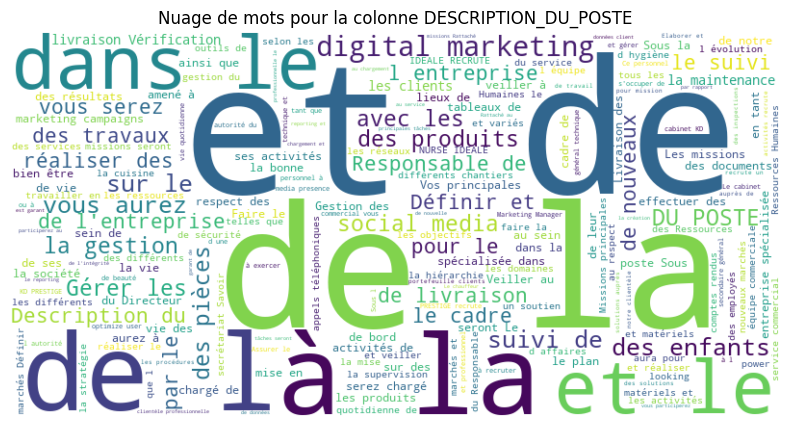

Vérification de la colonne Job Description_y :
470    NaN
471    NaN
472    NaN
473    NaN
474    NaN
Name: Job Description_y, dtype: object
Longueur du texte concaténé pour la colonne Job Description_y : 0
Aucun mot à afficher dans le nuage de mots pour la colonne Job Description_y.
Vérification de la colonne Description1 :
470    NaN
471    NaN
472    NaN
473    NaN
474    NaN
Name: Description1, dtype: object
Longueur du texte concaténé pour la colonne Description1 : 0
Aucun mot à afficher dans le nuage de mots pour la colonne Description1.


In [79]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger les données scrappées (remplacez 'chemin_vers_votre_fichier.csv' par le chemin de votre fichier)
df = result1

# Liste des sites web spécifiés
sites_web = [
    'emploi.educarriere.ci', 'novojob.ci', 'Emploi.ci', 'ci.talent.com',
    'projobivoire.com', 'Agenceemploijeunes.ci', 'Alerteemploi.net',
    'Rmo-jobcenter.com', 'https://yop.l-frii.com/'
]

# Filtrer les données pour n'inclure que les offres des sites spécifiés
df_filtered = df[df['URL'].str.contains('|'.join(sites_web), na=False)]

# Vérifiez le nombre de lignes après le filtrage
print("Nombre de lignes après filtrage :", len(df_filtered))

# Vérifiez quelques colonnes de description pour s'assurer qu'elles ne sont pas vides
description_columns = ['DESCRIPTION_DU_POSTE', 'Job Description_y', 'Description1', 'DESCRIPTION_DU_POSTE_x', 'DESCRIPTION_DU_POSTE_y']
for col in description_columns:
    if col in df_filtered.columns:
        print(f"Vérification de la colonne {col} :")
        print(df_filtered[col].head())

        # Concaténer les descriptions des offres filtrées
        text = " ".join(description for description in df_filtered[col].dropna())

        # Vérifiez la longueur du texte concaténé
        print(f"Longueur du texte concaténé pour la colonne {col} :", len(text))

        # Créer le nuage de mots si le texte concaténé n'est pas vide
        if text:
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

            # Afficher le nuage de mots
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.title(f"Nuage de mots pour la colonne {col}")
            plt.show()
        else:
            print(f"Aucun mot à afficher dans le nuage de mots pour la colonne {col}.")


Nombre de lignes après filtrage : 900
Vérification de la colonne INTITULE_DU_POSTE :
436    GRAPHISTE DESIGNER
437    GRAPHISTE DESIGNER
438    GRAPHISTE DESIGNER
439    GRAPHISTE DESIGNER
440    GRAPHISTE DESIGNER
Name: INTITULE_DU_POSTE, dtype: object
Longueur du texte concaténé pour la colonne INTITULE_DU_POSTE : 22589


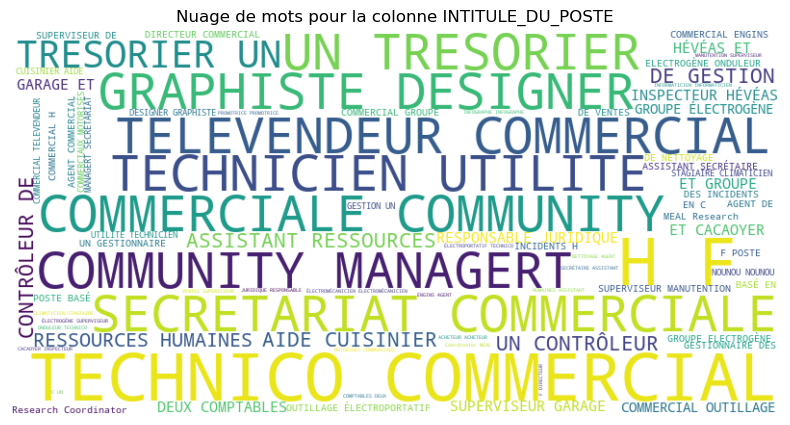

Vérification de la colonne INTITULE_DU_POSTE_x :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: INTITULE_DU_POSTE_x, dtype: object
Longueur du texte concaténé pour la colonne INTITULE_DU_POSTE_x : 0
Aucun mot à afficher dans le nuage de mots pour la colonne INTITULE_DU_POSTE_x.
Vérification de la colonne INTITULE_DU_POSTE_y :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: INTITULE_DU_POSTE_y, dtype: object
Longueur du texte concaténé pour la colonne INTITULE_DU_POSTE_y : 0
Aucun mot à afficher dans le nuage de mots pour la colonne INTITULE_DU_POSTE_y.


In [158]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger les données scrappées (remplacez 'chemin_vers_votre_fichier.csv' par le chemin de votre fichier)
df = result1

# Liste des sites web spécifiés
sites_web = [
    'emploi.educarriere.ci', 'novojob.ci', 'Emploi.ci', 'ci.talent.com',
    'projobivoire.com', 'Agenceemploijeunes.ci', 'Alerteemploi.net',
    'Rmo-jobcenter.com', 'https://yop.l-frii.com/'
]

# Filtrer les données pour n'inclure que les offres des sites spécifiés
df_filtered = df[df['URL'].str.contains('|'.join(sites_web), na=False)]

# Vérifiez le nombre de lignes après le filtrage
print("Nombre de lignes après filtrage :", len(df_filtered))

# Vérifiez quelques colonnes de description pour s'assurer qu'elles ne sont pas vides
description_columns = ["INTITULE_DU_POSTE","INTITULE_DU_POSTE_x",'INTITULE_DU_POSTE_y']
for col in description_columns:
    if col in df_filtered.columns:
        print(f"Vérification de la colonne {col} :")
        print(df_filtered[col].head())

        # Concaténer les descriptions des offres filtrées
        text = " ".join(description for description in df_filtered[col].dropna())

        # Vérifiez la longueur du texte concaténé
        print(f"Longueur du texte concaténé pour la colonne {col} :", len(text))

        # Créer le nuage de mots si le texte concaténé n'est pas vide
        if text:
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

            # Afficher le nuage de mots
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.title(f"Nuage de mots pour la colonne {col}")
            plt.show()
        else:
            print(f"Aucun mot à afficher dans le nuage de mots pour la colonne {col}.")


Nombre de lignes après filtrage : 900
Vérification de la colonne LIEU_DU_POSTE_DE_TRAVAIL :
436    Abidjan 2 plateaux Aghien
437    Abidjan 2 plateaux Aghien
438    Abidjan 2 plateaux Aghien
439    Abidjan 2 plateaux Aghien
440    Abidjan 2 plateaux Aghien
Name: LIEU_DU_POSTE_DE_TRAVAIL, dtype: object
Longueur du texte concaténé pour la colonne LIEU_DU_POSTE_DE_TRAVAIL : 16199


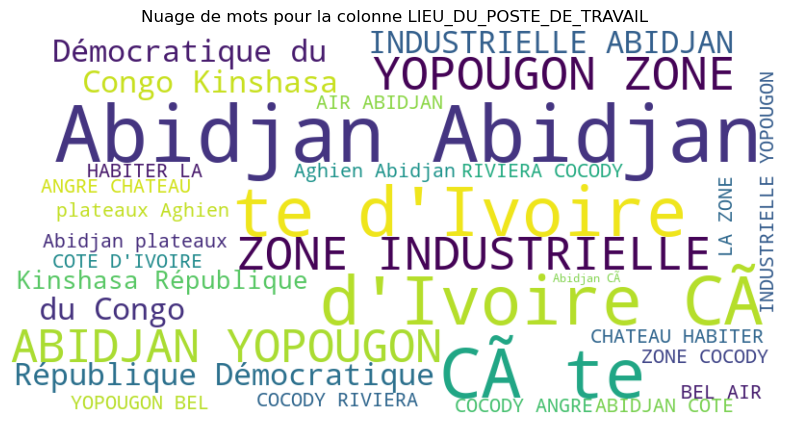

Vérification de la colonne Localisation :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: Localisation, dtype: object
Longueur du texte concaténé pour la colonne Localisation : 0
Aucun mot à afficher dans le nuage de mots pour la colonne Localisation.
Vérification de la colonne Location_y :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: Location_y, dtype: object
Longueur du texte concaténé pour la colonne Location_y : 0
Aucun mot à afficher dans le nuage de mots pour la colonne Location_y.


In [160]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger les données scrappées (remplacez 'chemin_vers_votre_fichier.csv' par le chemin de votre fichier)
df = result1

# Liste des sites web spécifiés
sites_web = [
    'emploi.educarriere.ci', 'novojob.ci', 'Emploi.ci', 'ci.talent.com',
    'projobivoire.com', 'Agenceemploijeunes.ci', 'Alerteemploi.net',
    'Rmo-jobcenter.com', 'https://yop.l-frii.com/'
]

# Filtrer les données pour n'inclure que les offres des sites spécifiés
df_filtered = df[df['URL'].str.contains('|'.join(sites_web), na=False)]

# Vérifiez le nombre de lignes après le filtrage
print("Nombre de lignes après filtrage :", len(df_filtered))

# Vérifiez quelques colonnes de description pour s'assurer qu'elles ne sont pas vides
description_columns = ['LIEU_DU_POSTE_DE_TRAVAIL','Localisation','Location_y']
for col in description_columns:
    if col in df_filtered.columns:
        print(f"Vérification de la colonne {col} :")
        print(df_filtered[col].head())

        # Concaténer les descriptions des offres filtrées
        text = " ".join(description for description in df_filtered[col].dropna())

        # Vérifiez la longueur du texte concaténé
        print(f"Longueur du texte concaténé pour la colonne {col} :", len(text))

        # Créer le nuage de mots si le texte concaténé n'est pas vide
        if text:
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

            # Afficher le nuage de mots
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.title(f"Nuage de mots pour la colonne {col}")
            plt.show()
        else:
            print(f"Aucun mot à afficher dans le nuage de mots pour la colonne {col}.")


Nombre de lignes après filtrage : 900
Vérification de la colonne SITE_WEB_DE_L_ENTREPRISE :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: SITE_WEB_DE_L_ENTREPRISE, dtype: object
Longueur du texte concaténé pour la colonne SITE_WEB_DE_L_ENTREPRISE : 0
Aucun mot à afficher dans le nuage de mots pour la colonne SITE_WEB_DE_L_ENTREPRISE.
Vérification de la colonne url :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: url, dtype: object
Longueur du texte concaténé pour la colonne url : 0
Aucun mot à afficher dans le nuage de mots pour la colonne url.
Vérification de la colonne URL :
436    https://emploi.educarriere.ci/nos-offres?page1...
437    https://emploi.educarriere.ci/nos-offres?page1...
438    https://emploi.educarriere.ci/nos-offres?page1...
439    https://emploi.educarriere.ci/nos-offres?page1...
440    https://emploi.educarriere.ci/nos-offres?page1...
Name: URL, dtype: object
Longueur du texte concaténé pour la colonne URL : 112199


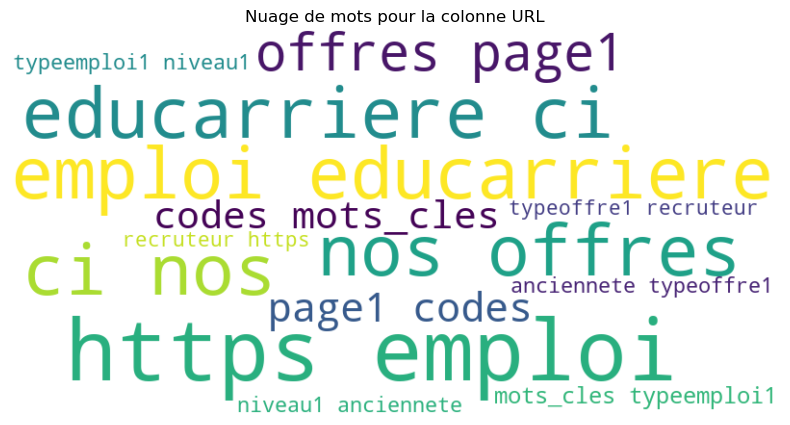

Vérification de la colonne Source URL :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: Source URL, dtype: object
Longueur du texte concaténé pour la colonne Source URL : 0
Aucun mot à afficher dans le nuage de mots pour la colonne Source URL.


In [162]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger les données scrappées (remplacez 'chemin_vers_votre_fichier.csv' par le chemin de votre fichier)
df = result1

# Liste des sites web spécifiés
sites_web = [
    'emploi.educarriere.ci', 'novojob.ci', 'Emploi.ci', 'ci.talent.com',
    'projobivoire.com', 'Agenceemploijeunes.ci', 'Alerteemploi.net',
    'Rmo-jobcenter.com', 'https://yop.l-frii.com/'
]

# Filtrer les données pour n'inclure que les offres des sites spécifiés
df_filtered = df[df['URL'].str.contains('|'.join(sites_web), na=False)]

# Vérifiez le nombre de lignes après le filtrage
print("Nombre de lignes après filtrage :", len(df_filtered))

# Vérifiez quelques colonnes de description pour s'assurer qu'elles ne sont pas vides
description_columns = ['SITE_WEB_DE_L_ENTREPRISE','url', 'URL','Source URL']
for col in description_columns:
    if col in df_filtered.columns:
        print(f"Vérification de la colonne {col} :")
        print(df_filtered[col].head())

        # Concaténer les descriptions des offres filtrées
        text = " ".join(description for description in df_filtered[col].dropna())

        # Vérifiez la longueur du texte concaténé
        print(f"Longueur du texte concaténé pour la colonne {col} :", len(text))

        # Créer le nuage de mots si le texte concaténé n'est pas vide
        if text:
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

            # Afficher le nuage de mots
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.title(f"Nuage de mots pour la colonne {col}")
            plt.show()
        else:
            print(f"Aucun mot à afficher dans le nuage de mots pour la colonne {col}.")


Nombre de lignes après filtrage : 900
Vérification de la colonne TYPE_DE_CONTRAT_DU_POSTE :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: TYPE_DE_CONTRAT_DU_POSTE, dtype: object
Longueur du texte concaténé pour la colonne TYPE_DE_CONTRAT_DU_POSTE : 0
Aucun mot à afficher dans le nuage de mots pour la colonne TYPE_DE_CONTRAT_DU_POSTE.
Vérification de la colonne INTITULE_DU_POSTE :
436    GRAPHISTE DESIGNER
437    GRAPHISTE DESIGNER
438    GRAPHISTE DESIGNER
439    GRAPHISTE DESIGNER
440    GRAPHISTE DESIGNER
Name: INTITULE_DU_POSTE, dtype: object
Longueur du texte concaténé pour la colonne INTITULE_DU_POSTE : 22589


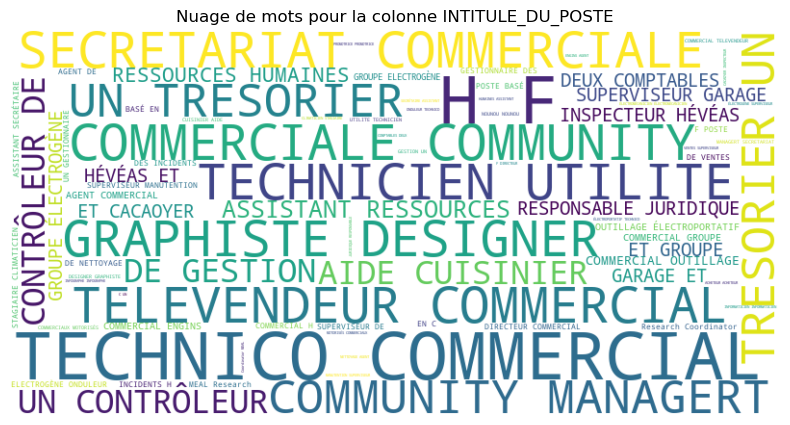

Vérification de la colonne Entreprise :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: Entreprise, dtype: object
Longueur du texte concaténé pour la colonne Entreprise : 0
Aucun mot à afficher dans le nuage de mots pour la colonne Entreprise.
Vérification de la colonne PAYS_DU_POSTE_DE_TRAVAIL :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: PAYS_DU_POSTE_DE_TRAVAIL, dtype: object
Longueur du texte concaténé pour la colonne PAYS_DU_POSTE_DE_TRAVAIL : 0
Aucun mot à afficher dans le nuage de mots pour la colonne PAYS_DU_POSTE_DE_TRAVAIL.


In [188]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger les données scrappées (remplacez 'chemin_vers_votre_fichier.csv' par le chemin de votre fichier)
df = result1

# Liste des sites web spécifiés
sites_web = [
    'emploi.educarriere.ci', 'novojob.ci', 'Emploi.ci', 'ci.talent.com',
    'projobivoire.com', 'Agenceemploijeunes.ci', 'Alerteemploi.net',
    'Rmo-jobcenter.com', 'https://yop.l-frii.com/'
]

# Filtrer les données pour n'inclure que les offres des sites spécifiés
df_filtered = df[df['URL'].str.contains('|'.join(sites_web), na=False)]

# Vérifiez le nombre de lignes après le filtrage
print("Nombre de lignes après filtrage :", len(df_filtered))

# Vérifiez quelques colonnes de description pour s'assurer qu'elles ne sont pas vides
description_columns = ['TYPE_DE_CONTRAT_DU_POSTE','INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       
       ]
for col in description_columns:
    if col in df_filtered.columns:
        print(f"Vérification de la colonne {col} :")
        print(df_filtered[col].head())

        # Concaténer les descriptions des offres filtrées
        text = " ".join(description for description in df_filtered[col].dropna())

        # Vérifiez la longueur du texte concaténé
        print(f"Longueur du texte concaténé pour la colonne {col} :", len(text))

        # Créer le nuage de mots si le texte concaténé n'est pas vide
        if text:
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

            # Afficher le nuage de mots
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.title(f"Nuage de mots pour la colonne {col}")
            plt.show()
        else:
            print(f"Aucun mot à afficher dans le nuage de mots pour la colonne {col}.")


In [200]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger les données scrappées (remplacez 'chemin_vers_votre_fichier.csv' par le chemin de votre fichier)
df = result1  # Remplacez par votre DataFrame contenant les données scrappées

# Liste des sites web spécifiés pour le filtrage
sites_web = [
    'emploi.educarriere.ci', 'novojob.ci', 'Emploi.ci', 'ci.talent.com',
    'projobivoire.com', 'Agenceemploijeunes.ci', 'Alerteemploi.net',
    'Rmo-jobcenter.com', 'https://yop.l-frii.com/'
]

# Filtrer les données pour n'inclure que les offres des sites spécifiés
df_filtered = df[df['URL'].str.contains('|'.join(sites_web), na=False)]

# Vérifier le nombre de lignes après le filtrage
print("Nombre de lignes après filtrage :", len(df_filtered))

# Sélectionner une colonne contenant du texte descriptif (exemple: DESCRIPTION_DU_POSTE)
colonne_texte = 'TYPE_DE_CONTRAT_DU_POSTE'

# Concaténer les descriptions des offres filtrées dans la colonne choisie
texte_concatene = " ".join(description for description in df_filtered[colonne_texte].dropna())

# Vérifier la longueur du texte concaténé
print(f"Longueur du texte concaténé pour la colonne {colonne_texte} :", len(texte_concatene))

# Créer le nuage de mots si le texte concaténé n'est pas vide
if texte_concatene:
    # Création du nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_concatene)

    # Affichage du nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Nuage de mots pour la colonne {colonne_texte}")
    plt.show()
else:
    print(f"Aucun mot à afficher dans le nuage de mots pour la colonne {colonne_texte}.")


Nombre de lignes après filtrage : 900
Longueur du texte concaténé pour la colonne TYPE_DE_CONTRAT_DU_POSTE : 0
Aucun mot à afficher dans le nuage de mots pour la colonne TYPE_DE_CONTRAT_DU_POSTE.


In [190]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger les données scrappées (remplacez 'chemin_vers_votre_fichier.csv' par le chemin de votre fichier)
df = result1

# Liste des sites web spécifiés
sites_web = [
    'emploi.educarriere.ci', 'novojob.ci', 'Emploi.ci', 'ci.talent.com',
    'projobivoire.com', 'Agenceemploijeunes.ci', 'Alerteemploi.net',
    'Rmo-jobcenter.com', 'https://yop.l-frii.com/'
]

# Filtrer les données pour n'inclure que les offres des sites spécifiés
df_filtered = df[df['URL'].str.contains('|'.join(sites_web), na=False)]

# Vérifiez le nombre de lignes après le filtrage
print("Nombre de lignes après filtrage :", len(df_filtered))

# Vérifiez quelques colonnes de description pour s'assurer qu'elles ne sont pas vides
description_columns = ['TYPE_DE_CONTRAT_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       
       ]
for col in description_columns:
    if col in df_filtered.columns:
        print(f"Vérification de la colonne {col} :")
        print(df_filtered[col].head())

        # Concaténer les descriptions des offres filtrées
        text = " ".join(description for description in df_filtered[col].dropna())

        # Vérifiez la longueur du texte concaténé
        print(f"Longueur du texte concaténé pour la colonne {col} :", len(text))

        # Créer le nuage de mots si le texte concaténé n'est pas vide
        if text:
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

            # Afficher le nuage de mots
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.title(f"Nuage de mots pour la colonne {col}")
            plt.show()
        else:
            print(f"Aucun mot à afficher dans le nuage de mots pour la colonne {col}.")


Nombre de lignes après filtrage : 900
Vérification de la colonne TYPE_DE_CONTRAT_DU_POSTE :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: TYPE_DE_CONTRAT_DU_POSTE, dtype: object
Longueur du texte concaténé pour la colonne TYPE_DE_CONTRAT_DU_POSTE : 0
Aucun mot à afficher dans le nuage de mots pour la colonne TYPE_DE_CONTRAT_DU_POSTE.
Vérification de la colonne Entreprise :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: Entreprise, dtype: object
Longueur du texte concaténé pour la colonne Entreprise : 0
Aucun mot à afficher dans le nuage de mots pour la colonne Entreprise.
Vérification de la colonne PAYS_DU_POSTE_DE_TRAVAIL :
436    NaN
437    NaN
438    NaN
439    NaN
440    NaN
Name: PAYS_DU_POSTE_DE_TRAVAIL, dtype: object
Longueur du texte concaténé pour la colonne PAYS_DU_POSTE_DE_TRAVAIL : 0
Aucun mot à afficher dans le nuage de mots pour la colonne PAYS_DU_POSTE_DE_TRAVAIL.


In [ ]:
Noms des colonnes : Index(['INTITULE_DU_POSTE', 'Entreprise', 'PAYS_DU_POSTE_DE_TRAVAIL',
       'DATE_DE_DEBUT_DE_L_OFFRE', 'EXPERIENCE_PROFESSIONNELLE',
       'Experience_lettre', 'url', 'SITE_WEB_DE_L_ENTREPRISE',
       'LIEU_DU_POSTE_DE_TRAVAIL', 'DATE_D_EXPIRATION_DE_L_OFFRE',
       'SPECIALITE', 'BRANCHE_D_ACTIVITE', 'NOMBRE_DE_POSTES_A_POURVOIR',
       'TYPE_DE_CONTRAT_DU_POSTE', 'DESCRIPTION_DU_POSTE',
       'RAISON_SOCIALE_DE_L_ENTREPRISE', 'DIPLOME',
       'VILLE_DU_POSTE_DE_TRAVAIL', 'Image_URL', 'Job_Link', 'Code',
       'Date_DEdition', 'Date_limite', 'URL', 'Profil du poste',
       'Dossiers de candidature', 'Unite_EXPERIENCE_PROFESSIONNELLE',
       'URL_DU_POSTE', 'Job Image', 'Source URL', 'NOMBRE_DE_POSTE_DE_TRAVAIL',
       'Titre du Poste', 'Niveau Requis', 'Année d'Expérience Requise',
       'Lieu du Travail', 'Date de Soumission', 'annee_min', 'annee_max',
       'DETAILS_URL', 'DESCRIPTION_DU_POSTE_x', 'N° de l'Offre :',
       'INTITULE_DU_POSTE_x', 'Localisation', 'Rémunération',
       'NIVEAU_D_ETUDES', 'Informatique :', 'Langues :', 'Avantages :',
       'FILIALE', 'FONCTION', 'SECTEUR', 'REFERENCE_STATUT',
       'INTITULE_DU_POSTE_y', 'DESCRIPTION_DU_POSTE_y', 'POSTE', 'SOUS_POSTE',
       'Data_cloture', 'CATEGORIE', 'Niveau d´études', 'Niveau d'expérience',
       'Type de contrat', 'Compétences clés', 'Offre_Link', 'Author',
       'Job Title1', 'Author1', 'Date Posted1', 'Description1',
       'Nous Recherchons', 'Département', 'Supérieur hiérarchique',
       'Supervise', 'Travail %', 'Poste Basé à', 'Mobilité', 'Contrat',
       'Début de contrat', 'Application Deadline', 'Diploma Requirement',
       'DIPLOME_REQUIS', 'Job Title_y', 'Location_y', 'Reference', 'Niveau',
       'Experience', 'Gender', 'Job Description_y', 'Niveau_experience'],
      dtype='object')


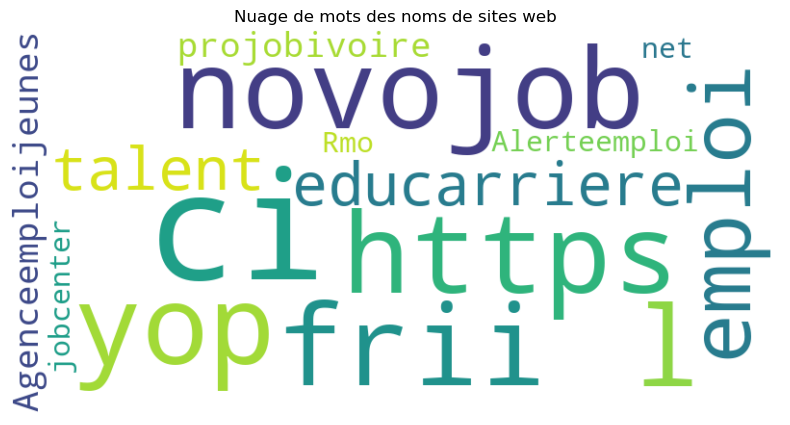

In [172]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Liste des sites web spécifiés
sites_web = [
    'emploi.educarriere.ci', 'novojob.ci', 'novojob.ci', 'novojob.ci', 'novojob.ci', 'Emploi.ci', 'ci.talent.com',
    'projobivoire.com', 'Agenceemploijeunes.ci', 'Alerteemploi.net',
    'Rmo-jobcenter.com', 'https://yop.l-frii.com/','https://yop.l-frii.com/','https://yop.l-frii.com/','https://yop.l-frii.com/'
]

# Concaténer les noms des sites web
text = " ".join(site for site in sites_web)

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des noms de sites web")
plt.show()


In [110]:
from plotly.io import write_html
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Charger les données (assurez-vous d'avoir préalablement importé les bibliothèques nécessaires et défini df_offers)
# df_offers = pd.read_csv("votre_fichier.csv")  # Remplacez "votre_fichier.csv" par votre fichier de données

# Réorganiser les colonnes selon vos besoins
df = result1
df['Niveau'] = df['Niveau'].fillna('').astype(str)

# Définir une fonction pour attribuer des valeurs numériques à l'expérience
def experience_level(row):
    exp_mapping = {
        'Moins d’un an': 1, 'Sans expérience': 1, '1 à 2 ans': 1, '2 à 3 ans': 2, '3 à 4 ans': 3, '4 à 5 ans': 4,
        '3 à 5 ans': 4, '5 à 6 ans': 5, '6 à 7 ans': 6, '6 à 10 ans': 6, '7 à 8 ans': 7, '8 à 9 ans': 8,
        '9 à 10 ans': 9, 'Plus de 10 ans': 11
    }
    return exp_mapping.get(row['Experience_lettre'], 12)

# Appliquer la fonction pour créer une nouvelle colonne "Niveau_experience"
df['Niveau_experience'] = df.apply(experience_level, axis=1)

# Options pour les filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]
types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': level, 'value': level} for level in sorted(set(df['Niveau']))]

# Initialiser l'application Dash avec les styles CSS
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Définir la mise en page du tableau de bord
app.layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),

    # Filtres interactifs
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value='Tous les secteurs d\'activité',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value='Tous les types de contrat',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value='Tous les niveaux d\'expérience',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Button('Réinitialiser les filtres', id='bouton-reset', n_clicks=0, style={'background-color': 'green'})
    ], style={'display': 'flex', 'background-color': 'green'}),

    # Graphiques
    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
    ], className='row', style={'background-color': 'white'})
])

# Callback pour mettre à jour les graphiques en fonction des filtres
@app.callback(
    [Output('graph-secteur-activite', 'figure'),
     Output('graph-entreprise', 'figure'),
     Output('graph-type-contrat', 'figure'),
     Output('graph-part-entreprises-par-type', 'figure'),
     Output('graph-part-entreprises-par-categorie', 'figure'),
     Output('graph-taille-moyenne-entreprises', 'figure')],
    [Input('filtre-secteur-activite', 'value'),
     Input('filtre-type-contrat', 'value'),
     Input('filtre-niveau-experience', 'value'),
     Input('bouton-reset', 'n_clicks')]
)
def update_graphs(secteurs_activite, types_contrat, niveaux_experience, n_clicks_reset):
    # Filtrage du DataFrame en fonction des sélections
    df_filtered = result1
    # Définir les filtres à appliquer
    filters = {
        'BRANCHE_D_ACTIVITE': secteurs_activite,
        'TYPE_DE_CONTRAT_DU_POSTE': types_contrat,
        'Niveau': niveaux_experience
    }

    # Appliquer les filtres
    for column, values in filters.items():
        if values and 'Tous' not in values:
            if isinstance(values, str):
                values = [values]  # Transformer en liste si c'est une chaîne de caractères unique
            df_filtered = df_filtered[df_filtered[column].isin(values)]

    # Graphique du nombre d'offres par secteur d'activité
    fig_secteur_activite = px.bar(df_filtered, x="BRANCHE_D_ACTIVITE", title="Nombre d'offres par secteur d'activité",
                                  color_discrete_sequence=['orange'])

    # Graphique du nombre d'offres par entreprise
    fig_entreprise = px.bar(df_filtered, x="Entreprise", title="Nombre d'offres par entreprise",
                            color_discrete_sequence=['orange'])

    # Graphique du type de contrat proposé
    fig_type_contrat = px.bar(df_filtered, x="TYPE_DE_CONTRAT_DU_POSTE", title="Type de contrat proposé",
                              color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par type de contrat
    fig_part_entreprises_par_type = px.pie(df_filtered, names="TYPE_DE_CONTRAT_DU_POSTE",
                                           title="Part des entreprises par type de contrat", color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par catégorie (utilisation correcte des colonnes disponibles)
    fig_part_entreprises_par_categorie = px.pie(df_filtered, names="Niveau",
                                                title="Part des entreprises par catégorie", color_discrete_sequence=['orange'])

    # Graphique pour la taille moyenne des entreprises par catégorie (utilisation correcte des colonnes disponibles)
    fig_taille_moyenne_entreprises = px.bar(df_filtered, x="Niveau", y="NOMBRE_DE_POSTES_A_POURVOIR",
                                            title="Taille moyenne des entreprises par catégorie", color_discrete_sequence=['orange'])

    return fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises

if __name__ == '__main__':
    #app.run_server(debug=True)
    app.run_server(debug=True, port=8058)


In [58]:


# Concaténer les DataFrames
frames1 = [
          Data_Scrapping_df_novojob_08042024, 
          Data_Scrapping_df_projobivoire_08042024, 
          Data_Scrapping_df_talent_ci_08042024, 
           
          Data_Scrapping_mondiale_df_08042024, 
          ]

# Concaténer les DataFrames en un seul
result1 = pd.concat(frames1, ignore_index=True)

# Afficher le DataFrame résultant
result1


,INTITULE_DU_POSTE,Entreprise,PAYS_DU_POSTE_DE_TRAVAIL,DATE_DE_DEBUT_DE_L_OFFRE,Niveau,Experience_lettre,url,SITE_WEB_DE_L_ENTREPRISE,LIEU_DU_POSTE_DE_TRAVAIL,DATE_D_EXPIRATION_DE_L_OFFRE,...,Niveau d'étude (diplome),NOMBRE_DE_POSTES_A_POURVOIR,TYPE_DE_CONTRAT_DU_POSTE,RAISON_SOCIALE_DE_L_ENTREPRISE,VILLE_DU_POSTE_DE_TRAVAIL,DATE_DE_PUBLICATION,CATEGORIE,EmailURL,DESCRIPTION_DU_POSTE,SECTEUR
0,Gestionnaire des Ressources Humaines,NaN,Côte d'ivoire,24 Mars,Manager / Responsable département,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",22 Juin,...,NaN,NaN,NaN,NaN,Abidjan,NaN,NaN,NaN,NaN,NaN
1,Gestionnaire des Ressources Humaines,NaN,Côte d'ivoire,24 Mars,Manager / Responsable département,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",22 Juin,...,NaN,NaN,NaN,NaN,Abidjan,NaN,NaN,NaN,NaN,NaN
2,Gestionnaire des Ressources Humaines,NaN,Côte d'ivoire,24 Mars,Manager / Responsable département,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",22 Juin,...,NaN,NaN,NaN,NaN,Abidjan,NaN,NaN,NaN,NaN,NaN
3,Gestionnaire des Ressources Humaines,NaN,Côte d'ivoire,24 Mars,Manager / Responsable département,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",22 Juin,...,NaN,NaN,NaN,NaN,Abidjan,NaN,NaN,NaN,NaN,NaN
4,Gestionnaire des Ressources Humaines,NaN,Côte d'ivoire,24 Mars,Manager / Responsable département,6 à 10 ans,https://www.novojob.com/cote-d-ivoire/offres-d...,https://www.novojob.com/cote-d-ivoire/offres-d...,"Abidjan, Côte d'ivoire",22 Juin,...,NaN,NaN,NaN,NaN,Abidjan,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10257,Driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kyiv,Ukraine",4/15/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Administration/Office Support
10258,Driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Panama City,Panama",4/17/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Administration/Office Support
10259,E T Consultant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Brussels,Belgium",4/9/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transportation
10260,E T Consultant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Washington, DC,United States",4/15/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Health/Nutrition/Population


In [60]:
result_2 = pd.concat([result, result1], ignore_index=True)

# Afficher le DataFrame résultant


result_2

,BRANCHE_D_ACTIVITE,TYPE_DE_CONTRAT_DU_POSTE,SPECIALITE,DIPLOME,EXPERIENCE_PROFESSIONNELLE,LIEU_DU_POSTE_DE_TRAVAIL,SITE_WEB_DE_L_ENTREPRISE,DATE_DE_DEBUT_DE_L_OFFRE,DATE_D_EXPIRATION_DE_L_OFFRE,Description,...,Job Image,Source URL,NOMBRE_DE_POSTE_DE_TRAVAIL,Titre du Poste,Niveau Requis,Année d'Expérience Requise,Lieu du Travail,Date de Soumission,annee_min,annee_max
0,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62779,NaN,NaN,NaN,NaN,NaN,"Kyiv,Ukraine",NaN,NaN,4/15/2024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62780,NaN,NaN,NaN,NaN,NaN,"Panama City,Panama",NaN,NaN,4/17/2024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62781,NaN,NaN,NaN,NaN,NaN,"Brussels,Belgium",NaN,NaN,4/9/2024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62782,NaN,NaN,NaN,NaN,NaN,"Washington, DC,United States",NaN,NaN,4/15/2024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
result_2 = result_2.drop_duplicates()
result_2.reset_index(drop=True, inplace=True)

result_2

,BRANCHE_D_ACTIVITE,TYPE_DE_CONTRAT_DU_POSTE,SPECIALITE,DIPLOME,EXPERIENCE_PROFESSIONNELLE,LIEU_DU_POSTE_DE_TRAVAIL,SITE_WEB_DE_L_ENTREPRISE,DATE_DE_DEBUT_DE_L_OFFRE,DATE_D_EXPIRATION_DE_L_OFFRE,Description,...,Job Image,Source URL,NOMBRE_DE_POSTE_DE_TRAVAIL,Titre du Poste,Niveau Requis,Année d'Expérience Requise,Lieu du Travail,Date de Soumission,annee_min,annee_max
0,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EXPERT(E) DÉVELOPPEUR DE SITE INTERNET INTERACTIF,Emploi,Informatique,BAC+5,5.0,Côte d'Ivoire,https://emploi.educarriere.ci/offre-116075-exp...,08/04/2024,30/04/2024,MDHoldingrecruteEXPERT(E) DÉVELOPPEUR DE SITE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61134,NaN,NaN,NaN,NaN,NaN,"Abidjan, Abidjan Autonomous District",https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61135,NaN,NaN,NaN,NaN,NaN,"Abidjan, Abidjan Autonomous District",https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61136,NaN,NaN,NaN,NaN,NaN,"Abidjan, Abidjan Autonomous District",https://ci.talent.com/jobs?l=Abidjan%2C+Abidja...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61137,NaN,NaN,NaN,NaN,NaN,"Nairobi,Kenya",NaN,NaN,4/12/2024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
from plotly.io import write_html
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Charger les données (assurez-vous d'avoir préalablement importé les bibliothèques nécessaires et défini df_offers)
# df_offers = pd.read_csv("votre_fichier.csv")  # Remplacez "votre_fichier.csv" par votre fichier de données

# Réorganiser les colonnes selon vos besoins


# Définir une fonction pour attribuer des valeurs numériques à l'expérience
def experience_level(row):
    exp_mapping = {
        'Moins d’un an': 1, 'Sans expérience': 1, '1 à 2 ans': 1, '2 à 3 ans': 2, '3 à 4 ans': 3, '4 à 5 ans': 4,
        '3 à 5 ans': 4, '5 à 6 ans': 5, '6 à 7 ans': 6, '6 à 10 ans': 6, '7 à 8 ans': 7, '8 à 9 ans': 8,
        '9 à 10 ans': 9, 'Plus de 10 ans': 11
    }
    return exp_mapping.get(row['Experience_lettre'], 12)

# Appliquer la fonction pour créer une nouvelle colonne "Niveau_experience"
df['Niveau_experience'] = df.apply(experience_level, axis=1)

# Options pour les filtres
# Filtrer les options pour exclure celles avec une étiquette nulle
# Options pour les filtres
secteurs_activite_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': secteur, 'value': secteur} for secteur in df["BRANCHE_D_ACTIVITE"].unique() if pd.notna(secteur)]

types_contrat_options = [{'label': 'Tout sélectionner', 'value': 'all'}] + [{'label': contrat, 'value': contrat} for contrat in df["TYPE_DE_CONTRAT_DU_POSTE"].unique() if pd.notna(contrat)]
niveaux_experience_options = [{'label': level, 'value': level} for level in sorted(set(df['Niveau']))]

# Palettes de couleurs
secteur_activite_palette = px.colors.qualitative.Pastel1
entreprise_palette = px.colors.qualitative.Set2
type_contrat_palette = px.colors.qualitative.Pastel2

# Initialiser l'application Dash avec les styles CSS
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Définir la mise en page du tableau de bord
app.layout = html.Div(children=[
    html.H1(children='Tableau de Bord des Offres d\'Emploi', className='text-center mb-4', style={'color': 'green'}),

    # Filtres interactifs
    html.Div([
        html.Div([
            html.Label('Filtrer par Secteur d\'activité', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-secteur-activite',
                options=secteurs_activite_options,
                value='Tous les secteurs d\'activité',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Type de contrat', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-type-contrat',
                options=types_contrat_options,
                value='Tous les types de contrat',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Div([
            html.Label('Filtrer par Niveau d\'expérience', style={'color': 'white'}),
            dcc.Dropdown(
                id='filtre-niveau-experience',
                options=niveaux_experience_options,
                value='Tous les niveaux d\'expérience',
                className='form-control'
            ),
        ], className='col-md-4'),

        html.Button('Réinitialiser les filtres', id='bouton-reset', n_clicks=0, style={'background-color': 'green'})
    ], style={'display': 'flex', 'background-color': 'green'}),

    # Graphiques
    html.Div([
        dcc.Graph(id='graph-secteur-activite', className='col-md-6'),
        dcc.Graph(id='graph-entreprise', className='col-md-6'),
        dcc.Graph(id='graph-type-contrat', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-type', className='col-md-6'),
        dcc.Graph(id='graph-taille-moyenne-entreprises', className='col-md-6'),
        dcc.Graph(id='graph-part-entreprises-par-categorie', className='col-md-6'),
        
    ],className='row', style={'background-color': 'white'})
])

# Callback pour mettre à jour les graphiques en fonction des filtres
@app.callback(
    [Output('graph-secteur-activite', 'figure'),
     Output('graph-entreprise', 'figure'),
     Output('graph-type-contrat', 'figure'),
     Output('graph-part-entreprises-par-type', 'figure'),
     Output('graph-part-entreprises-par-categorie', 'figure'),
     Output('graph-taille-moyenne-entreprises', 'figure')],
    [Input('filtre-secteur-activite', 'value'),
     Input('filtre-type-contrat', 'value'),
     Input('filtre-niveau-experience', 'value'),
     Input('bouton-reset', 'n_clicks')]
)
def update_graphs(secteurs_activite, types_contrat, niveaux_experience, n_clicks_reset):
    # Filtrage du DataFrame en fonction des sélections
    df_filtered = result_2
    # Définir les filtres à appliquer
    filters = {
        'BRANCHE_D_ACTIVITE': secteurs_activite,
        'TYPE_DE_CONTRAT_DU_POSTE': types_contrat,
        'Niveau': niveaux_experience
    }

    # Appliquer les filtres
    for column, values in filters.items():
        if values and 'Tous' not in values:
            if isinstance(values, str):
                values = [values]  # Transformer en liste si c'est une chaîne de caractères unique
            df_filtered = df_filtered[df_filtered[column].isin(values)]

    # Graphique du nombre d'offres par secteur d'activité
    fig_secteur_activite = px.bar(df_filtered, x="BRANCHE_D_ACTIVITE", title="Nombre d'offres par secteur d'activité",
                                    color_discrete_sequence=['orange'])

    # Graphique du nombre d'offres par entreprise
    fig_entreprise = px.bar(df_filtered, x="Entreprise", title="Nombre d'offres par entreprise",
                            color_discrete_sequence=['orange'])

    # Graphique du type de contrat proposé
    fig_type_contrat = px.bar(df_filtered, x="TYPE_DE_CONTRAT_DU_POSTE", title="Type de contrat proposé",
                               color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par type de contrat
    fig_part_entreprises_par_type = px.pie(df_filtered, names="TYPE_DE_CONTRAT_DU_POSTE",
                                           title="Part des entreprises par type de contrat", color_discrete_sequence=['orange'])

    # Graphique pour la part des entreprises par catégorie
    fig_part_entreprises_par_categorie = px.pie(df_filtered, names="Niveau de poste",
                                                title="Part des entreprises par catégorie", color_discrete_sequence=['orange'])

    # Graphique pour la taille moyenne des entreprises par catégorie
    fig_taille_moyenne_entreprises = px.bar(df_filtered, x="Niveau de poste", y="NOMBRE_DE_POSTES_A_POURVOIR",
                                             title="Taille moyenne des entreprises par catégorie", color_discrete_sequence=['orange'])

    return fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises

if __name__ == '__main__':
    app.run_server(debug=True, port=8058)

    # Récupérer les figures après l'exécution de l'application
    fig_secteur_activite, fig_entreprise, fig_type_contrat, fig_part_entreprises_par_type, fig_part_entreprises_par_categorie, fig_taille_moyenne_entreprises = update_graphs(
        None, None, None, None)

    # Sauvegarder les graphiques au format HTML
    write_html(fig_secteur_activite, 'graph_secteur_activite.html')
    write_html(fig_entreprise, 'graph_entreprise.html')
    write_html(fig_type_contrat, 'graph_type_contrat.html')
    write_html(fig_part_entreprises_par_type, 'graph_part_entreprises_par_type.html')
    write_html(fig_part_entreprises_par_categorie, 'graph_part_entreprises_par_categorie.html')
    write_html(fig_taille_moyenne_entreprises, 'graph_taille_moyenne_entreprises.html')


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------   
import time
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import pandas as pd
import re
from datetime import datetime
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
import os
#Importation du module d'envoi de mail
from send_mail_offre import send_mail_success_offre, send_mail_error_offre

from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
import dateparser
import os


def collect_job_info(url):
    try:
        # Envoyer une requête GET à l'URL spécifiée
        response = requests.get(url)
        
        # Vérifier si la requête a réussi
        if response.status_code == 200:
            # Utiliser BeautifulSoup pour analyser le contenu HTML
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # Extracting job title
            job_title = soup.find('h3', class_='title').text.strip()
            
            # Extracting author
            author = soup.find('div', class_='info').find('li').text.strip()
            
            # Extracting date posted
            date_posted = soup.find('div', class_='info').find_all('li')[1].text.strip()
            
            # Extracting description
            description = soup.find('div', class_='content').p.text.strip()
            
            # Extracting post URL
            post_url = url
            
            # Return job data as a dictionary encapsulated in a list
            job_data = [{
                'Job Title': job_title,
                'Author': author,
                'Date Posted': date_posted,
                'Description': description,
                'Post URL': post_url
            }]
            
            return job_data
        else:
            print("Failed to fetch the page.")
            return []
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return []

def scrape_additional_details(urls):
    # Initialiser une liste pour stocker les données
    job_data = []
    
    # Configurer Selenium pour s'exécuter en mode headless (sans ouvrir de fenêtre de navigateur)
    chrome_options = Options()
    chrome_options.add_argument("--headless")

    # Boucle à travers chaque URL
    for url in urls:
        try:
            # Initialiser le pilote Selenium
            driver = webdriver.Chrome(options=chrome_options)

            # Envoyer une requête GET en utilisant Selenium
            driver.get(url)

            # Attendre quelques secondes (ajustez selon les besoins)
            time.sleep(30)

            # Attendre que la page soit entièrement chargée
            WebDriverWait(driver, 10).until(
                lambda x: x.execute_script("return document.readyState === 'complete'")
            )

            # Récupérer le code source de la page après l'exécution de JavaScript
            page_source = driver.page_source

            # Fermer le pilote Selenium
            driver.quit()

            # Utiliser BeautifulSoup pour analyser le HTML
            soup = BeautifulSoup(page_source, 'html.parser')

            # Extraire les détails de l'offre d'emploi
            job_title_element = soup.find('h1', class_='entry-title')
            job_title = job_title_element.text.strip() if job_title_element else None

            author_container = soup.find('div', class_='info')
            author_element = author_container.find_all('li')[0] if author_container else None
            author = author_element.text.strip() if author_element else None

            date_container = soup.find('div', class_='info')
            date_element = date_container.find_all('li')[1] if date_container else None
            date_posted = date_element.text.strip() if date_element else None

            views_element = soup.find('div', class_='td-post-views')
            views = views_element.find('span', class_='td-nr-views-19100').text.strip() if views_element and views_element.find('span', class_='td-nr-views-19100') else None

            image_url_element = soup.find('div', class_='td-post-featured-image')
            image_url = image_url_element.find('img')['src'] if image_url_element and image_url_element.find('img') else None

            # Ajouter les détails à la liste
            job_data.append({
                'Job_Title': job_title,
                'Author1': author,
                'Date Posted1': date_posted,
                'Views': views,
                'Image URL': image_url,
                'URL': url
            })
        except Exception as e:
            print(f"Une erreur s'est produite pour l'URL {url}: {str(e)}")
            job_data.append({
                'Job_Title': "",
                'Author1': "",
                'Date Posted1': "",
                'Views': "",
                'Image URL': "",
                'URL': url
            })

    return job_data
def alerte_emploi():
    # Liste des URLs des offres d'emploi
    job_listing_urls = [
        #"https://alerteemploi.net/toutes-les-offres/",
        "https://alerteemploi.net/category/emploi-stages/page/{}/".format(category) for category in range(52)
        # Ajoutez d'autres URLs au besoin
    ]

    # Récupérer les informations initiales des offres d'emploi
    initial_job_info = []
    for url in job_listing_urls:
        initial_job_info.extend(collect_job_info(url))
    initial_job_info1 = pd.DataFrame(initial_job_info) 
   



    # Extraire les URLs des offres d'emploi
    urls = [job['Post URL'] for job in initial_job_info if isinstance(job, dict)]
    #[job['Post URL'] for job in initial_job_info if job]

    # Récupérer les détails supplémentaires des offres d'emploi en utilisant Selenium
    additional_job_info = scrape_additional_details(urls)
    additional_job_info = pd.DataFrame(additional_job_info) 
    

    # Fusionner les informations initiales et supplémentaires
    df = pd.merge( initial_job_info1,additional_job_info, on='Post URL')
    df = df.drop_duplicates()
    df.reset_index(drop=True, inplace=True) 
    return df
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

try:

    alerte_emploi_df = alerte_emploi()
    alerte_emploi_df.reset_index(drop=True, inplace=True)
    chemin_fichier_alerte_emploi_df = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_emploi_df_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    alerte_emploi_df.to_excel(chemin_fichier_alerte_emploi_df, index=False)

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from datetime import datetime
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
import os
#Importation du module d'envoi de mail
from send_mail_offre import send_mail_success_offre, send_mail_error_offre

from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
import dateparser
import os

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def yop_l_frii():
    # List of URLs
    urls = [
        f"https://yop.l-frii.com/offres-demplois/{category}/" for category in range(3276)
        # Add more URLs as needed
    ]

    job_data = []

    for url in urls:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an exception for 4xx or 5xx status codes
            soup = BeautifulSoup(response.content, 'html.parser')

            job_articles = soup.find_all('article', class_='type-emploi')

            for article in job_articles:
                job_title_element = article.find('h2', class_='elementor-heading-title')
                job_title = job_title_element.text.strip() if job_title_element else None

                job_link = article.find('a', href=True)['href']

                job_image_element = article.find('img', class_='attachment-large')
                job_image = job_image_element['src'] if job_image_element else None

                job_data.append({
                    "Job Title": job_title,
                    "Job Link": job_link,
                    "Job Image": job_image,
                    "Source URL": url
                })
        except requests.exceptions.RequestException as e:
            print(f"An error occurred while fetching data from {url}: {e}")

    df_yop_l_frii = pd.DataFrame(job_data)

    # Définition de l'équivalence entre les variables
    equivalences = {
        "Job Title": "INTITULE_DU_POSTE",
        "Job Link": "URL_DU_POSTE",
        "Job Image": None,
        "Source URL": None
    }

    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if
                              nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme

    # Renommer les colonnes du DataFrame
    df_yop_l_frii = renommer_colonnes(df_yop_l_frii, equivalences)

    # Afficher le DataFrame avec les colonnes renommées
    return df_yop_l_frii

# Appel de la fonction principale
yop_l_frii= yop_l_frii()
yop_l_frii['INTITULE_DU_POSTE'] = yop_l_frii['INTITULE_DU_POSTE'].str.replace(r'[()]', '')

# Utilisation de str.extract() pour extraire les parties de la chaîne
yop_l_frii['DATE_DE_DEBUT_DE_L_OFFRE'] = yop_l_frii['INTITULE_DU_POSTE'].str.extract(r'(\d+\s\w+\s\d+)$')



# Remplacer la partie extraite par une chaîne vide pour obtenir INTITULE_DU_POSTE
yop_l_frii['INTITULE_DU_POSTE'] = yop_l_frii['INTITULE_DU_POSTE'].str.replace(r'(\d+\s\w+\s\d+)$', '')
yop_l_frii['NOMBRE_DE_POSTE_DE_TRAVAIL'] = yop_l_frii['INTITULE_DU_POSTE'].str.extract(r'(\d+)\s*postes')



def extract_job_information(url):
    try:
        # Envoyer une requête GET à l'URL
        response = requests.get(url)
        response.raise_for_status()  # Lever une exception en cas d'erreur HTTP
        # Utiliser BeautifulSoup pour analyser le contenu HTML
        soup = BeautifulSoup(response.text, 'html.parser')

        # Rechercher les éléments contenant les informations sur l'emploi
        job_info_elements = soup.find_all('div', class_='elementor-widget-container')

        # Initialiser un dictionnaire pour stocker les informations
        job_info = {'URL_DU_POSTE': url}

        # Parcourir les éléments et extraire les informations
        for element in job_info_elements:
            # Trouver le titre de l'emploi
            title_element = element.find('h2', class_='elementor-heading-title')
            if title_element:
                job_info['Titre du Poste'] = title_element.text.strip()

            # Trouver les autres informations sur l'emploi
            other_info_elements = element.find_all('h2', class_='elementor-heading-title')
            for info_element in other_info_elements:
                info_text = info_element.text.strip()
                # Vérifier chaque élément d'information et l'ajouter au dictionnaire
                if 'Niveau Requis' in info_text:
                    job_info['Niveau Requis'] = info_text.split(':')[-1].strip()
                elif 'Année d\'Expérience Requise' in info_text:
                    job_info['Année d\'Expérience Requise'] = info_text.split(':')[-1].strip()
                elif 'Lieu du Travail' in info_text:
                    job_info['Lieu du Travail'] = info_text.split(':')[-1].strip()
                elif 'Date de Soumission' in info_text:
                    job_info['Date de Soumission'] = info_text.split(':')[-1].strip()

        return job_info
    except Exception as e:
        print(f"Erreur lors de l'extraction des informations pour l'URL {url}: {e}")
        return {'URL_DU_POSTE': url}

def extract_job_info_from_urls(urls):
    # Initialiser une liste pour stocker les informations sur les emplois
    job_info_list = []
    # Parcourir les URLs et extraire les informations sur les emplois
    for url in urls:
        job_info = extract_job_information(url)
        job_info_list.append(job_info)
    # Créer un DataFrame à partir de la liste des informations sur les emplois
    df = pd.DataFrame(job_info_list)
    return df

# Liste des URLs
urls = list(yop_l_frii["URL_DU_POSTE"])

# Extraire les informations sur les emplois à partir des URLs
df = extract_job_info_from_urls(urls)

# Afficher le DataFrame
# Utilisation de str.extract() pour extraire les nombres min et max
extracted_data = df['Année d\'Expérience Requise'].str.extract(r'(\d+)\s*ans,\s*(\d+)\s*ans?')  # Extraction des années min et max

# Renommer les colonnes extraites
extracted_data.columns = ['annee_min', 'annee_max']  # Renommage des colonnes extraites

# Remplir les valeurs manquantes dans annee_min avec les valeurs extraites de Année d'Expérience Requise
extracted_data['annee_min'].fillna(df["Année d'Expérience Requise"], inplace=True)  # Remplissage des valeurs manquantes dans la colonne 'annee_min' avec les valeurs d'origine
extracted_data['annee_max'].fillna(df["Année d'Expérience Requise"], inplace=True)  # Remplissage des valeurs manquantes dans la colonne 'annee_max' avec les valeurs d'origine

# Extraire uniquement les chiffres de chaque colonne
extracted_data['annee_min'] = extracted_data['annee_min'].str.extract(r"([0-9,]+)")  # Extraction des chiffres de la colonne 'annee_min'
extracted_data['annee_max'] = extracted_data['annee_max'].str.extract(r"([0-9,]+)")  # Extraction des chiffres de la colonne 'annee_max'

# Ajouter les colonnes extraites au DataFrame d'origine
df = pd.concat([df, extracted_data], axis=1)  # Ajout des colonnes extraites au DataFrame d'origine

# Affichage du DataFrame résultant
# Diviser la colonne 'Lieu du Travail' en ville et pays
df[['LIEU_DU_POSTE_DE_TRAVAIL', 'PAYS_DU_POSTE_DE_TRAVAIL']] = df['Lieu du Travail'].str.split(', ', n=1, expand=True)

for i in range(len(df["PAYS_DU_POSTE_DE_TRAVAIL"])):
    if df["PAYS_DU_POSTE_DE_TRAVAIL"][i] is None :
        df["PAYS_DU_POSTE_DE_TRAVAIL"][i] = df["LIEU_DU_POSTE_DE_TRAVAIL"][i]
yop_l_frii_total = pd.merge(yop_l_frii,df, on='URL_DU_POSTE')
yop_l_frii_total = yop_l_frii_total.drop_duplicates()
yop_l_frii_total.reset_index(drop=True, inplace=True)
yop_l_frii_total  # Affichage du DataFrame résultant
chemin_fichier_yop_l_frii_total = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_yop_l_frii_total_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
yop_l_frii_total.to_excel(chemin_fichier_yop_l_frii_total, index=False)

In [ ]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from datetime import datetime
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
import os
#Importation du module d'envoi de mail
from send_mail_offre import send_mail_success_offre, send_mail_error_offre

from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
import dateparser
import os


def talent_ci():
    def extract_text(element, tag_name=None):
        tag = element.find(tag_name)
        return tag.text.strip() if tag else ""

    def clean_text(text):
        return text.replace('\r\n', '').replace('\xa0', '')

    def scrape_talent_com(url):
        try:
            response = requests.get(url, timeout=500)
            response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f"Erreur de connexion à {url} : {e}")
            return pd.DataFrame()

        soup = BeautifulSoup(response.text, 'html.parser')

        job_wrappers = soup.find_all('div', class_='card card__job')

        data_list = []

        for wrapper in job_wrappers:
            title_tag = wrapper.find('h2', class_='card__job-title')
            title = extract_text(title_tag, 'a')
            
            employer_location_tag = wrapper.find('div', class_='card__job-empnameLocation')
            #employer = extract_text(employer_location_tag.find('div', class_='card__job-location'))  # Extract location from the inner div
            location= extract_text(employer_location_tag, 'div')

            employer_location_tag = wrapper.find('div', class_='card__job-empname-label')
            
            # Extracting employer and description from the div
            employer = employer_location_tag.text.strip() if employer_location_tag else None  # Extract location from the inner div
            
            description_tag = wrapper.find('div', class_='card__job-snippet-logo')
            description = clean_text(extract_text(description_tag, 'p'))

            data_list.append({
                'Title': title,
                'Location': location,
                'Employer': employer,
                'Description': description,
                'URL': url
            })

        df = pd.DataFrame(data_list)
        return df

    # List of URLs for talent.com jobs
    urls = [
         "https://ci.talent.com/jobs?l=Abidjan%2C+Abidjan&radius=15&p={}&k=&context=serp_pagination".format(category) for category in range(8)
        # Add more URLs as needed "https://ci.talent.com/jobs",
    ]

    # Initialize an empty DataFrame to store the results
    ci_talent = pd.DataFrame()

    # Scrape job information for each URL and concatenate the results
    for url in urls:
        df = scrape_talent_com(url)
        ci_talent = pd.concat([ci_talent, df], ignore_index=True)

    # Définition de l'équivalence entre les variables
    equivalences = {
        "Title": "INTITULE_DU_POSTE",
        "Location": "LIEU_DU_POSTE_DE_TRAVAIL",
        "Employer": "RAISON_SOCIALE_DE_L_ENTREPRISE",
        "Description": "DESCRIPTION_DU_POSTE",
        "URL": "SITE_WEB_DE_L_ENTREPRISE"
    }

    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme

    # Renommer les colonnes du DataFrame
    ci_talent = renommer_colonnes(ci_talent, equivalences)

    # Afficher le DataFrame avec les colonnes renommées
    return ci_talent

try:

# Appel de la fonction principale
#Exportation de la donnée Finale
    df_talent_ci = talent_ci()
    chemin_fichier_df_talent_ci = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_df_talent_ci_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_talent_ci.to_excel(chemin_fichier_df_talent_ci, index=False)

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from datetime import datetime
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
import os
#Importation du module d'envoi de mail
from send_mail_offre import send_mail_success_offre, send_mail_error_offre

from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
import dateparser
import os


def projobivoire():
    def extract_text(element, tag_name=None):
        if element and tag_name:
            tag = element.find(tag_name)
            return tag.text.strip() if tag else ""
        return ""

    def clean_text(text):
        return text.replace('\r\n', '').replace('\xa0', '')

    def scrape_projobivoire_page(page_url):
        job_data_list = []

        for url in page_url:
            try:
                response = requests.get(url, timeout=500)
                response.raise_for_status()
            except requests.exceptions.RequestException as e:
                    print(f"Erreur de connexion à {url} : {e}")
                    continue

            soup = BeautifulSoup(response.text, 'html.parser')

            job_items = soup.find_all('div', class_='loop-item-wrap list')

            if not job_items:
                print(f"Aucun élément de travail trouvé pour l'URL : {url}")
                continue

            for job_item in job_items:
                title_tag = job_item.find('h3', class_='loop-item-title')
                title = extract_text(title_tag, 'a')

                job_type_tag = job_item.find('span', class_='job-type')
                job_type = extract_text(job_type_tag, 'span')

                job_date_posted = soup.find('span', class_='job-date__posted').text.strip()

                job_date_closing_tag = soup.find('span', class_='job-date__closing')
                job_date_closing = job_date_closing_tag.text.strip() if job_date_closing_tag else ""

                job_date_closing = job_date_closing.lstrip('-').strip()

                category_tag = job_item.find('span', class_='job-category')
                category = extract_text(category_tag, 'a')

                # Ajout de ces lignes pour extraire l'URL de l'e-mail
                email_url_tag = job_item.find('span', class_='noo-tool-email-job')
                email_url = email_url_tag['data-url'] if email_url_tag else ""

                data = {
                    'Title': title,
                    'Type': job_type,
                    'DatePosted': job_date_posted,
                    'DateClosing': job_date_closing,
                    'Category': category,
                    'EmailURL': email_url,
                    'URL': url
                }

                job_data_list.append(data)

        return job_data_list

    # Liste des URL de pages avec plusieurs offres d'emploi
    page_urls = ["https://projobivoire.com/page/{}/".format(category) for category in range(546)]

    # Scrape des détails de chaque offre d'emploi sur les pages
    job_data_list = scrape_projobivoire_page(page_urls)

    # Création d'un DataFrame à partir de la liste des données d'emploi
    df_projobivoire = pd.DataFrame(job_data_list)

    # Affichage du DataFrame

    # Définition de l'équivalence entre les variables
    equivalences = {
        "Title": "INTITULE_DU_POSTE",
        "Type": "TYPE_DE_CONTRAT_DU_POSTE",
        "DatePosted": "DATE_DE_PUBLICATION",
        "DateClosing": "DATE_D_EXPIRATION_DE_L_OFFRE",
        "Category": "CATEGORIE",
        "EmailURL": None,
        "URL": "SITE_WEB_DE_L_ENTREPRISE"
    }

    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme

    # Renommer les colonnes du DataFrame
    df_projobivoire = renommer_colonnes(df_projobivoire, equivalences)

    # Afficher le DataFrame avec les colonnes renommées
    return df_projobivoire

# Appeler la fonction projobivoire pour obtenir le DataFrame des offres d'emploi
try:

# Appel de la fonction principale
#Exportation de la donnée Finale
    df_projobivoire = projobivoire()
    chemin_fichier_df_projobivoire = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_df_projobivoire_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_projobivoire.to_excel(chemin_fichier_df_projobivoire, index=False)

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from datetime import datetime
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
import os
#Importation du module d'envoi de mail
from send_mail_offre import send_mail_success_offre, send_mail_error_offre

from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
import dateparser
import os

def mondiale_ci():
    # Fonction pour extraire les données d'une page
    def scrape_page(url):
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()  # Lèvera une exception si la requête a échoué
            soup = BeautifulSoup(response.content, "html.parser")
            job_rows = soup.find("table", class_="results-table").find("tbody").find_all("tr")

            # Listes pour stocker les données de cette page
            job_titles = []
            locations = []
            job_families = []
            deadlines = []

            # Parcourir chaque ligne du tableau et extraire les informations nécessaires
            for row in job_rows:
                # Récupérer le titre de l'emploi
                job_title = row.find("a").text.strip()
                job_titles.append(job_title)

                # Récupérer l'emplacement
                location = row.find_all("td")[1].text.strip()
                locations.append(location)

                # Récupérer la famille d'emploi
                job_family = row.find_all("td")[2].text.strip()
                job_families.append(job_family)

                # Récupérer la date limite d'application
                deadline = row.find_all("td")[3].text.strip()
                deadlines.append(deadline)

            # Retourner les données de cette page sous forme de DataFrame
            data = {
                "Job Title": job_titles,
                "Location": locations,
                "Job Family": job_families,
                "Deadline": deadlines
            }
            return pd.DataFrame(data)
        except requests.exceptions.RequestException as e:
            print("Une erreur s'est produite lors de la requête:", e)
            return pd.DataFrame()  # Retourner un DataFrame vide en cas d'erreur

    # URL de la première page
    base_url = "https://worldbankgroup.csod.com/ats/careersite/search.aspx?site=1&c=worldbankgroup&sid=%5e%5e%5eFLGscZMYY2RrwVaMR%2ftHYw%3d%3d"

    # Créer une liste pour stocker les DataFrames de chaque page
    dfs = []

    # Extraire les données de la première page
    dfs.append(scrape_page(base_url))

    # Trouver le nombre total de pages
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, "html.parser")
    pagination_span = soup.find("span", class_=re.compile(r"\btext\b"), text=re.compile(r"\d+"))
    if pagination_span:
        num_pages = int(pagination_span.text.strip())
    else:
        num_pages = 1

    # Boucle à travers chaque page et extraire les données
    for page_num in range(1, num_pages + 1):
        page_url = f"{base_url}&pg={page_num}"
        df = scrape_page(page_url)
        if not df.empty:  # Vérifier si le DataFrame n'est pas vide
            dfs.append(df)

    # Concaténer tous les DataFrames en un seul
    df_mondiale = pd.concat(dfs, ignore_index=True)

    # Définition de l'équivalence entre les variables
    equivalences = {
        "Job Title": "INTITULE_DU_POSTE",
        "Location": "LIEU_DU_POSTE_DE_TRAVAIL",
        "Job Family": "SECTEUR",
        "Deadline": "DATE_D_EXPIRATION_DE_L_OFFRE"
    }

    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme

    # Renommer les colonnes du DataFrame
    df_mondiale = renommer_colonnes(df_mondiale, equivalences)

    # Afficher le DataFrame avec les colonnes renommées
    return df_mondiale

# Appel de la fonction principale
try:

# Appel de la fonction principale
#Exportation de la donnée Finale
    mondiale_df=mondiale_ci()
    chemin_fichier_mondiale_df = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_mondiale_df_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    mondiale_df.to_excel(chemin_fichier_mondiale_df, index=False)


    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from datetime import datetime
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
import os
#Importation du module d'envoi de mail
from send_mail_offre import send_mail_success_offre, send_mail_error_offre

from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
import dateparser
import os


headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

def rmo_jobcenter(urls):
    # Base URL du site Web
    base_url = "https://rmo-jobcenter.com"

    # Liste pour stocker les données des offres d'emploi
    all_job_data = []

    # Boucle à travers chaque URL
    for url in urls:
        # Récupération du contenu de la page avec les en-têtes personnalisés
        response = requests.get(url, headers=headers)
        
        # Vérifier si la requête a réussi
        if response.status_code == 200:
            # Analyse du contenu de la page avec BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')

            # Trouver la table contenant les offres d'emploi
            table = soup.find('table', class_='liste')

            # Vérifier si la table est trouvée
            if table:
                # Boucle à travers chaque ligne de la table (sauf la première qui contient les en-têtes)
                for row in table.find_all('tr')[1:]:
                    # Extrayez les données de chaque colonne
                    columns = row.find_all('td')
                    date = columns[0].text.strip()
                    filiale = columns[1].text.strip()
                    fonction = columns[2].text.strip()
                    secteur = columns[3].text.strip()
                    reference = columns[4].text.strip()
                    details_url = columns[5].find('a')['href']

                    # Rendez l'URL absolue en la combinant avec l'URL de base.
                    absolute_url = f"{base_url}/{details_url}"

                    # Stockez les données dans un dictionnaire
                    job_entry = {
                        'Date': date,
                        'Filiale': filiale,
                        'Fonction': fonction,
                        'Secteur': secteur,
                        'Référence / Statut': reference,
                        'Détails URL': absolute_url,
                        "URL": url
                    }

                    all_job_data.append(job_entry)

        else:
            print(f"Impossible de récupérer la page {url}")

    # Créez un DataFrame avec toutes les données extraites
    df_jobcenter = pd.DataFrame(all_job_data)

    # Si aucune donnée n'est extraite, retournez un DataFrame vide
    if df_jobcenter.empty:
        return df_jobcenter

    # Liste des URLs des pages d'offres d'emploi détaillées
    detail_urls = list(df_jobcenter['Détails URL'])

    # Liste pour stocker les données détaillées
    all_detail_data = []

    # Boucle à travers chaque URL détaillée
    for detail_url in detail_urls:
        # Récupération du contenu de la page détaillée avec les en-têtes personnalisés
        detail_response = requests.get(detail_url, headers=headers)

        # Vérifier si la requête a réussi
        if detail_response.status_code == 200:
            # Analyse du contenu de la page avec BeautifulSoup
            detail_soup = BeautifulSoup(detail_response.content, 'html.parser')

            # Trouver la div contenant les informations détaillées
            details_div = detail_soup.find('div', {'id': 'content_articles'})

            # Vérifier si la div est trouvée
            if details_div:
                # Extract details from the div
                job_title_element = details_div.find('div', {'id': 'h2_imprime'})
                job_title = job_title_element.text.strip() if job_title_element else None

                job_description_element = details_div.find('div', {'class': 'text-content'})
                job_description = job_description_element.text.strip() if job_description_element else None

                # Stockez les données dans un dictionnaire
                detail_entry = {
                    'Job Title': job_title,
                    'Job Description': job_description,
                    'Détails URL': detail_url
                    # Add more details as needed
                }

                # Ajoutez les données de cette URL à la liste globale
                all_detail_data.append(detail_entry)
            else:
                print("Aucune div avec l'ID 'content_articles' n'a été trouvée.")

    # Créez un DataFrame avec toutes les données détaillées extraites
    df_details = pd.DataFrame(all_detail_data)
    df_details[['Poste', 'Niveau', 'Sous Poste']] = df_details['Job Title'].str.split(' - ', expand=True)

    # Fusionner les deux DataFrames sur la colonne 'Détails URL'
    df_jobcenter = pd.merge(df_jobcenter, df_details, on='Détails URL')
    df_jobcenter = df_jobcenter.drop_duplicates().reset_index(drop=True)
    
    # Renommer les colonnes selon vos besoins
    equivalences = {
    "Date": "DATE",
    "Filiale": "FILIALE",
    "Fonction": "FONCTION",
    "Secteur": "SECTEUR",
    "Référence / Statut": "REFERENCE_STATUT",
    "Détails URL": "DETAILS_URL",
    "Job Title": "INTITULE_DU_POSTE",
    "Job Description": "DESCRIPTION_DU_POSTE",
    "Job URL": "URL_DU_POSTE",
    "Poste": "POSTE",
    "Niveau": "DIPLOME",
    "Sous Poste": "SOUS_POSTE"}

    df_jobcenter.rename(columns=equivalences, inplace=True)

    return df_jobcenter

# Liste des URLs des pages d'offres d'emploi
urls_rmo = [
    "https://rmo-jobcenter.com/fr/nos-offres-emploi.html",
    # Ajoutez d'autres URLs au besoin
]

# Appel de la fonction pour récupérer les données





# Appeler la fonction rmo_jobcenter pour obtenir le DataFrame combiné
rmo_jobcenter_df = rmo_jobcenter(urls_rmo)

# Afficher le DataFrame combiné
 
rmo_jobcenter_df[['candidature','Data_cloture']] = rmo_jobcenter_df['SOUS_POSTE'].str.split('-', n=1, expand=True)
rmo_jobcenter_df.drop(columns=['candidature'], inplace=True)
# Fonction de nettoyage pour extraire uniquement la date
def clean_date(date_str):
    return date_str.split('expire le ')[1].strip() if isinstance(date_str, str) else date_str

# Appliquer la fonction de nettoyage à toute la colonne 'Data_cloture'
rmo_jobcenter_df['Data_cloture'] = rmo_jobcenter_df['Data_cloture'].apply(clean_date)

# Afficher le DataFrame après nettoyage


# Liste des URLs à analyser
detail_urls = list(rmo_jobcenter_df['DETAILS_URL'])

# Initialiser une liste pour stocker les données extraites de chaque URL
data_list = []

# Boucle sur chaque URL dans la liste
for detail_url in detail_urls:
    try:
        # Envoyer une requête GET pour récupérer le contenu de la page
        response = requests.get(detail_url)

        # Vérifier si la requête a réussi (code 200)
        if response.status_code == 200:
            # Extraire le contenu HTML
            html = response.text

            # Analyser la structure HTML avec BeautifulSoup
            soup = BeautifulSoup(html, 'html.parser')

            # Extraire les informations de la page
            informations = {'DETAILS_URL': detail_url}

            # Extraire le poste s'il existe
            poste_element = soup.find('h4', text='Le Poste')
            if poste_element:
                poste = poste_element.find_next('div').get_text(strip=True)
                informations['Le Poste'] = poste

            # Extraire le profil du candidat s'il existe
            profil_element = soup.find('h4', text='Profil du Candidat')
            if profil_element:
                profil_candidat = profil_element.find_next('div').get_text(strip=True)
                informations['Profil du Candidat'] = profil_candidat

            # Extraire les critères client s'ils existent
            critere_client_element = soup.find('h6', class_='le_grd_titre', text='Critères Client')
            if critere_client_element:
                critere_client_rows = critere_client_element.find_next('tbody').find_all('tr')
                critere_client = {row.find('th').get_text(strip=True): row.find('td').get_text(strip=True) for row in critere_client_rows}
                informations.update(critere_client)
            else:
                print(f"Les critères client n'ont pas été trouvés sur la page : {detail_url}")

            # Extraire les autres informations
            autres_informations_element = soup.find('h4', text='Autres Informations')
            if autres_informations_element:
                autres_informations_rows = autres_informations_element.find_next('tbody').find_all('tr')
                autres_informations = {row.find('th').get_text(strip=True): row.find('td').get_text(strip=True) for row in autres_informations_rows}
                informations.update(autres_informations)

            # Ajouter les informations extraites à la liste
            data_list.append(informations)
        else:
            print(f"La requête GET a échoué pour l'URL : {detail_url}")

    except Exception as e:
        print(f"Une erreur s'est produite lors de l'analyse de l'URL {detail_url}: {str(e)}")

# Créer un DataFrame pandas à partir des informations extraites
data = pd.DataFrame(data_list)

# Afficher le DataFrame

data['Postes Disponibles :']=data['Postes Disponibles :'].str.extract(r"([0-9,]+)")
data[['annee_min', 'annee_max']] = data['Années d\'Expérience :'].str.extract(r'(\d+)\-\s*(\d+)\s*ans?')

# Remplir les valeurs manquantes dans annee_min avec les valeurs extraites de Année d'Expérience Requise
data['annee_min'].fillna(data['Années d\'Expérience :'], inplace=True)  # Remplissage des valeurs manquantes dans la colonne 'annee_min' avec les valeurs d'origine
data['annee_max'].fillna(data['Années d\'Expérience :'], inplace=True)  # Remplissage des valeurs manquantes dans la colonne 'annee_max' avec les valeurs d'origine
# Extraire uniquement les chiffres de chaque colonne
data['annee_min'] = data['annee_min'].str.extract(r"([0-9,]+)")  # Extraction des chiffres de la colonne 'annee_min'
data['annee_max'] = data['annee_max'].str.extract(r"([0-9,]+)")  # Extraction des chiffres de la colonne 'annee_max'
data[["VILLE_DU_POSTE_DE_TRAVAIL", "DU_POSTE_DE_TRAVAIL","PAYS_DU_POSTE_DE_TRAVAIL"]] = data['Localisation :'].str.split('-', expand=True)

for i in range(len(data["PAYS_DU_POSTE_DE_TRAVAIL"])):
    if data["PAYS_DU_POSTE_DE_TRAVAIL"][i] is None :
        data["PAYS_DU_POSTE_DE_TRAVAIL"][i]=data["DU_POSTE_DE_TRAVAIL"][i]
    if data["PAYS_DU_POSTE_DE_TRAVAIL"][i] != data["DU_POSTE_DE_TRAVAIL"][i]:
        ville = str(data["VILLE_DU_POSTE_DE_TRAVAIL"][i])  # Convertir en str pour éviter les problèmes de type
        du_poste = str(data["DU_POSTE_DE_TRAVAIL"][i])
        data["VILLE_DU_POSTE_DE_TRAVAIL"][i] = ville + " - " + du_poste    

#Supprimer la colonne 
data.drop(columns=["DU_POSTE_DE_TRAVAIL"], inplace=True)
# Affichage du DataFrame résultant
#data
  # Affichage du DataFrame résultant
rmo_jobcenter_df = pd.merge(data,rmo_jobcenter_df, on='DETAILS_URL')
rmo_jobcenter_df = rmo_jobcenter_df.drop_duplicates()
rmo_jobcenter_df.reset_index(drop=True, inplace=True)

chemin_fichier_rmo_jobcenter_df = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_rmo_jobcenter_df_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
rmo_jobcenter_df.to_excel(chemin_fichier_rmo_jobcenter_df, index=False)


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from datetime import datetime
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
import os
#Importation du module d'envoi de mail
from send_mail_offre import send_mail_success_offre, send_mail_error_offre

from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
import dateparser
import os


def emploi_ci():
    def extract_text(element, tag_name=None):
        tag = element.find(tag_name)
        return tag.text.strip() if tag else ""

    def clean_text(text):
        return text.replace('D\x92', ' ').replace('d\x92', ' ').replace('\x92', ' ').replace('\r\n', '').replace('\xa0', '')

    def scrape_emploi_ci(url):
        try:
            response = requests.get(url, timeout=500)
            response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f"Erreur de connexion à {url} : {e}")
            return pd.DataFrame()

        soup = BeautifulSoup(response.text, 'html.parser')

        job_description_wrappers = soup.find_all('div', class_='job-description-wrapper')

        data_list = []

        for wrapper in job_description_wrappers:
            h5_tag = wrapper.find('h5')
            poste = extract_text(h5_tag, 'a')

            job_recruiter_tag = wrapper.find('p', class_='job-recruiter')
            date_and_company = job_recruiter_tag.text.strip().split('|')
            date = date_and_company[0].strip() if date_and_company else ""
            entreprise = extract_text(job_recruiter_tag, 'a')

            description_tag = wrapper.find('div', class_='search-description')
            description = clean_text(description_tag.text.strip()) if description_tag else ""

            region_tag = wrapper.find('p', text='Région de :')
            region = extract_text(region_tag) if region_tag else ""

            data_list.append({
                'Poste': poste,
                'Entreprise': entreprise,
                'Date': date,
                'Description': description,
                'Région': region,
                'URL' : url
            })

        df = pd.DataFrame(data_list)
        return df

    # Liste des liens
    categories = ["31", "1127", "29", "37", "1115", "30", "1115", "32", "33", "34", "35", "36", "37", "39", "38", "40", "525", "41", "28"]
    #categories=["31"]
    # Liste d'URLs générées
    urls = ["https://www.emploi.ci/recherche-jobs-cote-ivoire/?f%5B0%5D=im_field_offre_metiers%3A{}".format(category) for category in categories]

    # Créer un DataFrame à partir des liens
    df = pd.concat([scrape_emploi_ci(url) for url in urls], ignore_index=True)


    from requests.exceptions import ChunkedEncodingError, ConnectionError, ReadTimeout

    # Liste des liens

    # En-tête pour éviter d'être bloqué
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    options = webdriver.ChromeOptions()
    options.add_argument("--headless")  # Pour exécuter le navigateur en arrière-plan
    options.add_argument("--disable-gpu")  # Désactiver l'accélération GPU en mode headless
    chrome_driver_path = "C:\\Users\\ngora\\OneDrive\\Bureau\\INS_DATA\\chromedriver_win32\\chromedriver.exe"
    options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"  # Remplacez par l'emplacement réel de votre Chrome binary
    options.add_argument(f"webdriver.chrome.driver={chrome_driver_path}")
    driver = webdriver.Chrome(options=options)

    # Liste pour stocker les détails de chaque emploi
    all_job_details = []

    # Parcourir les liens
    for url in list(df["URL"]):
        req = requests.get(url, headers=headers)
        soup = BeautifulSoup(req.text, 'html.parser')
        time.sleep(5)  # Attendre 5 secondes avant la prochaine requête

        offres = soup.find_all('div', class_="job-description-wrapper")

        # Parcourir les offres d'emploi sur la page principale
        for offre in offres:
            # Trouver la balise <h4> dans la structure HTML pour extraire le lien
            offre_link_tag = offre.find('h5')

            # Vérifier si la balise <h4> a été trouvée
            if offre_link_tag:
                # Extraire le lien de l'attribut 'href'
                offre_link = offre_link_tag.find('a')['href']
                all_job_details.append({'Offre_Link': "https://www.emploi.ci"+offre_link, 'URL' :url})

    # Fermer le pilote Selenium à la fin
    driver.quit()

    # Concaténer tous les détails des emplois en un seul DataFrame
    if all_job_details:
        all_job_details_df = pd.DataFrame(all_job_details)
        # Afficher le DataFrame
        #print(all_job_details_df)
    else:
        print("Aucun détail d'offre d'emploi trouvé.")

    # Fusionner les deux DataFrames sur la colonne 'URL'
    emploi_df = pd.merge(df, all_job_details_df, on='URL')
    emploi_df = emploi_df.drop_duplicates()
    
    #df["URL"]=list(all_job_details_df["URL"])
    #df["Offre_Link"]=list(all_job_details_df["Offre_Link"])

    # Fonction pour extraire les informations d'une page
    def extract_information(url):
        try:
            response = requests.get(url, timeout=120)  # Augmentation du délai à 20 secondes
            response.raise_for_status()
            response.encoding = 'utf-8'

            soup = BeautifulSoup(response.content, 'html.parser')

            # Extraction des informations sur l'entreprise
            company_info = soup.select_one('.job-ad-company')
            entreprise = {
                "Offre_Link" : url,
                'Nom': company_info.select_one('.company-title a').text.strip() if company_info and company_info.select_one('.company-title a') else None,
                'Secteur d´activité': ', '.join(item.text.strip() for item in company_info.select('.sector-title .field-item')) if company_info and company_info.select('.sector-title .field-item') else None,
                'Description de l\'entreprise': soup.select_one('.job-ad-company-description label + *').text.strip() if soup.select_one('.job-ad-company-description label + *') else None
            }

            # Extraction des informations sur l'annonce
            annonce_info = soup.select_one('.job-ad-details')
            annonce = {
                'Poste': soup.select_one('.ad-ss-title').text.strip() if soup.select_one('.ad-ss-title') else None,
                'Missions': [li.text.strip() for li in soup.select('.content ul.missions li')] if soup.select('.content ul.missions') else None,
                'Profil recherché': [li.text.strip() for li in soup.select('.content ul.profil li')] if soup.select('.content ul.profil') else None,
                'Métier': soup.select_one('.job-ad-criteria .field-name-field-offre-metiers .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-metiers .field-item') else None,
                'Secteur d´activité (de l\'annonce)': soup.select_one('.job-ad-criteria .field-name-field-offre-secteur .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-secteur .field-item') else None,
                'Type de contrat': soup.select_one('.job-ad-criteria .field-name-field-offre-contrat-type .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-contrat-type .field-item') else None,
                'Région': soup.select_one('.job-ad-criteria .field-name-field-offre-region .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-region .field-item') else None,
                'Ville': soup.select_one('.job-ad-criteria .field-name-field-offre-ville .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-ville .field-item') else None,
                'Niveau d\'expérience': soup.select_one('.job-ad-criteria .field-name-field-offre-niveau-experience .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-niveau-experience .field-item') else None,
                'Niveau d\'études': soup.select_one('.job-ad-criteria .field-name-field-offre-niveau-etude .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-niveau-etude .field-item') else None,
                'Compétences clés': [li.text.strip() for li in soup.select('.job-ad-criteria .field-name-field-offre-tags .field-item')] if soup.select('.job-ad-criteria .field-name-field-offre-tags .field-item') else None,
                'Nombre de poste(s)': soup.select_one('.job-ad-criteria td:contains("Nombre de poste(s) :") + td').text.strip() if soup.select_one('.job-ad-criteria td:contains("Nombre de poste(s) :") + td') else None,
            }

            return {'entreprise': entreprise, 'annonce': annonce}

        except (ConnectionError, ReadTimeout, ChunkedEncodingError) as e:
            print(f"Erreur lors de la requête {url}: {e}")
            # Relancer la requête
            entreprise = {
                "Offre_Link" : url,
                'Nom': "",
                'Secteur d´activité': "",
                'Description de l\'entreprise':""}
            annonce = {'Poste':"",
                       'Missions': "",
                       'Profil recherché':"",
                       'Métier':"",
                       'Secteur d´activité (de l\'annonce)':"",
                       'Type de contrat':"",
                       'Région': "",
                       'Ville':"",
                       'Niveau d\'expérience':"",
                       'Niveau d\'études':"",
                       'Compétences clés':"",
                       'Nombre de poste(s)':""}


            return {'entreprise': entreprise, 'annonce': annonce}

    # Liste des URLs
    urls = list(emploi_df['Offre_Link'])

    # Initialisation d'une liste pour stocker les DataFrames
    df_list = []

    # Boucle à travers chaque URL
    for url in urls:
        data = extract_information(url)

        # Si la requête a échoué, passez à l'URL suivante
        if data is None:
            continue

        # Création du DataFrame pour chaque URL
        df = pd.DataFrame([data['entreprise'] | data['annonce']])

        # Ajout du DataFrame à la liste
        df_list.append(df)

    # Concaténation des DataFrames de chaque URL
    result_df = pd.concat(df_list, ignore_index=True)
    # Ajouter les listes existantes en tant que colonnes au DataFrame
    result_df = pd.merge(result_df, emploi_df, on='Offre_Link')
    result_df = emploi_df.drop_duplicates()


# Réorganiser les colonnes selon vos besoins
#Poste 	Entreprise 	Date 	Description 	Région 	URL 	Offre_Link

    return result_df

# Appel de la fonction pour obtenir le DataFrame
try:

    emploi_df=emploi_ci()
    emploi_df.reset_index(drop=True, inplace=True)
    chemin_fichier_emploi_df = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_emploi_df_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    emploi_df.to_excel(chemin_fichier_emploi_df, index=False)

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

In [ ]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium import webdriver
import urllib3
import time
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

from bs4 import BeautifulSoup
import requests

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import numpy as np
import os
#Importation du module d'envoi de mail
from send_mail_offre import send_mail_success_offre, send_mail_error_offre

import time
import pandas as pd
from datetime import datetime
from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By


import dateparser

import os


def emploi_educarriere():
    # Ignorer les avertissements SSL
    urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
    headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }
    # Fonction pour extraire le texte d'un élément HTML
    def extract_text(element, class_name=None, style=None, text_contains=None):
        if element:
            tag = element.find(class_=class_name, style=style, text=text_contains)
            return tag.text.strip() if tag else ""
        else:
            return ""

    # Fonction pour nettoyer le texte
    def clean_text(text):
        if text is not None:
            cleaned_text = text.replace('D\x92', ' ').replace('d\x92', ' ').replace('\x92', ' ').replace('\r\n', '').replace('\xa0', '')
            return cleaned_text.strip() if cleaned_text else None
        else:
            return None

    # Fonction pour extraire la date à partir d'un élément HTML
    def extract_date(element, text_contains):
        date_elements = element.find_all('a', class_='text')
        date = next((e.find('span', style='color:#FF0000;').text.strip() for e in date_elements if text_contains in e.text), "")
        return date

    # Fonction pour extraire les détails des offres d'emploi
    def scrap_job_details(urls):
        # En-tête pour éviter d'être bloqué
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }

        options = webdriver.ChromeOptions()
        #options.add_argument("--headless")  # Pour exécuter le navigateur en arrière-plan
        #options.add_argument("--disable-gpu")  # Désactiver l'accélération GPU en mode headless
        chrome_driver_path = 'C:\\Program Files (x86)\\chromedriver.exe'
        options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"  # Remplacez par l'emplacement réel de votre Chrome binary
        options.add_argument(f"webdriver.chrome.driver={chrome_driver_path}")
        driver = webdriver.Chrome(options=options)

        # Liste pour stocker les détails de chaque emploi
        all_job_details = []

        # Parcourir les liens
        for url in urls:
            req = requests.get(url, headers=headers)
            soup = BeautifulSoup(req.text, 'html.parser')
            time.sleep(5)  # Attendre 5 secondes avant la prochaine requête

            offres = soup.find_all('div', class_='box row')

            # Parcourir les offres d'emploi sur la page principale
            for offre in offres:
                # Trouver la balise <h4> dans la structure HTML pour extraire le lien
                offre_link_tag = offre.find('h4')

                # Vérifier si la balise <h4> a été trouvée
                if offre_link_tag:
                    # Extraire le lien de l'attribut 'href'
                    offre_link = offre_link_tag.find('a')['href']
                    all_job_details.append({'Offre_Link': offre_link})

        # Fermer le pilote Selenium à la fin
        driver.quit()

        # Concaténer tous les détails des emplois en un seul DataFrame
        if all_job_details:
            all_job_details_df = pd.DataFrame(all_job_details)
            return all_job_details_df
        else:
            print("Aucun détail d'offre d'emploi trouvé.")
            return None

    # Fonction pour récupérer les données des offres d'emploi
    def scrape_emploi_ci(url):
        try:
            response = requests.get(url, timeout=200)
            response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f"Erreur de connexion à {url} : {e}")
            return pd.DataFrame()

        soup = BeautifulSoup(response.text, 'html.parser')

        job_description_wrappers = soup.find_all('div', class_='box row')

        data_list = []

        for wrapper in job_description_wrappers:
            h4_tag = wrapper.find('h4')
            poste = extract_text(h4_tag)

            entry_title_tag = wrapper.find('p', class_='entry-title')
            sous_titre = extract_text(entry_title_tag)

            a_text_tag = wrapper.find('a', class_='text')
            code = extract_text(a_text_tag, style='color:#FF0000;')

            date_edition = extract_date(wrapper, "Date d'édition:")
            date_limite = extract_date(wrapper, "Date limite:")

            pays_tag = wrapper.find('a', class_='text')
            pays = pays_tag.find_parent().text.strip().split()[-1] if pays_tag else None

            sous_titre = clean_text(sous_titre)

            data_list.append({
                'Poste': clean_text(poste),
                'Sous_titre': sous_titre,
                'Code': clean_text(code),
                'Date_DEdition': date_edition,
                'Date_limite': date_limite,
                'Pays': clean_text(pays),
                'URL': url  # Ajout de la colonne 'URL'
            })

        df = pd.DataFrame(data_list)
        return df

    # Fonction pour ajouter la colonne 'Offre_Link' à un DataFrame existant
    def add_offre_link_column(result_df):
        job_details_df = scrap_job_details(list(result_df["URL"]))
        if job_details_df is not None:
            # Join des DataFrames
            result_df = pd.concat([result_df, job_details_df], axis=1)
            return result_df
        else:
            print("Impossible d'ajouter la colonne 'Offre_Link' au DataFrame.")
            return None

    # Fonction pour extraire les informations de l'offre d'emploi
    def extract_job_information(soup, url):
        try:
            # Extraction des informations de l'offre d'emploi
            poste = soup.select_one('li.list-group-item:-soup-contains("Poste")').strong.next_sibling.strip()
            type_offre = soup.select_one('li.list-group-item:-soup-contains("Type d\'offre")').strong.next_sibling.strip()
            metiers = soup.select_one('li.list-group-item:-soup-contains("Métier(s):")').strong.next_sibling.strip()
            niveaux = soup.select_one('li.list-group-item:-soup-contains("Niveau(x):")').strong.next_sibling.strip()
            experience = soup.select_one('li.list-group-item:-soup-contains("Expérience:")').strong.next_sibling.strip()
            lieu = soup.select_one('li.list-group-item:-soup-contains("Lieu:")').strong.next_sibling.strip()
            
            # Extraction des dates de publication et de limite
            date_publication = soup.find('strong', string='Date de publication:').find_next('span').text.strip()
            date_limite = soup.find('strong', string='Date limite:').find_next('span').text.strip()
            
            # description = soup.select_one('div.text-col.post.small-post.col-md-9.col-xs-12 ul.list-group').text.strip()
            description = soup.select_one('div.entry-content').text.strip()

            return {
                "Poste": [poste],
                "Type d'offre": [type_offre],
                "Métier(s)": [metiers],
                "Niveau(x)": [niveaux],
                "Expérience": [experience],
                "Lieu": [lieu],
                "Offre_Link": [url],
                "Date de publication": [date_publication],
                "Date limite": [date_limite],
                "Description": [description]
            }
        except Exception as e:
            print(f"An error occurred while extracting job information for URL {url}: {e}")
            # Retourner un dictionnaire avec l'URL en cas d'erreur
            return {"Offre_Link": [url]}

    # Liste des liens
    urls = ["https://emploi.educarriere.ci/nos-offres?page1={}&codes=&mots_cles=&typeemploi1=&niveau1=&anciennete=&typeoffre1=&recruteur=".format(category) for category in range(30)]

    # Créer un DataFrame à partir des liens
    result_df = pd.concat([scrape_emploi_ci(url) for url in urls], ignore_index=True)

    # Ajouter la colonne 'Offre_Link'
    result_df = add_offre_link_column(result_df)
    # Supprimer les lignes avec plus de 80% de valeurs NaN
    threshold = int(result_df.shape[1] * 0.8)  # 80% des colonnes
    result_df = result_df.dropna(thresh=threshold)
    result_df = result_df.reset_index(drop=True)
    
    # Liste des URLs à scraper
    urls = list(result_df['Offre_Link'])

    # Liste pour stocker les DataFrames
    dfs = []

    # Boucle sur chaque URL
    for url in urls:
        try:
            # Envoyer une requête GET au site avec un délai de 120 secondes
            response = requests.get(url, headers=headers, verify=True, timeout=120)

            # Vérifier si la requête a réussi (statut 200)
            if response.status_code == 200:
                # Analyser le contenu de la page avec BeautifulSoup
                soup = BeautifulSoup(response.text, 'html.parser')

                # Extraire les informations sur l'emploi
                job_info = extract_job_information(soup, url)

                # Créer un DataFrame
                df = pd.DataFrame(job_info)

                # Ajouter le DataFrame à la liste
                dfs.append(df)
            else:
                print(f"Échec de la requête pour l'URL {url}. Statut : {response.status_code}")
                # Ajouter une ligne avec l'URL en cas d'erreur
                dfs.append(pd.DataFrame({"Offre_Link": [url]}))

        except requests.exceptions.Timeout:
            print(f"Timeout lors de la requête pour l'URL {url}")
            # Ajouter une ligne avec l'URL en cas d'erreur
            dfs.append(pd.DataFrame({"Offre_Link": [url]}))
        except requests.exceptions.RequestException as e:
            print(f"Une erreur s'est produite lors de la requête pour l'URL {url}: {e}")
            # Ajouter une ligne avec l'URL en cas d'erreur
            dfs.append(pd.DataFrame({"Offre_Link": [url]}))

        # Ajouter un délai de 5 secondes entre les requêtes pour éviter d'être bloqué
        time.sleep(5)

    # Concaténer tous les DataFrames en un seul DataFrame
    df_Educarriere = pd.concat(dfs, ignore_index=True)

    # Ajouter les listes existantes en tant que colonnes au DataFrame
    df_Educarriere = pd.merge(df_Educarriere, result_df, on='Offre_Link')
    df_Educarriere = df_Educarriere.drop_duplicates()
    df_Educarriere.reset_index(drop=True, inplace=True)
    
    equivalences = {
    "Poste_y": "INTITULE_DU_POSTE",
    "Type d'offre": "TYPE_DE_CONTRAT_DU_POSTE",
    "Métier(s)": "SPECIALITE",
    "Niveau(x)": "DIPLOME",
    "Expérience": "EXPERIENCE_PROFESSIONNELLE",
    "Lieu": "LIEU_DU_POSTE_DE_TRAVAIL",
    "Offre_Link": "SITE_WEB_DE_L_ENTREPRISE",
    "Date de publication": "DATE_DE_DEBUT_DE_L_OFFRE",
    "Date limite": "DATE_D_EXPIRATION_DE_L_OFFRE",
    "Poste_x": "BRANCHE_D_ACTIVITE",
    "Description": None,
    "Sous_titre": None,
    "Code": None,
    "Date_DEdition": None,
    "Date_limite": None,
    "Pays": "PAYS_DU_POSTE_DE_TRAVAIL"}
    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme
    
    
    # Renommer les colonnes du DataFrame
    df_Educarriere = renommer_colonnes(df_Educarriere, equivalences)
    df_Educarriere[["EXPERIENCE_PROFESSIONNELLE", 'Unite_EXPERIENCE_PROFESSIONNELLE']] = df_Educarriere["EXPERIENCE_PROFESSIONNELLE"].str.extract(r"([0-9]+)\s*([a-zA-Z]+)")


    # Réorganiser les colonnes selon vos besoins
    # Vous pouvez réorganiser les colonnes ici

    # Afficher ou retourner le DataFrame selon votre besoin
    return df_Educarriere

try:

# Appel de la fonction principale
#Exportation de la donnée Finale

    df_educarriere = emploi_educarriere()
    chemin_fichier_df_educarriere = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_df_educarriere_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_educarriere.to_excel(chemin_fichier_df_educarriere, index=False)

    df_final = pd.concat([df_novojob, df_educarriere,rmo_jobcenter_df], axis=0, ignore_index=True)
    chemin_fichier_collecte = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_final.to_excel(chemin_fichier_collecte, index=False)

    

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

In [ ]:
import time
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
#Importation du module d'envoi de mail
from send_mail_offre import send_mail_success_offre, send_mail_error_offre
from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
import dateparser

import os


def scrap_novojob():
    # Liste des liens pour chaque catégorie
    categories = [
        "toutes les offres d'emploi",
        "juridique,fiscal,audit,conseil",
        "administrations,moyens généraux",
        "assistanat,secrétariat",
        "metiers banque et assurances",
        "RH,personnel,formation",
        "education,enseignement",
        "direction générale,direction d'unité",
        "vente,televente,assistanat",
        "commercial,technico commercial,service client",
        "responsable commercial,grands comptes",
        "créatio, design",
        "marketing, communication",
        "journalisme,médias,traduction",
        "informatique,systèmes d'information,internet",
        "télécommunication,réseaux",
        "chantier,métiers BTP,architecture",
        "ingénierie,etudes,projet,R&D",
        "logistique,achat,stock,transport",
        "production,méthode,industrie",
        "maintenance,entretien",
        "Qualité,sécurité,Environnement",
        "Santé,Médical,Pharmacie",
        "Hotellerie,Tourisme,Restauration, Loisirs",
        "Ouvriers qualifiés, Chauffeur",
        "autre",
        "Métiers de l'agriculture"
    ]

    base_url = "https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q="
    category_links = [f"{base_url}{'+'.join(category.split(','))}" for category in categories]

    # Utilisation d'un en-tête pour éviter d'être bloqué
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    intitules_list = []
    entreprises_list = []
    pays_list = []
    dates_list = []
    niveau_list = []
    experience_list = []

    url_list = []
    all_job_lien = []

    # Parcourir les liens de chaque catégorie
    for category_link in category_links:
        req = requests.get(category_link, headers=headers)
        soup = BeautifulSoup(req.text, 'html.parser')
        time.sleep(5)  # Attendre 5 secondes avant la prochaine requête

        offres = soup.find_all('div', class_='row-fluid job-details pointer')

        for offre in offres:
            offre_link_tag = offre.find('a')
            if offre_link_tag:
                offre_link = offre_link_tag['href']
                all_job_lien.append(offre_link)

            entreprise_tag = offre.find('h6', class_='ellipsis')
            entreprise = entreprise_tag.get_text().strip() if entreprise_tag else None

            intitule_tag = offre.find('h2', class_='ellipsis row-fluid')
            intitule = intitule_tag.get_text().strip() if intitule_tag else None

            bloc_bottom = offre.find_next('div', class_='bloc-bottom')

            pays_info = bloc_bottom.find('i', class_='fa fa-map-marker icon-left')
            pays = pays_info.find_parent().text.strip() if pays_info else None

            date_info = bloc_bottom.find('i', class_='fa fa-clock-o icon-left')
            date = date_info.find_parent().text.strip() if date_info else None

            niveau_info = bloc_bottom.find('i', class_='fa fa-bookmark icon-left')
            niveau_text = niveau_info.find_parent().text.strip() if niveau_info else None

            match = re.match(r'(.+) \((.+)\)', niveau_text)
            niveau_col, experience_col = match.groups() if match else (None, None)

            intitules_list.append(intitule)
            entreprises_list.append(entreprise)
            pays_list.append(pays)
            dates_list.append(date)
            niveau_list.append(niveau_col)
            experience_list.append(experience_col)
            
            url_list.append(category_link)

    # Création du DataFrame
    df_offers = pd.DataFrame({
        'Intitule': intitules_list,
        'Entreprise': entreprises_list,
        'Pays': pays_list,
        'Date': dates_list,
        'Niveau': niveau_list,
        'Experience_lettre': experience_list,
        'url': url_list,
        'Offre_Link': all_job_lien
    })

    # Importer les détails de chaque offre d'emploi
    job_urls = list(df_offers['Offre_Link'])
    all_job_details = []

    for url in job_urls:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }

        req = requests.get(url, headers=headers)
        soup = BeautifulSoup(req.text, 'html.parser')

        job_details = {}
        
        # Ajouter le lien
        job_details["Offre_Link"] = url
        
        # Extraction des détails de l'offre d'emploi
        details_section = soup.find('ul', class_='text-small')
        if details_section:
            for li in details_section.find_all('li', class_='row-fluid'):
                key = li.find('span', class_='span4').text.strip()
                value = li.find('span', class_='span8').text.strip()
                job_details[key] = value

        # Extraction du texte fourni
        description_section = soup.find('div', class_='spaced details-description')
        if description_section:
            provided_text = description_section.text.strip()
            job_details['Provided Text'] = provided_text

        all_job_details.append(job_details)

    # Création d'un DataFrame pour les détails des offres d'emploi
    df_Novojob = pd.DataFrame(all_job_details)
    # Ajouter les listes existantes en tant que colonnes au DataFrame
    df_Novojob = pd.merge(df_offers,df_Novojob, on='Offre_Link')
    df_Novojob = df_Novojob.drop_duplicates()
    df_Novojob.reset_index(drop=True, inplace=True)

    
    equivalences = {
    "Offre_Link": "SITE_WEB_DE_L_ENTREPRISE",
    "Nom de l'entreprise": "RAISON_SOCIALE_DE_L_ENTREPRISE",
    "Secteur d'activité": "BRANCHE_D_ACTIVITE",
    "Lieu de travail": "LIEU_DU_POSTE_DE_TRAVAIL",
    "Date d'expiration": "DATE_D_EXPIRATION_DE_L_OFFRE",
    "Nombre de postes": "NOMBRE_DE_POSTES_A_POURVOIR",
    "Niveau de poste": None,
    "Niveau d'étude (diplôme)": "NIVEAU_D_ETUDES",
    "Type de contrat": "TYPE_DE_CONTRAT_DU_POSTE",
    "Provided Text": "Texte_fourni",
    "Intitule": "INTITULE_DU_POSTE",
    "Entreprise": None,
    "Pays": "PAYS_DU_POSTE_DE_TRAVAIL",
    "Date": "DATE_DE_DEBUT_DE_L_OFFRE",
    "Niveau": None,
    "Experience_lettre": None,
    "url_Lien": "Offre_Link1"}
    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme
    df_Novojob = renommer_colonnes(df_Novojob, equivalences)
    df_Novojob['NOMBRE_DE_POSTES_A_POURVOIR'] = df_Novojob['NOMBRE_DE_POSTES_A_POURVOIR'].str.extract(r"([0-9,]+)")
    df_Novojob[["VILLE_DU_POSTE_DE_TRAVAIL","PAYS_DU_POSTE_DE_TRAVAIL"]] = df_Novojob['LIEU_DU_POSTE_DE_TRAVAIL'].str.split(',', expand=True)
    for i in range(len(df_Novojob["PAYS_DU_POSTE_DE_TRAVAIL"])):
        if df_Novojob["PAYS_DU_POSTE_DE_TRAVAIL"][i] is None :
            df_Novojob.loc[i, "PAYS_DU_POSTE_DE_TRAVAIL"] = df_Novojob["VILLE_DU_POSTE_DE_TRAVAIL"][i]
            df_Novojob.loc[i, "VILLE_DU_POSTE_DE_TRAVAIL"]= " "


    # Réorganiser les colonnes selon vos besoins

    return df_Novojob

try:

# Appel de la fonction principale
#Exportation de la donnée Finale

    # Appel de la fonction principale
#Exportation de la donnée Finale
    df_novojob = scrap_novojob()
    chemin_fichier_df_novojob = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_df_novojob_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_novojob.to_excel(chemin_fichier_df_novojob, index=False)
    

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

In [ ]:
import time
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

from bs4 import BeautifulSoup
import requests

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import numpy as np
import os
#Importation du module d'envoi de mail
from send_mail_offre import send_mail_success_offre, send_mail_error_offre
#from script_scrapping_Alerte_emploi_main, script_scrapping_Educarriere_main, script_scrapping_Emploi_ci_main, 
#script_scrapping_Mondiale_df_main, script_scrapping_Novojob_main, script_scrapping_Projobivoire_main, 
#script_scrapping_Rmo_jobcenter_df_main, script_scrapping_Talent_ci_main, script_scrapping_Yop_l_frii_main

import time
import pandas as pd
from datetime import datetime
from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By


In [ ]:
import time
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

from bs4 import BeautifulSoup
import requests

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import numpy as np
import os
#Importation du module d'envoi de mail
from send_mail_offre import send_mail_success_offre, send_mail_error_offre

import time
import pandas as pd
from datetime import datetime
from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By


import dateparser

import os
RECEIVERS = ['2250779535153']
def send_sms(msg: str, title: str="Offre d'emploi disponible sur le web", receivers: list=RECEIVERS):
    # msg += " Priere de mener des actions"
    msg = msg.replace(' ', '+')
    for receiver in receivers:
        os.system(f'''curl -X GET "http://10.1.60.190:9802/dispatcher/httpconnectserver/smsaffaires.jsp?UserName=application_smsaffaires_sva&Password=sva&SenderAppId=1&DA={receiver}&SOA={title}&Flags=264192&Content={msg}"''')


def scrap_novojob():
    # Liste des liens pour chaque catégorie
    categories = [
        "toutes les offres d'emploi",
        "juridique,fiscal,audit,conseil",
        "administrations,moyens généraux",
        "assistanat,secrétariat",
        "metiers banque et assurances",
        "RH,personnel,formation",
        "education,enseignement",
        "direction générale,direction d'unité",
        "vente,televente,assistanat",
        "commercial,technico commercial,service client",
        "responsable commercial,grands comptes",
        "créatio, design",
        "marketing, communication",
        "journalisme,médias,traduction",
        "informatique,systèmes d'information,internet",
        "télécommunication,réseaux",
        "chantier,métiers BTP,architecture",
        "ingénierie,etudes,projet,R&D",
        "logistique,achat,stock,transport",
        "production,méthode,industrie",
        "maintenance,entretien",
        "Qualité,sécurité,Environnement",
        "Santé,Médical,Pharmacie",
        "Hotellerie,Tourisme,Restauration, Loisirs",
        "Ouvriers qualifiés, Chauffeur",
        "autre",
        "Métiers de l'agriculture"
    ]

    base_url = "https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q="
    category_links = [f"{base_url}{'+'.join(category.split(','))}" for category in categories]

    # Utilisation d'un en-tête pour éviter d'être bloqué
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    intitules_list = []
    entreprises_list = []
    pays_list = []
    dates_list = []
    niveau_list = []
    experience_list = []

    url_list = []
    all_job_lien = []

    # Parcourir les liens de chaque catégorie
    for category_link in category_links:
        req = requests.get(category_link, headers=headers)
        soup = BeautifulSoup(req.text, 'html.parser')
        time.sleep(5)  # Attendre 5 secondes avant la prochaine requête

        offres = soup.find_all('div', class_='row-fluid job-details pointer')

        for offre in offres:
            offre_link_tag = offre.find('a')
            if offre_link_tag:
                offre_link = offre_link_tag['href']
                all_job_lien.append(offre_link)

            entreprise_tag = offre.find('h6', class_='ellipsis')
            entreprise = entreprise_tag.get_text().strip() if entreprise_tag else None

            intitule_tag = offre.find('h2', class_='ellipsis row-fluid')
            intitule = intitule_tag.get_text().strip() if intitule_tag else None

            bloc_bottom = offre.find_next('div', class_='bloc-bottom')

            pays_info = bloc_bottom.find('i', class_='fa fa-map-marker icon-left')
            pays = pays_info.find_parent().text.strip() if pays_info else None

            date_info = bloc_bottom.find('i', class_='fa fa-clock-o icon-left')
            date = date_info.find_parent().text.strip() if date_info else None

            niveau_info = bloc_bottom.find('i', class_='fa fa-bookmark icon-left')
            niveau_text = niveau_info.find_parent().text.strip() if niveau_info else None

            match = re.match(r'(.+) \((.+)\)', niveau_text)
            niveau_col, experience_col = match.groups() if match else (None, None)

            intitules_list.append(intitule)
            entreprises_list.append(entreprise)
            pays_list.append(pays)
            dates_list.append(date)
            niveau_list.append(niveau_col)
            experience_list.append(experience_col)
            
            url_list.append(category_link)

    # Création du DataFrame
    df_offers = pd.DataFrame({
        'Intitule': intitules_list,
        'Entreprise': entreprises_list,
        'Pays': pays_list,
        'Date': dates_list,
        'Niveau': niveau_list,
        'Experience_lettre': experience_list,
        'url': url_list,
        'Offre_Link': all_job_lien
    })

    # Importer les détails de chaque offre d'emploi
    job_urls = list(df_offers['Offre_Link'])
    all_job_details = []

    for url in job_urls:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }

        req = requests.get(url, headers=headers)
        soup = BeautifulSoup(req.text, 'html.parser')

        job_details = {}
        
        # Ajouter le lien
        job_details["Offre_Link"] = url
        
        # Extraction des détails de l'offre d'emploi
        details_section = soup.find('ul', class_='text-small')
        if details_section:
            for li in details_section.find_all('li', class_='row-fluid'):
                key = li.find('span', class_='span4').text.strip()
                value = li.find('span', class_='span8').text.strip()
                job_details[key] = value

        # Extraction du texte fourni
        description_section = soup.find('div', class_='spaced details-description')
        if description_section:
            provided_text = description_section.text.strip()
            job_details['Provided Text'] = provided_text

        all_job_details.append(job_details)

    # Création d'un DataFrame pour les détails des offres d'emploi
    df_Novojob = pd.DataFrame(all_job_details)
    # Ajouter les listes existantes en tant que colonnes au DataFrame
    df_Novojob = pd.merge(df_offers,df_Novojob, on='Offre_Link')
    df_Novojob = df_Novojob.drop_duplicates()
    df_Novojob.reset_index(drop=True, inplace=True)

    
    equivalences = {
    "Offre_Link": "SITE_WEB_DE_L_ENTREPRISE",
    "Nom de l'entreprise": "RAISON_SOCIALE_DE_L_ENTREPRISE",
    "Secteur d'activité": "BRANCHE_D_ACTIVITE",
    "Lieu de travail": "LIEU_DU_POSTE_DE_TRAVAIL",
    "Date d'expiration": "DATE_D_EXPIRATION_DE_L_OFFRE",
    "Nombre de postes": "NOMBRE_DE_POSTES_A_POURVOIR",
    "Niveau de poste": None,
    "Niveau d'étude (diplôme)": "NIVEAU_D_ETUDES",
    "Type de contrat": "TYPE_DE_CONTRAT_DU_POSTE",
    "Provided Text": "Texte_fourni",
    "Intitule": "INTITULE_DU_POSTE",
    "Entreprise": None,
    "Pays": "PAYS_DU_POSTE_DE_TRAVAIL",
    "Date": "DATE_DE_DEBUT_DE_L_OFFRE",
    "Niveau": None,
    "Experience_lettre": None,
    "url_Lien": "Offre_Link1"}
    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme
    df_Novojob = renommer_colonnes(df_Novojob, equivalences)
    df_Novojob['NOMBRE_DE_POSTES_A_POURVOIR'] = df_Novojob['NOMBRE_DE_POSTES_A_POURVOIR'].str.extract(r"([0-9,]+)")
    df_Novojob[["VILLE_DU_POSTE_DE_TRAVAIL","PAYS_DU_POSTE_DE_TRAVAIL"]] = df_Novojob['LIEU_DU_POSTE_DE_TRAVAIL'].str.split(',', expand=True)
    for i in range(len(df_Novojob["PAYS_DU_POSTE_DE_TRAVAIL"])):
        if df_Novojob["PAYS_DU_POSTE_DE_TRAVAIL"][i] is None :
            df_Novojob.loc[i, "PAYS_DU_POSTE_DE_TRAVAIL"] = df_Novojob["VILLE_DU_POSTE_DE_TRAVAIL"][i]
            df_Novojob.loc[i, "VILLE_DU_POSTE_DE_TRAVAIL"]= " "


    # Réorganiser les colonnes selon vos besoins

    return df_Novojob

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium import webdriver
import urllib3

def emploi_educarriere():
    # Ignorer les avertissements SSL
    urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
    headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }
    # Fonction pour extraire le texte d'un élément HTML
    def extract_text(element, class_name=None, style=None, text_contains=None):
        if element:
            tag = element.find(class_=class_name, style=style, text=text_contains)
            return tag.text.strip() if tag else ""
        else:
            return ""

    # Fonction pour nettoyer le texte
    def clean_text(text):
        if text is not None:
            cleaned_text = text.replace('D\x92', ' ').replace('d\x92', ' ').replace('\x92', ' ').replace('\r\n', '').replace('\xa0', '')
            return cleaned_text.strip() if cleaned_text else None
        else:
            return None

    # Fonction pour extraire la date à partir d'un élément HTML
    def extract_date(element, text_contains):
        date_elements = element.find_all('a', class_='text')
        date = next((e.find('span', style='color:#FF0000;').text.strip() for e in date_elements if text_contains in e.text), "")
        return date

    # Fonction pour extraire les détails des offres d'emploi
    def scrap_job_details(urls):
        # En-tête pour éviter d'être bloqué
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }

        options = webdriver.ChromeOptions()
        #options.add_argument("--headless")  # Pour exécuter le navigateur en arrière-plan
        #options.add_argument("--disable-gpu")  # Désactiver l'accélération GPU en mode headless
        chrome_driver_path = 'C:\\Program Files (x86)\\chromedriver.exe'
        options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"  # Remplacez par l'emplacement réel de votre Chrome binary
        options.add_argument(f"webdriver.chrome.driver={chrome_driver_path}")
        driver = webdriver.Chrome(options=options)

        # Liste pour stocker les détails de chaque emploi
        all_job_details = []

        # Parcourir les liens
        for url in urls:
            req = requests.get(url, headers=headers)
            soup = BeautifulSoup(req.text, 'html.parser')
            time.sleep(5)  # Attendre 5 secondes avant la prochaine requête

            offres = soup.find_all('div', class_='box row')

            # Parcourir les offres d'emploi sur la page principale
            for offre in offres:
                # Trouver la balise <h4> dans la structure HTML pour extraire le lien
                offre_link_tag = offre.find('h4')

                # Vérifier si la balise <h4> a été trouvée
                if offre_link_tag:
                    # Extraire le lien de l'attribut 'href'
                    offre_link = offre_link_tag.find('a')['href']
                    all_job_details.append({'Offre_Link': offre_link})

        # Fermer le pilote Selenium à la fin
        driver.quit()

        # Concaténer tous les détails des emplois en un seul DataFrame
        if all_job_details:
            all_job_details_df = pd.DataFrame(all_job_details)
            return all_job_details_df
        else:
            print("Aucun détail d'offre d'emploi trouvé.")
            return None

    # Fonction pour récupérer les données des offres d'emploi
    def scrape_emploi_ci(url):
        try:
            response = requests.get(url, timeout=200)
            response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f"Erreur de connexion à {url} : {e}")
            return pd.DataFrame()

        soup = BeautifulSoup(response.text, 'html.parser')

        job_description_wrappers = soup.find_all('div', class_='box row')

        data_list = []

        for wrapper in job_description_wrappers:
            h4_tag = wrapper.find('h4')
            poste = extract_text(h4_tag)

            entry_title_tag = wrapper.find('p', class_='entry-title')
            sous_titre = extract_text(entry_title_tag)

            a_text_tag = wrapper.find('a', class_='text')
            code = extract_text(a_text_tag, style='color:#FF0000;')

            date_edition = extract_date(wrapper, "Date d'édition:")
            date_limite = extract_date(wrapper, "Date limite:")

            pays_tag = wrapper.find('a', class_='text')
            pays = pays_tag.find_parent().text.strip().split()[-1] if pays_tag else None

            sous_titre = clean_text(sous_titre)

            data_list.append({
                'Poste': clean_text(poste),
                'Sous_titre': sous_titre,
                'Code': clean_text(code),
                'Date_DEdition': date_edition,
                'Date_limite': date_limite,
                'Pays': clean_text(pays),
                'URL': url  # Ajout de la colonne 'URL'
            })

        df = pd.DataFrame(data_list)
        return df

    # Fonction pour ajouter la colonne 'Offre_Link' à un DataFrame existant
    def add_offre_link_column(result_df):
        job_details_df = scrap_job_details(list(result_df["URL"]))
        if job_details_df is not None:
            # Join des DataFrames
            result_df = pd.concat([result_df, job_details_df], axis=1)
            return result_df
        else:
            print("Impossible d'ajouter la colonne 'Offre_Link' au DataFrame.")
            return None

    # Fonction pour extraire les informations de l'offre d'emploi
    def extract_job_information(soup, url):
        try:
            # Extraction des informations de l'offre d'emploi
            poste = soup.select_one('li.list-group-item:-soup-contains("Poste")').strong.next_sibling.strip()
            type_offre = soup.select_one('li.list-group-item:-soup-contains("Type d\'offre")').strong.next_sibling.strip()
            metiers = soup.select_one('li.list-group-item:-soup-contains("Métier(s):")').strong.next_sibling.strip()
            niveaux = soup.select_one('li.list-group-item:-soup-contains("Niveau(x):")').strong.next_sibling.strip()
            experience = soup.select_one('li.list-group-item:-soup-contains("Expérience:")').strong.next_sibling.strip()
            lieu = soup.select_one('li.list-group-item:-soup-contains("Lieu:")').strong.next_sibling.strip()
            
            # Extraction des dates de publication et de limite
            date_publication = soup.find('strong', string='Date de publication:').find_next('span').text.strip()
            date_limite = soup.find('strong', string='Date limite:').find_next('span').text.strip()
            
            # description = soup.select_one('div.text-col.post.small-post.col-md-9.col-xs-12 ul.list-group').text.strip()
            description = soup.select_one('div.entry-content').text.strip()

            return {
                "Poste": [poste],
                "Type d'offre": [type_offre],
                "Métier(s)": [metiers],
                "Niveau(x)": [niveaux],
                "Expérience": [experience],
                "Lieu": [lieu],
                "Offre_Link": [url],
                "Date de publication": [date_publication],
                "Date limite": [date_limite],
                "Description": [description]
            }
        except Exception as e:
            print(f"An error occurred while extracting job information for URL {url}: {e}")
            # Retourner un dictionnaire avec l'URL en cas d'erreur
            return {"Offre_Link": [url]}

    # Liste des liens
    urls = ["https://emploi.educarriere.ci/nos-offres?page1={}&codes=&mots_cles=&typeemploi1=&niveau1=&anciennete=&typeoffre1=&recruteur=".format(category) for category in range(30)]

    # Créer un DataFrame à partir des liens
    result_df = pd.concat([scrape_emploi_ci(url) for url in urls], ignore_index=True)

    # Ajouter la colonne 'Offre_Link'
    result_df = add_offre_link_column(result_df)
    # Supprimer les lignes avec plus de 80% de valeurs NaN
    threshold = int(result_df.shape[1] * 0.8)  # 80% des colonnes
    result_df = result_df.dropna(thresh=threshold)
    result_df = result_df.reset_index(drop=True)
    
    # Liste des URLs à scraper
    urls = list(result_df['Offre_Link'])

    # Liste pour stocker les DataFrames
    dfs = []

    # Boucle sur chaque URL
    for url in urls:
        try:
            # Envoyer une requête GET au site avec un délai de 120 secondes
            response = requests.get(url, headers=headers, verify=True, timeout=120)

            # Vérifier si la requête a réussi (statut 200)
            if response.status_code == 200:
                # Analyser le contenu de la page avec BeautifulSoup
                soup = BeautifulSoup(response.text, 'html.parser')

                # Extraire les informations sur l'emploi
                job_info = extract_job_information(soup, url)

                # Créer un DataFrame
                df = pd.DataFrame(job_info)

                # Ajouter le DataFrame à la liste
                dfs.append(df)
            else:
                print(f"Échec de la requête pour l'URL {url}. Statut : {response.status_code}")
                # Ajouter une ligne avec l'URL en cas d'erreur
                dfs.append(pd.DataFrame({"Offre_Link": [url]}))

        except requests.exceptions.Timeout:
            print(f"Timeout lors de la requête pour l'URL {url}")
            # Ajouter une ligne avec l'URL en cas d'erreur
            dfs.append(pd.DataFrame({"Offre_Link": [url]}))
        except requests.exceptions.RequestException as e:
            print(f"Une erreur s'est produite lors de la requête pour l'URL {url}: {e}")
            # Ajouter une ligne avec l'URL en cas d'erreur
            dfs.append(pd.DataFrame({"Offre_Link": [url]}))

        # Ajouter un délai de 5 secondes entre les requêtes pour éviter d'être bloqué
        time.sleep(5)

    # Concaténer tous les DataFrames en un seul DataFrame
    df_Educarriere = pd.concat(dfs, ignore_index=True)

    # Ajouter les listes existantes en tant que colonnes au DataFrame
    df_Educarriere = pd.merge(df_Educarriere, result_df, on='Offre_Link')
    df_Educarriere = df_Educarriere.drop_duplicates()
    df_Educarriere.reset_index(drop=True, inplace=True)
    
    equivalences = {
    "Poste_y": "INTITULE_DU_POSTE",
    "Type d'offre": "TYPE_DE_CONTRAT_DU_POSTE",
    "Métier(s)": "SPECIALITE",
    "Niveau(x)": "DIPLOME",
    "Expérience": "EXPERIENCE_PROFESSIONNELLE",
    "Lieu": "LIEU_DU_POSTE_DE_TRAVAIL",
    "Offre_Link": "SITE_WEB_DE_L_ENTREPRISE",
    "Date de publication": "DATE_DE_DEBUT_DE_L_OFFRE",
    "Date limite": "DATE_D_EXPIRATION_DE_L_OFFRE",
    "Poste_x": "BRANCHE_D_ACTIVITE",
    "Description": None,
    "Sous_titre": None,
    "Code": None,
    "Date_DEdition": None,
    "Date_limite": None,
    "Pays": "PAYS_DU_POSTE_DE_TRAVAIL"}
    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme
    
    
    # Renommer les colonnes du DataFrame
    df_Educarriere = renommer_colonnes(df_Educarriere, equivalences)
    df_Educarriere[["EXPERIENCE_PROFESSIONNELLE", 'Unite_EXPERIENCE_PROFESSIONNELLE']] = df_Educarriere["EXPERIENCE_PROFESSIONNELLE"].str.extract(r"([0-9]+)\s*([a-zA-Z]+)")


    # Réorganiser les colonnes selon vos besoins
    # Vous pouvez réorganiser les colonnes ici

    # Afficher ou retourner le DataFrame selon votre besoin
    return df_Educarriere

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

from selenium import webdriver

def emploi_ci():
    def extract_text(element, tag_name=None):
        tag = element.find(tag_name)
        return tag.text.strip() if tag else ""

    def clean_text(text):
        return text.replace('D\x92', ' ').replace('d\x92', ' ').replace('\x92', ' ').replace('\r\n', '').replace('\xa0', '')

    def scrape_emploi_ci(url):
        try:
            response = requests.get(url, timeout=500)
            response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f"Erreur de connexion à {url} : {e}")
            return pd.DataFrame()

        soup = BeautifulSoup(response.text, 'html.parser')

        job_description_wrappers = soup.find_all('div', class_='job-description-wrapper')

        data_list = []

        for wrapper in job_description_wrappers:
            h5_tag = wrapper.find('h5')
            poste = extract_text(h5_tag, 'a')

            job_recruiter_tag = wrapper.find('p', class_='job-recruiter')
            date_and_company = job_recruiter_tag.text.strip().split('|')
            date = date_and_company[0].strip() if date_and_company else ""
            entreprise = extract_text(job_recruiter_tag, 'a')

            description_tag = wrapper.find('div', class_='search-description')
            description = clean_text(description_tag.text.strip()) if description_tag else ""

            region_tag = wrapper.find('p', text='Région de :')
            region = extract_text(region_tag) if region_tag else ""

            data_list.append({
                'Poste': poste,
                'Entreprise': entreprise,
                'Date': date,
                'Description': description,
                'Région': region,
                'URL' : url
            })

        df = pd.DataFrame(data_list)
        return df

    # Liste des liens
    categories = ["31", "1127", "29", "37", "1115", "30", "1115", "32", "33", "34", "35", "36", "37", "39", "38", "40", "525", "41", "28"]
    #categories=["31"]
    # Liste d'URLs générées
    urls = ["https://www.emploi.ci/recherche-jobs-cote-ivoire/?f%5B0%5D=im_field_offre_metiers%3A{}".format(category) for category in categories]

    # Créer un DataFrame à partir des liens
    df = pd.concat([scrape_emploi_ci(url) for url in urls], ignore_index=True)


    from requests.exceptions import ChunkedEncodingError, ConnectionError, ReadTimeout

    # Liste des liens

    # En-tête pour éviter d'être bloqué
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    options = webdriver.ChromeOptions()
    options.add_argument("--headless")  # Pour exécuter le navigateur en arrière-plan
    options.add_argument("--disable-gpu")  # Désactiver l'accélération GPU en mode headless
    chrome_driver_path = "C:\\Users\\ngora\\OneDrive\\Bureau\\INS_DATA\\chromedriver_win32\\chromedriver.exe"
    options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"  # Remplacez par l'emplacement réel de votre Chrome binary
    options.add_argument(f"webdriver.chrome.driver={chrome_driver_path}")
    driver = webdriver.Chrome(options=options)

    # Liste pour stocker les détails de chaque emploi
    all_job_details = []

    # Parcourir les liens
    for url in list(df["URL"]):
        req = requests.get(url, headers=headers)
        soup = BeautifulSoup(req.text, 'html.parser')
        time.sleep(5)  # Attendre 5 secondes avant la prochaine requête

        offres = soup.find_all('div', class_="job-description-wrapper")

        # Parcourir les offres d'emploi sur la page principale
        for offre in offres:
            # Trouver la balise <h4> dans la structure HTML pour extraire le lien
            offre_link_tag = offre.find('h5')

            # Vérifier si la balise <h4> a été trouvée
            if offre_link_tag:
                # Extraire le lien de l'attribut 'href'
                offre_link = offre_link_tag.find('a')['href']
                all_job_details.append({'Offre_Link': "https://www.emploi.ci"+offre_link, 'URL' :url})

    # Fermer le pilote Selenium à la fin
    driver.quit()

    # Concaténer tous les détails des emplois en un seul DataFrame
    if all_job_details:
        all_job_details_df = pd.DataFrame(all_job_details)
        # Afficher le DataFrame
        #print(all_job_details_df)
    else:
        print("Aucun détail d'offre d'emploi trouvé.")

    # Fusionner les deux DataFrames sur la colonne 'URL'
    emploi_df = pd.merge(df, all_job_details_df, on='URL')
    emploi_df = emploi_df.drop_duplicates()
    
    #df["URL"]=list(all_job_details_df["URL"])
    #df["Offre_Link"]=list(all_job_details_df["Offre_Link"])

    # Fonction pour extraire les informations d'une page
    def extract_information(url):
        try:
            response = requests.get(url, timeout=120)  # Augmentation du délai à 20 secondes
            response.raise_for_status()
            response.encoding = 'utf-8'

            soup = BeautifulSoup(response.content, 'html.parser')

            # Extraction des informations sur l'entreprise
            company_info = soup.select_one('.job-ad-company')
            entreprise = {
                "Offre_Link" : url,
                'Nom': company_info.select_one('.company-title a').text.strip() if company_info and company_info.select_one('.company-title a') else None,
                'Secteur d´activité': ', '.join(item.text.strip() for item in company_info.select('.sector-title .field-item')) if company_info and company_info.select('.sector-title .field-item') else None,
                'Description de l\'entreprise': soup.select_one('.job-ad-company-description label + *').text.strip() if soup.select_one('.job-ad-company-description label + *') else None
            }

            # Extraction des informations sur l'annonce
            annonce_info = soup.select_one('.job-ad-details')
            annonce = {
                'Poste': soup.select_one('.ad-ss-title').text.strip() if soup.select_one('.ad-ss-title') else None,
                'Missions': [li.text.strip() for li in soup.select('.content ul.missions li')] if soup.select('.content ul.missions') else None,
                'Profil recherché': [li.text.strip() for li in soup.select('.content ul.profil li')] if soup.select('.content ul.profil') else None,
                'Métier': soup.select_one('.job-ad-criteria .field-name-field-offre-metiers .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-metiers .field-item') else None,
                'Secteur d´activité (de l\'annonce)': soup.select_one('.job-ad-criteria .field-name-field-offre-secteur .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-secteur .field-item') else None,
                'Type de contrat': soup.select_one('.job-ad-criteria .field-name-field-offre-contrat-type .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-contrat-type .field-item') else None,
                'Région': soup.select_one('.job-ad-criteria .field-name-field-offre-region .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-region .field-item') else None,
                'Ville': soup.select_one('.job-ad-criteria .field-name-field-offre-ville .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-ville .field-item') else None,
                'Niveau d\'expérience': soup.select_one('.job-ad-criteria .field-name-field-offre-niveau-experience .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-niveau-experience .field-item') else None,
                'Niveau d\'études': soup.select_one('.job-ad-criteria .field-name-field-offre-niveau-etude .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-niveau-etude .field-item') else None,
                'Compétences clés': [li.text.strip() for li in soup.select('.job-ad-criteria .field-name-field-offre-tags .field-item')] if soup.select('.job-ad-criteria .field-name-field-offre-tags .field-item') else None,
                'Nombre de poste(s)': soup.select_one('.job-ad-criteria td:contains("Nombre de poste(s) :") + td').text.strip() if soup.select_one('.job-ad-criteria td:contains("Nombre de poste(s) :") + td') else None,
            }

            return {'entreprise': entreprise, 'annonce': annonce}

        except (ConnectionError, ReadTimeout, ChunkedEncodingError) as e:
            print(f"Erreur lors de la requête {url}: {e}")
            # Relancer la requête
            entreprise = {
                "Offre_Link" : url,
                'Nom': "",
                'Secteur d´activité': "",
                'Description de l\'entreprise':""}
            annonce = {'Poste':"",
                       'Missions': "",
                       'Profil recherché':"",
                       'Métier':"",
                       'Secteur d´activité (de l\'annonce)':"",
                       'Type de contrat':"",
                       'Région': "",
                       'Ville':"",
                       'Niveau d\'expérience':"",
                       'Niveau d\'études':"",
                       'Compétences clés':"",
                       'Nombre de poste(s)':""}


            return {'entreprise': entreprise, 'annonce': annonce}

    # Liste des URLs
    urls = list(emploi_df['Offre_Link'])

    # Initialisation d'une liste pour stocker les DataFrames
    df_list = []

    # Boucle à travers chaque URL
    for url in urls:
        data = extract_information(url)

        # Si la requête a échoué, passez à l'URL suivante
        if data is None:
            continue

        # Création du DataFrame pour chaque URL
        df = pd.DataFrame([data['entreprise'] | data['annonce']])

        # Ajout du DataFrame à la liste
        df_list.append(df)

    # Concaténation des DataFrames de chaque URL
    result_df = pd.concat(df_list, ignore_index=True)
    # Ajouter les listes existantes en tant que colonnes au DataFrame
    result_df = pd.merge(result_df, emploi_df, on='Offre_Link')
    result_df = emploi_df.drop_duplicates()


# Réorganiser les colonnes selon vos besoins
#Poste 	Entreprise 	Date 	Description 	Région 	URL 	Offre_Link

    return result_df

# Appel de la fonction pour obtenir le DataFrame


#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

def rmo_jobcenter(urls):
    # Base URL du site Web
    base_url = "https://rmo-jobcenter.com"

    # Liste pour stocker les données des offres d'emploi
    all_job_data = []

    # Boucle à travers chaque URL
    for url in urls:
        # Récupération du contenu de la page avec les en-têtes personnalisés
        response = requests.get(url, headers=headers)
        
        # Vérifier si la requête a réussi
        if response.status_code == 200:
            # Analyse du contenu de la page avec BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')

            # Trouver la table contenant les offres d'emploi
            table = soup.find('table', class_='liste')

            # Vérifier si la table est trouvée
            if table:
                # Boucle à travers chaque ligne de la table (sauf la première qui contient les en-têtes)
                for row in table.find_all('tr')[1:]:
                    # Extrayez les données de chaque colonne
                    columns = row.find_all('td')
                    date = columns[0].text.strip()
                    filiale = columns[1].text.strip()
                    fonction = columns[2].text.strip()
                    secteur = columns[3].text.strip()
                    reference = columns[4].text.strip()
                    details_url = columns[5].find('a')['href']

                    # Rendez l'URL absolue en la combinant avec l'URL de base.
                    absolute_url = f"{base_url}/{details_url}"

                    # Stockez les données dans un dictionnaire
                    job_entry = {
                        'Date': date,
                        'Filiale': filiale,
                        'Fonction': fonction,
                        'Secteur': secteur,
                        'Référence / Statut': reference,
                        'Détails URL': absolute_url,
                        "URL": url
                    }

                    all_job_data.append(job_entry)

        else:
            print(f"Impossible de récupérer la page {url}")

    # Créez un DataFrame avec toutes les données extraites
    df_jobcenter = pd.DataFrame(all_job_data)

    # Si aucune donnée n'est extraite, retournez un DataFrame vide
    if df_jobcenter.empty:
        return df_jobcenter

    # Liste des URLs des pages d'offres d'emploi détaillées
    detail_urls = list(df_jobcenter['Détails URL'])

    # Liste pour stocker les données détaillées
    all_detail_data = []

    # Boucle à travers chaque URL détaillée
    for detail_url in detail_urls:
        # Récupération du contenu de la page détaillée avec les en-têtes personnalisés
        detail_response = requests.get(detail_url, headers=headers)

        # Vérifier si la requête a réussi
        if detail_response.status_code == 200:
            # Analyse du contenu de la page avec BeautifulSoup
            detail_soup = BeautifulSoup(detail_response.content, 'html.parser')

            # Trouver la div contenant les informations détaillées
            details_div = detail_soup.find('div', {'id': 'content_articles'})

            # Vérifier si la div est trouvée
            if details_div:
                # Extract details from the div
                job_title_element = details_div.find('div', {'id': 'h2_imprime'})
                job_title = job_title_element.text.strip() if job_title_element else None

                job_description_element = details_div.find('div', {'class': 'text-content'})
                job_description = job_description_element.text.strip() if job_description_element else None

                # Stockez les données dans un dictionnaire
                detail_entry = {
                    'Job Title': job_title,
                    'Job Description': job_description,
                    'Détails URL': detail_url
                    # Add more details as needed
                }

                # Ajoutez les données de cette URL à la liste globale
                all_detail_data.append(detail_entry)
            else:
                print("Aucune div avec l'ID 'content_articles' n'a été trouvée.")

    # Créez un DataFrame avec toutes les données détaillées extraites
    df_details = pd.DataFrame(all_detail_data)
    df_details[['Poste', 'Niveau', 'Sous Poste']] = df_details['Job Title'].str.split(' - ', expand=True)

    # Fusionner les deux DataFrames sur la colonne 'Détails URL'
    df_jobcenter = pd.merge(df_jobcenter, df_details, on='Détails URL')
    df_jobcenter = df_jobcenter.drop_duplicates().reset_index(drop=True)
    
    # Renommer les colonnes selon vos besoins
    equivalences = {
    "Date": "DATE",
    "Filiale": "FILIALE",
    "Fonction": "FONCTION",
    "Secteur": "SECTEUR",
    "Référence / Statut": "REFERENCE_STATUT",
    "Détails URL": "DETAILS_URL",
    "Job Title": "INTITULE_DU_POSTE",
    "Job Description": "DESCRIPTION_DU_POSTE",
    "Job URL": "URL_DU_POSTE",
    "Poste": "POSTE",
    "Niveau": "DIPLOME",
    "Sous Poste": "SOUS_POSTE"}

    df_jobcenter.rename(columns=equivalences, inplace=True)

    return df_jobcenter

# Liste des URLs des pages d'offres d'emploi
urls_rmo = [
    "https://rmo-jobcenter.com/fr/nos-offres-emploi.html",
    # Ajoutez d'autres URLs au besoin
]

# Appel de la fonction pour récupérer les données





# Appeler la fonction rmo_jobcenter pour obtenir le DataFrame combiné
rmo_jobcenter_df = rmo_jobcenter(urls_rmo)

# Afficher le DataFrame combiné
 
rmo_jobcenter_df[['candidature','Data_cloture']] = rmo_jobcenter_df['SOUS_POSTE'].str.split('-', n=1, expand=True)
rmo_jobcenter_df.drop(columns=['candidature'], inplace=True)
# Fonction de nettoyage pour extraire uniquement la date
def clean_date(date_str):
    return date_str.split('expire le ')[1].strip() if isinstance(date_str, str) else date_str

# Appliquer la fonction de nettoyage à toute la colonne 'Data_cloture'
rmo_jobcenter_df['Data_cloture'] = rmo_jobcenter_df['Data_cloture'].apply(clean_date)

# Afficher le DataFrame après nettoyage


# Liste des URLs à analyser
detail_urls = list(rmo_jobcenter_df['DETAILS_URL'])

# Initialiser une liste pour stocker les données extraites de chaque URL
data_list = []

# Boucle sur chaque URL dans la liste
for detail_url in detail_urls:
    try:
        # Envoyer une requête GET pour récupérer le contenu de la page
        response = requests.get(detail_url)

        # Vérifier si la requête a réussi (code 200)
        if response.status_code == 200:
            # Extraire le contenu HTML
            html = response.text

            # Analyser la structure HTML avec BeautifulSoup
            soup = BeautifulSoup(html, 'html.parser')

            # Extraire les informations de la page
            informations = {'DETAILS_URL': detail_url}

            # Extraire le poste s'il existe
            poste_element = soup.find('h4', text='Le Poste')
            if poste_element:
                poste = poste_element.find_next('div').get_text(strip=True)
                informations['Le Poste'] = poste

            # Extraire le profil du candidat s'il existe
            profil_element = soup.find('h4', text='Profil du Candidat')
            if profil_element:
                profil_candidat = profil_element.find_next('div').get_text(strip=True)
                informations['Profil du Candidat'] = profil_candidat

            # Extraire les critères client s'ils existent
            critere_client_element = soup.find('h6', class_='le_grd_titre', text='Critères Client')
            if critere_client_element:
                critere_client_rows = critere_client_element.find_next('tbody').find_all('tr')
                critere_client = {row.find('th').get_text(strip=True): row.find('td').get_text(strip=True) for row in critere_client_rows}
                informations.update(critere_client)
            else:
                print(f"Les critères client n'ont pas été trouvés sur la page : {detail_url}")

            # Extraire les autres informations
            autres_informations_element = soup.find('h4', text='Autres Informations')
            if autres_informations_element:
                autres_informations_rows = autres_informations_element.find_next('tbody').find_all('tr')
                autres_informations = {row.find('th').get_text(strip=True): row.find('td').get_text(strip=True) for row in autres_informations_rows}
                informations.update(autres_informations)

            # Ajouter les informations extraites à la liste
            data_list.append(informations)
        else:
            print(f"La requête GET a échoué pour l'URL : {detail_url}")

    except Exception as e:
        print(f"Une erreur s'est produite lors de l'analyse de l'URL {detail_url}: {str(e)}")

# Créer un DataFrame pandas à partir des informations extraites
data = pd.DataFrame(data_list)

# Afficher le DataFrame

data['Postes Disponibles :']=data['Postes Disponibles :'].str.extract(r"([0-9,]+)")
data[['annee_min', 'annee_max']] = data['Années d\'Expérience :'].str.extract(r'(\d+)\-\s*(\d+)\s*ans?')

# Remplir les valeurs manquantes dans annee_min avec les valeurs extraites de Année d'Expérience Requise
data['annee_min'].fillna(data['Années d\'Expérience :'], inplace=True)  # Remplissage des valeurs manquantes dans la colonne 'annee_min' avec les valeurs d'origine
data['annee_max'].fillna(data['Années d\'Expérience :'], inplace=True)  # Remplissage des valeurs manquantes dans la colonne 'annee_max' avec les valeurs d'origine
# Extraire uniquement les chiffres de chaque colonne
data['annee_min'] = data['annee_min'].str.extract(r"([0-9,]+)")  # Extraction des chiffres de la colonne 'annee_min'
data['annee_max'] = data['annee_max'].str.extract(r"([0-9,]+)")  # Extraction des chiffres de la colonne 'annee_max'
data[["VILLE_DU_POSTE_DE_TRAVAIL", "DU_POSTE_DE_TRAVAIL","PAYS_DU_POSTE_DE_TRAVAIL"]] = data['Localisation :'].str.split('-', expand=True)

for i in range(len(data["PAYS_DU_POSTE_DE_TRAVAIL"])):
    if data["PAYS_DU_POSTE_DE_TRAVAIL"][i] is None :
        data["PAYS_DU_POSTE_DE_TRAVAIL"][i]=data["DU_POSTE_DE_TRAVAIL"][i]
    if data["PAYS_DU_POSTE_DE_TRAVAIL"][i] != data["DU_POSTE_DE_TRAVAIL"][i]:
        ville = str(data["VILLE_DU_POSTE_DE_TRAVAIL"][i])  # Convertir en str pour éviter les problèmes de type
        du_poste = str(data["DU_POSTE_DE_TRAVAIL"][i])
        data["VILLE_DU_POSTE_DE_TRAVAIL"][i] = ville + " - " + du_poste    

#Supprimer la colonne 
data.drop(columns=["DU_POSTE_DE_TRAVAIL"], inplace=True)
# Affichage du DataFrame résultant
#data
  # Affichage du DataFrame résultant
rmo_jobcenter_df = pd.merge(data,rmo_jobcenter_df, on='DETAILS_URL')
rmo_jobcenter_df = rmo_jobcenter_df.drop_duplicates()
rmo_jobcenter_df.reset_index(drop=True, inplace=True)

chemin_fichier_rmo_jobcenter_df = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_rmo_jobcenter_df_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
rmo_jobcenter_df.to_excel(chemin_fichier_rmo_jobcenter_df, index=False)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def mondiale_ci():
    # Fonction pour extraire les données d'une page
    def scrape_page(url):
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()  # Lèvera une exception si la requête a échoué
            soup = BeautifulSoup(response.content, "html.parser")
            job_rows = soup.find("table", class_="results-table").find("tbody").find_all("tr")

            # Listes pour stocker les données de cette page
            job_titles = []
            locations = []
            job_families = []
            deadlines = []

            # Parcourir chaque ligne du tableau et extraire les informations nécessaires
            for row in job_rows:
                # Récupérer le titre de l'emploi
                job_title = row.find("a").text.strip()
                job_titles.append(job_title)

                # Récupérer l'emplacement
                location = row.find_all("td")[1].text.strip()
                locations.append(location)

                # Récupérer la famille d'emploi
                job_family = row.find_all("td")[2].text.strip()
                job_families.append(job_family)

                # Récupérer la date limite d'application
                deadline = row.find_all("td")[3].text.strip()
                deadlines.append(deadline)

            # Retourner les données de cette page sous forme de DataFrame
            data = {
                "Job Title": job_titles,
                "Location": locations,
                "Job Family": job_families,
                "Deadline": deadlines
            }
            return pd.DataFrame(data)
        except requests.exceptions.RequestException as e:
            print("Une erreur s'est produite lors de la requête:", e)
            return pd.DataFrame()  # Retourner un DataFrame vide en cas d'erreur

    # URL de la première page
    base_url = "https://worldbankgroup.csod.com/ats/careersite/search.aspx?site=1&c=worldbankgroup&sid=%5e%5e%5eFLGscZMYY2RrwVaMR%2ftHYw%3d%3d"

    # Créer une liste pour stocker les DataFrames de chaque page
    dfs = []

    # Extraire les données de la première page
    dfs.append(scrape_page(base_url))

    # Trouver le nombre total de pages
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, "html.parser")
    pagination_span = soup.find("span", class_=re.compile(r"\btext\b"), text=re.compile(r"\d+"))
    if pagination_span:
        num_pages = int(pagination_span.text.strip())
    else:
        num_pages = 1

    # Boucle à travers chaque page et extraire les données
    for page_num in range(1, num_pages + 1):
        page_url = f"{base_url}&pg={page_num}"
        df = scrape_page(page_url)
        if not df.empty:  # Vérifier si le DataFrame n'est pas vide
            dfs.append(df)

    # Concaténer tous les DataFrames en un seul
    df_mondiale = pd.concat(dfs, ignore_index=True)

    # Définition de l'équivalence entre les variables
    equivalences = {
        "Job Title": "INTITULE_DU_POSTE",
        "Location": "LIEU_DU_POSTE_DE_TRAVAIL",
        "Job Family": "SECTEUR",
        "Deadline": "DATE_D_EXPIRATION_DE_L_OFFRE"
    }

    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme

    # Renommer les colonnes du DataFrame
    df_mondiale = renommer_colonnes(df_mondiale, equivalences)

    # Afficher le DataFrame avec les colonnes renommées
    return df_mondiale

# Appel de la fonction principale

#----------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
import requests
from bs4 import BeautifulSoup
import pandas as pd

def talent_ci():
    def extract_text(element, tag_name=None):
        tag = element.find(tag_name)
        return tag.text.strip() if tag else ""

    def clean_text(text):
        return text.replace('\r\n', '').replace('\xa0', '')

    def scrape_talent_com(url):
        try:
            response = requests.get(url, timeout=500)
            response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f"Erreur de connexion à {url} : {e}")
            return pd.DataFrame()

        soup = BeautifulSoup(response.text, 'html.parser')

        job_wrappers = soup.find_all('div', class_='card card__job')

        data_list = []

        for wrapper in job_wrappers:
            title_tag = wrapper.find('h2', class_='card__job-title')
            title = extract_text(title_tag, 'a')
            
            employer_location_tag = wrapper.find('div', class_='card__job-empnameLocation')
            #employer = extract_text(employer_location_tag.find('div', class_='card__job-location'))  # Extract location from the inner div
            location= extract_text(employer_location_tag, 'div')

            employer_location_tag = wrapper.find('div', class_='card__job-empname-label')
            
            # Extracting employer and description from the div
            employer = employer_location_tag.text.strip() if employer_location_tag else None  # Extract location from the inner div
            
            description_tag = wrapper.find('div', class_='card__job-snippet-logo')
            description = clean_text(extract_text(description_tag, 'p'))

            data_list.append({
                'Title': title,
                'Location': location,
                'Employer': employer,
                'Description': description,
                'URL': url
            })

        df = pd.DataFrame(data_list)
        return df

    # List of URLs for talent.com jobs
    urls = [
         "https://ci.talent.com/jobs?l=Abidjan%2C+Abidjan&radius=15&p={}&k=&context=serp_pagination".format(category) for category in range(8)
        # Add more URLs as needed "https://ci.talent.com/jobs",
    ]

    # Initialize an empty DataFrame to store the results
    ci_talent = pd.DataFrame()

    # Scrape job information for each URL and concatenate the results
    for url in urls:
        df = scrape_talent_com(url)
        ci_talent = pd.concat([ci_talent, df], ignore_index=True)

    # Définition de l'équivalence entre les variables
    equivalences = {
        "Title": "INTITULE_DU_POSTE",
        "Location": "LIEU_DU_POSTE_DE_TRAVAIL",
        "Employer": "RAISON_SOCIALE_DE_L_ENTREPRISE",
        "Description": "DESCRIPTION_DU_POSTE",
        "URL": "SITE_WEB_DE_L_ENTREPRISE"
    }

    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme

    # Renommer les colonnes du DataFrame
    ci_talent = renommer_colonnes(ci_talent, equivalences)

    # Afficher le DataFrame avec les colonnes renommées
    return ci_talent

# --------------------------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------------------------
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

def projobivoire():
    def extract_text(element, tag_name=None):
        if element and tag_name:
            tag = element.find(tag_name)
            return tag.text.strip() if tag else ""
        return ""

    def clean_text(text):
        return text.replace('\r\n', '').replace('\xa0', '')

    def scrape_projobivoire_page(page_url):
        job_data_list = []

        for url in page_url:
            try:
                response = requests.get(url, timeout=500)
                response.raise_for_status()
            except requests.exceptions.RequestException as e:
                    print(f"Erreur de connexion à {url} : {e}")
                    continue

            soup = BeautifulSoup(response.text, 'html.parser')

            job_items = soup.find_all('div', class_='loop-item-wrap list')

            if not job_items:
                print(f"Aucun élément de travail trouvé pour l'URL : {url}")
                continue

            for job_item in job_items:
                title_tag = job_item.find('h3', class_='loop-item-title')
                title = extract_text(title_tag, 'a')

                job_type_tag = job_item.find('span', class_='job-type')
                job_type = extract_text(job_type_tag, 'span')

                job_date_posted = soup.find('span', class_='job-date__posted').text.strip()

                job_date_closing_tag = soup.find('span', class_='job-date__closing')
                job_date_closing = job_date_closing_tag.text.strip() if job_date_closing_tag else ""

                job_date_closing = job_date_closing.lstrip('-').strip()

                category_tag = job_item.find('span', class_='job-category')
                category = extract_text(category_tag, 'a')

                # Ajout de ces lignes pour extraire l'URL de l'e-mail
                email_url_tag = job_item.find('span', class_='noo-tool-email-job')
                email_url = email_url_tag['data-url'] if email_url_tag else ""

                data = {
                    'Title': title,
                    'Type': job_type,
                    'DatePosted': job_date_posted,
                    'DateClosing': job_date_closing,
                    'Category': category,
                    'EmailURL': email_url,
                    'URL': url
                }

                job_data_list.append(data)

        return job_data_list

    # Liste des URL de pages avec plusieurs offres d'emploi
    page_urls = ["https://projobivoire.com/page/{}/".format(category) for category in range(546)]

    # Scrape des détails de chaque offre d'emploi sur les pages
    job_data_list = scrape_projobivoire_page(page_urls)

    # Création d'un DataFrame à partir de la liste des données d'emploi
    df_projobivoire = pd.DataFrame(job_data_list)

    # Affichage du DataFrame

    # Définition de l'équivalence entre les variables
    equivalences = {
        "Title": "INTITULE_DU_POSTE",
        "Type": "TYPE_DE_CONTRAT_DU_POSTE",
        "DatePosted": "DATE_DE_PUBLICATION",
        "DateClosing": "DATE_D_EXPIRATION_DE_L_OFFRE",
        "Category": "CATEGORIE",
        "EmailURL": None,
        "URL": "SITE_WEB_DE_L_ENTREPRISE"
    }

    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme

    # Renommer les colonnes du DataFrame
    df_projobivoire = renommer_colonnes(df_projobivoire, equivalences)

    # Afficher le DataFrame avec les colonnes renommées
    return df_projobivoire

# Appeler la fonction projobivoire pour obtenir le DataFrame des offres d'emploi


#----------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
try:

# Appel de la fonction principale
#Exportation de la donnée Finale

    # Appel de la fonction principale
#Exportation de la donnée Finale
    df_novojob = scrap_novojob()
    chemin_fichier_df_novojob = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_df_novojob_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_novojob.to_excel(chemin_fichier_df_novojob, index=False)
    

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

try:

# Appel de la fonction principale
#Exportation de la donnée Finale
    mondiale_df=mondiale_ci()
    chemin_fichier_mondiale_df = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_mondiale_df_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    mondiale_df.to_excel(chemin_fichier_mondiale_df, index=False)


    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

try:

# Appel de la fonction principale
#Exportation de la donnée Finale
    df_talent_ci = talent_ci()
    chemin_fichier_df_talent_ci = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_df_talent_ci_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_talent_ci.to_excel(chemin_fichier_df_talent_ci, index=False)

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )
try:

# Appel de la fonction principale
#Exportation de la donnée Finale
    df_projobivoire = projobivoire()
    chemin_fichier_df_projobivoire = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_df_projobivoire_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_projobivoire.to_excel(chemin_fichier_df_projobivoire, index=False)

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


try:

    emploi_df=emploi_ci()
    emploi_df.reset_index(drop=True, inplace=True)
    chemin_fichier_emploi_df = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_emploi_df_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    emploi_df.to_excel(chemin_fichier_emploi_df, index=False)

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

try:

# Appel de la fonction principale
#Exportation de la donnée Finale

    df_educarriere = emploi_educarriere()
    chemin_fichier_df_educarriere = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_df_educarriere_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_educarriere.to_excel(chemin_fichier_df_educarriere, index=False)

    df_final = pd.concat([df_novojob, df_educarriere,rmo_jobcenter_df], axis=0, ignore_index=True)
    chemin_fichier_collecte = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_final.to_excel(chemin_fichier_collecte, index=False)

    

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )


In [ ]:
import time
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

from bs4 import BeautifulSoup
import requests

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import numpy as np
import os
#Importation du module d'envoi de mail
from send_mail_offre import send_mail_success_offre, send_mail_error_offre

import time
import pandas as pd
from datetime import datetime
from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By


import dateparser

import os
RECEIVERS = ['2250779535153']
def send_sms(msg: str, title: str="Offre d'emploi disponible sur le web", receivers: list=RECEIVERS):
    # msg += " Priere de mener des actions"
    msg = msg.replace(' ', '+')
    for receiver in receivers:
        os.system(f'''curl -X GET "http://10.1.60.190:9802/dispatcher/httpconnectserver/smsaffaires.jsp?UserName=application_smsaffaires_sva&Password=sva&SenderAppId=1&DA={receiver}&SOA={title}&Flags=264192&Content={msg}"''')


def scrap_novojob():
    # Liste des liens pour chaque catégorie
    categories = [
        "toutes les offres d'emploi",
        "juridique,fiscal,audit,conseil",
        "administrations,moyens généraux",
        "assistanat,secrétariat",
        "metiers banque et assurances",
        "RH,personnel,formation",
        "education,enseignement",
        "direction générale,direction d'unité",
        "vente,televente,assistanat",
        "commercial,technico commercial,service client",
        "responsable commercial,grands comptes",
        "créatio, design",
        "marketing, communication",
        "journalisme,médias,traduction",
        "informatique,systèmes d'information,internet",
        "télécommunication,réseaux",
        "chantier,métiers BTP,architecture",
        "ingénierie,etudes,projet,R&D",
        "logistique,achat,stock,transport",
        "production,méthode,industrie",
        "maintenance,entretien",
        "Qualité,sécurité,Environnement",
        "Santé,Médical,Pharmacie",
        "Hotellerie,Tourisme,Restauration, Loisirs",
        "Ouvriers qualifiés, Chauffeur",
        "autre",
        "Métiers de l'agriculture"
    ]

    base_url = "https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q="
    category_links = [f"{base_url}{'+'.join(category.split(','))}" for category in categories]

    # Utilisation d'un en-tête pour éviter d'être bloqué
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    intitules_list = []
    entreprises_list = []
    pays_list = []
    dates_list = []
    niveau_list = []
    experience_list = []

    url_list = []
    all_job_lien = []

    # Parcourir les liens de chaque catégorie
    for category_link in category_links:
        req = requests.get(category_link, headers=headers)
        soup = BeautifulSoup(req.text, 'html.parser')
        time.sleep(5)  # Attendre 5 secondes avant la prochaine requête

        offres = soup.find_all('div', class_='row-fluid job-details pointer')

        for offre in offres:
            offre_link_tag = offre.find('a')
            if offre_link_tag:
                offre_link = offre_link_tag['href']
                all_job_lien.append(offre_link)

            entreprise_tag = offre.find('h6', class_='ellipsis')
            entreprise = entreprise_tag.get_text().strip() if entreprise_tag else None

            intitule_tag = offre.find('h2', class_='ellipsis row-fluid')
            intitule = intitule_tag.get_text().strip() if intitule_tag else None

            bloc_bottom = offre.find_next('div', class_='bloc-bottom')

            pays_info = bloc_bottom.find('i', class_='fa fa-map-marker icon-left')
            pays = pays_info.find_parent().text.strip() if pays_info else None

            date_info = bloc_bottom.find('i', class_='fa fa-clock-o icon-left')
            date = date_info.find_parent().text.strip() if date_info else None

            niveau_info = bloc_bottom.find('i', class_='fa fa-bookmark icon-left')
            niveau_text = niveau_info.find_parent().text.strip() if niveau_info else None

            match = re.match(r'(.+) \((.+)\)', niveau_text)
            niveau_col, experience_col = match.groups() if match else (None, None)

            intitules_list.append(intitule)
            entreprises_list.append(entreprise)
            pays_list.append(pays)
            dates_list.append(date)
            niveau_list.append(niveau_col)
            experience_list.append(experience_col)
            
            url_list.append(category_link)

    # Création du DataFrame
    df_offers = pd.DataFrame({
        'Intitule': intitules_list,
        'Entreprise': entreprises_list,
        'Pays': pays_list,
        'Date': dates_list,
        'Niveau': niveau_list,
        'Experience_lettre': experience_list,
        'url': url_list,
        'Offre_Link': all_job_lien
    })

    # Importer les détails de chaque offre d'emploi
    job_urls = list(df_offers['Offre_Link'])
    all_job_details = []

    for url in job_urls:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }

        req = requests.get(url, headers=headers)
        soup = BeautifulSoup(req.text, 'html.parser')

        job_details = {}
        
        # Ajouter le lien
        job_details["Offre_Link"] = url
        
        # Extraction des détails de l'offre d'emploi
        details_section = soup.find('ul', class_='text-small')
        if details_section:
            for li in details_section.find_all('li', class_='row-fluid'):
                key = li.find('span', class_='span4').text.strip()
                value = li.find('span', class_='span8').text.strip()
                job_details[key] = value

        # Extraction du texte fourni
        description_section = soup.find('div', class_='spaced details-description')
        if description_section:
            provided_text = description_section.text.strip()
            job_details['Provided Text'] = provided_text

        all_job_details.append(job_details)

    # Création d'un DataFrame pour les détails des offres d'emploi
    df_Novojob = pd.DataFrame(all_job_details)
    # Ajouter les listes existantes en tant que colonnes au DataFrame
    df_Novojob = pd.merge(df_offers,df_Novojob, on='Offre_Link')
    df_Novojob = df_Novojob.drop_duplicates()
    df_Novojob.reset_index(drop=True, inplace=True)

    
    equivalences = {
    "Offre_Link": "SITE_WEB_DE_L_ENTREPRISE",
    "Nom de l'entreprise": "RAISON_SOCIALE_DE_L_ENTREPRISE",
    "Secteur d'activité": "BRANCHE_D_ACTIVITE",
    "Lieu de travail": "LIEU_DU_POSTE_DE_TRAVAIL",
    "Date d'expiration": "DATE_D_EXPIRATION_DE_L_OFFRE",
    "Nombre de postes": "NOMBRE_DE_POSTES_A_POURVOIR",
    "Niveau de poste": None,
    "Niveau d'étude (diplôme)": "NIVEAU_D_ETUDES",
    "Type de contrat": "TYPE_DE_CONTRAT_DU_POSTE",
    "Provided Text": "Texte_fourni",
    "Intitule": "INTITULE_DU_POSTE",
    "Entreprise": None,
    "Pays": "PAYS_DU_POSTE_DE_TRAVAIL",
    "Date": "DATE_DE_DEBUT_DE_L_OFFRE",
    "Niveau": None,
    "Experience_lettre": None,
    "url_Lien": "Offre_Link1"}
    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme
    df_Novojob = renommer_colonnes(df_Novojob, equivalences)
    df_Novojob['NOMBRE_DE_POSTES_A_POURVOIR'] = df_Novojob['NOMBRE_DE_POSTES_A_POURVOIR'].str.extract(r"([0-9,]+)")
    df_Novojob[["VILLE_DU_POSTE_DE_TRAVAIL","PAYS_DU_POSTE_DE_TRAVAIL"]] = df_Novojob['LIEU_DU_POSTE_DE_TRAVAIL'].str.split(',', expand=True)
    for i in range(len(df_Novojob["PAYS_DU_POSTE_DE_TRAVAIL"])):
        if df_Novojob["PAYS_DU_POSTE_DE_TRAVAIL"][i] is None :
            df_Novojob.loc[i, "PAYS_DU_POSTE_DE_TRAVAIL"] = df_Novojob["VILLE_DU_POSTE_DE_TRAVAIL"][i]
            df_Novojob.loc[i, "VILLE_DU_POSTE_DE_TRAVAIL"]= " "


    # Réorganiser les colonnes selon vos besoins

    return df_Novojob

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium import webdriver
import urllib3

def emploi_educarriere():
    # Ignorer les avertissements SSL
    urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
    headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }
    # Fonction pour extraire le texte d'un élément HTML
    def extract_text(element, class_name=None, style=None, text_contains=None):
        if element:
            tag = element.find(class_=class_name, style=style, text=text_contains)
            return tag.text.strip() if tag else ""
        else:
            return ""

    # Fonction pour nettoyer le texte
    def clean_text(text):
        if text is not None:
            cleaned_text = text.replace('D\x92', ' ').replace('d\x92', ' ').replace('\x92', ' ').replace('\r\n', '').replace('\xa0', '')
            return cleaned_text.strip() if cleaned_text else None
        else:
            return None

    # Fonction pour extraire la date à partir d'un élément HTML
    def extract_date(element, text_contains):
        date_elements = element.find_all('a', class_='text')
        date = next((e.find('span', style='color:#FF0000;').text.strip() for e in date_elements if text_contains in e.text), "")
        return date

    # Fonction pour extraire les détails des offres d'emploi
    def scrap_job_details(urls):
        # En-tête pour éviter d'être bloqué
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }

        options = webdriver.ChromeOptions()
        #options.add_argument("--headless")  # Pour exécuter le navigateur en arrière-plan
        #options.add_argument("--disable-gpu")  # Désactiver l'accélération GPU en mode headless
        chrome_driver_path = 'C:\\Program Files (x86)\\chromedriver.exe'
        options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"  # Remplacez par l'emplacement réel de votre Chrome binary
        options.add_argument(f"webdriver.chrome.driver={chrome_driver_path}")
        driver = webdriver.Chrome(options=options)

        # Liste pour stocker les détails de chaque emploi
        all_job_details = []

        # Parcourir les liens
        for url in urls:
            req = requests.get(url, headers=headers)
            soup = BeautifulSoup(req.text, 'html.parser')
            time.sleep(5)  # Attendre 5 secondes avant la prochaine requête

            offres = soup.find_all('div', class_='box row')

            # Parcourir les offres d'emploi sur la page principale
            for offre in offres:
                # Trouver la balise <h4> dans la structure HTML pour extraire le lien
                offre_link_tag = offre.find('h4')

                # Vérifier si la balise <h4> a été trouvée
                if offre_link_tag:
                    # Extraire le lien de l'attribut 'href'
                    offre_link = offre_link_tag.find('a')['href']
                    all_job_details.append({'Offre_Link': offre_link})

        # Fermer le pilote Selenium à la fin
        driver.quit()

        # Concaténer tous les détails des emplois en un seul DataFrame
        if all_job_details:
            all_job_details_df = pd.DataFrame(all_job_details)
            return all_job_details_df
        else:
            print("Aucun détail d'offre d'emploi trouvé.")
            return None

    # Fonction pour récupérer les données des offres d'emploi
    def scrape_emploi_ci(url):
        try:
            response = requests.get(url, timeout=200)
            response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f"Erreur de connexion à {url} : {e}")
            return pd.DataFrame()

        soup = BeautifulSoup(response.text, 'html.parser')

        job_description_wrappers = soup.find_all('div', class_='box row')

        data_list = []

        for wrapper in job_description_wrappers:
            h4_tag = wrapper.find('h4')
            poste = extract_text(h4_tag)

            entry_title_tag = wrapper.find('p', class_='entry-title')
            sous_titre = extract_text(entry_title_tag)

            a_text_tag = wrapper.find('a', class_='text')
            code = extract_text(a_text_tag, style='color:#FF0000;')

            date_edition = extract_date(wrapper, "Date d'édition:")
            date_limite = extract_date(wrapper, "Date limite:")

            pays_tag = wrapper.find('a', class_='text')
            pays = pays_tag.find_parent().text.strip().split()[-1] if pays_tag else None

            sous_titre = clean_text(sous_titre)

            data_list.append({
                'Poste': clean_text(poste),
                'Sous_titre': sous_titre,
                'Code': clean_text(code),
                'Date_DEdition': date_edition,
                'Date_limite': date_limite,
                'Pays': clean_text(pays),
                'URL': url  # Ajout de la colonne 'URL'
            })

        df = pd.DataFrame(data_list)
        return df

    # Fonction pour ajouter la colonne 'Offre_Link' à un DataFrame existant
    def add_offre_link_column(result_df):
        job_details_df = scrap_job_details(list(result_df["URL"]))
        if job_details_df is not None:
            # Join des DataFrames
            result_df = pd.concat([result_df, job_details_df], axis=1)
            return result_df
        else:
            print("Impossible d'ajouter la colonne 'Offre_Link' au DataFrame.")
            return None

    # Fonction pour extraire les informations de l'offre d'emploi
    def extract_job_information(soup, url):
        try:
            # Extraction des informations de l'offre d'emploi
            poste = soup.select_one('li.list-group-item:-soup-contains("Poste")').strong.next_sibling.strip()
            type_offre = soup.select_one('li.list-group-item:-soup-contains("Type d\'offre")').strong.next_sibling.strip()
            metiers = soup.select_one('li.list-group-item:-soup-contains("Métier(s):")').strong.next_sibling.strip()
            niveaux = soup.select_one('li.list-group-item:-soup-contains("Niveau(x):")').strong.next_sibling.strip()
            experience = soup.select_one('li.list-group-item:-soup-contains("Expérience:")').strong.next_sibling.strip()
            lieu = soup.select_one('li.list-group-item:-soup-contains("Lieu:")').strong.next_sibling.strip()
            
            # Extraction des dates de publication et de limite
            date_publication = soup.find('strong', string='Date de publication:').find_next('span').text.strip()
            date_limite = soup.find('strong', string='Date limite:').find_next('span').text.strip()
            
            # description = soup.select_one('div.text-col.post.small-post.col-md-9.col-xs-12 ul.list-group').text.strip()
            description = soup.select_one('div.entry-content').text.strip()

            return {
                "Poste": [poste],
                "Type d'offre": [type_offre],
                "Métier(s)": [metiers],
                "Niveau(x)": [niveaux],
                "Expérience": [experience],
                "Lieu": [lieu],
                "Offre_Link": [url],
                "Date de publication": [date_publication],
                "Date limite": [date_limite],
                "Description": [description]
            }
        except Exception as e:
            print(f"An error occurred while extracting job information for URL {url}: {e}")
            # Retourner un dictionnaire avec l'URL en cas d'erreur
            return {"Offre_Link": [url]}

    # Liste des liens
    urls = ["https://emploi.educarriere.ci/nos-offres?page1={}&codes=&mots_cles=&typeemploi1=&niveau1=&anciennete=&typeoffre1=&recruteur=".format(category) for category in range(30)]

    # Créer un DataFrame à partir des liens
    result_df = pd.concat([scrape_emploi_ci(url) for url in urls], ignore_index=True)

    # Ajouter la colonne 'Offre_Link'
    result_df = add_offre_link_column(result_df)
    # Supprimer les lignes avec plus de 80% de valeurs NaN
    threshold = int(result_df.shape[1] * 0.8)  # 80% des colonnes
    result_df = result_df.dropna(thresh=threshold)
    result_df = result_df.reset_index(drop=True)
    
    # Liste des URLs à scraper
    urls = list(result_df['Offre_Link'])

    # Liste pour stocker les DataFrames
    dfs = []

    # Boucle sur chaque URL
    for url in urls:
        try:
            # Envoyer une requête GET au site avec un délai de 120 secondes
            response = requests.get(url, headers=headers, verify=True, timeout=120)

            # Vérifier si la requête a réussi (statut 200)
            if response.status_code == 200:
                # Analyser le contenu de la page avec BeautifulSoup
                soup = BeautifulSoup(response.text, 'html.parser')

                # Extraire les informations sur l'emploi
                job_info = extract_job_information(soup, url)

                # Créer un DataFrame
                df = pd.DataFrame(job_info)

                # Ajouter le DataFrame à la liste
                dfs.append(df)
            else:
                print(f"Échec de la requête pour l'URL {url}. Statut : {response.status_code}")
                # Ajouter une ligne avec l'URL en cas d'erreur
                dfs.append(pd.DataFrame({"Offre_Link": [url]}))

        except requests.exceptions.Timeout:
            print(f"Timeout lors de la requête pour l'URL {url}")
            # Ajouter une ligne avec l'URL en cas d'erreur
            dfs.append(pd.DataFrame({"Offre_Link": [url]}))
        except requests.exceptions.RequestException as e:
            print(f"Une erreur s'est produite lors de la requête pour l'URL {url}: {e}")
            # Ajouter une ligne avec l'URL en cas d'erreur
            dfs.append(pd.DataFrame({"Offre_Link": [url]}))

        # Ajouter un délai de 5 secondes entre les requêtes pour éviter d'être bloqué
        time.sleep(5)

    # Concaténer tous les DataFrames en un seul DataFrame
    df_Educarriere = pd.concat(dfs, ignore_index=True)

    # Ajouter les listes existantes en tant que colonnes au DataFrame
    df_Educarriere = pd.merge(df_Educarriere, result_df, on='Offre_Link')
    df_Educarriere = df_Educarriere.drop_duplicates()
    df_Educarriere.reset_index(drop=True, inplace=True)
    
    equivalences = {
    "Poste_y": "INTITULE_DU_POSTE",
    "Type d'offre": "TYPE_DE_CONTRAT_DU_POSTE",
    "Métier(s)": "SPECIALITE",
    "Niveau(x)": "DIPLOME",
    "Expérience": "EXPERIENCE_PROFESSIONNELLE",
    "Lieu": "LIEU_DU_POSTE_DE_TRAVAIL",
    "Offre_Link": "SITE_WEB_DE_L_ENTREPRISE",
    "Date de publication": "DATE_DE_DEBUT_DE_L_OFFRE",
    "Date limite": "DATE_D_EXPIRATION_DE_L_OFFRE",
    "Poste_x": "BRANCHE_D_ACTIVITE",
    "Description": None,
    "Sous_titre": None,
    "Code": None,
    "Date_DEdition": None,
    "Date_limite": None,
    "Pays": "PAYS_DU_POSTE_DE_TRAVAIL"}
    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme
    
    
    # Renommer les colonnes du DataFrame
    df_Educarriere = renommer_colonnes(df_Educarriere, equivalences)
    df_Educarriere[["EXPERIENCE_PROFESSIONNELLE", 'Unite_EXPERIENCE_PROFESSIONNELLE']] = df_Educarriere["EXPERIENCE_PROFESSIONNELLE"].str.extract(r"([0-9]+)\s*([a-zA-Z]+)")


    # Réorganiser les colonnes selon vos besoins
    # Vous pouvez réorganiser les colonnes ici

    # Afficher ou retourner le DataFrame selon votre besoin
    return df_Educarriere

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

from selenium import webdriver

def emploi_ci():
    def extract_text(element, tag_name=None):
        tag = element.find(tag_name)
        return tag.text.strip() if tag else ""

    def clean_text(text):
        return text.replace('D\x92', ' ').replace('d\x92', ' ').replace('\x92', ' ').replace('\r\n', '').replace('\xa0', '')

    def scrape_emploi_ci(url):
        try:
            response = requests.get(url, timeout=500)
            response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f"Erreur de connexion à {url} : {e}")
            return pd.DataFrame()

        soup = BeautifulSoup(response.text, 'html.parser')

        job_description_wrappers = soup.find_all('div', class_='job-description-wrapper')

        data_list = []

        for wrapper in job_description_wrappers:
            h5_tag = wrapper.find('h5')
            poste = extract_text(h5_tag, 'a')

            job_recruiter_tag = wrapper.find('p', class_='job-recruiter')
            date_and_company = job_recruiter_tag.text.strip().split('|')
            date = date_and_company[0].strip() if date_and_company else ""
            entreprise = extract_text(job_recruiter_tag, 'a')

            description_tag = wrapper.find('div', class_='search-description')
            description = clean_text(description_tag.text.strip()) if description_tag else ""

            region_tag = wrapper.find('p', text='Région de :')
            region = extract_text(region_tag) if region_tag else ""

            data_list.append({
                'Poste': poste,
                'Entreprise': entreprise,
                'Date': date,
                'Description': description,
                'Région': region,
                'URL' : url
            })

        df = pd.DataFrame(data_list)
        return df

    # Liste des liens
    categories = ["31", "1127", "29", "37", "1115", "30", "1115", "32", "33", "34", "35", "36", "37", "39", "38", "40", "525", "41", "28"]
    #categories=["31"]
    # Liste d'URLs générées
    urls = ["https://www.emploi.ci/recherche-jobs-cote-ivoire/?f%5B0%5D=im_field_offre_metiers%3A{}".format(category) for category in categories]

    # Créer un DataFrame à partir des liens
    df = pd.concat([scrape_emploi_ci(url) for url in urls], ignore_index=True)


    from requests.exceptions import ChunkedEncodingError, ConnectionError, ReadTimeout

    # Liste des liens

    # En-tête pour éviter d'être bloqué
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    options = webdriver.ChromeOptions()
    options.add_argument("--headless")  # Pour exécuter le navigateur en arrière-plan
    options.add_argument("--disable-gpu")  # Désactiver l'accélération GPU en mode headless
    chrome_driver_path = "C:\\Users\\ngora\\OneDrive\\Bureau\\INS_DATA\\chromedriver_win32\\chromedriver.exe"
    options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"  # Remplacez par l'emplacement réel de votre Chrome binary
    options.add_argument(f"webdriver.chrome.driver={chrome_driver_path}")
    driver = webdriver.Chrome(options=options)

    # Liste pour stocker les détails de chaque emploi
    all_job_details = []

    # Parcourir les liens
    for url in list(df["URL"]):
        req = requests.get(url, headers=headers)
        soup = BeautifulSoup(req.text, 'html.parser')
        time.sleep(5)  # Attendre 5 secondes avant la prochaine requête

        offres = soup.find_all('div', class_="job-description-wrapper")

        # Parcourir les offres d'emploi sur la page principale
        for offre in offres:
            # Trouver la balise <h4> dans la structure HTML pour extraire le lien
            offre_link_tag = offre.find('h5')

            # Vérifier si la balise <h4> a été trouvée
            if offre_link_tag:
                # Extraire le lien de l'attribut 'href'
                offre_link = offre_link_tag.find('a')['href']
                all_job_details.append({'Offre_Link': "https://www.emploi.ci"+offre_link, 'URL' :url})

    # Fermer le pilote Selenium à la fin
    driver.quit()

    # Concaténer tous les détails des emplois en un seul DataFrame
    if all_job_details:
        all_job_details_df = pd.DataFrame(all_job_details)
        # Afficher le DataFrame
        #print(all_job_details_df)
    else:
        print("Aucun détail d'offre d'emploi trouvé.")

    # Fusionner les deux DataFrames sur la colonne 'URL'
    emploi_df = pd.merge(df, all_job_details_df, on='URL')
    emploi_df = emploi_df.drop_duplicates()
    
    #df["URL"]=list(all_job_details_df["URL"])
    #df["Offre_Link"]=list(all_job_details_df["Offre_Link"])

    # Fonction pour extraire les informations d'une page
    def extract_information(url):
        try:
            response = requests.get(url, timeout=120)  # Augmentation du délai à 20 secondes
            response.raise_for_status()
            response.encoding = 'utf-8'

            soup = BeautifulSoup(response.content, 'html.parser')

            # Extraction des informations sur l'entreprise
            company_info = soup.select_one('.job-ad-company')
            entreprise = {
                "Offre_Link" : url,
                'Nom': company_info.select_one('.company-title a').text.strip() if company_info and company_info.select_one('.company-title a') else None,
                'Secteur d´activité': ', '.join(item.text.strip() for item in company_info.select('.sector-title .field-item')) if company_info and company_info.select('.sector-title .field-item') else None,
                'Description de l\'entreprise': soup.select_one('.job-ad-company-description label + *').text.strip() if soup.select_one('.job-ad-company-description label + *') else None
            }

            # Extraction des informations sur l'annonce
            annonce_info = soup.select_one('.job-ad-details')
            annonce = {
                'Poste': soup.select_one('.ad-ss-title').text.strip() if soup.select_one('.ad-ss-title') else None,
                'Missions': [li.text.strip() for li in soup.select('.content ul.missions li')] if soup.select('.content ul.missions') else None,
                'Profil recherché': [li.text.strip() for li in soup.select('.content ul.profil li')] if soup.select('.content ul.profil') else None,
                'Métier': soup.select_one('.job-ad-criteria .field-name-field-offre-metiers .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-metiers .field-item') else None,
                'Secteur d´activité (de l\'annonce)': soup.select_one('.job-ad-criteria .field-name-field-offre-secteur .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-secteur .field-item') else None,
                'Type de contrat': soup.select_one('.job-ad-criteria .field-name-field-offre-contrat-type .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-contrat-type .field-item') else None,
                'Région': soup.select_one('.job-ad-criteria .field-name-field-offre-region .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-region .field-item') else None,
                'Ville': soup.select_one('.job-ad-criteria .field-name-field-offre-ville .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-ville .field-item') else None,
                'Niveau d\'expérience': soup.select_one('.job-ad-criteria .field-name-field-offre-niveau-experience .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-niveau-experience .field-item') else None,
                'Niveau d\'études': soup.select_one('.job-ad-criteria .field-name-field-offre-niveau-etude .field-item').text.strip() if soup.select_one('.job-ad-criteria .field-name-field-offre-niveau-etude .field-item') else None,
                'Compétences clés': [li.text.strip() for li in soup.select('.job-ad-criteria .field-name-field-offre-tags .field-item')] if soup.select('.job-ad-criteria .field-name-field-offre-tags .field-item') else None,
                'Nombre de poste(s)': soup.select_one('.job-ad-criteria td:contains("Nombre de poste(s) :") + td').text.strip() if soup.select_one('.job-ad-criteria td:contains("Nombre de poste(s) :") + td') else None,
            }

            return {'entreprise': entreprise, 'annonce': annonce}

        except (ConnectionError, ReadTimeout, ChunkedEncodingError) as e:
            print(f"Erreur lors de la requête {url}: {e}")
            # Relancer la requête
            entreprise = {
                "Offre_Link" : url,
                'Nom': "",
                'Secteur d´activité': "",
                'Description de l\'entreprise':""}
            annonce = {'Poste':"",
                       'Missions': "",
                       'Profil recherché':"",
                       'Métier':"",
                       'Secteur d´activité (de l\'annonce)':"",
                       'Type de contrat':"",
                       'Région': "",
                       'Ville':"",
                       'Niveau d\'expérience':"",
                       'Niveau d\'études':"",
                       'Compétences clés':"",
                       'Nombre de poste(s)':""}


            return {'entreprise': entreprise, 'annonce': annonce}

    # Liste des URLs
    urls = list(emploi_df['Offre_Link'])

    # Initialisation d'une liste pour stocker les DataFrames
    df_list = []

    # Boucle à travers chaque URL
    for url in urls:
        data = extract_information(url)

        # Si la requête a échoué, passez à l'URL suivante
        if data is None:
            continue

        # Création du DataFrame pour chaque URL
        df = pd.DataFrame([data['entreprise'] | data['annonce']])

        # Ajout du DataFrame à la liste
        df_list.append(df)

    # Concaténation des DataFrames de chaque URL
    result_df = pd.concat(df_list, ignore_index=True)
    # Ajouter les listes existantes en tant que colonnes au DataFrame
    result_df = pd.merge(result_df, emploi_df, on='Offre_Link')
    result_df = emploi_df.drop_duplicates()


# Réorganiser les colonnes selon vos besoins
#Poste 	Entreprise 	Date 	Description 	Région 	URL 	Offre_Link

    return result_df

# Appel de la fonction pour obtenir le DataFrame


#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

def rmo_jobcenter(urls):
    # Base URL du site Web
    base_url = "https://rmo-jobcenter.com"

    # Liste pour stocker les données des offres d'emploi
    all_job_data = []

    # Boucle à travers chaque URL
    for url in urls:
        # Récupération du contenu de la page avec les en-têtes personnalisés
        response = requests.get(url, headers=headers)
        
        # Vérifier si la requête a réussi
        if response.status_code == 200:
            # Analyse du contenu de la page avec BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')

            # Trouver la table contenant les offres d'emploi
            table = soup.find('table', class_='liste')

            # Vérifier si la table est trouvée
            if table:
                # Boucle à travers chaque ligne de la table (sauf la première qui contient les en-têtes)
                for row in table.find_all('tr')[1:]:
                    # Extrayez les données de chaque colonne
                    columns = row.find_all('td')
                    date = columns[0].text.strip()
                    filiale = columns[1].text.strip()
                    fonction = columns[2].text.strip()
                    secteur = columns[3].text.strip()
                    reference = columns[4].text.strip()
                    details_url = columns[5].find('a')['href']

                    # Rendez l'URL absolue en la combinant avec l'URL de base.
                    absolute_url = f"{base_url}/{details_url}"

                    # Stockez les données dans un dictionnaire
                    job_entry = {
                        'Date': date,
                        'Filiale': filiale,
                        'Fonction': fonction,
                        'Secteur': secteur,
                        'Référence / Statut': reference,
                        'Détails URL': absolute_url,
                        "URL": url
                    }

                    all_job_data.append(job_entry)

        else:
            print(f"Impossible de récupérer la page {url}")

    # Créez un DataFrame avec toutes les données extraites
    df_jobcenter = pd.DataFrame(all_job_data)

    # Si aucune donnée n'est extraite, retournez un DataFrame vide
    if df_jobcenter.empty:
        return df_jobcenter

    # Liste des URLs des pages d'offres d'emploi détaillées
    detail_urls = list(df_jobcenter['Détails URL'])

    # Liste pour stocker les données détaillées
    all_detail_data = []

    # Boucle à travers chaque URL détaillée
    for detail_url in detail_urls:
        # Récupération du contenu de la page détaillée avec les en-têtes personnalisés
        detail_response = requests.get(detail_url, headers=headers)

        # Vérifier si la requête a réussi
        if detail_response.status_code == 200:
            # Analyse du contenu de la page avec BeautifulSoup
            detail_soup = BeautifulSoup(detail_response.content, 'html.parser')

            # Trouver la div contenant les informations détaillées
            details_div = detail_soup.find('div', {'id': 'content_articles'})

            # Vérifier si la div est trouvée
            if details_div:
                # Extract details from the div
                job_title_element = details_div.find('div', {'id': 'h2_imprime'})
                job_title = job_title_element.text.strip() if job_title_element else None

                job_description_element = details_div.find('div', {'class': 'text-content'})
                job_description = job_description_element.text.strip() if job_description_element else None

                # Stockez les données dans un dictionnaire
                detail_entry = {
                    'Job Title': job_title,
                    'Job Description': job_description,
                    'Détails URL': detail_url
                    # Add more details as needed
                }

                # Ajoutez les données de cette URL à la liste globale
                all_detail_data.append(detail_entry)
            else:
                print("Aucune div avec l'ID 'content_articles' n'a été trouvée.")

    # Créez un DataFrame avec toutes les données détaillées extraites
    df_details = pd.DataFrame(all_detail_data)
    df_details[['Poste', 'Niveau', 'Sous Poste']] = df_details['Job Title'].str.split(' - ', expand=True)

    # Fusionner les deux DataFrames sur la colonne 'Détails URL'
    df_jobcenter = pd.merge(df_jobcenter, df_details, on='Détails URL')
    df_jobcenter = df_jobcenter.drop_duplicates().reset_index(drop=True)
    
    # Renommer les colonnes selon vos besoins
    equivalences = {
    "Date": "DATE",
    "Filiale": "FILIALE",
    "Fonction": "FONCTION",
    "Secteur": "SECTEUR",
    "Référence / Statut": "REFERENCE_STATUT",
    "Détails URL": "DETAILS_URL",
    "Job Title": "INTITULE_DU_POSTE",
    "Job Description": "DESCRIPTION_DU_POSTE",
    "Job URL": "URL_DU_POSTE",
    "Poste": "POSTE",
    "Niveau": "DIPLOME",
    "Sous Poste": "SOUS_POSTE"}

    df_jobcenter.rename(columns=equivalences, inplace=True)

    return df_jobcenter

# Liste des URLs des pages d'offres d'emploi
urls_rmo = [
    "https://rmo-jobcenter.com/fr/nos-offres-emploi.html",
    # Ajoutez d'autres URLs au besoin
]

# Appel de la fonction pour récupérer les données





# Appeler la fonction rmo_jobcenter pour obtenir le DataFrame combiné
rmo_jobcenter_df = rmo_jobcenter(urls_rmo)

# Afficher le DataFrame combiné
 
rmo_jobcenter_df[['candidature','Data_cloture']] = rmo_jobcenter_df['SOUS_POSTE'].str.split('-', n=1, expand=True)
rmo_jobcenter_df.drop(columns=['candidature'], inplace=True)
# Fonction de nettoyage pour extraire uniquement la date
def clean_date(date_str):
    return date_str.split('expire le ')[1].strip() if isinstance(date_str, str) else date_str

# Appliquer la fonction de nettoyage à toute la colonne 'Data_cloture'
rmo_jobcenter_df['Data_cloture'] = rmo_jobcenter_df['Data_cloture'].apply(clean_date)

# Afficher le DataFrame après nettoyage


# Liste des URLs à analyser
detail_urls = list(rmo_jobcenter_df['DETAILS_URL'])

# Initialiser une liste pour stocker les données extraites de chaque URL
data_list = []

# Boucle sur chaque URL dans la liste
for detail_url in detail_urls:
    try:
        # Envoyer une requête GET pour récupérer le contenu de la page
        response = requests.get(detail_url)

        # Vérifier si la requête a réussi (code 200)
        if response.status_code == 200:
            # Extraire le contenu HTML
            html = response.text

            # Analyser la structure HTML avec BeautifulSoup
            soup = BeautifulSoup(html, 'html.parser')

            # Extraire les informations de la page
            informations = {'DETAILS_URL': detail_url}

            # Extraire le poste s'il existe
            poste_element = soup.find('h4', text='Le Poste')
            if poste_element:
                poste = poste_element.find_next('div').get_text(strip=True)
                informations['Le Poste'] = poste

            # Extraire le profil du candidat s'il existe
            profil_element = soup.find('h4', text='Profil du Candidat')
            if profil_element:
                profil_candidat = profil_element.find_next('div').get_text(strip=True)
                informations['Profil du Candidat'] = profil_candidat

            # Extraire les critères client s'ils existent
            critere_client_element = soup.find('h6', class_='le_grd_titre', text='Critères Client')
            if critere_client_element:
                critere_client_rows = critere_client_element.find_next('tbody').find_all('tr')
                critere_client = {row.find('th').get_text(strip=True): row.find('td').get_text(strip=True) for row in critere_client_rows}
                informations.update(critere_client)
            else:
                print(f"Les critères client n'ont pas été trouvés sur la page : {detail_url}")

            # Extraire les autres informations
            autres_informations_element = soup.find('h4', text='Autres Informations')
            if autres_informations_element:
                autres_informations_rows = autres_informations_element.find_next('tbody').find_all('tr')
                autres_informations = {row.find('th').get_text(strip=True): row.find('td').get_text(strip=True) for row in autres_informations_rows}
                informations.update(autres_informations)

            # Ajouter les informations extraites à la liste
            data_list.append(informations)
        else:
            print(f"La requête GET a échoué pour l'URL : {detail_url}")

    except Exception as e:
        print(f"Une erreur s'est produite lors de l'analyse de l'URL {detail_url}: {str(e)}")

# Créer un DataFrame pandas à partir des informations extraites
data = pd.DataFrame(data_list)

# Afficher le DataFrame

data['Postes Disponibles :']=data['Postes Disponibles :'].str.extract(r"([0-9,]+)")
data[['annee_min', 'annee_max']] = data['Années d\'Expérience :'].str.extract(r'(\d+)\-\s*(\d+)\s*ans?')

# Remplir les valeurs manquantes dans annee_min avec les valeurs extraites de Année d'Expérience Requise
data['annee_min'].fillna(data['Années d\'Expérience :'], inplace=True)  # Remplissage des valeurs manquantes dans la colonne 'annee_min' avec les valeurs d'origine
data['annee_max'].fillna(data['Années d\'Expérience :'], inplace=True)  # Remplissage des valeurs manquantes dans la colonne 'annee_max' avec les valeurs d'origine
# Extraire uniquement les chiffres de chaque colonne
data['annee_min'] = data['annee_min'].str.extract(r"([0-9,]+)")  # Extraction des chiffres de la colonne 'annee_min'
data['annee_max'] = data['annee_max'].str.extract(r"([0-9,]+)")  # Extraction des chiffres de la colonne 'annee_max'
data[["VILLE_DU_POSTE_DE_TRAVAIL", "DU_POSTE_DE_TRAVAIL","PAYS_DU_POSTE_DE_TRAVAIL"]] = data['Localisation :'].str.split('-', expand=True)

for i in range(len(data["PAYS_DU_POSTE_DE_TRAVAIL"])):
    if data["PAYS_DU_POSTE_DE_TRAVAIL"][i] is None :
        data["PAYS_DU_POSTE_DE_TRAVAIL"][i]=data["DU_POSTE_DE_TRAVAIL"][i]
    if data["PAYS_DU_POSTE_DE_TRAVAIL"][i] != data["DU_POSTE_DE_TRAVAIL"][i]:
        ville = str(data["VILLE_DU_POSTE_DE_TRAVAIL"][i])  # Convertir en str pour éviter les problèmes de type
        du_poste = str(data["DU_POSTE_DE_TRAVAIL"][i])
        data["VILLE_DU_POSTE_DE_TRAVAIL"][i] = ville + " - " + du_poste    

#Supprimer la colonne 
data.drop(columns=["DU_POSTE_DE_TRAVAIL"], inplace=True)
# Affichage du DataFrame résultant
#data
  # Affichage du DataFrame résultant
rmo_jobcenter_df = pd.merge(data,rmo_jobcenter_df, on='DETAILS_URL')
rmo_jobcenter_df = rmo_jobcenter_df.drop_duplicates()
rmo_jobcenter_df.reset_index(drop=True, inplace=True)

chemin_fichier_rmo_jobcenter_df = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_rmo_jobcenter_df_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
rmo_jobcenter_df.to_excel(chemin_fichier_rmo_jobcenter_df, index=False)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def mondiale_ci():
    # Fonction pour extraire les données d'une page
    def scrape_page(url):
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()  # Lèvera une exception si la requête a échoué
            soup = BeautifulSoup(response.content, "html.parser")
            job_rows = soup.find("table", class_="results-table").find("tbody").find_all("tr")

            # Listes pour stocker les données de cette page
            job_titles = []
            locations = []
            job_families = []
            deadlines = []

            # Parcourir chaque ligne du tableau et extraire les informations nécessaires
            for row in job_rows:
                # Récupérer le titre de l'emploi
                job_title = row.find("a").text.strip()
                job_titles.append(job_title)

                # Récupérer l'emplacement
                location = row.find_all("td")[1].text.strip()
                locations.append(location)

                # Récupérer la famille d'emploi
                job_family = row.find_all("td")[2].text.strip()
                job_families.append(job_family)

                # Récupérer la date limite d'application
                deadline = row.find_all("td")[3].text.strip()
                deadlines.append(deadline)

            # Retourner les données de cette page sous forme de DataFrame
            data = {
                "Job Title": job_titles,
                "Location": locations,
                "Job Family": job_families,
                "Deadline": deadlines
            }
            return pd.DataFrame(data)
        except requests.exceptions.RequestException as e:
            print("Une erreur s'est produite lors de la requête:", e)
            return pd.DataFrame()  # Retourner un DataFrame vide en cas d'erreur

    # URL de la première page
    base_url = "https://worldbankgroup.csod.com/ats/careersite/search.aspx?site=1&c=worldbankgroup&sid=%5e%5e%5eFLGscZMYY2RrwVaMR%2ftHYw%3d%3d"

    # Créer une liste pour stocker les DataFrames de chaque page
    dfs = []

    # Extraire les données de la première page
    dfs.append(scrape_page(base_url))

    # Trouver le nombre total de pages
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, "html.parser")
    pagination_span = soup.find("span", class_=re.compile(r"\btext\b"), text=re.compile(r"\d+"))
    if pagination_span:
        num_pages = int(pagination_span.text.strip())
    else:
        num_pages = 1

    # Boucle à travers chaque page et extraire les données
    for page_num in range(1, num_pages + 1):
        page_url = f"{base_url}&pg={page_num}"
        df = scrape_page(page_url)
        if not df.empty:  # Vérifier si le DataFrame n'est pas vide
            dfs.append(df)

    # Concaténer tous les DataFrames en un seul
    df_mondiale = pd.concat(dfs, ignore_index=True)

    # Définition de l'équivalence entre les variables
    equivalences = {
        "Job Title": "INTITULE_DU_POSTE",
        "Location": "LIEU_DU_POSTE_DE_TRAVAIL",
        "Job Family": "SECTEUR",
        "Deadline": "DATE_D_EXPIRATION_DE_L_OFFRE"
    }

    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme

    # Renommer les colonnes du DataFrame
    df_mondiale = renommer_colonnes(df_mondiale, equivalences)

    # Afficher le DataFrame avec les colonnes renommées
    return df_mondiale

# Appel de la fonction principale

#----------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
import requests
from bs4 import BeautifulSoup
import pandas as pd

def talent_ci():
    def extract_text(element, tag_name=None):
        tag = element.find(tag_name)
        return tag.text.strip() if tag else ""

    def clean_text(text):
        return text.replace('\r\n', '').replace('\xa0', '')

    def scrape_talent_com(url):
        try:
            response = requests.get(url, timeout=500)
            response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f"Erreur de connexion à {url} : {e}")
            return pd.DataFrame()

        soup = BeautifulSoup(response.text, 'html.parser')

        job_wrappers = soup.find_all('div', class_='card card__job')

        data_list = []

        for wrapper in job_wrappers:
            title_tag = wrapper.find('h2', class_='card__job-title')
            title = extract_text(title_tag, 'a')
            
            employer_location_tag = wrapper.find('div', class_='card__job-empnameLocation')
            #employer = extract_text(employer_location_tag.find('div', class_='card__job-location'))  # Extract location from the inner div
            location= extract_text(employer_location_tag, 'div')

            employer_location_tag = wrapper.find('div', class_='card__job-empname-label')
            
            # Extracting employer and description from the div
            employer = employer_location_tag.text.strip() if employer_location_tag else None  # Extract location from the inner div
            
            description_tag = wrapper.find('div', class_='card__job-snippet-logo')
            description = clean_text(extract_text(description_tag, 'p'))

            data_list.append({
                'Title': title,
                'Location': location,
                'Employer': employer,
                'Description': description,
                'URL': url
            })

        df = pd.DataFrame(data_list)
        return df

    # List of URLs for talent.com jobs
    urls = [
         "https://ci.talent.com/jobs?l=Abidjan%2C+Abidjan&radius=15&p={}&k=&context=serp_pagination".format(category) for category in range(8)
        # Add more URLs as needed "https://ci.talent.com/jobs",
    ]

    # Initialize an empty DataFrame to store the results
    ci_talent = pd.DataFrame()

    # Scrape job information for each URL and concatenate the results
    for url in urls:
        df = scrape_talent_com(url)
        ci_talent = pd.concat([ci_talent, df], ignore_index=True)

    # Définition de l'équivalence entre les variables
    equivalences = {
        "Title": "INTITULE_DU_POSTE",
        "Location": "LIEU_DU_POSTE_DE_TRAVAIL",
        "Employer": "RAISON_SOCIALE_DE_L_ENTREPRISE",
        "Description": "DESCRIPTION_DU_POSTE",
        "URL": "SITE_WEB_DE_L_ENTREPRISE"
    }

    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme

    # Renommer les colonnes du DataFrame
    ci_talent = renommer_colonnes(ci_talent, equivalences)

    # Afficher le DataFrame avec les colonnes renommées
    return ci_talent

# --------------------------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------------------------
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

def projobivoire():
    def extract_text(element, tag_name=None):
        if element and tag_name:
            tag = element.find(tag_name)
            return tag.text.strip() if tag else ""
        return ""

    def clean_text(text):
        return text.replace('\r\n', '').replace('\xa0', '')

    def scrape_projobivoire_page(page_url):
        job_data_list = []

        for url in page_url:
            try:
                response = requests.get(url, timeout=500)
                response.raise_for_status()
            except requests.exceptions.RequestException as e:
                    print(f"Erreur de connexion à {url} : {e}")
                    continue

            soup = BeautifulSoup(response.text, 'html.parser')

            job_items = soup.find_all('div', class_='loop-item-wrap list')

            if not job_items:
                print(f"Aucun élément de travail trouvé pour l'URL : {url}")
                continue

            for job_item in job_items:
                title_tag = job_item.find('h3', class_='loop-item-title')
                title = extract_text(title_tag, 'a')

                job_type_tag = job_item.find('span', class_='job-type')
                job_type = extract_text(job_type_tag, 'span')

                job_date_posted = soup.find('span', class_='job-date__posted').text.strip()

                job_date_closing_tag = soup.find('span', class_='job-date__closing')
                job_date_closing = job_date_closing_tag.text.strip() if job_date_closing_tag else ""

                job_date_closing = job_date_closing.lstrip('-').strip()

                category_tag = job_item.find('span', class_='job-category')
                category = extract_text(category_tag, 'a')

                # Ajout de ces lignes pour extraire l'URL de l'e-mail
                email_url_tag = job_item.find('span', class_='noo-tool-email-job')
                email_url = email_url_tag['data-url'] if email_url_tag else ""

                data = {
                    'Title': title,
                    'Type': job_type,
                    'DatePosted': job_date_posted,
                    'DateClosing': job_date_closing,
                    'Category': category,
                    'EmailURL': email_url,
                    'URL': url
                }

                job_data_list.append(data)

        return job_data_list

    # Liste des URL de pages avec plusieurs offres d'emploi
    page_urls = ["https://projobivoire.com/page/{}/".format(category) for category in range(546)]

    # Scrape des détails de chaque offre d'emploi sur les pages
    job_data_list = scrape_projobivoire_page(page_urls)

    # Création d'un DataFrame à partir de la liste des données d'emploi
    df_projobivoire = pd.DataFrame(job_data_list)

    # Affichage du DataFrame

    # Définition de l'équivalence entre les variables
    equivalences = {
        "Title": "INTITULE_DU_POSTE",
        "Type": "TYPE_DE_CONTRAT_DU_POSTE",
        "DatePosted": "DATE_DE_PUBLICATION",
        "DateClosing": "DATE_D_EXPIRATION_DE_L_OFFRE",
        "Category": "CATEGORIE",
        "EmailURL": None,
        "URL": "SITE_WEB_DE_L_ENTREPRISE"
    }

    # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
    def renommer_colonnes(df, equivalences):
        colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if nouvel_nom is not None}
        df_renomme = df.rename(columns=colonnes_renommees)
        return df_renomme

    # Renommer les colonnes du DataFrame
    df_projobivoire = renommer_colonnes(df_projobivoire, equivalences)

    # Afficher le DataFrame avec les colonnes renommées
    return df_projobivoire

# Appeler la fonction projobivoire pour obtenir le DataFrame des offres d'emploi


#----------------------------------------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
try:

# Appel de la fonction principale
#Exportation de la donnée Finale

    # Appel de la fonction principale
#Exportation de la donnée Finale
    df_novojob = scrap_novojob()
    chemin_fichier_df_novojob = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_df_novojob_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_novojob.to_excel(chemin_fichier_df_novojob, index=False)
    

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

try:

# Appel de la fonction principale
#Exportation de la donnée Finale
    mondiale_df=mondiale_ci()
    chemin_fichier_mondiale_df = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_mondiale_df_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    mondiale_df.to_excel(chemin_fichier_mondiale_df, index=False)


    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

try:

# Appel de la fonction principale
#Exportation de la donnée Finale
    df_talent_ci = talent_ci()
    chemin_fichier_df_talent_ci = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_df_talent_ci_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_talent_ci.to_excel(chemin_fichier_df_talent_ci, index=False)

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )
try:

# Appel de la fonction principale
#Exportation de la donnée Finale
    df_projobivoire = projobivoire()
    chemin_fichier_df_projobivoire = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_df_projobivoire_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_projobivoire.to_excel(chemin_fichier_df_projobivoire, index=False)

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


try:

    emploi_df=emploi_ci()
    emploi_df.reset_index(drop=True, inplace=True)
    chemin_fichier_emploi_df = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_emploi_df_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    emploi_df.to_excel(chemin_fichier_emploi_df, index=False)

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )

try:

# Appel de la fonction principale
#Exportation de la donnée Finale

    df_educarriere = emploi_educarriere()
    chemin_fichier_df_educarriere = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_df_educarriere_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_educarriere.to_excel(chemin_fichier_df_educarriere, index=False)

    df_final = pd.concat([df_novojob, df_educarriere,rmo_jobcenter_df], axis=0, ignore_index=True)
    chemin_fichier_collecte = os.path.join('C:/Users/Dell/Documents/UB/IPC/CODE_IPC/COLLECTE_JOURNALIERE_offre_emploi','Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx')
    df_final.to_excel(chemin_fichier_collecte, index=False)

    

    send_mail_success_offre(["abdoulayebakayoko265@gmail.com", "doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci","moussakr@gmail.com"])
    #send_sms(f"le fichier {'Data_Scrapping_offre_'+datetime.now().strftime('%d%m%Y')+'.xlsx'} a été deposé avec succès.")

except Exception as e:

    print("Il y a une erreur dans le code principal:", e)

    send_mail_error_offre(["doumbiaabdoulaye0525@gmail.com"], ["j.migone@stat.plan.gouv.ci"])
    #send_sms(f"Il y a une erreur dans le code principal", e )


In [83]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import requests
from urllib.parse import urljoin
import time
import re
from selenium.common.exceptions import WebDriverException, NoSuchElementException, StaleElementReferenceException

def scrapping_AIK():
    
    def scrape_product_info(product_div):
        title_tag = product_div.find('h3', class_='wd-entities-title')
        title = title_tag.text.strip() if title_tag else None

        price_tag = product_div.find('span', class_='price')
        price = price_tag.text.strip() if price_tag else None

        promo_tag = product_div.find('span', class_='woocommerce-Price-amount amount')
        promo = promo_tag.text.strip() if promo_tag else None

        real_price_tag = product_div.find('ins', class_='woocommerce-Price-amount amount')
        real_price = real_price_tag.text.strip() if real_price_tag else None

        image_tag = product_div.find('img', class_='attachment-600x498')
        image_url = image_tag['nitro-lazy-src'] if image_tag and 'nitro-lazy-src' in image_tag.attrs else None

        label_tag = product_div.find('span', class_='awl-inner-text')
        label = label_tag.text.strip() if label_tag else None
        
        brand_tag = product_div.find("div", class_="col-12 mt-1 my-md-3 text-center text-md-start jt-max-line-size-3")
        brand = brand_tag.text.strip() if brand_tag else None
        
        quantity_tag = product_div.find('input', class_='js-item-qty')
        quantity = quantity_tag['value'] if quantity_tag else None

        product_url = product_div.find('a', class_='product-image-link')['href']
        date_new = datetime.now().strftime('%Y-%m-%d')

        return {
            'date de collecte': date_new,
            'Libellé du produit': title,
            'Prix réel': price,
            'Prix du produit': promo,
            'Image URL': image_url,
            'URL': product_url
        }

    products_data = []

    def scrape_page(url):
        try:
            response = requests.get(url, timeout=500)
            response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f"Erreur de connexion à {url} : {e}")
            return pd.DataFrame()

        soup = BeautifulSoup(response.text, 'html.parser')

        product_divs = soup.find_all('div', class_='wd-product')
        
        for product_div in product_divs:
            product_info = scrape_product_info(product_div)
            products_data.append(product_info)

        return pd.DataFrame(products_data)

    # URL de la page Kevajo
    urls_kevajo = ["https://kevajo.com/", "https://kevajo.com/product-category/pour-bebe/",
        "https://kevajo.com/product-category/mode-2/modefemme/",
        "https://kevajo.com/product-category/mode-2/mode-homme/",
        "https://kevajo.com/product-category/maison-et-cuisine/",
        "https://kevajo.com/product-category/fournitures-de-bureau-et-scolaires/",
        "https://kevajo.com/product-category/telephones-et-tablettes/",
        "https://kevajo.com/product-category/jeux-video-consoles-et-accessoires/",
        "https://kevajo.com/product-category/electronique/",
        "https://kevajo.com/product-category/lunettes-de-vue/",
        "https://kevajo.com/product-category/beaute-et-hygiene/",
        "https://kevajo.com/product-category/informatique/",
        "https://kevajo.com/product-category/auto-et-moto/",
        "https://kevajo.com/product-category/mode-2/bagages-et-sacs-de-voyage/",
        "https://kevajo.com/#"]
    
    urls_auchan = ["https://www.auchan.ci/mes-courses/cuisine-et-arts-de-la-table/1X78GLOL",
"https://www.auchan.ci/selection-hygiene-beaute/CQQZ2P9E/cp",
      "https://www.auchan.ci/mes-courses/tampons/C3Z06PLP",
     "https://www.auchan.ci/mes-courses/fromages/CV5SB7BU",
      "https://www.auchan.ci/mes-courses/produits-laitiers-oeufs-fromages/UNBA9591",
      "https://www.auchan.ci/mes-courses/bieres-et-cidres/UR7QGB7B",
      "https://www.auchan.ci/mes-courses/viandes-charcuterie-et-poissons/COEBIN7N",
      "https://www.auchan.ci/mes-courses/produits-laitiers-oeufs-fromages/UNBA9591",
      "https://www.auchan.ci/mes-courses/fruits-et-legumes/CH0J2N7N",
      "https://www.auchan.ci/mes-courses/conserves-et-plats-cuisines/UBO4Q0Q1",
      "https://www.auchan.ci/mes-courses/rechercher?q=riz&queryId=a54ef1df64907375ef73a3313b5e2cce",
    "https://www.auchan.ci/mes-courses/hygiene-soins-homme/UED6QWQ1",
    "https://www.auchan.ci/mes-courses/thes-et-infusions/1JTX6N7N",
     "https://www.auchan.ci/mes-courses/dentifrices-et-bains-de-bouche/19D0SPBP",  
     "https://www.auchan.ci/mes-courses/cafes-moulus-grains-et-chicorees/1HRRAN7N",
    "https://www.auchan.ci/mes-courses/accessoires-de-cuisine-salle-de-bains-et-wc/U0DBAPBP",
    "https://www.auchan.ci/mes-courses/vins/CP7F2B7B",
    "https://www.auchan.ci/mes-courses/eaux/19Z32PBP",
    "https://www.auchan.ci/mes-courses/produits-laitiers-oeufs-fromages/UNBA9591",
    "https://www.auchan.ci/mes-courses/chiens/UZZ9GLOL",
    "https://www.auchan.ci/mes-courses/javel-et-produits-multi-usages/19XT4PBP",
    "https://www.auchan.ci/mes-courses/corps/CZ02LOLU",
    "https://www.auchan.ci/mes-courses/brioches-et-pains-de-mie/1LQB4N7N",
    "https://www.auchan.ci/mes-courses/soins-du-visage-et-maquillage/CX99MLOL",
    "https://www.auchan.ci/mes-courses/chocolat-en-poudre/1RB9SB7B",
    "https://www.auchan.ci/mes-courses/boissons-gazeuses-et-sirops/175K2PLP",
    "https://www.auchan.ci/mes-courses/bieres-et-cidres/UR7QGB7B",
    "https://www.auchan.ci/mes-courses/bonbons/1RNO6B7B",
    "https://www.auchan.ci/mes-courses/legumes-et-fruits/CRPYAB7B",
    "https://www.auchan.ci/les-nouveautes/CYXMB7NU/cp",
    "https://www.auchan.ci/mes-courses/boissons/UFRY2VYV",
    "https://www.auchan.ci/mes-courses/savons/UENW2QWQ",
    "https://www.auchan.ci/mes-courses/cereales/UPNJ4B7B",
    "https://www.auchan.ci/mes-courses/couches-et-couches-culottes/1ZOYSLOL",
    "https://www.auchan.ci/mes-courses/cafes/U0FDIPBP",
    "https://www.auchan.ci/mes-courses/soins-des-cheveux/UZZNGLOL",
    "https://www.auchan.ci/mes-courses/laits-et-boissons-lactees/C7NZMPLP",
    "https://www.auchan.ci/mes-courses/serviettes-hygieniques/1EOXAQWQ",
    "https://www.auchan.ci/special-de-2000fcfa/C5ESPLRU/cp",
    "https://www.auchan.ci/mes-courses/legumes-et-fruits/CRPYAB7B",
    "https://www.auchan.ci/mes-courses/cafes-moulus-grains-et-chicorees/1HRRAN7N",
    "https://www.auchan.ci/mes-courses/accessoires-de-cuisine-salle-de-bains-et-wc/U0DBAPBP",
    "https://www.auchan.ci/mes-courses/vins/CP7F2B7B",
    "https://www.auchan.ci/mes-courses/eaux/19Z32PBP",
    "https://www.auchan.ci/mes-courses/produits-laitiers-oeufs-fromages/UNBA9591",
    "https://www.auchan.ci/mes-courses/chiens/UZZ9GLOL",
    "https://www.auchan.ci/mes-courses/javel-et-produits-multi-usages/19XT4PBP",
    "https://www.auchan.ci/mes-courses/corps/CZ02LOLU",
    "https://www.auchan.ci/mes-courses/dosettes-et-capsules/C3DR2PLP",
    "https://www.auchan.ci/mes-courses/wc-et-canalisations/CHHW6N7N",
    "https://www.auchan.ci/mes-courses/cereales-et-petit-dejeuner-bebe/1Y9Z6B7B",
    "https://www.auchan.ci/mes-courses/colas-et-boissons-gazeuses/1NOJI959",
    "https://www.auchan.ci/mes-courses/volaille-gibier-lapin-et-autres/UZ9ZSLOL",
    "https://www.auchan.ci/mes-courses/plats-cuisines-en-conserve/1YLVIB7B",
    "https://www.auchan.ci/mes-courses/shampoings/URVNSB7B",
    "https://www.auchan.ci/mes-courses/gel-douche-et-bain/UEKIQWQ1",
    "https://www.auchan.ci/mes-courses/oeufs-beurres-et-creme/1LOLAN7N",
    "https://www.auchan.ci/mes-courses/produits-menagers-et-accessoires-de-la-maison/C3QIPLPU",
    "https://www.auchan.ci/mes-courses/cremes-fraiches/CBOBGQ0Q",
    "https://www.auchan.ci/mes-courses/ustensiles-de-cuisine/1Z7JILOL",
    "https://www.auchan.ci/mes-courses/conserves-et-plats-cuisines/UBO4Q0Q1",
    "https://www.auchan.ci/mes-courses/cremes-et-soins/1H0R6N7N",
    "https://www.auchan.ci/mes-courses/vaisselle-jetable/18LR6ELE",
    "https://www.auchan.ci/mes-courses/lessives-repassage-et-soin-du-linge/1KOW2N5N",
    "https://www.auchan.ci/mes-courses-avec-livraison/1V3AB7FC/cp",
    "https://www.auchan.ci/mes-courses-du-mois/CVYIB7FU/cp",
    "https://www.auchan.ci/mes-courses/ketchup-mayonnaise-moutarde-et-sauces/UO8ZSN7N",
    "https://www.auchan.ci/mes-courses/panaches/CRXB4B7B",
    "https://www.auchan.ci/mes-courses/fruits-et-legumes/CH0J2N7N",
    "https://www.auchan.ci/tout-a-moins-de-1000f/C5ESPLRU/cp",
    "https://www.auchan.ci/mes-courses/epicerie-salee/CENGQWQU",
    "https://www.auchan.ci/mes-courses/mouchoirs/CZVNGLOL",
    "https://www.auchan.ci/mes-courses/laits-en-poudre/C0PE2PBP",
    "https://www.auchan.ci/promos-can/U5DH4PLR/cp",
    "https://www.auchan.ci/mes-courses/surgeles/UYB4B7B1",
    "https://www.auchan.ci/mes-courses/beurres-margarines-et-autres/UJBB6N7N",
    "https://www.auchan.ci/mes-courses/eaux-minerales/C7ORAPLP",
    "https://www.auchan.ci/mes-courses/bebe/U8P06ELE",
    "https://www.auchan.ci/mes-courses/huiles-epices-condiments/CQQDSP9P",
    "https://www.auchan.ci/mes-courses/pates/10EAPBPC",
    "https://www.auchan.ci/mes-courses/riz/1QH6P9PC",
    "https://www.auchan.ci/mes-courses/vinaigres-vinaigrettes-et-sauces-crudites/UZXQSLOL",
    "https://www.auchan.ci/mes-courses/brioches-et-pains-de-mie/1LQB4N7N",
    "https://www.auchan.ci/mes-courses/soins-du-visage-et-maquillage/CX99MLOL",
    "https://www.auchan.ci/mes-courses/chocolat-en-poudre/1RB9SB7B",
    "https://www.auchan.ci/mes-courses/boissons-gazeuses-et-sirops/175K2PLP",
    "https://www.auchan.ci/mes-courses/bieres-et-cidres/UR7QGB7B",
    "https://www.auchan.ci/mes-courses/bonbons/1RNO6B7B",
    "https://www.auchan.ci/mes-courses/jambons-et-saucissons-de-porc/UVZP6B7B",
    "https://www.auchan.ci/mes-courses/farines/1J0Y2N7N",
    "https://www.auchan.ci/mes-courses/papiers-toilette/UVWF2B7B",
    "https://www.auchan.ci/mes-courses/aperitif/1EN9IQWQ",
    "https://www.auchan.ci/mes-courses/cuisine/CTPXSB5B",
    "https://www.auchan.ci/mes-courses/charcuterie/13NXAPLP"]

    # Scrape product information for Kevajo
    df_kevajo = pd.DataFrame()
    for url in urls_kevajo:
        df_product = scrape_page(url)
        df_kevajo = pd.concat([df_kevajo, df_product], ignore_index=True)

    # If Kevajo scraping failed, move to Auchan
    if df_kevajo.empty:
        print("Kevajo site is not available. Switching to Auchan.")
        
        # List of Auchan URLs
        

         # Configuration du navigateur Selenium
        options = webdriver.ChromeOptions()
        options.add_argument("--headless")  # Pour exécuter le navigateur en arrière-plan
        options.add_argument("--disable-gpu")  # Désactiver l'accélération GPU en mode headless
        chrome_driver_path = "C:\\Users\\ngora\\OneDrive\\Bureau\\INS_DATA\\chromedriver_win32\\chromedriver.exe"
        options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"  # Remplacez par l'emplacement réel de votre Chrome binary
        options.add_argument(f"webdriver.chrome.driver={chrome_driver_path}")
        driver = webdriver.Chrome(options=options)

        data_list = []

        for url in urls_auchan:
            driver.get(url)
            try:
                wait = WebDriverWait(driver, 10)
                wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, '.js-jt-product-card')))

                soup = BeautifulSoup(driver.page_source, 'html.parser')
                products = soup.select('.js-jt-product-card')

                for product in products:
                    product_pid = product.get('cy-product-pid')
                    product_title = product.select_one('.js-title-line').text.strip()
                    product_brand = product.select_one('.js-brand-line').text.strip()
                    product_image = product.select_one('.js-image-line').get('data-src')
                    product_price = product.select_one('.js-price-line').text.strip()
                    product_old_price = product.select_one('.js-wasPrice-line')
                    url_lien = url

                    if product_old_price:
                        product_old_price = product_old_price.text.strip()
                    else:
                        product_old_price = None

                    data = {
                        'N_ordre': product_pid,
                        'Libellé': product_title,
                        'code_site': url_lien,
                        'Code_ID_PE': product_brand,
                        'Product Image': product_image,
                        'Prix du produit': product_price,
                        'Product Old Price': product_old_price,
                        'date de collecte': datetime.now().strftime('%Y-%m-%d'),
                    }

                    product_link = product.select_one('.js-product-anchor')
                    if product_link and product_link.has_attr('href'):
                        product_details_url = product_link['href']
                        driver.execute_script(f"window.open('{product_details_url}', '_blank');")
                        driver.switch_to.window(driver.window_handles[1])

                        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, '.jt-breadcrumb-title-ellipsis span:last-child')))
                        detail_soup = BeautifulSoup(driver.page_source, 'html.parser')
                        description_element = detail_soup.select_one('.jt-description-content-wrapper p')
                        if description_element:
                            product_description = description_element.text.strip()
                        else:
                            product_description = None

                        data['Caractéristiques du produit'] = product_description

                        driver.close()
                        driver.switch_to.window(driver.window_handles[0])

                    data_list.append(data)

            except WebDriverException as e:
                print(f"An error occurred while interacting with the URL {url}: {str(e)}")
                continue

        driver.quit()
        df_auchan = pd.DataFrame(data_list)

        def extract_info(product_title):
            match = re.match(r'(?P<Libellé_du_produit>.*?)(?P<Quantité>\d+)(?P<Unité_de_mesure>[a-zA-Z]+)', product_title)
            if match:
                return match.group('Libellé_du_produit').strip(), match.group('Quantité'), match.group('Unité_de_mesure')
            else:
                return None, None, None

        df_auchan[['Libellé du produit', 'Quantité', 'unite de mesure']] = df_auchan["Libellé"].apply(extract_info).apply(pd.Series)

        df_auchan = df_auchan[[
            'N_ordre', 'code_site', 'Code_ID_PE', 'date de collecte', 'Libellé du produit', 'Caractéristiques du produit',
            'unite de mesure', 'Quantité', "Prix du produit"]]

        df_auchan[["Prix du produit", 'Unite_monetaire']] = df_auchan["Prix du produit"].str.extract(r"([0-9.]+)\s*([a-zA-Z]+)")

        Web_scraping_Auchan_Kevajo_Ivoirshop = df_auchan
    else:
        print("Kevajo site is available. Processing Kevajo data.")

        df_kevajo['N_ordre'] = list(df_product_details["N_ordre"])
        df_kevajo['code_site'] = list(df_product_details["code_site"])
        df_kevajo['Code_ID_PE'] = list(df_product_details["Code_ID_PE"])
        df_kevajo['date de collecte'] = list(df_product_details["date de collecte"])
        df_kevajo['Caractéristiques du produit'] = list(df_product_details['Caractéristiques du produit'])
        df_kevajo['Quantité'] = list(df_product_details["Quantité"])
        df_kevajo['unite de mesure'] = list(df_product_details["Unite"])
        df_kevajo['Intitule'] = list(df_product_details["Breadcrumbs"])
        df_kevajo['Entreprise'] = list(df_product_details["ProductTitle"])

        df_kevajo['Attributes'] = list(df_product_details["Attributes"])

        #-----------------------------------------------------------------------------------------------------------------------------------

        # Réorganiser les colonnes selon vos besoins
        df_kevajo = df_kevajo[[
        'N_ordre', 'code_site', 'Code_ID_PE', 'date de collecte', 'Libellé du produit', 'Caractéristiques du produit',
        'unite de mesure', 'Quantité', "Prix du produit"]]
        #-----------------------------------------------------------------------------------------------------------------------------------
        df_kevajo[["Prix du produit", 'Unite_monetaire']] = df_kevajo["Prix du produit"].str.extract(r"([0-9,]+)\s*([a-zA-Z]+)")

        
        
        #options = webdriver.ChromeOptions()
        #options.add_argument("--headless")
        #driver = webdriver.Chrome(options=options)
        options = webdriver.ChromeOptions()
        options.add_argument("--headless")  # Pour exécuter le navigateur en arrière-plan
        options.add_argument("--disable-gpu")  # Désactiver l'accélération GPU en mode headless
        chrome_driver_path = "C:\\Users\\ngora\\OneDrive\\Bureau\\INS_DATA\\chromedriver_win32\\chromedriver.exe"
        options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"  # Remplacez par l'emplacement réel de votre Chrome binary
        options.add_argument(f"webdriver.chrome.driver={chrome_driver_path}")
        driver = webdriver.Chrome(options=options)

        data_list = []

        for url in urls_auchan:
            driver.get(url)
            try:
                wait = WebDriverWait(driver, 10)
                wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, '.js-jt-product-card')))

                soup = BeautifulSoup(driver.page_source, 'html.parser')
                products = soup.select('.js-jt-product-card')

                for product in products:
                    product_pid = product.get('cy-product-pid')
                    product_title = product.select_one('.js-title-line').text.strip()
                    product_brand = product.select_one('.js-brand-line').text.strip()
                    product_image = product.select_one('.js-image-line').get('data-src')
                    product_price = product.select_one('.js-price-line').text.strip()
                    product_old_price = product.select_one('.js-wasPrice-line')
                    url_lien = url

                    if product_old_price:
                        product_old_price = product_old_price.text.strip()
                    else:
                        product_old_price = None

                    data = {
                        'N_ordre': product_pid,
                        'Libellé': product_title,
                        'code_site': url_lien,
                        'Code_ID_PE': product_brand,
                        'Product Image': product_image,
                        'Prix du produit': product_price,
                        'Product Old Price': product_old_price,
                        'date de collecte': datetime.now().strftime('%Y-%m-%d'),
                    }

                    product_link = product.select_one('.js-product-anchor')
                    if product_link and product_link.has_attr('href'):
                        product_details_url = product_link['href']
                        driver.execute_script(f"window.open('{product_details_url}', '_blank');")
                        driver.switch_to.window(driver.window_handles[1])

                        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, '.jt-breadcrumb-title-ellipsis span:last-child')))
                        detail_soup = BeautifulSoup(driver.page_source, 'html.parser')
                        description_element = detail_soup.select_one('.jt-description-content-wrapper p')
                        if description_element:
                            product_description = description_element.text.strip()
                        else:
                            product_description = None

                        data['Caractéristiques du produit'] = product_description

                        driver.close()
                        driver.switch_to.window(driver.window_handles[0])

                    data_list.append(data)

            except WebDriverException as e:
                print(f"An error occurred while interacting with the URL {url}: {str(e)}")
                continue

        driver.quit()
        df_auchan = pd.DataFrame(data_list)

        def extract_info(product_title):
            match = re.match(r'(?P<Libellé_du_produit>.*?)(?P<Quantité>\d+)(?P<Unité_de_mesure>[a-zA-Z]+)', product_title)
            if match:
                return match.group('Libellé_du_produit').strip(), match.group('Quantité'), match.group('Unité_de_mesure')
            else:
                return None, None, None

        df_auchan[['Libellé du produit', 'Quantité', 'unite de mesure']] = df_auchan["Libellé"].apply(extract_info).apply(pd.Series)

        df_auchan = df_auchan[[
            'N_ordre', 'code_site', 'Code_ID_PE', 'date de collecte', 'Libellé du produit', 'Caractéristiques du produit',
            'unite de mesure', 'Quantité', "Prix du produit"]]

        df_auchan[["Prix du produit", 'Unite_monetaire']] = df_auchan["Prix du produit"].str.extract(r"([0-9.]+)\s*([a-zA-Z]+)")

        #Web_scraping_Auchan_Kevajo_Ivoirshop = df_auchan
        #Web_scraping_Auchan_Kevajo_Ivoirshop = df_kevajo
        Web_scraping_Auchan_Kevajo_Ivoirshop = pd.concat([df_kevajo, df_auchan], ignore_index=True)

    def lien_ivoire():
        # Liste des URLs principales à traiter
        main_urls = [
               "https://www.ivoirshop.ci/categorie-produit/supermache",
                "https://www.ivoirshop.ci/",
                "https://www.ivoirshop.ci/categorie-produit/supermache",
                "https://www.ivoirshop.ci/categorie-produit/maison-bureau",
                "https://www.ivoirshop.ci/categorie-produit/telephonie",
                "https://www.ivoirshop.ci/categorie-produit/beaute-hygiene",
                "https://www.ivoirshop.ci/categorie-produit/electronique",
                "https://www.ivoirshop.ci/categorie-produit/produits-adultes",
                "https://www.ivoirshop.ci/categorie-produit/mode/mode-femme",
                "https://www.ivoirshop.ci/categorie-produit/mode/mode-homme",
                "https://www.ivoirshop.ci/categorie-produit/produits-pour-bebes",
                "https://www.ivoirshop.ci/categorie-produit/informatique",
                "https://www.ivoirshop.ci/categorie-produit/sport-bien-etre",
                "https://www.ivoirshop.ci/categorie-produit/jouets-et-jeux-videos"

        ]

        # Liste pour stocker les URLs de toutes les pages
        all_page_urls = []

        # Parcourir chaque URL principale
        for main_url in main_urls:
            try:
                # Envoyer une requête HTTP à la page web et récupérer le contenu HTML
                response = requests.get(main_url)
                response.raise_for_status()  # Lève une exception si la réponse n'est pas OK

                html_content = response.text

                # Utiliser BeautifulSoup pour parser le contenu HTML
                soup = BeautifulSoup(html_content, "html.parser")

                # Extraire les liens des pages de pagination
                pagination_links = soup.select(".page-numbers a")

                # Liste pour stocker les URLs de toutes les pages pour cette URL principale
                page_urls = []

                # Parcourir les liens de pagination et extraire les URLs de toutes les pages
                for link in pagination_links:
                    href = link.get("href")
                    if href:
                        page_urls.append(href)

                # Supprimer les doublons et conserver uniquement les URLs uniques
                page_urls = list(set(page_urls))

                # Ajouter les URLs de cette URL principale à la liste globale
                all_page_urls.extend(page_urls)
            except requests.exceptions.RequestException as e:
                print(f"Une erreur est survenue lors de la récupération de {main_url}: {e}")


        # Supprimer les doublons et conserver uniquement les URLs uniques
        all_page_urls = list(set(all_page_urls))

        # Ajouter toutes les URLs principales et les URLs de pagination dans une seule liste
        all_urls = main_urls + all_page_urls

        return all_urls
    url= lien_ivoire()
    from selenium.webdriver.chrome.options import Options
    def scrapping_AIK_1(url): 
        # Configurez Selenium pour s'exécuter en mode headless
        #chrome_options = Options()
        #chrome_options.add_argument("--headless")
        #chrome_options.add_argument("--disable-web-security")  # Désactiver le blocage des cookies tiers
        #chrome_options.add_argument("--disable-cookie-encryption")  # Désactiver le chiffrement des cookies
        options = webdriver.ChromeOptions()
        options.add_argument("--headless")  # Pour exécuter le navigateur en arrière-plan
        options.add_argument("--disable-gpu")  # Désactiver l'accélération GPU en mode headless
        chrome_driver_path = "C:\\Users\\ngora\\OneDrive\\Bureau\\INS_DATA\\chromedriver_win32\\chromedriver.exe"
        options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"  # Remplacez par l'emplacement réel de votre Chrome binary
        options.add_argument(f"webdriver.chrome.driver={chrome_driver_path}")
        driver = webdriver.Chrome(options=options)

        # Liste des URLs à traiter
        urls = url
        # Liste pour stocker les DataFrames de chaque site
        all_dfs = []  
        # Boucle à travers chaque URL  
        for url in urls:
            try:
                
                driver.get(url)
            # Le reste du code...
            except Exception as e:
                print("Une exception s'est produite :", e)
            try:
                # Attendre que les produits soient chargés
                WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "product"))) 
                # Récupérer le contenu de la page après le chargement dynamique
                html_content = driver.page_source
                soup = BeautifulSoup(html_content, "html.parser")
                # Liste pour stocker les informations des produits sur cette page
                products = []
                # Extraction des informations des produits
                product_tags = soup.find_all("li", class_="product")
                for product_tag in product_tags:
                    product_info = {}
                    product_info['N_ordre'] = ""
                    product_info["Code_ID_PE"] = ""
                    product_info['date de collecte'] = datetime.now().strftime('%Y-%m-%d')
                    product_info['URL'] = url  # Ajouter l'URL de la page
                    # Extraire le lien du produit
                    product_info["lien_produit"] = product_tag.find("a")["href"]
                    # Extraire le titre du produit
                    product_info["Libellé du produit"] = product_tag.find("h2", class_="woo-loop-product__title").text.strip()
                    # Extraire le prix du produit
                    price_tag = product_tag.find("span", class_="price")
                    product_info["Prix du produit"] = price_tag.find("ins").text.strip() if price_tag and price_tag.find("ins") else None
                    products.append(product_info)
                # Créer un DataFrame à partir des informations extraites
                df_ivoirshop = pd.DataFrame(products)
                # Ajouter le DataFrame à la liste globale
                all_dfs.append(df_ivoirshop)   
            except Exception as e:
                print(f"Une erreur est survenue lors de la récupération des données depuis {url}: {e}")
                continue  # Passer à l'URL suivante en cas d'erreur
        # Concaténer tous les DataFrames de chaque site en un seul DataFrame
        if all_dfs:
            df_ivoirshop = pd.concat(all_dfs, ignore_index=True)
        else:
            df_ivoirshop=pd.DataFrame()
    #--------------------------------------------------------------------------------------------------------------------
        def scrape_product_info(url):
            try:
                response = requests.get(url, timeout=500)
                response.raise_for_status()
            except requests.exceptions.RequestException as e:
                print(f"Erreur de connexion à {url} : {e}")
                return pd.DataFrame()
            soup = BeautifulSoup(response.text, 'html.parser')
            price_tag = soup.find('p', class_='price')
            promo_price_tag = price_tag.find('ins')
            promo_price = promo_price_tag.text.strip() if promo_price_tag else None
            regular_price_tag = price_tag.find('del')
            regular_price = regular_price_tag.text.strip() if regular_price_tag else None
            stock_tag = soup.find('p', class_='stock in-stock')
            stock = stock_tag.text.strip() if stock_tag else None
            description_tag = soup.find('h1', class_='wt-text-body-03')
            description = description_tag.text.strip() if description_tag else None
            url_lien = url

            # Create a DataFrame with the extracted information
            df_product = pd.DataFrame({

                'Prix Réel': [promo_price],
                'code_siteDescription': url_lien,
                'Quantité': [stock],
                'Caractéristiques du produit': [description]
            })

            return df_product

        # List of URLs for individual product pages
        if "lien_produit" in df_ivoirshop.columns:
            urls = list(df_ivoirshop["lien_produit"])
        else:
            urls=[]
            # Initialize an empty DataFrame to store the results
        combined_df_ivoirshop = pd.DataFrame()
        # Scrape product information for each URL and concatenate the results
        for url in urls:
            if url is not None:
                df_product = scrape_product_info(url)
                combined_df_ivoirshop = pd.concat([combined_df_ivoirshop, df_product], ignore_index=True)
            else:
                combined_df_ivoirshop = pd.concat([df_product], ignore_index=True)
    #--------------------------------------------------------------------------------------------------------------------------------------
        if 'Prix Réel' in combined_df_ivoirshop.columns:
            df_ivoirshop['Prix Réel'] = combined_df_ivoirshop['Prix Réel']
        else: 
            df_ivoirshop['Prix Réel'] =""
        if 'code_siteDescription' in combined_df_ivoirshop.columns:
            df_ivoirshop['code_siteDescription'] = combined_df_ivoirshop['code_siteDescription'] 
        else: 
            df_ivoirshop['code_siteDescription'] =""

        if 'Quantité' in combined_df_ivoirshop.columns:
            df_ivoirshop['Quantité'] = combined_df_ivoirshop['Quantité']
        else:
            df_ivoirshop['Quantité'] =""
        if 'Caractéristiques du produit' in combined_df_ivoirshop.columns:
            df_ivoirshop['Caractéristiques du produit'] = combined_df_ivoirshop['Caractéristiques du produit']
        else:    
            df_ivoirshop['Caractéristiques du produit'] =""    
    #-------------------------------------------------------------------------------------------------------------------------------------
        # Réorganiser les colonnes selon vos besoins
        if 'code_site'in df_ivoirshop.columns and "Prix du produit" in df_ivoirshop.columns:
            df_ivoirshop = df_ivoirshop[['N_ordre', 'code_site', 'Code_ID_PE', 'date de collecte', 'Libellé du produit', 'Caractéristiques du produit',
         'Quantité', "Prix du produit"]]
        else:
            df_ivoirshop==None
    #-------------------------------------------------------------------------------------------------------------------------------------
        if  "Prix du produit" in df_ivoirshop.columns:
            extracted_data = df_ivoirshop["Prix du produit"].str.extract(r"([0-9.]+)\s*([a-zA-Z]+)")
            df_ivoirshop.loc[:, "Prix du produit"] = extracted_data[0]
            df_ivoirshop.loc[:, 'Unite_monetaire'] = extracted_data[1]    
        return df_ivoirshop
    
    df_ivoirshop_1 = scrapping_AIK_1(url)    
    #Web_scraping_Auchan_Kevajo_Ivoirshop = pd.concat([Web_scraping_Auchan_Kevajo_Ivoirshop, df_ivoirshop_1], ignore_index=True)

    if df_ivoirshop_1 is None:
        Web_scraping_Auchan_Kevajo_Ivoirshop = Web_scraping_Auchan_Kevajo_Ivoirshop
    else:
        equivalences = {
        
        "lien_produit":'code_site', 
        }

        # Fonction pour renommer les colonnes du DataFrame en conservant les colonnes sans équivalence
        def renommer_colonnes(df, equivalences):
            colonnes_renommees = {ancien_nom: nouvel_nom for ancien_nom, nouvel_nom in equivalences.items() if
                                  nouvel_nom is not None}
            df_renomme = df.rename(columns=colonnes_renommees)
            return df_renomme
        df_ivoirshop_1=renommer_colonnes(df_ivoirshop_1, equivalences)
        df_ivoirshop_1 = df_ivoirshop_1[['N_ordre', 'code_site', 'Code_ID_PE', 'date de collecte', 'Libellé du produit', 'Caractéristiques du produit','Quantité', "Prix du produit"]]
        df_ivoirshop_1['Quantité'] = df_ivoirshop_1['Quantité'].str.extract('(\d+)')

        
        Web_scraping_Auchan_Kevajo_Ivoirshop = pd.concat([Web_scraping_Auchan_Kevajo_Ivoirshop, df_ivoirshop_1], ignore_index=True)
    
    driver.quit()
    
    
    return Web_scraping_Auchan_Kevajo_Ivoirshop
    
df=scrapping_AIK()
df

Erreur de connexion à https://kevajo.com/ : HTTPSConnectionPool(host='kevajo.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)')))
Kevajo site is not available. Switching to Auchan.


,N_ordre,code_site,Code_ID_PE,date de collecte,Libellé du produit,Caractéristiques du produit,unite de mesure,Quantité,Prix du produit,Unite_monetaire
0,CL07IN77,https://www.auchan.ci/mes-courses/cuisine-et-a...,ACTUEL,2024-08-05,None,Remuez vos boissons avec élégance grâce aux to...,None,None,275,FCFA
1,75HTGPLL,https://www.auchan.ci/mes-courses/cuisine-et-a...,POUCE,2024-08-05,Cuillère bois,La Cuillère en Bois Pouce de 30cm est l'ustens...,cm,30,550,FCFA
2,FF59GVYY,https://www.auchan.ci/mes-courses/cuisine-et-a...,,2024-08-05,None,L'Ustensile pailles en papier bleu et blanc x25,None,None,575,FCFA
3,DLP02VYY,https://www.auchan.ci/mes-courses/cuisine-et-a...,,2024-08-05,None,Nos éplucheurs rouges et bleus sont pratiques ...,None,None,725,FCFA
4,PWR5GB77,https://www.auchan.ci/mes-courses/cuisine-et-a...,,2024-08-05,None,Notre goupillon est un accessoire de nettoyage...,None,None,1325,FCFA
...,...,...,...,...,...,...,...,...,...,...
166,,https://www.ivoirshop.ci/produit/1-paquet-the-...,,2024-08-05,1 Paquet Thé victoria – Orange – Energie – 25 ...,None,NaN,5,1.000,NaN
167,,https://www.ivoirshop.ci/produit/1-paquet-the-...,,2024-08-05,1 Paquet Thé victoria – Fraise de Jardin – 25 ...,None,NaN,20,1.000,NaN
168,,https://www.ivoirshop.ci/produit/1-paquet-the-...,,2024-08-05,1 Paquet Thé victoria – Menthe – 25 Sachets,None,NaN,13,1.000,NaN
169,,https://www.ivoirshop.ci/produit/1-paquet-the-...,,2024-08-05,1 Paquet Thé vert victoria – Citron – 25 Sachets,None,NaN,6,1.000,NaN


Erreur de connexion à https://kevajo.com/ : HTTPSConnectionPool(host='kevajo.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)')))


KeyError: 'URL'